In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'

import warnings
warnings.filterwarnings("ignore")

# Analyse wildtype

In [3]:
gens = ['generation_000011',
        'generation_000012','generation_000013',
        'generation_000014', 'generation_000015',
        'generation_000016', 'generation_000017',
        'generation_000018', 'generation_000019'
        
        ]

In [4]:
df_wildtype = pd.read_pickle('/bm_ts_wildtype_2024_06_30.pkl')
df_wildtype['int_genes_overexpress_factor'] = '1'
df_wildtype_10 = pd.read_pickle('/bm_ts_wildtype_over_2024_07_31.pkl')
df_wildtype_10['int_genes_overexpress_factor'] = '10'
df_wildtype_100 = pd.read_pickle('/bm_ts_wildtype_over_2024_08_21.pkl')
df_wildtype_100['int_genes_overexpress_factor'] = '100'
df_wildtype_100['int_overexpr_genes'] = "[EG11027_RNA[c], EG11028_RNA[c]]"

In [5]:
cols = ['PGLUCISOM[c]', 'CHORISMUTPREPHENDEHYDRAT-MONOMER[c]',
       'TRYPTOPHAN-MONOMER[c]', 'PD00423[c]', 'TRP[c]', 'growth']

for c in cols:
    df_wildtype[c] = df_wildtype[c].apply(np.nanmean)
    df_wildtype_10[c] = df_wildtype_10[c].apply(np.nanmean)
    df_wildtype_100[c] = df_wildtype_100[c].apply(np.nanmean)

In [6]:
len(df_wildtype_100)

377

In [7]:
df_wildtype_5 = pd.read_pickle('//wcEcoli/JohanData/plots_KOs_overexpression/wildtype_bm_mean_trpED_overexp_5.pkl')
df_wildtype_5['int_genes_overexpress_factor'] = '5'
df_wildtype_5['seed'] = df_wildtype_5['cell_path'].str.split('/').str[11]

df_wildtype_25 = pd.read_pickle('//wcEcoli/JohanData/plots_KOs_overexpression/wildtype_bm_mean_trpED_overexp_25.pkl')
df_wildtype_25['int_genes_overexpress_factor'] = '25'
df_wildtype_25['seed'] = df_wildtype_25['cell_path'].str.split('/').str[11]

df_wildtype_50 = pd.read_pickle('//wcEcoli/JohanData/plots_KOs_overexpression/wildtype_bm_mean_trpED_overexp_50.pkl')
df_wildtype_50['int_genes_overexpress_factor'] = '50'
df_wildtype_50['seed'] = df_wildtype_50['cell_path'].str.split('/').str[11]

df_wildtype_75 = pd.read_pickle('//wcEcoli/JohanData/plots_KOs_overexpression/wildtype_bm_mean_trpED_overexp_75.pkl')
df_wildtype_75['int_genes_overexpress_factor'] = '75'
df_wildtype_75['seed'] = df_wildtype_75['cell_path'].str.split('/').str[11]

df_wildtype_125 = pd.read_pickle('//wcEcoli/JohanData/plots_KOs_overexpression/wildtype_bm_mean_trpED_overexp_125.pkl')
df_wildtype_125['int_genes_overexpress_factor'] = '125'
df_wildtype_125['seed'] = df_wildtype_125['cell_path'].str.split('/').str[9]

df_wildtype_150 = pd.read_pickle('//wcEcoli/JohanData/plots_KOs_overexpression/wildtype_bm_mean_trpED_overexp_150.pkl')
df_wildtype_150['int_genes_overexpress_factor'] = '150'
df_wildtype_150['seed'] = df_wildtype_150['cell_path'].str.split('/').str[9]

In [8]:
df_wildtype['seed'] = df_wildtype['cell_path'].str.split('/').str[7]
df_wildtype_10['seed'] = df_wildtype_10['cell_path'].str.split('/').str[7]
df_wildtype_100['seed'] = df_wildtype_100['cell_path'].str.split('/').str[7]

df_wildtype = df_wildtype[~df_wildtype['seed'].isin(['000020', '000021', '000022', '000023', '000024', '000025', '000026', '000027', '000028', '000029'])]
df_wildtype['cell_path'] = df_wildtype['cell_path'].str.replace('//', '/')
print(len(df_wildtype), len(df_wildtype_25), len(df_wildtype_50), len(df_wildtype_75),  len(df_wildtype_100), len(df_wildtype_125), len(df_wildtype_150))

390 396 400 377 377 372 356


In [9]:
df_w_all = pd.concat([df_wildtype, df_wildtype_10, df_wildtype_100])
df_w_all['growth'] = df_w_all['growth']*3600
df_w_all['TRP[c]'] = df_w_all['TRP[c]']*204.23/1000

In [10]:
# Filter the dataframe for the required generation range
filtered_dfw = df_w_all[(df_w_all['generation'].isin(gens))]
# Group by expression and seed, then sum TRP and growth
resultw = filtered_dfw.groupby(['seed', 'int_genes_overexpress_factor'])[['TRP[c]', 'growth']].mean().reset_index()

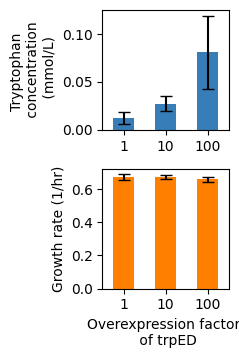

In [11]:
df_gr = resultw.groupby(['int_genes_overexpress_factor'])[['TRP[c]', 'growth']]
means = df_gr.mean()
counts = df_gr.size()
std = df_gr.std()
errors = std.div(counts**0.5, axis=0)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(2.49, 3.68))  # Two subplots

# Plot for tryptophan concentration
means['TRP[c]'].plot.bar(yerr=errors['TRP[c]'], ax=ax1, capsize=4, color='#377eb8', rot=0)
ax1.set_ylabel("Tryptophan \n concentration \n (mmol/L)")
ax1.set_xlabel('')  # Remove x-label for the top plot

# Plot for growth
means['growth'].plot.bar(yerr=errors['growth'], ax=ax2, capsize=4, color='#ff7f00', rot=0)
ax2.set_ylabel("Growth rate (1/hr)")
ax2.set_xlabel('Overexpression factor \n of trpED')

fig.tight_layout()  # Adjust layout to prevent overlap
fig.savefig('trp_wild.png', dpi=900)  

In [12]:
df_w_all = pd.concat([df_wildtype, df_wildtype_25, df_wildtype_50, df_wildtype_75, df_wildtype_100, df_wildtype_125, df_wildtype_150])
df_w_all['growth'] = df_w_all['growth']*3600
df_w_all['TRP[c]'] = df_w_all['TRP[c]']*204.23/1000

In [13]:
# Filter the dataframe for the required generation range
filtered_dfw = df_w_all[(df_w_all['generation'].isin(gens))]
resultw = filtered_dfw.groupby(['seed', 'int_genes_overexpress_factor'])[['TRP[c]', 'growth']].mean().reset_index()

In [14]:
resultw

,seed,int_genes_overexpress_factor,TRP[c],growth
0,000000,1,0.011517,0.742427
1,000000,100,0.013612,0.662610
2,000000,125,0.013793,0.668263
3,000000,150,0.367320,0.596815
4,000000,25,0.019187,0.677289
...,...,...,...,...
125,000018,50,0.086729,0.660906
126,000018,75,0.009898,0.718337
127,000019,1,0.002287,0.699698
128,000019,100,0.011099,0.636611


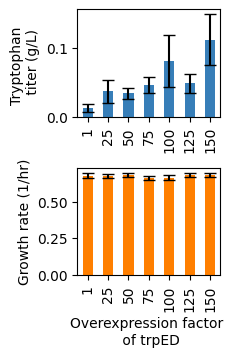

In [15]:
df_gr = resultw.groupby(['int_genes_overexpress_factor'])[['TRP[c]', 'growth']]
means = df_gr.mean()
counts = df_gr.size()
std = df_gr.std()
errors = std.div(counts**0.5, axis=0)

# Define the order for your bars
desired_order = ['1', '25', '50', '75', '100', '125', '150']  

means = means.reindex(desired_order)
errors = errors.reindex(desired_order)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(2.49, 3.68))
# Plot for tryptophan concentration
means['TRP[c]'].plot.bar(yerr=errors['TRP[c]'], ax=ax1, capsize=4, color='#377eb8', rot=90)
ax1.set_ylabel("Tryptophan \n titer (g/L)")
ax1.set_xlabel('')
# Plot for growth
means['growth'].plot.bar(yerr=errors['growth'], ax=ax2, capsize=4, color='#ff7f00', rot=90)
ax2.set_ylabel("Growth rate (1/hr)")
ax2.set_xlabel('Overexpression factor \n of trpED')
fig.tight_layout()
fig.savefig('trp_wild.png', dpi=900)

In [16]:
means

,TRP[c],growth
int_genes_overexpress_factor,,
1,0.012767,0.674438
25,0.037089,0.674224
50,0.033777,0.680568
75,0.046309,0.661319
100,0.080867,0.662008
125,0.048342,0.679968
150,0.111889,0.679174


In [17]:
errors

,TRP[c],growth
int_genes_overexpress_factor,,
1,0.006189,0.016187
25,0.016790,0.013351
50,0.008063,0.011086
75,0.011498,0.013081
100,0.038296,0.014844
125,0.014471,0.010742
150,0.036913,0.015206


# Analyse KOs

In [18]:
#these are for expression level 10
#df_ko1 = pd.read_pickle('/bm_ts_kos_2024_07_23.pkl')
#df_ko7 = pd.read_pickle('/bm_ts_kos_2024_07_29.pkl')
#these are for expression level 100
df_ko2 = pd.read_pickle('/bm_ts_kos_2024_07_24.pkl')
df_ko8 = pd.read_pickle('/bm_ts_kos_2024_08_20.pkl')
df_wildtype_100 = pd.read_pickle('/bm_ts_wildtype_over_2024_08_21.pkl')
df_wildtype_100['int_genes_overexpress_factor'] = '100'
df_wildtype_100['int_overexpr_genes'] = "[EG11027_RNA[c], EG11028_RNA[c]]"

In [19]:
df_ko = pd.concat([df_ko2, df_ko8, df_wildtype_100])
df_ko['growth'] = df_ko['growth'].str[1:]*3600
df_ko['TRP[c]'] = df_ko['TRP[c]']*204.23/1000

df_ko['ko_index'] = df_ko['KO_id']

In [20]:
df_ko = df_ko[df_ko['generation'].isin(gens)]
df_ko['seed'] = df_ko['cell_path'].str.split('/').str[7]

In [21]:
# Define the mapping dictionary
mapping_dict = {"['EG10707_RNA[c].']": 'trpED_OE+\npheA_KO', "['EG11005_RNA[c].']": 'trpED_OE+\ntnaA_KO', "['EG11029_RNA[c].']": 'trpED_OE+\ntrpR_KO', "['EG11005_RNA[c]', 'EG10707_RNA[c].']":'trpED_OE+\ntnaA_KO+pheA_KO', "['EG11029_RNA[c]', 'EG10707_RNA[c].']": 'trpED_OE+\ntrpR_KO+pheA_KO',
                "['EG11029_RNA[c]', 'EG11005_RNA[c].']": 'trpED_OE+\ntrpR_KO+tnaA_KO', "['EG11029_RNA[c]', 'EG11005_RNA[c]', 'EG10707_RNA[c].']": 'trpR, tnaA, pheA', '[\' \']': 'trpED_OE', 'nan':'trpED_OE'}

# Create a new column with the mapped values
df_ko['ko_index'] = df_ko['ko_index'].astype(str)
df_ko['ko_index'] = df_ko['ko_index'].map(mapping_dict)

In [22]:
# Define the mapping dictionary
mapping_dict = {"[100, 100]": '100'}
                
# Create a new column with the mapped values
df_ko['int_genes_overexpress_factor'] = df_ko['int_genes_overexpress_factor'].astype(str)
df_ko['int_genes_overexpress_factor'] = df_ko['int_genes_overexpress_factor'].map(mapping_dict)

In [23]:
print('For each KI expression level and KOs pair, the total number of seeds simulated is: ', df_ko[df_ko['generation']=='generation_000000'].groupby(['ko_index'])['seed'].count(),
     'And the total number of seeds that reach generation 20 is: ', df_ko[df_ko['generation']=='generation_000019'].groupby(['ko_index'])['seed'].count())

For each KI expression level and KOs pair, the total number of seeds simulated is:  Series([], Name: seed, dtype: int64) And the total number of seeds that reach generation 20 is:  ko_index
trpED_OE                      17
trpED_OE+\ntnaA_KO            19
trpED_OE+\ntrpR_KO            15
trpED_OE+\ntrpR_KO+tnaA_KO    17
Name: seed, dtype: int64


In [24]:
import numpy as np
df_ko_copy = df_ko.copy()

df_ko_copy = df_ko.copy()
df_ko_copy = df_ko_copy.drop(columns=['int_genes_overexpress_factor', 'int_overexpr_genes'])

def sum_list(lst):
    return np.sum(lst)
def mean_list(lst):
    return np.mean(lst)

def median_list(lst):
    return np.mean(lst)
    
df_ko_copy['TRP[c]'] = df_ko_copy['TRP[c]'].apply(mean_list)
df_ko_copy['cell_mass'] = df_ko_copy['cell_mass'].apply(mean_list)
df_ko_copy['growth'] = df_ko_copy['growth'].apply(mean_list)

df_ko_sum_gens_trp = df_ko_copy.groupby(['seed', 'ko_index'])[['TRP[c]']].mean().reset_index()
df_ko_sum_gens_mass = df_ko_copy.groupby(['seed', 'ko_index'])[['cell_mass', 'growth']].mean().reset_index()
df_ko_sum_gens = new_df = pd.merge(
    left=df_ko_sum_gens_trp, 
    right=df_ko_sum_gens_mass,
    how='left',
    left_on=['seed', 'ko_index'],
    right_on=['seed', 'ko_index'],
)


In [25]:
mapping = {'trpED_OE': 'S1/pED', 'trpED_OE+\ntnaA_KO': 'S2/pED', 'trpED_OE+\ntrpR_KO': 'S3/pED', 'trpED_OE+\ntrpR_KO+tnaA_KO': 'S4/pED'}
df_ko_sum_gens['ko_index'] = df_ko_sum_gens['ko_index'].map(mapping)

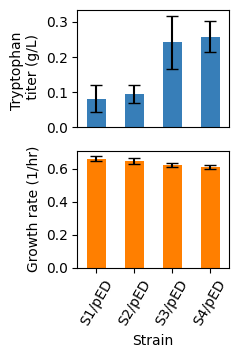

In [26]:
df_ko_gr = df_ko_sum_gens.groupby(['ko_index'])[['TRP[c]', 'growth']]
means = df_ko_gr.mean()

counts = df_ko_gr.size()
std = df_ko_gr.std()
errors = std.div(counts**0.5, axis=0)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(2.49, 3.68))  # Two subplots

# Plot for tryptophan concentration
means['TRP[c]'].plot.bar(yerr=errors['TRP[c]'], ax=ax1, capsize=4, color='#377eb8', rot=60)
ax1.set_ylabel("Tryptophan \n titer (g/L)")
ax1.set_xlabel('')  # Remove x-label for the top plot
ax1.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 


# Plot for growth
means['growth'].plot.bar(yerr=errors['growth'], ax=ax2, capsize=4, color='#ff7f00', rot=60)
ax2.set_ylabel("Growth rate (1/hr)")
ax2.set_xlabel('Strain')

fig.tight_layout()  # Adjust layout to prevent overlap
fig.savefig('trp_kos.png', dpi=900)  

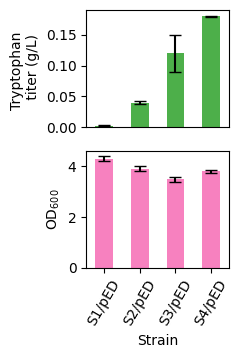

In [27]:
means_copy = pd.DataFrame(columns=['TRP[c]', 'growth_rate'])
means_copy['index'] = np.array(['S1/pED','S2/pED', 'S3/pED', 'S4/pED'])
means_copy.set_index(['index'], inplace=True)
means_copy['TRP[c]'] = np.array([0.0024, 0.04, 0.12, 0.18])
means_copy['growth_rate'] = np.array([4.3, 3.9 , 3.5, 3.8])

errors_copy = pd.DataFrame(columns=['TRP[c]', 'growth_rate'])
errors_copy['index'] = np.array(['S1/pED','S2/pED', 'S3/pED', 'S4/pED'])
errors_copy.set_index(['index'], inplace=True)
errors_copy['TRP[c]'] = np.array([0.0005, 0.003, 0.03, 0.001])
errors_copy['growth_rate'] = np.array([0.1, 0.1 , 0.1, 0.05])


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(2.49, 3.68))  # Two subplots

# Plot for tryptophan concentration
means_copy['TRP[c]'].plot.bar(yerr=errors_copy['TRP[c]'], ax=ax1, capsize=4, color='#4daf4a', rot=60)
ax1.set_ylabel("Tryptophan \n titer (g/L)")
ax1.set_xlabel('')  # Remove x-label for the top plot
ax1.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 


# Plot for growth
means_copy['growth_rate'].plot.bar(yerr=errors_copy['growth_rate'], ax=ax2, capsize=4, color='#f781bf', rot=60)
ax2.set_ylabel("OD$_{600}$")
ax2.set_xlabel('Strain')
#ax2.set_ylim([0, 0.15])  

fig.tight_layout()  # Adjust layout to prevent overlap
fig.savefig('trp_kos_lit.png', dpi=900)  

In [28]:
all_data_overexpr_100 = pd.concat([df_ko2, df_ko8])
all_data_overexpr_100['int_genes_overexpress_factor'] = '100'
all_data_overexpr_100['seed'] = all_data_overexpr_100['cell_path'].str.split('/').str[7]

all_data_overexpr_25 = pd.read_pickle('/JohanData/plots_KOs_overexpression/KOs_bm_mean_trpED_overexp_25.pkl')
all_data_overexpr_25['int_genes_overexpress_factor'] = '25'
all_data_overexpr_25['cell_path'] = all_data_overexpr_25['cell_path'].str.replace('//', '/')
all_data_overexpr_25['seed'] = all_data_overexpr_25['cell_path'].str.split('/').str[9]


all_data_overexpr_50 = pd.read_pickle('/bm_mean_KO_ts_new_gene_2025_04_30.pkl')
all_data_overexpr_50['int_genes_overexpress_factor'] = '50'
print(all_data_overexpr_50.columns)
all_data_overexpr_50['seed'] = all_data_overexpr_50['cell_path'].str.split('/').str[9]


all_data_overexpr_75 = pd.read_pickle('/JohanData/plots_KOs_overexpression/KOs_bm_mean_trpED_overexp_75_new.pkl')
all_data_overexpr_75['int_genes_overexpress_factor'] = '75'
all_data_overexpr_75['cell_path'] = all_data_overexpr_75['cell_path'].str.replace('//', '/')
all_data_overexpr_75['seed'] = all_data_overexpr_75['cell_path'].str.split('/').str[9]

all_data_overexpr_125 = pd.read_pickle('/JohanData/plots_KOs_overexpression/KOs_bm_mean_trpED_overexp_125.pkl')
all_data_overexpr_125['int_genes_overexpress_factor'] = '125'
all_data_overexpr_125['cell_path'] = all_data_overexpr_125['cell_path'].str.replace('//', '/')
all_data_overexpr_125['seed'] = all_data_overexpr_125['cell_path'].str.split('/').str[9]


all_data_overexpr_150 = pd.read_pickle('/JohanData/plots_KOs_overexpression/KOs_bm_mean_trpED_overexp_150.pkl')
all_data_overexpr_150['int_genes_overexpress_factor'] = '150'
all_data_overexpr_150['cell_path'] = all_data_overexpr_150['cell_path'].str.replace('//', '/')
all_data_overexpr_150['seed'] = all_data_overexpr_150['cell_path'].str.split('/').str[9]

Index(['ASN[c]', 'L-ASPARTATE[c]', 'CYS[c]', 'GLN[c]', 'GLT[c]', 'GLY[c]',
       'HIS[c]', 'ILE[c]', 'LEU[c]', 'LYS[c]', 'MET[c]', 'PHE[c]', 'PRO[c]',
       'SER[c]', 'THR[c]', 'TRP[c]', 'TYR[c]', 'VAL[c]', 'tRnaMass',
       'mRnaMass', 'proteinMass', 'rRnaMass', 'dnaMass', 'rnaMass',
       'cell_path', 'cell_mass', 'cell_volume', 'growth', 'variant', 'KO_id',
       'generation', 'int_genes_overexpress_factor'],
      dtype='object')


In [29]:
print(len(all_data_overexpr_25), len(all_data_overexpr_50), len(all_data_overexpr_75), len(all_data_overexpr_100), len(all_data_overexpr_125), len(all_data_overexpr_150))

1143 1092 1115 1190 1100 1052


In [30]:
all_25 = pd.concat([all_data_overexpr_25, df_wildtype_25])
mapping = {'multiple_overexpression_000000': 'S1/pED', 'double_knockout_000002': 'S2/pED', 'double_knockout_000001': 'S3/pED', 'double_knockout_000003': 'S4/pED'}
all_25['ko_index'] = all_25['variant'].map(mapping)
all_25 = all_25[all_25['generation'].isin(gens)]
all_25['growth'] = all_25['growth']*3600
all_25['TRP[c]'] = all_25['TRP[c]']*204.23/1000


In [31]:
all_25.groupby(['ko_index', 'generation'])['variant'].count()

ko_index  generation       
S1/pED    generation_000011    20
          generation_000012    20
          generation_000013    20
          generation_000014    20
          generation_000015    20
          generation_000016    19
          generation_000017    19
          generation_000018    19
          generation_000019    19
S2/pED    generation_000011    18
          generation_000012    17
          generation_000013    17
          generation_000014    17
          generation_000015    17
          generation_000016    17
          generation_000017    17
          generation_000018    16
          generation_000019    16
S3/pED    generation_000011    20
          generation_000012    20
          generation_000013    20
          generation_000014    19
          generation_000015    19
          generation_000016    19
          generation_000017    19
          generation_000018    18
          generation_000019    18
S4/pED    generation_000011    20
          generation

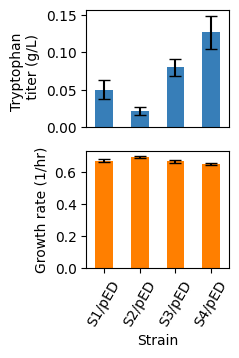

In [32]:
df_ko_gr = all_25.groupby(['ko_index'])[['TRP[c]', 'growth']]
means = df_ko_gr.mean()

counts = df_ko_gr.size()
std = df_ko_gr.std()
errors = std.div(counts**0.5, axis=0)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(2.49, 3.68))  # Two subplots

# Plot for tryptophan concentration
means['TRP[c]'].plot.bar(yerr=errors['TRP[c]'], ax=ax1, capsize=4, color='#377eb8', rot=60)
ax1.set_ylabel("Tryptophan \n titer (g/L)")
ax1.set_xlabel('')  
ax1.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 


# Plot for growth
means['growth'].plot.bar(yerr=errors['growth'], ax=ax2, capsize=4, color='#ff7f00', rot=60)
ax2.set_ylabel("Growth rate (1/hr)")
ax2.set_xlabel('Strain')

fig.tight_layout()  # Adjust layout to prevent overlap
fig.savefig('trp_kos_25.png', dpi=900)  # Save the figure

In [33]:
all_50 = pd.concat([all_data_overexpr_50, df_wildtype_50])
mapping = {'multiple_overexpression_000000': 'S1/pED', 'double_knockout_000002': 'S2/pED', 'double_knockout_000001': 'S3/pED', 'double_knockout_000003': 'S4/pED'}
all_50['ko_index'] = all_50['variant'].map(mapping)
all_50 = all_50[all_50['generation'].isin(gens)]
all_50['growth'] = all_50['growth']*3600
all_50['TRP[c]'] = all_50['TRP[c]']*204.23/1000

all_50.groupby(['ko_index', 'generation'])['variant'].count()

ko_index  generation       
S1/pED    generation_000011    20
          generation_000012    20
          generation_000013    20
          generation_000014    20
          generation_000015    20
          generation_000016    20
          generation_000017    20
          generation_000018    20
          generation_000019    20
S2/pED    generation_000011    18
          generation_000012    18
          generation_000013    18
          generation_000014    18
          generation_000015    18
          generation_000016    18
          generation_000017    18
          generation_000018    18
          generation_000019    18
S3/pED    generation_000011    18
          generation_000012    17
          generation_000013    16
          generation_000014    16
          generation_000015    16
          generation_000016    16
          generation_000017    16
          generation_000018    16
          generation_000019    16
S4/pED    generation_000011    17
          generation

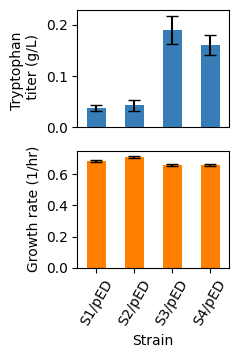

In [34]:
df_ko_gr = all_50.groupby(['ko_index'])[['TRP[c]', 'growth']]
means = df_ko_gr.mean()

counts = df_ko_gr.size()
std = df_ko_gr.std()
errors = std.div(counts**0.5, axis=0)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(2.49, 3.68))  # Two subplots

# Plot for tryptophan concentration
means['TRP[c]'].plot.bar(yerr=errors['TRP[c]'], ax=ax1, capsize=4, color='#377eb8', rot=60)
ax1.set_ylabel("Tryptophan \n titer (g/L)")
ax1.set_xlabel('')  # Remove x-label for the top plot
ax1.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 


# Plot for growth
means['growth'].plot.bar(yerr=errors['growth'], ax=ax2, capsize=4, color='#ff7f00', rot=60)
ax2.set_ylabel("Growth rate (1/hr)")
ax2.set_xlabel('Strain')

fig.tight_layout()  # Adjust layout to prevent overlap
fig.savefig('trp_kos_50.png', dpi=900)  # Save the figure

In [35]:
all_75 = pd.concat([all_data_overexpr_75, df_wildtype_75])
mapping = {'multiple_overexpression_000000': 'S1/pED', 'double_knockout_000002': 'S2/pED', 'double_knockout_000001': 'S3/pED', 'double_knockout_000003': 'S4/pED'}
all_75['ko_index'] = all_75['variant'].map(mapping)
all_75= all_75[all_75['generation'].isin(gens)]
all_75['growth'] = all_75['growth']*3600
all_75['TRP[c]'] = all_75['TRP[c]']*204.23/1000

all_75.groupby(['ko_index', 'generation'])['variant'].count()

ko_index  generation       
S1/pED    generation_000011    19
          generation_000012    19
          generation_000013    19
          generation_000014    19
          generation_000015    19
          generation_000016    17
          generation_000017    17
          generation_000018    17
          generation_000019    17
S2/pED    generation_000011    18
          generation_000012    18
          generation_000013    18
          generation_000014    18
          generation_000015    18
          generation_000016    18
          generation_000017    18
          generation_000018    18
          generation_000019    18
S3/pED    generation_000011    19
          generation_000012    18
          generation_000013    18
          generation_000014    18
          generation_000015    17
          generation_000016    17
          generation_000017    17
          generation_000018    17
          generation_000019    17
S4/pED    generation_000011    17
          generation

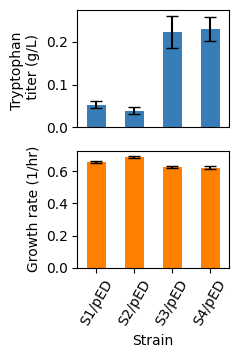

In [36]:
df_ko_gr = all_75.groupby(['ko_index'])[['TRP[c]', 'growth']]
means = df_ko_gr.mean()

counts = df_ko_gr.size()
std = df_ko_gr.std()
errors = std.div(counts**0.5, axis=0)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(2.49, 3.68))  # Two subplots

# Plot for tryptophan concentration
means['TRP[c]'].plot.bar(yerr=errors['TRP[c]'], ax=ax1, capsize=4, color='#377eb8', rot=60)
ax1.set_ylabel("Tryptophan \n titer (g/L)")
ax1.set_xlabel('')  # Remove x-label for the top plot
ax1.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 


# Plot for growth
means['growth'].plot.bar(yerr=errors['growth'], ax=ax2, capsize=4, color='#ff7f00', rot=60)
ax2.set_ylabel("Growth rate (1/hr)")
ax2.set_xlabel('Strain')

fig.tight_layout()  # Adjust layout to prevent overlap
fig.savefig('trp_kos_75.png', dpi=900)  # Save the figure

In [37]:
all_125 = pd.concat([all_data_overexpr_125, df_wildtype_125])
mapping = {'multiple_overexpression_000000': 'S1/pED', 'double_knockout_000002': 'S2/pED', 'double_knockout_000001': 'S3/pED', 'double_knockout_000003': 'S4/pED'}
all_125['ko_index'] = all_125['variant'].map(mapping)
all_125= all_125[all_125['generation'].isin(gens)]
all_125['growth'] = all_125['growth']*3600
all_125['TRP[c]'] = all_125['TRP[c]']*204.23/1000

all_125.groupby(['ko_index', 'generation'])['variant'].count()

ko_index  generation       
S1/pED    generation_000011    18
          generation_000012    18
          generation_000013    18
          generation_000014    18
          generation_000015    18
          generation_000016    17
          generation_000017    17
          generation_000018    17
          generation_000019    17
S2/pED    generation_000011    20
          generation_000012    20
          generation_000013    19
          generation_000014    19
          generation_000015    19
          generation_000016    18
          generation_000017    18
          generation_000018    18
          generation_000019    18
S3/pED    generation_000011    18
          generation_000012    17
          generation_000013    16
          generation_000014    15
          generation_000015    15
          generation_000016    15
          generation_000017    15
          generation_000018    15
          generation_000019    15
S4/pED    generation_000011    17
          generation

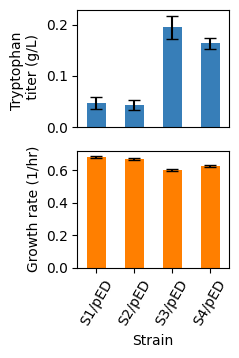

In [38]:
df_ko_gr = all_125.groupby(['ko_index'])[['TRP[c]', 'growth']]
means = df_ko_gr.mean()

counts = df_ko_gr.size()
std = df_ko_gr.std()
errors = std.div(counts**0.5, axis=0)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(2.49, 3.68))  # Two subplots

# Plot for tryptophan concentration
means['TRP[c]'].plot.bar(yerr=errors['TRP[c]'], ax=ax1, capsize=4, color='#377eb8', rot=60)
ax1.set_ylabel("Tryptophan \n titer (g/L)")
ax1.set_xlabel('')  # Remove x-label for the top plot
ax1.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 


# Plot for growth
means['growth'].plot.bar(yerr=errors['growth'], ax=ax2, capsize=4, color='#ff7f00', rot=60)
ax2.set_ylabel("Growth rate (1/hr)")
ax2.set_xlabel('Strain')

fig.tight_layout()  # Adjust layout to prevent overlap
fig.savefig('trp_kos_125.png', dpi=900)  # Save the figure

In [39]:
all_150 = pd.concat([all_data_overexpr_150, df_wildtype_150])
mapping = {'multiple_overexpression_000000': 'S1/pED', 'double_knockout_000002': 'S2/pED', 'double_knockout_000001': 'S3/pED', 'double_knockout_000003': 'S4/pED'}
all_150['ko_index'] = all_150['variant'].map(mapping)
all_150= all_150[all_150['generation'].isin(gens)]
all_150['growth'] = all_150['growth']*3600
all_150['TRP[c]'] = all_150['TRP[c]']*204.23/1000

all_150.groupby(['ko_index', 'generation'])['variant'].count()

ko_index  generation       
S1/pED    generation_000011    18
          generation_000012    17
          generation_000013    17
          generation_000014    17
          generation_000015    16
          generation_000016    16
          generation_000017    16
          generation_000018    15
          generation_000019    15
S2/pED    generation_000011    19
          generation_000012    19
          generation_000013    19
          generation_000014    19
          generation_000015    18
          generation_000016    17
          generation_000017    17
          generation_000018    16
          generation_000019    16
S3/pED    generation_000011    14
          generation_000012    14
          generation_000013    14
          generation_000014    14
          generation_000015    14
          generation_000016    14
          generation_000017    14
          generation_000018    14
          generation_000019    14
S4/pED    generation_000011    19
          generation

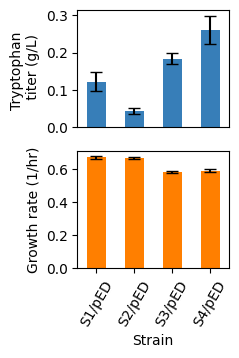

In [40]:
df_ko_gr = all_150.groupby(['ko_index'])[['TRP[c]', 'growth']]
means = df_ko_gr.mean()

counts = df_ko_gr.size()
std = df_ko_gr.std()
errors = std.div(counts**0.5, axis=0)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(2.49, 3.68))  # Two subplots

# Plot for tryptophan concentration
means['TRP[c]'].plot.bar(yerr=errors['TRP[c]'], ax=ax1, capsize=4, color='#377eb8', rot=60)
ax1.set_ylabel("Tryptophan \n titer (g/L)")
ax1.set_xlabel('')  # Remove x-label for the top plot
ax1.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 


# Plot for growth
means['growth'].plot.bar(yerr=errors['growth'], ax=ax2, capsize=4, color='#ff7f00', rot=60)
ax2.set_ylabel("Growth rate (1/hr)")
ax2.set_xlabel('Strain')

fig.tight_layout()  # Adjust layout to prevent overlap
fig.savefig('trp_kos_150.png', dpi=900)  # Save the figure

# KIs

In [41]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'DejaVu Sans'

In [42]:
df_ko_ki4 = pd.read_pickle('/bm_ts_sum_kis_over_kos_2024_12_06_154.pkl')
df_ko_ki5 = pd.read_pickle('/bm_ts_sum_kis_over_kos_2024_12_06_1550.pkl')
df_ko_ki6 = pd.read_pickle('/bm_ts_sum_kis_over_kos_2024_12_06_1551.pkl')
df_ko_ki7 = pd.read_pickle('/bm_ts_sum_kis_over_kos_2024_12_06_1552.pkl')
df_ko_ki8 = pd.read_pickle('/bm_ts_sum_kis_over_kos_2024_12_06_1553.pkl')
df_ko_ki9 = pd.read_pickle('/bm_ts_sum_kis_over_kos_2024_12_06_1554.pkl')
df_ko_ki10 = pd.read_pickle('/bm_ts_sum_kis_over_kos_2024_12_06_1555.pkl')
df_ko_ki11 = pd.read_pickle('/bm_ts_sum_kis_over_kos_2024_12_06_1557.pkl')
df_ko_ki12 = pd.read_pickle('/bm_ts_sum_kis_over_kos_2024_12_06_1558.pkl')
df_ko_ki13 = pd.read_pickle('/bm_ts_sum_kis_over_kos_2024_12_06_16.pkl')

df_ko_ki6 = pd.concat([df_ko_ki4, df_ko_ki5,  df_ko_ki6,  df_ko_ki7,  df_ko_ki8,  df_ko_ki9,  df_ko_ki10, df_ko_ki11, df_ko_ki12, df_ko_ki13])

In [43]:
df_ko_ki1 = pd.read_pickle('/bm_ts_new_gene_2024_10_21.pkl')
df_ko_ki2 = pd.read_pickle('/bm_ts_new_gene_2024_10_23.pkl')
df_ko_ki3 = pd.read_pickle('/bm_ts__kos_kis_125_2025_03_21.pkl')
df_ko_ki4 = pd.read_pickle('/bm_ts__kos_kis_150_2025_03_22.pkl')
df_ko_ki5 = pd.read_pickle('/bm_ts__kos_kis_75_2025_03_20.pkl')

df_ko_ki = pd.concat([df_ko_ki1, df_ko_ki2, df_ko_ki3, df_ko_ki4, df_ko_ki5, df_ko_ki6])
df_ko_ki = df_ko_ki[df_ko_ki['KO_id']!=' EG10001_RNA[c]']
df_ko_ki['seed'] = df_ko_ki['cell_path'].str.split('/').str[7]
df_ko_ki['int_genes_overexpress_factor'] = df_ko_ki['int_genes_overexpress_factor'].apply(lambda x: ','.join(map(str, x)))

# Define the mapping dictionary
mapping_dict = {"[\'EG10707_RNA[c].\']": 'vioA-E, pheA_KO', "[\'EG11005_RNA[c].\']": 'vioA-E, \ntnaA_KO', "[\'EG11029_RNA[c].\']": 'vioA-E, \ntrpR_KO', "[\'EG11005_RNA[c]\', \'EG10707_RNA[c].\']":'vioA-E, tnaA_KO+pheA_KO', "[\'EG11029_RNA[c]\', \'EG10707_RNA[c].\']": 'vioA-E, trpR_KO+pheA_KO',
                "[\'EG11029_RNA[c]\', \'EG11005_RNA[c].\']": 'vioA-E, trpR_KO+\ntnaA_KO', "[\'EG11029_RNA[c]\', \'EG11005_RNA[c]\', \'EG10707_RNA[c].\']": 'trpR_KO tnaA, pheA', 'No KO': 'vioA-E', None:'vioA-E',
                " EG11005_RNA[c]": 'vioA-E, \ntnaA_KO', " EG11029_RNA[c]": 'vioA-E, \ntrpR_KO', " EG11029_RNA[c] EG11005_RNA[c]": 'vioA-E, trpR_KO+\ntnaA_KO' }

# Create a new column with the mapped values
df_ko_ki['KO_id'] = df_ko_ki['KO_id'].astype(str).map(mapping_dict)

# Define the mapping dictionary
mapping_dict = {'100,100':'100', '100 ,100\n': '100', '[\'100, 100\']':'100', '[\'100, 100\n\']': '100',  'No over': 'No overexpression trpED',
               '75,75':'75', '75 ,75\n': '75', '[\'75, 75\']':'75', '[\'75, 75\n\']': '75',
               '125,125':'125', '125 ,125\n': '125', '[\'125, 125\']':'125', '[\'125, 125\n\']': '125',
               '150,150':'150', '150 ,150\n': '150', '[\'150, 150\']':'150', '[\'150, 150\n\']': '150'}

# Create a new column with the mapped values
df_ko_ki['int_genes_overexpress_factor'] = df_ko_ki['int_genes_overexpress_factor'].astype(str).map(mapping_dict)

In [44]:
df_ko_ki5['int_genes_overexpress_factor']

0       [75, 75]
1       [75, 75]
2       [75, 75]
3       [75, 75]
4       [75, 75]
          ...   
4083    [75, 75]
4084    [75, 75]
4085    [75, 75]
4086    [75, 75]
4087    [75, 75]
Name: int_genes_overexpress_factor, Length: 4088, dtype: object

In [45]:
df_ki_over1 = pd.read_pickle('/bm_ts_new_gene_2024_10_20.pkl')
df_ki_over2 = pd.read_pickle('/bm_ts_new_gene_2024_10_24_22.pkl')
df_ki_over3 = pd.read_pickle('/bm_ts_sum_kis_over_2024_12_12.pkl')
df_ki_over4 = pd.read_pickle('/bm_ts_kis_125_2025_03_21.pkl')
df_ki_over5 = pd.read_pickle('/bm_ts_kis_150_2025_03_22.pkl')
df_ki_over6 = pd.read_pickle('/bm_ts__kis_75_2025_03_24.pkl')

df_ki_over = pd.concat([df_ki_over1, df_ki_over2, df_ki_over3, df_ki_over4, df_ki_over5, df_ki_over6])
df_ki_over['seed'] = df_ki_over['cell_path'].str.split('/').str[7]
df_ki_over['int_genes_overexpress_factor'] = df_ki_over['int_genes_overexpress_factor'].apply(lambda x: ','.join(map(str, x)))

# Define the mapping dictionary
mapping_dict = {'100,100':'100', '100,100\n': '100', '[\'100, 100\']':'100', '[\'100, 100\n\']': '100',  'No over': 'No overexpression trpED',
               '75,75':'75', '75,75\n': '75', '[\'75, 75\']':'75', '[\'75, 75\n\']': '75',
               '125,125':'125', '125,125\n': '125', '[\'125, 125\']':'125', '[\'125, 125\n\']': '125',
               '150,150':'150', '150,150\n': '150', '[\'150, 150\']':'150', '[\'150, 150\n\']': '150'}

print(df_ki_over['int_genes_overexpress_factor'].iloc[0])
# Create a new column with the mapped values
df_ki_over['int_genes_overexpress_factor'] = df_ki_over['int_genes_overexpress_factor'].astype(str).map(mapping_dict)


100,100



In [46]:
print('For each KI expression level and KOs pair, the total number of seeds simulated is: ', df_ki_over[df_ki_over['generation']=='generation_000000'].groupby(['ext_genes_expr',  'int_genes_overexpress_factor'])['seed'].count(),
     'And the total number of seeds that reach generation 20 is: ', df_ki_over[df_ki_over['generation']=='generation_000019'].groupby(['ext_genes_expr', 'int_genes_overexpress_factor'])['seed'].count())

For each KI expression level and KOs pair, the total number of seeds simulated is:  ext_genes_expr  int_genes_overexpress_factor
10000           100                             17
100000          100                             20
                125                             20
                150                             20
                75                              20
1000000         100                             20
                125                             20
                150                             20
                75                              20
10000000        100                             16
                125                             20
                150                             20
                75                              20
100000000       100                             20
1000000000      100                             17
325000          100                             20
3250000         100                             20
5500

In [47]:
df_ki1 = pd.read_pickle('/bm_ts_new_gene_2024_10_18.pkl')
df_ki2 = pd.read_pickle('/bm_ts_new_gene_2024_10_19.pkl')
df_ki3 = pd.read_pickle('/bm_ts_new_gene_2024_10_24_08.pkl')
df_ki4 = pd.read_pickle('/bm_ts_sum_kis_2024_12_12.pkl')

df_ki = pd.concat([df_ki1, df_ki2, df_ki3, df_ki4])
print(len(df_ki))

df_ki['seed'] = df_ki['cell_path'].str.split('/').str[7]
df_ki['int_genes_overexpress_factor'] = df_ki['int_genes_overexpress_factor'].apply(lambda x: ','.join(map(str, x)))


# Define the mapping dictionary
mapping_dict = {'100,100':'100', '100 ,100\n': '100', '100,100\n': '100', '[\'100, 100\']':'100', '[\'100, 100\n\']': '100',  'No over': 'No overexpression trpED'}

# Create a new column with the mapped values
df_ki['int_genes_overexpress_factor'] = df_ki['int_genes_overexpress_factor'].astype(str).map(mapping_dict)


3935


In [48]:
print('For each KI expression level and KOs pair, the total number of seeds simulated is: ', df_ki[df_ki['generation']=='generation_000000'].groupby(['ext_genes_expr' ])['seed'].count(),
     'And the total number of seeds that reach generation 20 is: ', df_ki[df_ki['generation']=='generation_000019'].groupby(['ext_genes_expr'])['seed'].count())

For each KI expression level and KOs pair, the total number of seeds simulated is:  ext_genes_expr
10000         20
100000        20
1000000       20
10000000      20
100000000     20
1000000000    20
325000        20
3250000       20
550000        20
5500000       20
775000        20
7750000       20
Name: seed, dtype: int64 And the total number of seeds that reach generation 20 is:  ext_genes_expr
10000       18
100000      18
1000000     18
10000000     5
325000      17
3250000     13
550000      19
5500000     14
775000      18
7750000      7
Name: seed, dtype: int64


In [49]:
df_ki_over['KO_id'] = 'No KO'
df_ki['KO_id'] = 'No KO'
df_ki['int_overexpr_genes'] = 'No over'
df_ki['int_genes_overexpress_factor'] = 'No over'

In [50]:
df_ko_ki = df_ko_ki.rename(columns={
    'KO_id': 'ko_index'})
df_ki_over = df_ki_over.rename(columns={
    'KO_id': 'ko_index'})
df_ki = df_ki.rename(columns={
    'KO_id': 'ko_index'})

In [51]:
df_ko_ki = pd.concat([df_ko_ki, df_ki_over, df_ki])
df_ko_ki['growth'] = df_ko_ki['growth'].str[1:]*3600

In [52]:
df_ko_ki.columns

Index(['PGLUCISOM[c]', 'CHORISMUTPREPHENDEHYDRAT-MONOMER[c]',
       'TRYPTOPHAN-MONOMER[c]', 'PD00423[c]', 'TRP[c]', 'NG-VioA-MONOMER[c]',
       'NG-VioB-MONOMER[c]', 'NG-VioC-MONOMER[c]', 'NG-VioD-MONOMER[c]',
       'NG-VioE-MONOMER[c]', 'CPD-14323[c]', 'CPD-14324[c]', 'cell_path',
       'cell_mass', 'cell_volume', 'growth', 'time', 'variant', 'ko_index',
       'generation', 'int_overexpr_genes', 'int_genes_overexpress_factor',
       'tr_efficiency', 'ext_genes_expr', 'seed'],
      dtype='object')

In [53]:
df_ko_ki = df_ko_ki.rename(columns={
    'CPD-14323[c]': 'Deoxyviolaceinate', 'CPD-14324[c]':'Violaceinate'})
cols = ['PGLUCISOM[c]', 'CHORISMUTPREPHENDEHYDRAT-MONOMER[c]',
       'TRYPTOPHAN-MONOMER[c]', 'PD00423[c]', 'TRP[c]', 'NG-VioA-MONOMER[c]',
       'NG-VioB-MONOMER[c]', 'NG-VioC-MONOMER[c]', 'NG-VioD-MONOMER[c]',
       'NG-VioE-MONOMER[c]', 'Deoxyviolaceinate', 'Violaceinate']

In [54]:
print('For each KI expression level and KOs pair, the total number of seeds simulated is: ', df_ko_ki[df_ko_ki['generation']=='generation_000000'].groupby(['ext_genes_expr', 'ko_index', 'int_genes_overexpress_factor'])['seed'].count(),
     'And the total number of seeds that reach generation 20 is: ', df_ko_ki[df_ko_ki['generation']=='generation_000019'].groupby(['ext_genes_expr', 'ko_index', 'int_genes_overexpress_factor'])['seed'].count())

For each KI expression level and KOs pair, the total number of seeds simulated is:  ext_genes_expr  ko_index                   int_genes_overexpress_factor
10000           No KO                      100                             17
                                           No over                         20
                vioA-E, \ntnaA_KO          100                             20
                vioA-E, \ntrpR_KO          100                             20
                vioA-E, trpR_KO+\ntnaA_KO  100                             20
                                                                           ..
7750000         No KO                      100                             20
                                           No over                         20
                vioA-E, \ntnaA_KO          100                             20
                vioA-E, \ntrpR_KO          100                             20
                vioA-E, trpR_KO+\ntnaA_KO  100                  

In [55]:
gens = ['generation_000011', 
        'generation_000012','generation_000013',
        'generation_000014','generation_000015',
        'generation_000016', 'generation_000017',
        'generation_000018', 'generation_000019'
        
        ]

In [56]:
set(df_ko_ki['int_genes_overexpress_factor'])

{'100', '125', '150', '75', 'No over'}

In [57]:
def is_float(value):
    return isinstance(value, float)

# Apply the function to the specified columns
float_check_result = df_ko_ki[cols].applymap(is_float)

# Create a mask to filter out rows with floats
rows_with_floats = float_check_result.any(axis=1)

# Filter out the rows
df_cleaned = df_ko_ki[(df_ko_ki['int_genes_overexpress_factor']=='100') | (df_ko_ki['int_genes_overexpress_factor']=='No over')][['TRP[c]', 'NG-VioA-MONOMER[c]',
       'NG-VioB-MONOMER[c]', 'NG-VioC-MONOMER[c]', 'NG-VioD-MONOMER[c]',
       'NG-VioE-MONOMER[c]', 'Deoxyviolaceinate', 'Violaceinate', 'cell_path',
       'cell_mass', 'cell_volume', 'growth',  'variant', 'ko_index',
       'generation', 'int_overexpr_genes', 'int_genes_overexpress_factor',
       'tr_efficiency', 'ext_genes_expr', 'seed']].copy()
len(df_cleaned)

18360

In [58]:
cols=['TRP[c]', 'NG-VioA-MONOMER[c]',
       'NG-VioB-MONOMER[c]', 'NG-VioC-MONOMER[c]', 'NG-VioD-MONOMER[c]',
       'NG-VioE-MONOMER[c]', 'Deoxyviolaceinate', 'Violaceinate']

In [59]:
import numpy as np
def sum_list(lst):
    return np.sum(lst)

def mean_list(lst):
    return np.nanmean(lst)

def median_list(lst):
    return np.median(lst)


for c in  cols:
    df_cleaned[c] = df_cleaned[c].apply(mean_list)

for c in  ['cell_mass', 'growth', 'cell_volume']:
    df_cleaned[c] = df_cleaned[c].apply(mean_list)

In [60]:
set(df_cleaned['ext_genes_expr'])

{'10000',
 '100000',
 '1000000',
 '10000000',
 '100000000',
 '1000000000',
 '325000',
 '3250000',
 '550000',
 '5500000',
 '775000',
 '7750000'}

In [61]:
df_cleaned = df_cleaned[(df_cleaned['generation'].isin(gens)) & (df_cleaned['ext_genes_expr']=='7750000')]

In [62]:
df_ko_ki_sum_gens_sum = df_cleaned.groupby(['ko_index', 'seed', 'ext_genes_expr', 'int_genes_overexpress_factor'])[cols].mean().reset_index()
df_ko_ki_sum_gens_mean = df_cleaned.groupby(['ko_index', 'seed', 'ext_genes_expr', 'int_genes_overexpress_factor'])[['cell_mass', 'cell_volume','growth']].mean().reset_index()
df_ko_ki_sum_gens =pd.merge(
    left=df_ko_ki_sum_gens_sum, 
    right=df_ko_ki_sum_gens_mean,
    how='left',
    left_on=['ko_index', 'seed', 'ext_genes_expr', 'int_genes_overexpress_factor'],
    right_on=['ko_index', 'seed', 'ext_genes_expr', 'int_genes_overexpress_factor'],
)


In [63]:
df_ko_ki_sum_gens['Crude violacein'] = (df_ko_ki_sum_gens['Violaceinate'] *0.39 + df_ko_ki_sum_gens['Deoxyviolaceinate']*0.61)
df_ko_ki_sum_gens['Crude violacein'] = (df_ko_ki_sum_gens['Violaceinate']*373.362/1000) + (df_ko_ki_sum_gens['Deoxyviolaceinate']*357.363/1000)


In [64]:
df_ko_ki_sum_gens

,ko_index,seed,ext_genes_expr,int_genes_overexpress_factor,TRP[c],NG-VioA-MONOMER[c],NG-VioB-MONOMER[c],NG-VioC-MONOMER[c],NG-VioD-MONOMER[c],NG-VioE-MONOMER[c],Deoxyviolaceinate,Violaceinate,cell_mass,cell_volume,growth,Crude violacein
0,No KO,000000,7750000,No over,0.001347,0.198373,0.177712,0.197925,0.200351,0.211084,0.009845,0.039678,779.503907,0.708640,0.175933,0.018333
1,No KO,000001,7750000,No over,1.651817,0.197190,0.180278,0.193473,0.200663,0.205770,6.411001,10.524834,950.464846,0.864059,0.276239,6.220628
2,No KO,000002,7750000,100,14.471312,0.090601,0.081070,0.088778,0.091271,0.094633,4.213006,4.976182,1049.666305,0.954242,0.477334,3.363490
3,No KO,000002,7750000,No over,0.024945,0.257842,0.242786,0.264082,0.266825,0.270267,0.469015,1.230308,1001.322081,0.910293,0.339406,0.626959
4,No KO,000003,7750000,No over,0.029597,0.215992,0.197779,0.214136,0.220881,0.225945,0.432775,1.031551,999.253936,0.908413,0.337313,0.539800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,"vioA-E, trpR_KO+\ntnaA_KO",000015,7750000,100,0.275367,0.114145,0.108029,0.116149,0.114801,0.121389,17.701709,20.438830,850.989102,0.773626,0.160271,13.957019
74,"vioA-E, trpR_KO+\ntnaA_KO",000016,7750000,100,0.469349,0.207883,0.183992,0.211028,0.214985,0.218974,15.305335,27.724358,729.759600,0.663418,0.223672,15.820782
75,"vioA-E, trpR_KO+\ntnaA_KO",000017,7750000,100,0.564730,0.148732,0.135581,0.150860,0.151554,0.156152,18.032000,24.621709,842.835872,0.766214,0.216787,15.636780
76,"vioA-E, trpR_KO+\ntnaA_KO",000018,7750000,100,0.859434,0.168399,0.160402,0.169912,0.170468,0.180507,24.827620,25.030100,881.168415,0.801062,0.266670,18.217761


In [65]:
mapping = {'No KO,No over': 'S1/vio',  'No KO,100':'S1/pED/vio', 'vioA-E, \ntnaA_KO,100': 'S2/pED/vio', 'vioA-E, \ntrpR_KO,100': 'S3/pED/vio', 'vioA-E, trpR_KO+\ntnaA_KO,100': 'S4/pED/vio',
           'No KO,No over': 'S1/vio',  'No KO,75':'S1/pED/vio', 'vioA-E, \ntnaA_KO,75': 'S2/pED/vio', 'vioA-E, \ntrpR_KO,75': 'S3/pED/vio', 'vioA-E, trpR_KO+\ntnaA_KO,75': 'S4/pED/vio',
           'No KO,No over': 'S1/vio',  'No KO,125':'S1/pED/vio', 'vioA-E, \ntnaA_KO,125': 'S2/pED/vio', 'vioA-E, \ntrpR_KO,125': 'S3/pED/vio', 'vioA-E, trpR_KO+\ntnaA_KO,125': 'S4/pED/vio',
           'No KO,No over': 'S1/vio',  'No KO,150':'S1/pED/vio', 'vioA-E, \ntnaA_KO,150': 'S2/pED/vio', 'vioA-E, \ntrpR_KO,150': 'S3/pED/vio', 'vioA-E, trpR_KO+\ntnaA_KO,150': 'S4/pED/vio'}


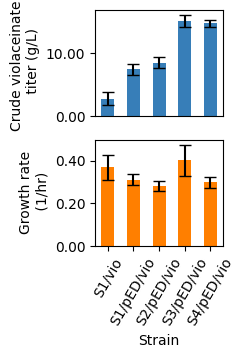

In [66]:
import matplotlib.ticker as ticker

df_ko_gr = df_ko_ki_sum_gens.groupby(['ko_index', 'int_genes_overexpress_factor'])[['Crude violacein', 'Deoxyviolaceinate', 'Violaceinate', 'growth', 'cell_mass', 'cell_volume']]

means = df_ko_gr.mean()
counts = df_ko_gr.size()
std = df_ko_gr.std()
errors = pd.DataFrame()
means.index = means.index.map(lambda x: f"{x[0]},{x[1]}")
errors[['Crude violacein', 'growth']] = df_ko_gr.std()[['Crude violacein', 'growth']].div(counts**0.5, axis=0)
errors.index = errors.index.map(lambda x: f"{x[0]},{x[1]}")
means = means.rename(index={'vioA-E,': 'vioA-E'})
errors = errors.rename(index={'vioA-E,': 'vioA-E'})

std.index = std.index.map(lambda x: f"{x[0]},{x[1]}")
std = std.rename(index={'vioA-E,': 'vioA-E'})


means.index = means.index.map(mapping)
errors.index = errors.index.map(mapping)
std.index = std.index.map(mapping)

new_order = [1, 0, 2, 3, 4]  # The indices of columns in the order you want
means = means.iloc[new_order]
errors = errors.iloc[new_order]
std = std.iloc[new_order]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(2.49, 3.68))  # Two subplots

# Plot for tryptophan concentration
means['Crude violacein'].plot.bar(yerr=errors['Crude violacein'], ax=ax1, capsize=4, color='#377eb8', rot=60)
ax1.set_ylabel("Crude violaceinate \n titer (g/L)")
ax1.set_xlabel('')  # Remove x-label for the top plot
ax1.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 
ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))


# Plot for growth
means['growth'].plot.bar(yerr=errors['growth'], ax=ax2, capsize=4, color='#ff7f00', rot=60)
ax2.set_ylabel("Growth rate\n (1/hr)")
ax2.set_xlabel('Strain')
#ax2.set_ylim([0, 0.15])  
ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

fig.tight_layout()  # Adjust layout to prevent overlap
fig.savefig('vio_trped150_vio10^775.png', dpi=900)  # Save the figure

In [67]:
means

,Crude violacein,Deoxyviolaceinate,Violaceinate,growth,cell_mass,cell_volume
S1/vio,2.819726,2.747048,4.922924,0.368872,1028.197821,0.934725
S1/pED/vio,7.439096,7.428616,12.814330,0.311100,932.391182,0.847628
S2/pED/vio,8.495700,7.910838,15.182742,0.281522,919.764476,0.836150
S3/pED/vio,15.174255,19.020096,22.437143,0.401002,922.419087,0.838563
S4/pED/vio,14.751556,18.544832,21.759898,0.299138,906.470475,0.824064


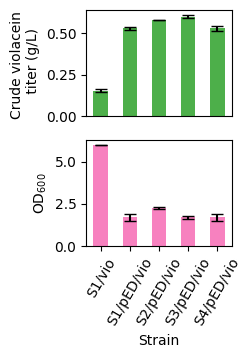

In [68]:
means_copy = pd.DataFrame(columns=['crude_vio', 'od600'])
means_copy['index'] = np.array(['S1/vio', 'S1/pED/vio','S2/pED/vio', 'S3/pED/vio', 'S4/pED/vio'])
means_copy.set_index(['index'], inplace=True)
means_copy['crude_vio'] = np.array([0.153, 0.53, 0.58, 0.6, 0.53])
means_copy['od600'] = np.array([6, 1.7, 2.25, 1.7, 1.7])

errors_copy = pd.DataFrame(columns=['crude_vio', 'od600'])
errors_copy['index'] = np.array(['S1/vio', 'S1/pED/vio','S2/pED/vio', 'S3/pED/vio', 'S4/pED/vio'])
errors_copy.set_index(['index'], inplace=True)
errors_copy['crude_vio'] = np.array([0.009, 0.01, 0, 0.01, 0.015])
errors_copy['od600'] = np.array([0.01, 0.2 , 0.05, 0.08, 0.2])


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(2.49, 3.68))  # Two subplots

# Plot for tryptophan concentration
means_copy['crude_vio'].plot.bar(yerr=errors_copy['crude_vio'], ax=ax1, capsize=4, color='#4daf4a', rot=60)
ax1.set_ylabel("Crude violacein \n titer (g/L)")
ax1.set_xlabel('')  # Remove x-label for the top plot
ax1.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 

# Plot for growth
means_copy['od600'].plot.bar(yerr=errors_copy['od600'], ax=ax2, capsize=4, color='#f781bf', rot=60)
ax2.set_ylabel("OD$_{600}$")
ax2.set_xlabel('Strain')

fig.tight_layout()  # Adjust layout to prevent overlap
fig.savefig('vio_lit.png', dpi=900)  # Save the figure

# Flux

In [69]:
flux_ko1 = pd.read_pickle('/bm_ts_flux_ko_20240820.pkl')
flux_ko2 = pd.read_pickle('/bm_ts_flux_ko_20240724.pkl')

flux_ko = pd.concat([flux_ko1, flux_ko2])
flux_ko['seed'] = flux_ko['cell_path'].str.split('/').str[7]
flux_ko['int_genes_overexpress_factor'] = flux_ko['int_genes_overexpress_factor'].apply(lambda x: ','.join(map(str, x)))

# Define the mapping dictionary
mapping_dict = {"[\'EG10707_RNA[c].\']": 'pheA_KO', "[\'EG11005_RNA[c].\']": 'tnaA_KO', "[\'EG11029_RNA[c].\']": 'trpR_KO', "[\'EG11005_RNA[c]\', \'EG10707_RNA[c].\']":'tnaA_KO+pheA_KO', "[\'EG11029_RNA[c]\', \'EG10707_RNA[c].\']": ' trpR_KO+pheA_KO',
                "[\'EG11029_RNA[c]\', \'EG11005_RNA[c].\']": 'trpR_KO+\ntnaA_KO', "[\'EG11029_RNA[c]\', \'EG11005_RNA[c]\', \'EG10707_RNA[c].\']": 'trpR_KO tnaA, pheA', 'No KO': 'No', None:'No'}

# Create a new column with the mapped values
flux_ko['KO_id'] = flux_ko['KO_id'].astype(str).map(mapping_dict)

# Define the mapping dictionary
mapping_dict = {'100,100':'100', '100 ,100\n': '100', '[\'100, 100\']':'100', '[\'100, 100\n\']': '100',  'No over': 'No overexpression trpED'}

# Create a new column with the mapped values
flux_ko['int_genes_overexpress_factor'] = flux_ko['int_genes_overexpress_factor'].astype(str).map(mapping_dict)
flux_ko['ext_genes_expr'] = '0'

In [70]:
wild100 = pd.read_pickle('/bm_ts_flux_ko_20240821.pkl')

wild100['seed'] = wild100['cell_path'].str.split('/').str[7]
wild100['int_genes_overexpress_factor'] = wild100['int_genes_overexpress_factor'].apply(lambda x: ','.join(map(str, x)))

# Create a new column with the mapped values
wild100['KO_id'] = 'No KO'

# Create a new column with the mapped values
wild100['int_genes_overexpress_factor'] = '100'
wild100['ext_genes_expr'] = '0'

In [71]:
flux_ng1 = pd.read_pickle('/bm_ts_flux_ki_20241206_154.pkl')
flux_ng2 = pd.read_pickle('/bm_ts_flux_ki_20241206_1550.pkl')
flux_ng3 = pd.read_pickle('/bm_ts_flux_ki_20241206_1551.pkl')
flux_ng4 = pd.read_pickle('/bm_ts_flux_ki_20241206_1552.pkl')
flux_ng5 = pd.read_pickle('/bm_ts_flux_ki_20241206_1553.pkl')
flux_ng6 = pd.read_pickle('/bm_ts_flux_ki_20241206_1554.pkl')
flux_ng7 = pd.read_pickle('/bm_ts_flux_ki_20241206_1555.pkl')
flux_ng8 = pd.read_pickle('/bm_ts_flux_ki_20241206_1557.pkl')
flux_ng9 = pd.read_pickle('/bm_ts_flux_ki_20241206_1558.pkl')
flux_ng10 = pd.read_pickle('/bm_ts_flux_ki_20241206_16.pkl')

flux_ng = pd.concat([flux_ng1, flux_ng2, flux_ng3, flux_ng4, flux_ng5, flux_ng6, flux_ng7, flux_ng8, flux_ng9, flux_ng10])
df_ko_ki1 = pd.read_pickle('/bm_ts_flux_ko_ki_20241021.pkl')
df_ko_ki2 = pd.read_pickle('/bm_ts_flux_ko_ki_20241023.pkl')
flux_KO_KI_over100 = pd.concat([flux_ng, df_ko_ki1, df_ko_ki2])

flux_KO_KI_over100['seed'] = flux_KO_KI_over100['cell_path'].str.split('/').str[7]
flux_KO_KI_over100['int_genes_overexpress_factor'] = flux_KO_KI_over100['int_genes_overexpress_factor'].apply(lambda x: ','.join(map(str, x)))

# Define the mapping dictionary
mapping_dict = {"[\'EG10707_RNA[c].\']": 'vioA-E, pheA_KO', "[\'EG11005_RNA[c].\']": 'vioA-E, \ntnaA_KO', "[\'EG11029_RNA[c].\']": 'vioA-E, \ntrpR_KO', "[\'EG11005_RNA[c]\', \'EG10707_RNA[c].\']":'vioA-E, tnaA_KO+pheA_KO', "[\'EG11029_RNA[c]\', \'EG10707_RNA[c].\']": 'vioA-E, trpR_KO+pheA_KO',
                "[\'EG11029_RNA[c]\', \'EG11005_RNA[c].\']": 'vioA-E, trpR_KO+\ntnaA_KO', "[\'EG11029_RNA[c]\', \'EG11005_RNA[c]\', \'EG10707_RNA[c].\']": 'trpR_KO tnaA, pheA', 'No KO': 'vioA-E', None:'vioA-E'}

# Create a new column with the mapped values
flux_KO_KI_over100['KO_id'] = flux_KO_KI_over100['KO_id'].astype(str).map(mapping_dict)

# Define the mapping dictionary
mapping_dict = {'100,100':'100', '100 ,100\n': '100', '[\'100, 100\']':'100', '[\'100, 100\n\']': '100',  'No over': 'No overexpression trpED'}

# Create a new column with the mapped values
flux_KO_KI_over100['int_genes_overexpress_factor'] = flux_KO_KI_over100['int_genes_overexpress_factor'].astype(str).map(mapping_dict)

In [72]:
df_ki_over1 = pd.read_pickle('/bm_ts_flux_over_ki_20241020.pkl')
df_ki_over2 = pd.read_pickle('/bm_ts_flux_over_ki_20241024_22.pkl')
df_ki_over3 = pd.read_pickle('/bm_ts_flux_over_ki_20241212.pkl')
flux_KI_over100 = pd.concat([df_ki_over1, df_ki_over2, df_ki_over3])

flux_KI_over100['seed'] = flux_KI_over100['cell_path'].str.split('/').str[7]
flux_KI_over100['int_genes_overexpress_factor'] = flux_KI_over100['int_genes_overexpress_factor'].apply(lambda x: ','.join(map(str, x)))


# Define the mapping dictionary
mapping_dict = {"[\'EG10707_RNA[c].\']": 'vioA-E, pheA_KO', "[\'EG11005_RNA[c].\']": 'vioA-E, \ntnaA_KO', "[\'EG11029_RNA[c].\']": 'vioA-E, \ntrpR_KO', "[\'EG11005_RNA[c]\', \'EG10707_RNA[c].\']":'vioA-E, tnaA_KO+pheA_KO', "[\'EG11029_RNA[c]\', \'EG10707_RNA[c].\']": 'vioA-E, trpR_KO+pheA_KO',
                "[\'EG11029_RNA[c]\', \'EG11005_RNA[c].\']": 'vioA-E, trpR_KO+\ntnaA_KO', "[\'EG11029_RNA[c]\', \'EG11005_RNA[c]\', \'EG10707_RNA[c].\']": 'trpR_KO tnaA, pheA', 'No KO': 'vioA-E', None:'vioA-E'}


# Define the mapping dictionary
mapping_dict = {'100,100':'100', '100 ,100\n': '100', '100,100\n': '100', '[\'100, 100\']':'100', '[\'100, 100\n\']': '100',  'No over': 'No overexpression trpED'}

# Create a new column with the mapped values
flux_KI_over100['int_genes_overexpress_factor'] = flux_KI_over100['int_genes_overexpress_factor'].astype(str).map(mapping_dict)
flux_KI_over100['KO_id'] = 'No KO'


In [73]:
df_ki1 = pd.read_pickle('/bm_ts_flux_ki_20241018.pkl')
df_ki2 = pd.read_pickle('/bm_ts_flux_ki_20241019.pkl')
df_ki3 = pd.read_pickle('/bm_ts_flux_ki_20241024_08.pkl')
df_ki4 = pd.read_pickle('/bm_ts_flux_ki_20241024_08.pkl')
flux_ki = pd.concat([df_ki1, df_ki2, df_ki3, df_ki4])

flux_ki['seed'] = flux_ki['cell_path'].str.split('/').str[7]
flux_ki['int_genes_overexpress_factor'] = flux_ki['int_genes_overexpress_factor'].apply(lambda x: ','.join(map(str, x)))


# Define the mapping dictionary
mapping_dict = {'100,100':'100', '100 ,100\n': '100', '100,100\n': '100', '[\'100, 100\']':'100', '[\'100, 100\n\']': '100',  'No over': 'No overexpression trpED'}

# Create a new column with the mapped values
flux_ki['int_genes_overexpress_factor'] = flux_ki['int_genes_overexpress_factor'].astype(str).map(mapping_dict)
flux_ki['KO_id'] = 'No KO'


In [74]:
flux_KI_over100['KO_id'] = 'vioAE, No KO'
flux_ki['KO_id'] = 'vioAE, No KO'
flux_ki['int_overexpr_genes'] = 'No over'
flux_ki['int_genes_overexpress_factor'] = 'No over'
flux_KO_KI_over100 = flux_KO_KI_over100.rename(columns={
    'KO_id': 'ko_index'})
flux_KI_over100 = flux_KI_over100.rename(columns={
    'KO_id': 'ko_index'})
flux_ki = flux_ki.rename(columns={
    'KO_id': 'ko_index'})
wild100 = wild100.rename(columns={
    'KO_id': 'ko_index'})
flux_ko = flux_ko.rename(columns={
    'KO_id': 'ko_index'})

In [75]:
flux_all = pd.concat([flux_KI_over100, flux_ki, flux_KO_KI_over100, wild100, flux_ko])

In [76]:
# Define the mapping dictionary
mapping_dict = {"100": 'trpED_OE', "No over": '', }

# Create a new column with the mapped values
flux_all['int_genes_overexpress_factor'] = flux_all['int_genes_overexpress_factor'].astype(str).map(mapping_dict)

flux_all = flux_all[(flux_all['generation'].isin(gens)) & ((flux_all['ext_genes_expr']=='7750000') | (flux_all['ext_genes_expr']=='0'))]

def sum_list(lst):
    return np.sum(lst)
def mean_list(lst):
    return np.mean(lst)
    
flux_all['RXN0-2382'] = flux_all['RXN0-2382'].apply(mean_list)


In [77]:
flux_ko_ki_sum_gens_sum = flux_all.groupby(['ko_index', 'seed', 'ext_genes_expr', 'int_genes_overexpress_factor'])['RXN0-2382'].mean().reset_index()
df_ko_gr = flux_ko_ki_sum_gens_sum.groupby(['ko_index'])[['RXN0-2382']]
means = df_ko_gr.mean()
mapping = {'No KO': 'S1/pED', 'vioAE, No KO':'S1/pED/vio', 'tnaA_KO': 'S2/pED', 'vioA-E, \ntnaA_KO':'S2/pED/vio', 'trpR_KO': 'S3/pED',
          'vioA-E, \ntrpR_KO':'S3/pED/vio', 'trpR_KO+\ntnaA_KO': 'S4/pED' , 'vioA-E, trpR_KO+\ntnaA_KO': 'S4/pED/vio'}


flux_ko_ki_sum_gens_sum['ko_index'] = flux_ko_ki_sum_gens_sum['ko_index'].map(mapping)

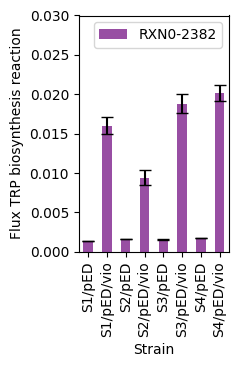

In [78]:
#df_ko_sum_gens = pd.concat([df_flux_KO_KI_over100, df_flux_KO_over100, df_flux_KI_over100, df_flux_wildtype_over100])

df_ko_gr = flux_ko_ki_sum_gens_sum.groupby(['ko_index'])[['RXN0-2382']]
means = df_ko_gr.mean()
counts = df_ko_gr.size()
std = df_ko_gr.std()
errors = pd.DataFrame()
errors[['RXN0-2382']] = df_ko_gr.std()[['RXN0-2382']].div(counts, axis=0)

fig, ax = plt.subplots(figsize=(2.49, 3.77))
means.plot.bar(yerr=errors, ax=ax, capsize=4, rot=90, color='#984ea3')

ax.set_ylabel("Flux TRP biosynthesis reaction")
ax.set_xlabel("Strain")
ax.set_ylim([0, 0.03])
fig.tight_layout()
fig.savefig('flux.png')

# Min genome analysis

## Single essentialiality

In [79]:
import pandas as pd
wcm2024 = pd.read_csv('/functional_genes2024.tsv', sep='\t', header=1)
wcm2024['RNA ID'] = wcm2024['RNA ID'].str.split('_').str[0]
print(len(set(wcm2024['RNA ID'])))
wcm2024.head()

1899


,Gene,RNA ID,Monomer ID,Process
0,aaeA,G7686,G7686-MONOMER,Metabolism
1,aaeB,G7685,G7685-MONOMER,Metabolism
2,aas,EG11679,AAS-MONOMER,Metabolism
3,aat,EG11112,EG11112-MONOMER,Metabolism
4,abgA,G6670,G6670-MONOMER,Metabolism


In [80]:
wcm_kieren = pd.read_excel('/WCM_Rousset_essentiality_1.xlsx')
print(len(set(wcm_kieren['EcoCyc ID'])& set(wcm2024['RNA ID'])))
wcm_kieren.head()

1863


,Gene,EcoCyc ID,WCM essentiality,Rousset essentiality (all strains),WCM (old) essentiality
0,betT,EG10112,0,0,0.0
1,betB,EG10110,0,0,0.0
2,betA,EG10109,0,0,0.0
3,bcp,EG10108,0,0,NaN
4,avtA,EG10107,0,0,0.0


In [81]:
import pickle
with open('all_genes_ki.txt', 'w') as f:
    for line in list(wcm_kieren['EcoCyc ID']):
        f.write(f"{line}\n")

In [82]:
wcm_ess = pd.read_pickle('/df_ess_2024.pkl')
wcm_ess['gene_rna'] = wcm_ess['gene_rna'].str.split('_').str[0]
wcm_ess.head()

,gene_rna,essentiality
0,G6905,0
1,G7313,0
2,EG11467,0
3,EG10453,1
4,EG10492,1


In [83]:
wcm2024['essentiality'] = None  # Initialize the column with None
for i, row in wcm2024.iterrows():
    rna_id = row['RNA ID'].split('_')[0]
    if rna_id in list(wcm_kieren['EcoCyc ID']):
        essentiality = wcm_kieren[wcm_kieren['EcoCyc ID'] == rna_id]['WCM essentiality'].values[0]
        wcm2024.at[i, 'essentiality'] = essentiality  
    else:
        essentiality = wcm_ess[wcm_ess['gene_rna'] == rna_id]['essentiality'].values[0]
        wcm2024.at[i, 'essentiality'] = essentiality  


In [84]:
wcm2024['essentiality'].value_counts()

essentiality
0    1696
1     203
Name: count, dtype: int64

## Minesweeper stage 2

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'DejaVu Sans'

In [86]:
st2_all_201 = pd.read_pickle('/bm_mean_stage2.pkl')
st2_all_202 = pd.read_pickle('/bm_mean_stage2_seed1.pkl')
st2_all_20 = pd.concat([st2_all_202, st2_all_201])
st2_all_20['seed'] = st2_all_20['cell_path'].str.split('/').str[8]


In [87]:
print("For each KI expression level and KOs pair, the total number of seeds simulated is: ", st2_all_20[st2_all_20["generation"]=="generation_000000"].groupby(["variant"])["seed"].count(),
     "And the total number of seeds that reach generation 20 is: ", st2_all_20[st2_all_20["generation"]=="generation_000019"].groupby(["variant"])["seed"].count())

For each KI expression level and KOs pair, the total number of seeds simulated is:  variant
double_knockout_000005    19
double_knockout_000007    20
double_knockout_000009     5
double_knockout_000010    20
double_knockout_000011    14
double_knockout_000012    20
double_knockout_000013    20
double_knockout_000014    20
double_knockout_000015    20
double_knockout_000016    20
double_knockout_000017    20
double_knockout_000018    20
double_knockout_000019    20
double_knockout_000020    20
double_knockout_000021    20
double_knockout_000022    20
double_knockout_000023    20
double_knockout_000024    20
double_knockout_000025    20
double_knockout_000026    20
double_knockout_000027    20
double_knockout_000028    20
double_knockout_000029    20
double_knockout_000030    20
double_knockout_000031    20
double_knockout_000032    20
double_knockout_000033    20
double_knockout_000034    20
double_knockout_000035    20
double_knockout_000036    20
double_knockout_000037    20
double_kn

In [88]:
x = st2_all_20[st2_all_20["generation"]=="generation_000019"].groupby(["variant"])["seed"].count()
vars = x[x>=16].index
len(vars)

21

In [89]:
st2_dividing = st2_all_20[st2_all_20['variant'].isin(vars)]
st2_dividing['id'] = st2_dividing['variant'].str.split('_').str[2].str.lstrip('0')

In [90]:
# Match codes to the double KO number from the wcm
codes = ['100.0', '90.0a', '90.0b', '80.0a', '80.0b', '70.0a', '70.0b', '60.0a', '60.0b', '50.0a', '50.0b', '33.0a', '33.0b', '33.0c', '25.0a', '25.0b', '25.0c', '25.0d', '12.5a', 
         '12.5b', '12.5c', '12.5d', '12.5e', '12.5f', '12.5g', '12.5h', '10.0a', '10.0b', '10.0c', '10.0d', '10.0e', '10.0f', '10.0g', '10.0h', '10.0i', '10.0j', '5.0a', '5.0b', '5.0c', 
         '5.0d', '5.0e', '5.0f', '5.0g', '5.0h', '5.0i', '5.0j', '5.0k', '5.0l', '5.0m', '5.0n', '5.0o', '5.0p', '5.0q', '5.0r', '5.0s', '5.0t']
my_dict = {str(i+1): codes[i] for i in range(len(codes))}

my_dict

{'1': '100.0',
 '2': '90.0a',
 '3': '90.0b',
 '4': '80.0a',
 '5': '80.0b',
 '6': '70.0a',
 '7': '70.0b',
 '8': '60.0a',
 '9': '60.0b',
 '10': '50.0a',
 '11': '50.0b',
 '12': '33.0a',
 '13': '33.0b',
 '14': '33.0c',
 '15': '25.0a',
 '16': '25.0b',
 '17': '25.0c',
 '18': '25.0d',
 '19': '12.5a',
 '20': '12.5b',
 '21': '12.5c',
 '22': '12.5d',
 '23': '12.5e',
 '24': '12.5f',
 '25': '12.5g',
 '26': '12.5h',
 '27': '10.0a',
 '28': '10.0b',
 '29': '10.0c',
 '30': '10.0d',
 '31': '10.0e',
 '32': '10.0f',
 '33': '10.0g',
 '34': '10.0h',
 '35': '10.0i',
 '36': '10.0j',
 '37': '5.0a',
 '38': '5.0b',
 '39': '5.0c',
 '40': '5.0d',
 '41': '5.0e',
 '42': '5.0f',
 '43': '5.0g',
 '44': '5.0h',
 '45': '5.0i',
 '46': '5.0j',
 '47': '5.0k',
 '48': '5.0l',
 '49': '5.0m',
 '50': '5.0n',
 '51': '5.0o',
 '52': '5.0p',
 '53': '5.0q',
 '54': '5.0r',
 '55': '5.0s',
 '56': '5.0t'}

In [91]:
st2_dividing['segment'] = st2_dividing['id'].map(my_dict)

In [92]:
import ast

segm = {'100.0': ['EG10999', 'EG11000', 'EG11556', 'EG11511', 'EG11512', 'EG10241', 'EG10652', 'EG11079', 'EG10548', 'EG11080', 'EG11081', 'EG11082', 'EG10134', 'EG10135', 'EG11557', 'EG11558', 'EG11559', 'EG11560', 'EG11561', 'EG11568', 'EG10521', 'EG10326', 'EG10048', 'EG10523', 'EG10691', 'EG10985', 'EG11569', 'EG12609', 'EG10055', 'EG10052', 'EG10053', 'EG10054', 'EG11572', 'EG11573', 'EG11574', 'EG11754', 'EG11575', 'EG11576', 'EG11577', 'EG10531', 'EG10500', 'EG10499', 'EG11085', 'EG10621', 'EG10622', 'EG10604', 'EG10620', 'EG10623', 'EG10619', 'EG10214', 'EG10265', 'EG10626', 'EG12312', 'EG10422', 'EG11546', 'EG10041', 'EG10084', 'EG10024', 'EG10025', 'EG10543', 'EG10963', 'EG12318', 'EG10369', 'EG20098', 'EG11746', 'EG11675', 'EG11374', 'EG12330', 'EG10302', 'EG10304', 'EG10305', 'EG10303', 'EG10432', 'EG12331', 'EG12334', 'EG11090', 'EG10225', 'EG10463', 'EG11411', 'EG10570', 'EG12715', 'G6092', 'EG10139', 'EG10316', 'EG11284', 'EG10545', 'EG10546', 'EG10861', 'EG11647', 'G6094', 'G6096', 'EG12354', 'EG11503', 'EG11504', 'EG11737', 'EG11621', 'EG11736', 'EG11648', 'EG10246', 'G6099', 'EG10860', 'G6103', 'G6105', 'G6106', 'G6108', 'EG10695', 'EG10414', 'EG10729', 'G6135', 'G6136', 'G6140', 'G6141', 'EG10067', 'G6155', 'G6156', 'G6157', 'G6174', 'EG10109', 'EG10110', 'EG10112', 'EG11236', 'G6190', 'G6196', 'G6198', 'G6199', 'G6200', 'EG11327', 'EG11326', 'EG10176', 'EG10175', 'EG10177', 'EG10524', 'EG10526', 'EG10527', 'M010', 'M011', 'M012', 'M013', 'M014', 'G6205', 'G6206', 'G6208', 'EG50010', 'G6217', 'G6219', 'EG12423', 'EG10428', 'EG12867', 'EG10928', 'EG10213', 'EG10727', 'EG11257', 'EG10082', 'EG12159', 'EG11288', 'EG10733', 'EG12168', 'EG10565', 'EG11095', 'EG10812', 'EG10996', 'EG11096', 'EG10938', 'EG10940', 'EG11035', 'EG11321', 'EG11322', 'G6234', 'EG10704', 'G6237', 'EG10508', 'G6238', 'G198', 'G6239', 'EG10182', 'EG10181', 'EG10180', 'EG10179', 'EG12183', 'EG11003', 'EG10158', 'EG10159', 'EG10542', 'G6244', 'G6245', 'G6246', 'EG11821', 'EG10995', 'G58', 'EG11704', 'EG11703', 'EG10051', 'EG10461', 'EG10431', 'EG11102', 'G6256', 'EG11060', 'EG12454', 'G6261', 'G6269', 'EG11542', 'EG11768', 'G6275', 'EG11583', 'G6277', 'G6278', 'G6280', 'G6281', 'G6283', 'G6284', 'G6285', 'G6286', 'G6287', 'EG12384', 'EG10758', 'EG10629', 'G6310', 'G6318', 'G6320', 'G6321', 'G6322', 'EG12367', 'EG10708', 'EG50005', 'G6326', 'EG10262', 'EG10293', 'EG10299', 'EG10295', 'EG10298', 'EG10296', 'EG11104', 'EG10294', 'EG10261', 'EG10263', 'EG10259', 'EG11105', 'EG10167', 'G6329', 'G6333', 'EG11384', 'EG11385', 'EG10856', 'G6338', 'G6339', 'G6340', 'G6344', 'G6347', 'EG12180', 'EG12209', 'EG11306', 'EG11591', 'EG10201', 'EG10606', 'EG11254', 'G6349', 'G6350', 'EG10855', 'G6358', 'EG12663', 'EG12662', 'EG12661', 'G6359', 'EG10168', 'G6364', 'G6365', 'EG10092', 'EG10634', 'EG10632', 'EG10633', 'EG10635', 'G6370', 'EG12144', 'EG10753', 'EG10964', 'EG10515', 'EG10514', 'EG10513', 'G0-10439', 'EG10736', 'G6378', 'G6380', 'G6381', 'G6382', 'EG10402', 'EG10933', 'EG10934', 'EG10931', 'EG10932', 'EG10979', 'EG10980', 'EG10981', 'EG10982', 'EG13235', 'EG13236', 'EG10173', 'EG10174', 'G0-10441', 'EG10630', 'EG11700', 'G6393', 'EG10079', 'EG11699', 'EG11698', 'EG10363', 'EG10366', 'EG10362', 'EG12427', 'EG10002', 'EG10152', 'EG11239', 'G6397', 'EG10117', 'EG10118', 'EG10121', 'EG10119', 'EG10120', 'EG11595', 'EG11666', 'EG11597', 'EG11598', 'G6406', 'G6409', 'G6410', 'G6411', 'EG11579', 'EG11581', 'G6414', 'G6416', 'EG10389', 'EG10388', 'EG10386', 'EG12134', 'G6418', 'G6422', 'G6425', 'G6428', 'EG10154', 'EG10153', 'G6429', 'G6430', 'G6431', 'G6432', 'G6435', 'G6437', 'EG10203', 'G6439', 'G6440', 'G6442', 'EG10417', 'EG11261', 'EG10852', 'EG11629', 'EG11630', 'EG11631', 'EG11632', 'G6449', 'EG11628', 'EG11627', 'EG11626', 'EG11624', 'G6452', 'G6455', 'EG10754', 'G6456', 'G6457', 'G6458', 'EG13270', 'G6461', 'G6462', 'EG10156', 'EG11112', 'EG10012', 'EG11405', 'EG10547', 'EG10232', 'EG10233', 'EG10234', 'EG10028', 'EG11258', 'G6468', 'EG10946', 'EG11265', 'EG10441', 'EG10613', 'EG11409', 'G6471', 'EG10519', 'EG12167', 'EG11253', 'G6474', 'G6475', 'EG10671', 'EG10742', 'EG10696', 'EG12358', 'G6476', 'G6477', 'G6478', 'G6479', 'G6487', 'G6488', 'EG10273', 'G6497', 'G6501', 'G6502', 'EG12876', 'EG10468', 'EG10469', 'EG10470', 'EG11380', 'EG11379', 'G0-10588', 'EG10049', 'EG11826', 'G6503', 'EG11815', 'EG11814', 'EG10033', 'EG11540', 'G6517', 'G6518', 'G6519', 'G6520', 'G6521', 'G6522', 'G6523', 'EG10801', 'EG10802', 'EG11735', 'G6528', 'G6529', 'G6530', 'G6532', 'G6539', 'G6550', 'G6551', 'EG11343', 'EG10464', 'EG11116', 'EG12688', 'EG10851', 'G6561', 'EG10859', 'EG11118', 'EG11438', 'EG11437', 'EG10277', 'EG12606', 'EG11493', 'EG11494', 'EG10787', 'EG10306', 'EG12172', 'G6566', 'G6567', 'EG10649', 'G6571', 'G6573', 'G6574', 'G6575', 'G6576', 'EG10752', 'EG10751', 'EG10750', 'EG10749', 'EG11549', 'EG11430', 'EG11344', 'G6580', 'G6581', 'EG11393', 'EG11392', 'EG11407', 'EG11408', 'G6621', 'G6622', 'EG11017', 'EG12399', 'G6626', 'G6627', 'EG11404', 'EG10785', 'EG12392', 'EG11294', 'EG11293', 'EG10427', 'EG12424', 'EG10518', 'EG11753', 'EG12403', 'EG10643', 'EG10646', 'EG10642', 'EG10638', 'EG10639', 'EG10640', 'EG11819', 'EG11319', 'EG10457', 'EG10994', 'EG10031', 'EG10674', 'EG10675', 'EG10676', 'EG10677', 'EG10678', 'EG11608', 'EG11012', 'EG11121', 'G6634', 'EG12433', 'EG10130', 'EG11325', 'EG11331', 'EG10705', 'G6639', 'EG11620', 'EG11528', 'EG12305', 'EG12304', 'G2000', 'G2001', 'G6643', 'G6644', 'G6645', 'EG10036', 'EG11822', 'G6646', 'EG10780', 'G6647', 'G6651', 'G6652', 'G6653', 'G6654', 'G6655', 'EG11042', 'G6660', 'G6661', 'G6662', 'G6665', 'EG10325', 'EG10668', 'EG12853', 'G6669', 'G6670', 'G6673', 'G6674', 'G6675', 'EG11020', 'G6701', 'G592', 'G7961', 'EG13139', 'G6708', 'G6709', 'G6710', 'G6711', 'G6713', 'G6714', 'G6715', 'G6716', 'G6717', 'G6718', 'G6719', 'G6721', 'EG11309', 'G6731', 'EG10035', 'EG10172', 'EG10853', 'EG11884', 'G6746', 'G6755', 'G6759', 'G6760', 'G6762', 'G6764', 'EG11761', 'G6770', 'EG10644', 'EG10647', 'EG10648', 'EG12153', 'EG12713', 'EG11227', 'EG11228', 'EG11229', 'G6775', 'EG10948', 'EG10680', 'G6782', 'G6783', 'G6784', 'G6786', 'EG11490', 'EG10443', 'EG10442', 'G6798', 'G6800', 'G6801', 'G6802', 'G6803', 'G6804', 'G6805', 'G6806', 'EG11065', 'G6810', 'G6811', 'EG11636', 'EG11639', 'EG11643', 'EG10212', 'EG12345', 'G6842', 'G6845', 'G6846', 'G6847', 'G6848', 'G6850', 'G6851', 'G6857', 'G6858', 'G6859', 'EG10745', 'EG10744', 'G6862', 'EG10358', 'EG10356', 'EG10566', 'EG11658', 'EG11055', 'EG10425', 'EG10563', 'EG10564', 'EG10030', 'EG10662', 'G6877', 'G6879', 'EG11487', 'G6880', 'G6886', 'G6891', 'EG11548', 'G6892', 'EG10954', 'G0-10594', 'EG12141', 'EG11531', 'EG11406', 'EG12400', 'EG10804', 'G6904', 'G6905', 'G6906', 'G6912', 'G6913', 'EG11234', 'EG12432', 'EG12357', 'EG10759', 'EG10080', 'G6924', 'EG10128', 'EG10129', 'EG10127', 'EG10440', 'EG10700', 'G6932', 'G6934', 'EG10509', 'EG12198', 'EG10144', 'EG10142', 'EG10141', 'EG10140', 'EG10663', 'G6940', 'G6941', 'G6942', 'G6943', 'G6944', 'EG11073', 'G6952', 'G6954', 'EG10372', 'EG10943', 'EG10045', 'G6958', 'G6959', 'G6960', 'EG12394', 'G6967', 'G6969', 'G6972', 'G6973', 'G6977', 'G6980', 'G6984', 'G6986', 'G6988', 'G6989', 'EG10858', 'EG11530', 'G6991', 'EG10683', 'EG12693', 'EG10930', 'EG10567', 'EG10568', 'EG10569', 'G6999', 'EG12207', 'EG10760', 'G7005', 'G7008', 'G7011', 'EG11809', 'EG10256', 'EG10257', 'EG11221', 'EG10803', 'EG10614', 'EG10013', 'G7017', 'G7018', 'EG12368', 'EG11138', 'G7020', 'G7021', 'G7022', 'EG10151', 'EG10148', 'EG11751', 'EG11752', 'EG10059', 'EG10058', 'EG10057', 'EG10921', 'EG11041', 'EG10706', 'EG12347', 'G7037', 'G7038', 'G7039', 'EG11662', 'G7049', 'EG10211', 'G7055', 'G7058', 'G7060', 'G7063', 'G7067', 'G7070', 'G7073', 'EG12151', 'EG12150', 'EG13238', 'EG11893', 'G7091', 'EG10411', 'EG11983', 'EG11981', 'EG11979', 'EG11978', 'EG12411', 'EG12412', 'G7095', 'G7096', 'G7097', 'G7098', 'EG10162', 'EG10161', 'EG11790', 'EG11789', 'EG11788', 'EG11787', 'G7099', 'G7100', 'G7102', 'G7103', 'G7104', 'G7105', 'G7106', 'G7107', 'EG11418', 'EG11701', 'EG12396', 'G7111', 'G7113', 'G7114', 'G7115', 'EG11618', 'G7123', 'EG12417', 'EG12415', 'EG12414', 'EG12419', 'G7129', 'G7135', 'M007', 'G7138', 'EG12009', 'EG12010', 'EG12011', 'EG12012', 'EG12013', 'EG10231', 'EG12015', 'EG12022', 'EG10137', 'G7145', 'EG11289', 'EG10594', 'EG10592', 'EG10593', 'EG12026', 'EG11337', 'EG10651', 'EG12030', 'EG12032', 'EG12033', 'EG11646', 'EG10336', 'EG10337', 'G7990', 'EG12034', 'EG12104', 'G7146', 'G7147', 'EG12037', 'EG12038', 'EG12040', 'EG12041', 'EG11419', 'EG12044', 'EG12045', 'EG12052', 'EG12053', 'EG12054', 'EG12055', 'EG12169', 'EG12057', 'EG12058', 'EG12059', 'EG12060', 'EG12062', 'EG12064', 'EG12069', 'EG10037', 'EG10029', 'EG12073', 'EG10670', 'EG10821', 'EG11669', 'EG11670', 'EG11671', 'EG11672', 'EG11143', 'EG10660', 'EG10661', 'EG10399', 'EG10401', 'EG10391', 'EG10392', 'EG10393', 'G7158', 'G7160', 'G7164', 'G7166', 'G7167', 'G7168', 'G7169', 'G7170', 'G0-10460', 'G7171', 'EG12437', 'EG11368', 'EG12438', 'EG10579', 'EG12362', 'G7175', 'G7176', 'EG12093', 'EG11773', 'EG12092', 'EG12091', 'EG12090', 'EG12089', 'EG12088', 'EG12087', 'EG11774', 'EG12086', 'EG12084', 'EG12083', 'EG12082', 'EG12123', 'G7184', 'G7185', 'G7187', 'EG10027', 'EG20173', 'G7195', 'EG10452', 'EG10007', 'EG12125', 'EG12124', 'EG10072', 'EG11044', 'EG10327', 'EG10217', 'EG10454', 'G0-9461', 'G7199', 'G7201', 'EG10580', 'EG12449', 'G7211', 'G7212', 'G7213', 'EG10280', 'G7220', 'G7230', 'EG10250', 'EG10249', 'EG13283', 'G7233', 'G7234', 'G7236', 'G7237', 'G7241', 'G7242', 'G7247', 'G7248', 'EG12957', 'G7254', 'EG11971', 'EG13159', 'G85', 'EG10534', 'EG10003', 'EG10192', 'EG10789', 'EG10165', 'G7259', 'EG10183', 'EG10198', 'EG10197', 'EG10195', 'EG12133', 'G7263', 'G7264', 'G7265', 'G7266', 'EG12189', 'EG50007', 'EG50006', 'G7285', 'G7288', 'G7293', 'EG11797', 'EG12100', 'EG12410', 'EG10014', 'G7297', 'EG10108', 'G7309', 'G7311', 'G7313', 'EG12129', 'EG11332', 'EG10799', 'EG11510', 'G7314', 'G7319', 'EG12401', 'EG10650', 'EG11600', 'EG12310', 'EG12130', 'G7324', 'G7325', 'G7327', 'EG10983', 'G7330', 'M009', 'M015', 'G7334', 'G7335', 'G7336', 'EG10456', 'EG11372', 'EG11371', 'EG10247', 'EG10693', 'EG10631', 'EG11538', 'EG12445', 'G7349', 'G7350', 'EG10781', 'EG10522', 'EG12097', 'EG12098', 'EG10078', 'EG12880', 'EG11023', 'EG12192', 'G7394', 'EG12387', 'EG11329', 'EG10361', 'EG11330', 'G7399', 'EG20257', 'EG12381', 'EG10771', 'EG10773', 'G7405', 'G7406', 'EG11354', 'EG11439', 'EG12712', 'EG10418', 'G7408', 'G7409', 'G7410', 'G8210', 'EG10969', 'EG10970', 'EG10971', 'EG10973', 'G7413', 'EG12450', 'EG11551', 'EG10086', 'EG10085', 'EG10480', 'EG10479', 'EG10478', 'EG10477', 'EG10476', 'EG10475', 'EG10483', 'EG10484', 'EG10485', 'EG10486', 'G7415', 'EG10689', 'EG11817', 'G7422', 'EG11816', 'G7423', 'EG10488', 'G7431', 'G7443', 'EG10258', 'EG10572', 'EG11247', 'G7445', 'G7447', 'G7449', 'G7452', 'EG12373', 'EG12142', 'EG11623', 'EG10351', 'EG10348', 'EG10352', 'EG10349', 'EG10350', 'EG10355', 'EG11794', 'G7454', 'G7456', 'EG10786', 'EG12128', 'G7459', 'EG12455', 'EG11679', 'EG10056', 'EG12361', 'G7463', 'G7485', 'G7486', 'G7487', 'G7490', 'G7496', 'G7501', 'G7502', 'G7503', 'G7507', 'G7508', 'EG10552', 'G7513', 'G495', 'EG11810', 'EG11442', 'EG11333', 'EG11324', 'EG10697', 'EG11158', 'EG10490', 'EG11444', 'EG11445', 'G7516', 'G7517', 'EG11159', 'EG10282', 'EG10703', 'EG10368', 'EG11162', 'EG11245', 'EG11792', 'EG11791', 'EG11427', 'EG11291', 'EG10960', 'EG12366', 'EG10419', 'G7530', 'EG10046', 'EG11779', 'G7533', 'EG10664', 'EG10961', 'G7542', 'EG20080', 'G0-8601', 'G7544', 'G7545', 'EG12883', 'EG12882', 'EG11801', 'EG11800', 'EG11799', 'G7554', 'G7558', 'EG11292', 'EG10272', 'EG10271', 'EG10583', 'G7564', 'G7565', 'EG11377', 'EG12656', 'G7579', 'EG12633', 'EG11009', 'EG11165', 'EG11166', 'EG11167', 'EG10465', 'G7582', 'G7590', 'EG11602', 'EG11603', 'EG11665', 'EG11673', 'EG11168', 'EG11169', 'EG12393', 'EG11171', 'G7593', 'G7596', 'G36', 'G7603', 'EG12732', 'EG12734', 'G81', 'EG12738', 'G7616', 'G7622', 'EG12754', 'G7624', 'EG11172', 'EG10991', 'EG10990', 'EG11175', 'EG11176', 'EG10016', 'EG12760', 'EG12522', 'G7634', 'EG12768', 'G7641', 'G7647', 'EG10617', 'EG10743', 'EG11177', 'EG12095', 'EG11553', 'EG50011', 'EG11506', 'EG11507', 'EG10202', 'EG10017', 'EG11358', 'G7662', 'G7663', 'G7664', 'G7665', 'EG11680', 'EG11383', 'EG10403', 'EG10404', 'G7675', 'G7676', 'G7677', 'G436', 'EG10637', 'G7682', 'EG11652', 'EG10576', 'EG10070', 'G7685', 'G7686', 'G7689', 'EG11298', 'EG11315', 'EG10276', 'EG10685', 'EG11497', 'EG11311', 'EG10317', 'EG10266', 'EG10267', 'EG11268', 'EG12163', 'EG10766', 'G7702', 'G7703', 'G7704', 'G7705', 'G7706', 'G7707', 'G7708', 'G7709', 'G7710', 'G7711', 'EG12173', 'EG11359', 'G7712', 'G7713', 'G7714', 'G7716', 'EG11663', 'EG20110', 'EG10066', 'EG10682', 'EG10757', 'EG10653', 'EG10655', 'EG10654', 'EG10188', 'EG12908', 'G7723', 'G7724', 'G7726', 'EG11871', 'M004', 'EG10204', 'EG10081', 'EG10748', 'G7740', 'G7742', 'EG10688', 'EG10269', 'EG12102', 'EG10122', 'EG12380', 'EG10561', 'EG10560', 'G7750', 'G7751', 'EG10395', 'EG10394', 'EG10379', 'EG12631', 'EG12629', 'G7756', 'EG11050', 'EG11048', 'EG11049', 'EG11046', 'EG11047', 'EG10536', 'EG10537', 'EG10541', 'EG10538', 'EG10540', 'EG10539', 'EG10343', 'EG12215', 'EG12216', 'EG12217', 'EG12221', 'EG12075', 'EG12076', 'EG12077', 'EG12078', 'EG12079', 'EG12230', 'EG12232', 'EG12233', 'EG12234', 'EG10412', 'EG12236', 'EG12237', 'EG12240', 'EG12241', 'EG50009', 'EG12244', 'EG12245', 'EG12252', 'EG12253', 'EG20044', 'EG12256', 'EG12265', 'EG12628', 'EG12627', 'EG12626', 'EG12625', 'EG10248', 'EG12267', 'EG12270', 'EG10124', 'EG12272', 'EG11075', 'EG11074', 'EG20252', 'EG12275', 'EG12276', 'EG10107', 'EG12279', 'EG12281', 'EG12282', 'EG12283', 'EG12284', 'EG12285', 'EG12286', 'EG12287', 'EG12292', 'EG12293', 'EG10942', 'EG10941', 'EG10615', 'EG10616', 'EG11961', 'EG11963', 'EG11888', 'EG20091', 'EG12294', 'EG12296', 'EG11266', 'EG10993', 'EG10512', 'EG10838', 'EG12210', 'EG11189', 'EG11424', 'EG11423', 'EG11426', 'EG11425', 'EG11353', 'EG11352', 'EG11351', 'EG11339', 'EG11341', 'EG10520', 'EG11190', 'EG10329', 'EG10004', 'EG10251', 'EG11334', 'EG10967', 'EG10406', 'EG11194', 'EG11685', 'EG11689', 'EG11691', 'EG11692', 'EG11693', 'EG20053', 'GB4478', 'EG20049', 'EG20051', 'EG11195', 'EG10242', 'EG10235', 'EG10862', 'EG11197', 'EG10997', 'EG11005', 'EG11006', 'EG11720', 'EG11723', 'EG11724', 'EG11725', 'EG10114', 'EG10783', 'EG10782', 'EG10784', 'EG10734', 'EG10382', 'EG11198', 'EG10100', 'EG10101', 'EG10104', 'EG10098', 'EG10105', 'EG10103', 'EG10102', 'EG10099', 'EG10376', 'EG10375', 'EG10091', 'EG11731', 'EG11541', 'EG10817', 'EG10814', 'EG10816', 'EG10815', 'EG10818', 'EG12352', 'EG10413', 'EG10844', 'EG11031', 'EG10840', 'EG11451', 'EG11452', 'EG11453', 'EG11454', 'EG11455', 'EG11456', 'EG11486', 'G7800', 'EG11458', 'EG11459', 'EG10430', 'EG10429', 'EG11202', 'EG11463', 'EG11467', 'EG10738', 'EG11468', 'EG11469', 'EG10739', 'EG11470', 'EG11471', 'EG10584', 'EG11045', 'EG11473', 'EG11474', 'EG11396', 'EG10334', 'EG10278', 'EG10279', 'EG10698', 'EG11021', 'EG11485', 'EG11829', 'EG11831', 'EG11297', 'EG11833', 'EG10746', 'EG11835', 'EG11836', 'EG11841', 'EG11843', 'EG11845', 'EG11846', 'EG11847', 'EG11848', 'EG11850', 'EG11852', 'EG11856', 'EG11857', 'EG11858', 'EG11859', 'EG11865', 'EG11866', 'EG11867', 'EG11313', 'EG10953', 'EG11869', 'EG11870', 'EG10163', 'EG11873', 'EG10699', 'EG10929', 'EG10138', 'EG11015', 'EG10628', 'EG11517', 'EG10398', 'EG10396', 'EG11880', 'EG11881', 'EG11676', 'EG10200', 'EG10588', 'EG10582', 'EG10590', 'EG10511', 'EG11902', 'EG11904', 'EG11905', 'EG11914', 'EG10756', 'EG11428', 'EG11022', 'EG10126', 'EG11204', 'EG11205', 'EG10123', 'EG10922', 'EG10939', 'EG11590', 'EG11589', 'EG11587', 'EG11586', 'EG11585', 'EG11702', 'EG11543', 'EG11915', 'EG11207', 'EG10023', 'EG10022', 'EG10026', 'EG10587', 'EG11919', 'EG11920', 'EG11921', 'EG10550', 'EG10702', 'EG11076', 'EG10556', 'EG10555', 'EG10554', 'EG10558', 'EG10528', 'EG11369', 'EG11370', 'EG10740', 'EG10224', 'EG10533', 'EG11932', 'EG11492', 'EG10001', 'EG11040', 'EG11934', 'EG11938', 'EG11939', 'EG11942', 'EG11448', 'EG11946', 'EG11947', 'EG10405', 'EG10285', 'EG11952', 'EG11953', 'EG11954', 'EG11955', 'EG11956', 'EG11957', 'EG11958', 'EG11959', 'EG12458', 'EG11827', 'EG10725', 'EG10724', 'EG10723', 'EG10722', 'EG10721', 'EG10720', 'EG10719', 'EG10718', 'EG10717', 'EG10716', 'EG10714', 'EG10713', 'EG11612', 'EG11614', 'EG11613', 'EG12462', 'EG11501', 'EG10577', 'EG10578', 'EG10357', 'EG10006', 'G7826', 'EG10553', 'EG12469', 'EG10131', 'EG10132', 'EG12178', 'EG11225', 'EG10095', 'G7833', 'EG10600', 'EG10599', 'G7836', 'EG11616', 'EG10333', 'EG10332', 'EG10331', 'EG10330', 'EG11211', 'G7841', 'G7842', 'G7843', 'EG11758', 'EG11757', 'EG10595', 'EG10437', 'EG10436', 'EG10435', 'EG11259', 'G7845', 'EG11812', 'EG11811', 'G7853', 'G7855', 'G7856', 'EG12494', 'EG12495', 'G7858', 'G7859', 'G7860', 'G7865', 'EG12504', 'G7866', 'G7868', 'EG10160', 'EG10043', 'EG11433', 'EG12517', 'EG12518', 'EG12520', 'EG12439', 'EG10283', 'EG12440', 'EG10741', 'G812', 'EG11417', 'EG11402', 'EG12127', 'EG12525', 'G7877', 'EG10069', 'EG10694', 'G7888', 'G7889', 'EG12539', 'G7892', 'G7893', 'EG12152', 'EG11436', 'EG12544', 'G7901', 'EG10290', 'EG10289', 'EG10288', 'EG10287', 'EG10286', 'G7910', 'G7911', 'G7919', 'G7920', 'G7921', 'EG12563', 'EG11066', 'EG20248', 'G7925', 'EG12576', 'EG10021', 'G7942', 'EG12587', 'G7945', 'EG12591', 'G7948', 'G7950', 'EG10850', 'EG12115', 'EG10221', 'EG10219', 'EG10220', 'EG10222', 'EG11796', 'EG10945', 'EG11335', 'EG10950', 'EG11029', 'EG12600', 'EG10061'], '90.0a': ['EG10999', 'EG11000', 'EG11556', 'EG11511', 'EG11512', 'EG10241', 'EG10652', 'EG11079', 'EG10548', 'EG11080', 'EG11081', 'EG11082', 'EG10134', 'EG10135', 'EG11557', 'EG11558', 'EG11559', 'EG11560', 'EG11561', 'EG11568', 'EG10521', 'EG10326', 'EG10048', 'EG10523', 'EG10691', 'EG10985', 'EG11569', 'EG12609', 'EG10055', 'EG10052', 'EG10053', 'EG10054', 'EG11572', 'EG11573', 'EG11574', 'EG11754', 'EG11575', 'EG11576', 'EG11577', 'EG10531', 'EG10500', 'EG10499', 'EG11085', 'EG10621', 'EG10622', 'EG10604', 'EG10620', 'EG10623', 'EG10619', 'EG10214', 'EG10265', 'EG10626', 'EG12312', 'EG10422', 'EG11546', 'EG10041', 'EG10084', 'EG10024', 'EG10025', 'EG10543', 'EG10963', 'EG12318', 'EG10369', 'EG20098', 'EG11746', 'EG11675', 'EG11374', 'EG12330', 'EG10302', 'EG10304', 'EG10305', 'EG10303', 'EG10432', 'EG12331', 'EG12334', 'EG11090', 'EG10225', 'EG10463', 'EG11411', 'EG10570', 'EG12715', 'G6092', 'EG10139', 'EG10316', 'EG11284', 'EG10545', 'EG10546', 'EG10861', 'EG11647', 'G6094', 'G6096', 'EG12354', 'EG11503', 'EG11504', 'EG11737', 'EG11621', 'EG11736', 'EG11648', 'EG10246', 'G6099', 'EG10860', 'G6103', 'G6105', 'G6106', 'G6108', 'EG10695', 'EG10414', 'EG10729', 'G6135', 'G6136', 'G6140', 'G6141', 'EG10067', 'G6155', 'G6156', 'G6157', 'G6174', 'EG10109', 'EG10110', 'EG10112', 'EG11236', 'G6190', 'G6196', 'G6198', 'G6199', 'G6200', 'EG11327', 'EG11326', 'EG10176', 'EG10175', 'EG10177', 'EG10524', 'EG10526', 'EG10527', 'M010', 'M011', 'M012', 'M013', 'M014', 'G6205', 'G6206', 'G6208', 'EG50010', 'G6217', 'G6219', 'EG12423', 'EG10428', 'EG12867', 'EG10928', 'EG10213', 'EG10727', 'EG11257', 'EG10082', 'EG12159', 'EG11288', 'EG10733', 'EG12168', 'EG10565', 'EG11095', 'EG10812', 'EG10996', 'EG11096', 'EG10938', 'EG10940', 'EG11035', 'EG11321', 'EG11322', 'G6234', 'EG10704', 'G6237', 'EG10508', 'G6238', 'G198', 'G6239', 'EG10182', 'EG10181', 'EG10180', 'EG10179', 'EG12183', 'EG11003', 'EG10158', 'EG10159', 'EG10542', 'G6244', 'G6245', 'G6246', 'EG11821', 'EG10995', 'G58', 'EG11704', 'EG11703', 'EG10051', 'EG10461', 'EG10431', 'EG11102', 'G6256', 'EG11060', 'EG12454', 'G6261', 'G6269', 'EG11542', 'EG11768', 'G6275', 'EG11583', 'G6277', 'G6278', 'G6280', 'G6281', 'G6283', 'G6284', 'G6285', 'G6286', 'G6287', 'EG12384', 'EG10758', 'EG10629', 'G6310', 'G6318', 'G6320', 'G6321', 'G6322', 'EG12367', 'EG10708', 'EG50005', 'G6326', 'EG10262', 'EG10293', 'EG10299', 'EG10295', 'EG10298', 'EG10296', 'EG11104', 'EG10294', 'EG10261', 'EG10263', 'EG10259', 'EG11105', 'EG10167', 'G6329', 'G6333', 'EG11384', 'EG11385', 'EG10856', 'G6338', 'G6339', 'G6340', 'G6344', 'G6347', 'EG12180', 'EG12209', 'EG11306', 'EG11591', 'EG10201', 'EG10606', 'EG11254', 'G6349', 'G6350', 'EG10855', 'G6358', 'EG12663', 'EG12662', 'EG12661', 'G6359', 'EG10168', 'G6364', 'G6365', 'EG10092', 'EG10634', 'EG10632', 'EG10633', 'EG10635', 'G6370', 'EG12144', 'EG10753', 'EG10964', 'EG10515', 'EG10514', 'EG10513', 'G0-10439', 'EG10736', 'G6378', 'G6380', 'G6381', 'G6382', 'EG10402', 'EG10933', 'EG10934', 'EG10931', 'EG10932', 'EG10979', 'EG10980', 'EG10981', 'EG10982', 'EG13235', 'EG13236', 'EG10173', 'EG10174', 'G0-10441', 'EG10630', 'EG11700', 'G6393', 'EG10079', 'EG11699', 'EG11698', 'EG10363', 'EG10366', 'EG10362', 'EG12427', 'EG10002', 'EG10152', 'EG11239', 'G6397', 'EG10117', 'EG10118', 'EG10121', 'EG10119', 'EG10120', 'EG11595', 'EG11666', 'EG11597', 'EG11598', 'G6406', 'G6409', 'G6410', 'G6411', 'EG11579', 'EG11581', 'G6414', 'G6416', 'EG10389', 'EG10388', 'EG10386', 'EG12134', 'G6418', 'G6422', 'G6425', 'G6428', 'EG10154', 'EG10153', 'G6429', 'G6430', 'G6431', 'G6432', 'G6435', 'G6437', 'EG10203', 'G6439', 'G6440', 'G6442', 'EG10417', 'EG11261', 'EG10852', 'EG11629', 'EG11630', 'EG11631', 'EG11632', 'G6449', 'EG11628', 'EG11627', 'EG11626', 'EG11624', 'G6452', 'G6455', 'EG10754', 'G6456', 'G6457', 'G6458', 'EG13270', 'G6461', 'G6462', 'EG10156', 'EG11112', 'EG10012', 'EG11405', 'EG10547', 'EG10232', 'EG10233', 'EG10234', 'EG10028', 'EG11258', 'G6468', 'EG10946', 'EG11265', 'EG10441', 'EG10613', 'EG11409', 'G6471', 'EG10519', 'EG12167', 'EG11253', 'G6474', 'G6475', 'EG10671', 'EG10742', 'EG10696', 'EG12358', 'G6476', 'G6477', 'G6478', 'G6479', 'G6487', 'G6488', 'EG10273', 'G6497', 'G6501', 'G6502', 'EG12876', 'EG10468', 'EG10469', 'EG10470', 'EG11380', 'EG11379', 'G0-10588', 'EG10049', 'EG11826', 'G6503', 'EG11815', 'EG11814', 'EG10033', 'EG11540', 'G6517', 'G6518', 'G6519', 'G6520', 'G6521', 'G6522', 'G6523', 'EG10801', 'EG10802', 'EG11735', 'G6528', 'G6529', 'G6530', 'G6532', 'G6539', 'G6550', 'G6551', 'EG11343', 'EG10464', 'EG11116', 'EG12688', 'EG10851', 'G6561', 'EG10859', 'EG11118', 'EG11438', 'EG11437', 'EG10277', 'EG12606', 'EG11493', 'EG11494', 'EG10787', 'EG10306', 'EG12172', 'G6566', 'G6567', 'EG10649', 'G6571', 'G6573', 'G6574', 'G6575', 'G6576', 'EG10752', 'EG10751', 'EG10750', 'EG10749', 'EG11549', 'EG11430', 'EG11344', 'G6580', 'G6581', 'EG11393', 'EG11392', 'EG11407', 'EG11408', 'G6621', 'G6622', 'EG11017', 'EG12399', 'G6626', 'G6627', 'EG11404', 'EG10785', 'EG12392', 'EG11294', 'EG11293', 'EG10427', 'EG12424', 'EG10518', 'EG11753', 'EG12403', 'EG10643', 'EG10646', 'EG10642', 'EG10638', 'EG10639', 'EG10640', 'EG11819', 'EG11319', 'EG10457', 'EG10994', 'EG10031', 'EG10674', 'EG10675', 'EG10676', 'EG10677', 'EG10678', 'EG11608', 'EG11012', 'EG11121', 'G6634', 'EG12433', 'EG10130', 'EG11325', 'EG11331', 'EG10705', 'G6639', 'EG11620', 'EG11528', 'EG12305', 'EG12304', 'G2000', 'G2001', 'G6643', 'G6644', 'G6645', 'EG10036', 'EG11822', 'G6646', 'EG10780', 'G6647', 'G6651', 'G6652', 'G6653', 'G6654', 'G6655', 'EG11042', 'G6660', 'G6661', 'G6662', 'G6665', 'EG10325', 'EG10668', 'EG12853', 'G6669', 'G6670', 'G6673', 'G6674', 'G6675', 'EG11020', 'G6701', 'G592', 'G7961', 'EG13139', 'G6708', 'G6709', 'G6710', 'G6711', 'G6713', 'G6714', 'G6715', 'G6716', 'G6717', 'G6718', 'G6719', 'G6721', 'EG11309', 'G6731', 'EG10035', 'EG10172', 'EG10853', 'EG11884', 'G6746', 'G6755', 'G6759', 'G6760', 'G6762', 'G6764', 'EG11761', 'G6770', 'EG10644', 'EG10647', 'EG10648', 'EG12153', 'EG12713', 'EG11227', 'EG11228', 'EG11229', 'G6775', 'EG10948', 'EG10680', 'G6782', 'G6783', 'G6784', 'G6786', 'EG11490', 'EG10443', 'EG10442', 'G6798', 'G6800', 'G6801', 'G6802', 'G6803', 'G6804', 'G6805', 'G6806', 'EG11065', 'G6810', 'G6811', 'EG11636', 'EG11639', 'EG11643', 'EG10212', 'EG12345', 'G6842', 'G6845', 'G6846', 'G6847', 'G6848', 'G6850', 'G6851', 'G6857', 'G6858', 'G6859', 'EG10745', 'EG10744', 'G6862', 'EG10358', 'EG10356', 'EG10566', 'EG11658', 'EG11055', 'EG10425', 'EG10563', 'EG10564', 'EG10030', 'EG10662', 'G6877', 'G6879', 'EG11487', 'G6880', 'G6886', 'G6891', 'EG11548', 'G6892', 'EG10954', 'G0-10594', 'EG12141', 'EG11531', 'EG11406', 'EG12400', 'EG10804', 'G6904', 'G6905', 'G6906', 'G6912', 'G6913', 'EG11234', 'EG12432', 'EG12357', 'EG10759', 'EG10080', 'G6924', 'EG10128', 'EG10129', 'EG10127', 'EG10440', 'EG10700', 'G6932', 'G6934', 'EG10509', 'EG12198', 'EG10144', 'EG10142', 'EG10141', 'EG10140', 'EG10663', 'G6940', 'G6941', 'G6942', 'G6943', 'G6944', 'EG11073', 'G6952', 'G6954', 'EG10372', 'EG10943', 'EG10045', 'G6958', 'G6959', 'G6960', 'EG12394', 'G6967', 'G6969', 'G6972', 'G6973', 'G6977', 'G6980', 'G6984', 'G6986', 'G6988', 'G6989', 'EG10858', 'EG11530', 'G6991', 'EG10683', 'EG12693', 'EG10930', 'EG10567', 'EG10568', 'EG10569', 'G6999', 'EG12207', 'EG10760', 'G7005', 'G7008', 'G7011', 'EG11809', 'EG10256', 'EG10257', 'EG11221', 'EG10803', 'EG10614', 'EG10013', 'G7017', 'G7018', 'EG12368', 'EG11138', 'G7020', 'G7021', 'G7022', 'EG10151', 'EG10148', 'EG11751', 'EG11752', 'EG10059', 'EG10058', 'EG10057', 'EG10921', 'EG11041', 'EG10706', 'EG12347', 'G7037', 'G7038', 'G7039', 'EG11662', 'G7049', 'EG10211', 'G7055', 'G7058', 'G7060', 'G7063', 'G7067', 'G7070', 'G7073', 'EG12151', 'EG12150', 'EG13238', 'EG11893', 'G7091', 'EG10411', 'EG11983', 'EG11981', 'EG11979', 'EG11978', 'EG12411', 'EG12412', 'G7095', 'G7096', 'G7097', 'G7098', 'EG10162', 'EG10161', 'EG11790', 'EG11789', 'EG11788', 'EG11787', 'G7099', 'G7100', 'G7102', 'G7103', 'G7104', 'G7105', 'G7106', 'G7107', 'EG11418', 'EG11701', 'EG12396', 'G7111', 'G7113', 'G7114', 'G7115', 'EG11618', 'G7123', 'EG12417', 'EG12415', 'EG12414', 'EG12419', 'G7129', 'G7135', 'M007', 'G7138', 'EG12009', 'EG12010', 'EG12011', 'EG12012', 'EG12013', 'EG10231', 'EG12015', 'EG12022', 'EG10137', 'G7145', 'EG11289', 'EG10594', 'EG10592', 'EG10593', 'EG12026', 'EG11337', 'EG10651', 'EG12030', 'EG12032', 'EG12033', 'EG11646', 'EG10336', 'EG10337', 'G7990', 'EG12034', 'EG12104', 'G7146', 'G7147', 'EG12037', 'EG12038', 'EG12040', 'EG12041', 'EG11419', 'EG12044', 'EG12045', 'EG12052', 'EG12053', 'EG12054', 'EG12055', 'EG12169', 'EG12057', 'EG12058', 'EG12059', 'EG12060', 'EG12062', 'EG12064', 'EG12069', 'EG10037', 'EG10029', 'EG12073', 'EG10670', 'EG10821', 'EG11669', 'EG11670', 'EG11671', 'EG11672', 'EG11143', 'EG10660', 'EG10661', 'EG10399', 'EG10401', 'EG10391', 'EG10392', 'EG10393', 'G7158', 'G7160', 'G7164', 'G7166', 'G7167', 'G7168', 'G7169', 'G7170', 'G0-10460', 'G7171', 'EG12437', 'EG11368', 'EG12438', 'EG10579', 'EG12362', 'G7175', 'G7176', 'EG12093', 'EG11773', 'EG12092', 'EG12091', 'EG12090', 'EG12089', 'EG12088', 'EG12087', 'EG11774', 'EG12086', 'EG12084', 'EG12083', 'EG12082', 'EG12123', 'G7184', 'G7185', 'G7187', 'EG10027', 'EG20173', 'G7195', 'EG10452', 'EG10007', 'EG12125', 'EG12124', 'EG10072', 'EG11044', 'EG10327', 'EG10217', 'EG10454', 'G0-9461', 'G7199', 'G7201', 'EG10580', 'EG12449', 'G7211', 'G7212', 'G7213', 'EG10280', 'G7220', 'G7230', 'EG10250', 'EG10249', 'EG13283', 'G7233', 'G7234', 'G7236', 'G7237', 'G7241', 'G7242', 'G7247', 'G7248', 'EG12957', 'G7254', 'EG11971', 'EG13159', 'G85', 'EG10534', 'EG10003', 'EG10192', 'EG10789', 'EG10165', 'G7259', 'EG10183', 'EG10198', 'EG10197', 'EG10195', 'EG12133', 'G7263', 'G7264', 'G7265', 'G7266', 'EG12189', 'EG50007', 'EG50006', 'G7285', 'G7288', 'G7293', 'EG11797', 'EG12100', 'EG12410', 'EG10014', 'G7297', 'EG10108', 'G7309', 'G7311', 'G7313', 'EG12129', 'EG11332', 'EG10799', 'EG11510', 'G7314', 'G7319', 'EG12401', 'EG10650', 'EG11600', 'EG12310', 'EG12130', 'G7324', 'G7325', 'G7327', 'EG10983', 'G7330', 'M009', 'M015', 'G7334', 'G7335', 'G7336', 'EG10456', 'EG11372', 'EG11371', 'EG10247', 'EG10693', 'EG10631', 'EG11538', 'EG12445', 'G7349', 'G7350', 'EG10781', 'EG10522', 'EG12097', 'EG12098', 'EG10078', 'EG12880', 'EG11023', 'EG12192', 'G7394', 'EG12387', 'EG11329', 'EG10361', 'EG11330', 'G7399', 'EG20257', 'EG12381', 'EG10771', 'EG10773', 'G7405', 'G7406', 'EG11354', 'EG11439', 'EG12712', 'EG10418', 'G7408', 'G7409', 'G7410', 'G8210', 'EG10969', 'EG10970', 'EG10971', 'EG10973', 'G7413', 'EG12450', 'EG11551', 'EG10086', 'EG10085', 'EG10480', 'EG10479', 'EG10478', 'EG10477', 'EG10476', 'EG10475', 'EG10483', 'EG10484', 'EG10485', 'EG10486', 'G7415', 'EG10689', 'EG11817', 'G7422', 'EG11816', 'G7423', 'EG10488', 'G7431', 'G7443', 'EG10258', 'EG10572', 'EG11247', 'G7445', 'G7447', 'G7449', 'G7452', 'EG12373', 'EG12142', 'EG11623', 'EG10351', 'EG10348', 'EG10352', 'EG10349', 'EG10350', 'EG10355', 'EG11794', 'G7454', 'G7456', 'EG10786', 'EG12128', 'G7459', 'EG12455', 'EG11679', 'EG10056', 'EG12361', 'G7463', 'G7485', 'G7486', 'G7487', 'G7490', 'G7496', 'G7501', 'G7502', 'G7503', 'G7507', 'G7508', 'EG10552', 'G7513', 'G495', 'EG11810', 'EG11442', 'EG11333', 'EG11324', 'EG10697', 'EG11158', 'EG10490', 'EG11444', 'EG11445', 'G7516', 'G7517', 'EG11159', 'EG10282', 'EG10703', 'EG10368', 'EG11162', 'EG11245', 'EG11792', 'EG11791', 'EG11427', 'EG11291', 'EG10960', 'EG12366', 'EG10419', 'G7530', 'EG10046', 'EG11779', 'G7533', 'EG10664', 'EG10961', 'G7542', 'EG20080', 'G0-8601', 'G7544', 'G7545', 'EG12883', 'EG12882', 'EG11801', 'EG11800', 'EG11799', 'G7554', 'G7558', 'EG11292', 'EG10272', 'EG10271', 'EG10583', 'G7564', 'G7565', 'EG11377', 'EG12656', 'G7579', 'EG12633', 'EG11009', 'EG11165', 'EG11166', 'EG11167', 'EG10465', 'G7582', 'G7590', 'EG11602', 'EG11603', 'EG11665', 'EG11673', 'EG11168', 'EG11169', 'EG12393', 'EG11171', 'G7593', 'G7596', 'G36', 'G7603', 'EG12732', 'EG12734', 'G81', 'EG12738', 'G7616', 'G7622', 'EG12754', 'G7624', 'EG11172', 'EG10991', 'EG10990', 'EG11175', 'EG11176', 'EG10016', 'EG12760', 'EG12522', 'G7634', 'EG12768', 'G7641', 'G7647', 'EG10617', 'EG10743', 'EG11177', 'EG12095', 'EG11553', 'EG50011', 'EG11506', 'EG11507', 'EG10202', 'EG10017', 'EG11358', 'G7662', 'G7663', 'G7664', 'G7665', 'EG11680', 'EG11383', 'EG10403', 'EG10404', 'G7675', 'G7676', 'G7677', 'G436', 'EG10637', 'G7682', 'EG11652', 'EG10576', 'EG10070', 'G7685', 'G7686', 'G7689', 'EG11298', 'EG11315', 'EG10276', 'EG10685', 'EG11497', 'EG11311', 'EG10317', 'EG10266', 'EG10267', 'EG11268', 'EG12163', 'EG10766', 'G7702', 'G7703', 'G7704', 'G7705', 'G7706', 'G7707', 'G7708', 'G7709', 'G7710', 'G7711', 'EG12173', 'EG11359', 'G7712', 'G7713', 'G7714', 'G7716', 'EG11663', 'EG20110', 'EG10066', 'EG10682', 'EG10757', 'EG10653', 'EG10655', 'EG10654', 'EG10188', 'EG12908', 'G7723', 'G7724', 'G7726', 'EG11871', 'M004', 'EG10204', 'EG10081', 'EG10748', 'G7740', 'G7742', 'EG10688', 'EG10269', 'EG12102', 'EG10122', 'EG12380', 'EG10561', 'EG10560', 'G7750', 'G7751', 'EG10395', 'EG10394', 'EG10379', 'EG12631', 'EG12629', 'G7756', 'EG11050', 'EG11048', 'EG11049', 'EG11046', 'EG11047', 'EG10536', 'EG10537', 'EG10541', 'EG10538', 'EG10540', 'EG10539', 'EG10343', 'EG12215', 'EG12216', 'EG12217', 'EG12221', 'EG12075', 'EG12076', 'EG12077', 'EG12078', 'EG12079', 'EG12230', 'EG12232', 'EG12233', 'EG12234', 'EG10412', 'EG12236', 'EG12237', 'EG12240', 'EG12241', 'EG50009', 'EG12244', 'EG12245', 'EG12252', 'EG12253', 'EG20044', 'EG12256', 'EG12265', 'EG12628', 'EG12627', 'EG12626', 'EG12625', 'EG10248', 'EG12267', 'EG12270', 'EG10124', 'EG12272', 'EG11075', 'EG11074', 'EG20252', 'EG12275', 'EG12276', 'EG10107', 'EG12279', 'EG12281', 'EG12282', 'EG12283', 'EG12284', 'EG12285', 'EG12286', 'EG12287', 'EG12292', 'EG12293', 'EG10942', 'EG10941', 'EG10615', 'EG10616', 'EG11961', 'EG11963', 'EG11888', 'EG20091', 'EG12294', 'EG12296', 'EG11266', 'EG10993', 'EG10512', 'EG10838', 'EG12210', 'EG11189', 'EG11424', 'EG11423', 'EG11426', 'EG11425', 'EG11353', 'EG11352', 'EG11351', 'EG11339', 'EG11341', 'EG10520', 'EG11190', 'EG10329', 'EG10004', 'EG10251', 'EG11334', 'EG10967', 'EG10406', 'EG11194', 'EG11685', 'EG11689', 'EG11691', 'EG11692', 'EG11693', 'EG20053', 'GB4478', 'EG20049', 'EG20051', 'EG11195', 'EG10242', 'EG10235', 'EG10862', 'EG11197', 'EG10997', 'EG11005', 'EG11006', 'EG11720', 'EG11723', 'EG11724', 'EG11725', 'EG10114', 'EG10783', 'EG10782', 'EG10784', 'EG10734', 'EG10382', 'EG11198', 'EG10100', 'EG10101', 'EG10104', 'EG10098', 'EG10105', 'EG10103', 'EG10102', 'EG10099', 'EG10376', 'EG10375', 'EG10091', 'EG11731', 'EG11541', 'EG10817', 'EG10814', 'EG10816', 'EG10815', 'EG10818', 'EG12352', 'EG10413', 'EG10844', 'EG11031', 'EG10840', 'EG11451', 'EG11452', 'EG11453', 'EG11454', 'EG11455', 'EG11456', 'EG11486', 'G7800', 'EG11458', 'EG11459', 'EG10430', 'EG10429', 'EG11202', 'EG11463', 'EG11467', 'EG10738', 'EG11468', 'EG11469', 'EG10739', 'EG11470', 'EG11471', 'EG10584', 'EG11045', 'EG11473', 'EG11474', 'EG11396', 'EG10334', 'EG10278', 'EG10279', 'EG10698', 'EG11021', 'EG11485', 'EG11829', 'EG11831', 'EG11297', 'EG11833', 'EG10746', 'EG11835', 'EG11836', 'EG11841', 'EG11843', 'EG11845', 'EG11846', 'EG11847', 'EG11848', 'EG11850', 'EG11852', 'EG11856', 'EG11857', 'EG11858', 'EG11859', 'EG11865', 'EG11866', 'EG11867', 'EG11313', 'EG10953', 'EG11869', 'EG11870', 'EG10163', 'EG11873', 'EG10699', 'EG10929', 'EG10138', 'EG11015', 'EG10628', 'EG11517', 'EG10398', 'EG10396', 'EG11880', 'EG11881', 'EG11676', 'EG10200', 'EG10588', 'EG10582', 'EG10590', 'EG10511', 'EG11902', 'EG11904', 'EG11905', 'EG11914', 'EG10756', 'EG11428', 'EG11022', 'EG10126', 'EG11204', 'EG11205', 'EG10123', 'EG10922', 'EG10939', 'EG11590', 'EG11589', 'EG11587', 'EG11586', 'EG11585', 'EG11702', 'EG11543', 'EG11915'], '90.0b': ['G6237', 'EG10508', 'G6238', 'G198', 'G6239', 'EG10182', 'EG10181', 'EG10180', 'EG10179', 'EG12183', 'EG11003', 'EG10158', 'EG10159', 'EG10542', 'G6244', 'G6245', 'G6246', 'EG11821', 'EG10995', 'G58', 'EG11704', 'EG11703', 'EG10051', 'EG10461', 'EG10431', 'EG11102', 'G6256', 'EG11060', 'EG12454', 'G6261', 'G6269', 'EG11542', 'EG11768', 'G6275', 'EG11583', 'G6277', 'G6278', 'G6280', 'G6281', 'G6283', 'G6284', 'G6285', 'G6286', 'G6287', 'EG12384', 'EG10758', 'EG10629', 'G6310', 'G6318', 'G6320', 'G6321', 'G6322', 'EG12367', 'EG10708', 'EG50005', 'G6326', 'EG10262', 'EG10293', 'EG10299', 'EG10295', 'EG10298', 'EG10296', 'EG11104', 'EG10294', 'EG10261', 'EG10263', 'EG10259', 'EG11105', 'EG10167', 'G6329', 'G6333', 'EG11384', 'EG11385', 'EG10856', 'G6338', 'G6339', 'G6340', 'G6344', 'G6347', 'EG12180', 'EG12209', 'EG11306', 'EG11591', 'EG10201', 'EG10606', 'EG11254', 'G6349', 'G6350', 'EG10855', 'G6358', 'EG12663', 'EG12662', 'EG12661', 'G6359', 'EG10168', 'G6364', 'G6365', 'EG10092', 'EG10634', 'EG10632', 'EG10633', 'EG10635', 'G6370', 'EG12144', 'EG10753', 'EG10964', 'EG10515', 'EG10514', 'EG10513', 'G0-10439', 'EG10736', 'G6378', 'G6380', 'G6381', 'G6382', 'EG10402', 'EG10933', 'EG10934', 'EG10931', 'EG10932', 'EG10979', 'EG10980', 'EG10981', 'EG10982', 'EG13235', 'EG13236', 'EG10173', 'EG10174', 'G0-10441', 'EG10630', 'EG11700', 'G6393', 'EG10079', 'EG11699', 'EG11698', 'EG10363', 'EG10366', 'EG10362', 'EG12427', 'EG10002', 'EG10152', 'EG11239', 'G6397', 'EG10117', 'EG10118', 'EG10121', 'EG10119', 'EG10120', 'EG11595', 'EG11666', 'EG11597', 'EG11598', 'G6406', 'G6409', 'G6410', 'G6411', 'EG11579', 'EG11581', 'G6414', 'G6416', 'EG10389', 'EG10388', 'EG10386', 'EG12134', 'G6418', 'G6422', 'G6425', 'G6428', 'EG10154', 'EG10153', 'G6429', 'G6430', 'G6431', 'G6432', 'G6435', 'G6437', 'EG10203', 'G6439', 'G6440', 'G6442', 'EG10417', 'EG11261', 'EG10852', 'EG11629', 'EG11630', 'EG11631', 'EG11632', 'G6449', 'EG11628', 'EG11627', 'EG11626', 'EG11624', 'G6452', 'G6455', 'EG10754', 'G6456', 'G6457', 'G6458', 'EG13270', 'G6461', 'G6462', 'EG10156', 'EG11112', 'EG10012', 'EG11405', 'EG10547', 'EG10232', 'EG10233', 'EG10234', 'EG10028', 'EG11258', 'G6468', 'EG10946', 'EG11265', 'EG10441', 'EG10613', 'EG11409', 'G6471', 'EG10519', 'EG12167', 'EG11253', 'G6474', 'G6475', 'EG10671', 'EG10742', 'EG10696', 'EG12358', 'G6476', 'G6477', 'G6478', 'G6479', 'G6487', 'G6488', 'EG10273', 'G6497', 'G6501', 'G6502', 'EG12876', 'EG10468', 'EG10469', 'EG10470', 'EG11380', 'EG11379', 'G0-10588', 'EG10049', 'EG11826', 'G6503', 'EG11815', 'EG11814', 'EG10033', 'EG11540', 'G6517', 'G6518', 'G6519', 'G6520', 'G6521', 'G6522', 'G6523', 'EG10801', 'EG10802', 'EG11735', 'G6528', 'G6529', 'G6530', 'G6532', 'G6539', 'G6550', 'G6551', 'EG11343', 'EG10464', 'EG11116', 'EG12688', 'EG10851', 'G6561', 'EG10859', 'EG11118', 'EG11438', 'EG11437', 'EG10277', 'EG12606', 'EG11493', 'EG11494', 'EG10787', 'EG10306', 'EG12172', 'G6566', 'G6567', 'EG10649', 'G6571', 'G6573', 'G6574', 'G6575', 'G6576', 'EG10752', 'EG10751', 'EG10750', 'EG10749', 'EG11549', 'EG11430', 'EG11344', 'G6580', 'G6581', 'EG11393', 'EG11392', 'EG11407', 'EG11408', 'G6621', 'G6622', 'EG11017', 'EG12399', 'G6626', 'G6627', 'EG11404', 'EG10785', 'EG12392', 'EG11294', 'EG11293', 'EG10427', 'EG12424', 'EG10518', 'EG11753', 'EG12403', 'EG10643', 'EG10646', 'EG10642', 'EG10638', 'EG10639', 'EG10640', 'EG11819', 'EG11319', 'EG10457', 'EG10994', 'EG10031', 'EG10674', 'EG10675', 'EG10676', 'EG10677', 'EG10678', 'EG11608', 'EG11012', 'EG11121', 'G6634', 'EG12433', 'EG10130', 'EG11325', 'EG11331', 'EG10705', 'G6639', 'EG11620', 'EG11528', 'EG12305', 'EG12304', 'G2000', 'G2001', 'G6643', 'G6644', 'G6645', 'EG10036', 'EG11822', 'G6646', 'EG10780', 'G6647', 'G6651', 'G6652', 'G6653', 'G6654', 'G6655', 'EG11042', 'G6660', 'G6661', 'G6662', 'G6665', 'EG10325', 'EG10668', 'EG12853', 'G6669', 'G6670', 'G6673', 'G6674', 'G6675', 'EG11020', 'G6701', 'G592', 'G7961', 'EG13139', 'G6708', 'G6709', 'G6710', 'G6711', 'G6713', 'G6714', 'G6715', 'G6716', 'G6717', 'G6718', 'G6719', 'G6721', 'EG11309', 'G6731', 'EG10035', 'EG10172', 'EG10853', 'EG11884', 'G6746', 'G6755', 'G6759', 'G6760', 'G6762', 'G6764', 'EG11761', 'G6770', 'EG10644', 'EG10647', 'EG10648', 'EG12153', 'EG12713', 'EG11227', 'EG11228', 'EG11229', 'G6775', 'EG10948', 'EG10680', 'G6782', 'G6783', 'G6784', 'G6786', 'EG11490', 'EG10443', 'EG10442', 'G6798', 'G6800', 'G6801', 'G6802', 'G6803', 'G6804', 'G6805', 'G6806', 'EG11065', 'G6810', 'G6811', 'EG11636', 'EG11639', 'EG11643', 'EG10212', 'EG12345', 'G6842', 'G6845', 'G6846', 'G6847', 'G6848', 'G6850', 'G6851', 'G6857', 'G6858', 'G6859', 'EG10745', 'EG10744', 'G6862', 'EG10358', 'EG10356', 'EG10566', 'EG11658', 'EG11055', 'EG10425', 'EG10563', 'EG10564', 'EG10030', 'EG10662', 'G6877', 'G6879', 'EG11487', 'G6880', 'G6886', 'G6891', 'EG11548', 'G6892', 'EG10954', 'G0-10594', 'EG12141', 'EG11531', 'EG11406', 'EG12400', 'EG10804', 'G6904', 'G6905', 'G6906', 'G6912', 'G6913', 'EG11234', 'EG12432', 'EG12357', 'EG10759', 'EG10080', 'G6924', 'EG10128', 'EG10129', 'EG10127', 'EG10440', 'EG10700', 'G6932', 'G6934', 'EG10509', 'EG12198', 'EG10144', 'EG10142', 'EG10141', 'EG10140', 'EG10663', 'G6940', 'G6941', 'G6942', 'G6943', 'G6944', 'EG11073', 'G6952', 'G6954', 'EG10372', 'EG10943', 'EG10045', 'G6958', 'G6959', 'G6960', 'EG12394', 'G6967', 'G6969', 'G6972', 'G6973', 'G6977', 'G6980', 'G6984', 'G6986', 'G6988', 'G6989', 'EG10858', 'EG11530', 'G6991', 'EG10683', 'EG12693', 'EG10930', 'EG10567', 'EG10568', 'EG10569', 'G6999', 'EG12207', 'EG10760', 'G7005', 'G7008', 'G7011', 'EG11809', 'EG10256', 'EG10257', 'EG11221', 'EG10803', 'EG10614', 'EG10013', 'G7017', 'G7018', 'EG12368', 'EG11138', 'G7020', 'G7021', 'G7022', 'EG10151', 'EG10148', 'EG11751', 'EG11752', 'EG10059', 'EG10058', 'EG10057', 'EG10921', 'EG11041', 'EG10706', 'EG12347', 'G7037', 'G7038', 'G7039', 'EG11662', 'G7049', 'EG10211', 'G7055', 'G7058', 'G7060', 'G7063', 'G7067', 'G7070', 'G7073', 'EG12151', 'EG12150', 'EG13238', 'EG11893', 'G7091', 'EG10411', 'EG11983', 'EG11981', 'EG11979', 'EG11978', 'EG12411', 'EG12412', 'G7095', 'G7096', 'G7097', 'G7098', 'EG10162', 'EG10161', 'EG11790', 'EG11789', 'EG11788', 'EG11787', 'G7099', 'G7100', 'G7102', 'G7103', 'G7104', 'G7105', 'G7106', 'G7107', 'EG11418', 'EG11701', 'EG12396', 'G7111', 'G7113', 'G7114', 'G7115', 'EG11618', 'G7123', 'EG12417', 'EG12415', 'EG12414', 'EG12419', 'G7129', 'G7135', 'M007', 'G7138', 'EG12009', 'EG12010', 'EG12011', 'EG12012', 'EG12013', 'EG10231', 'EG12015', 'EG12022', 'EG10137', 'G7145', 'EG11289', 'EG10594', 'EG10592', 'EG10593', 'EG12026', 'EG11337', 'EG10651', 'EG12030', 'EG12032', 'EG12033', 'EG11646', 'EG10336', 'EG10337', 'G7990', 'EG12034', 'EG12104', 'G7146', 'G7147', 'EG12037', 'EG12038', 'EG12040', 'EG12041', 'EG11419', 'EG12044', 'EG12045', 'EG12052', 'EG12053', 'EG12054', 'EG12055', 'EG12169', 'EG12057', 'EG12058', 'EG12059', 'EG12060', 'EG12062', 'EG12064', 'EG12069', 'EG10037', 'EG10029', 'EG12073', 'EG10670', 'EG10821', 'EG11669', 'EG11670', 'EG11671', 'EG11672', 'EG11143', 'EG10660', 'EG10661', 'EG10399', 'EG10401', 'EG10391', 'EG10392', 'EG10393', 'G7158', 'G7160', 'G7164', 'G7166', 'G7167', 'G7168', 'G7169', 'G7170', 'G0-10460', 'G7171', 'EG12437', 'EG11368', 'EG12438', 'EG10579', 'EG12362', 'G7175', 'G7176', 'EG12093', 'EG11773', 'EG12092', 'EG12091', 'EG12090', 'EG12089', 'EG12088', 'EG12087', 'EG11774', 'EG12086', 'EG12084', 'EG12083', 'EG12082', 'EG12123', 'G7184', 'G7185', 'G7187', 'EG10027', 'EG20173', 'G7195', 'EG10452', 'EG10007', 'EG12125', 'EG12124', 'EG10072', 'EG11044', 'EG10327', 'EG10217', 'EG10454', 'G0-9461', 'G7199', 'G7201', 'EG10580', 'EG12449', 'G7211', 'G7212', 'G7213', 'EG10280', 'G7220', 'G7230', 'EG10250', 'EG10249', 'EG13283', 'G7233', 'G7234', 'G7236', 'G7237', 'G7241', 'G7242', 'G7247', 'G7248', 'EG12957', 'G7254', 'EG11971', 'EG13159', 'G85', 'EG10534', 'EG10003', 'EG10192', 'EG10789', 'EG10165', 'G7259', 'EG10183', 'EG10198', 'EG10197', 'EG10195', 'EG12133', 'G7263', 'G7264', 'G7265', 'G7266', 'EG12189', 'EG50007', 'EG50006', 'G7285', 'G7288', 'G7293', 'EG11797', 'EG12100', 'EG12410', 'EG10014', 'G7297', 'EG10108', 'G7309', 'G7311', 'G7313', 'EG12129', 'EG11332', 'EG10799', 'EG11510', 'G7314', 'G7319', 'EG12401', 'EG10650', 'EG11600', 'EG12310', 'EG12130', 'G7324', 'G7325', 'G7327', 'EG10983', 'G7330', 'M009', 'M015', 'G7334', 'G7335', 'G7336', 'EG10456', 'EG11372', 'EG11371', 'EG10247', 'EG10693', 'EG10631', 'EG11538', 'EG12445', 'G7349', 'G7350', 'EG10781', 'EG10522', 'EG12097', 'EG12098', 'EG10078', 'EG12880', 'EG11023', 'EG12192', 'G7394', 'EG12387', 'EG11329', 'EG10361', 'EG11330', 'G7399', 'EG20257', 'EG12381', 'EG10771', 'EG10773', 'G7405', 'G7406', 'EG11354', 'EG11439', 'EG12712', 'EG10418', 'G7408', 'G7409', 'G7410', 'G8210', 'EG10969', 'EG10970', 'EG10971', 'EG10973', 'G7413', 'EG12450', 'EG11551', 'EG10086', 'EG10085', 'EG10480', 'EG10479', 'EG10478', 'EG10477', 'EG10476', 'EG10475', 'EG10483', 'EG10484', 'EG10485', 'EG10486', 'G7415', 'EG10689', 'EG11817', 'G7422', 'EG11816', 'G7423', 'EG10488', 'G7431', 'G7443', 'EG10258', 'EG10572', 'EG11247', 'G7445', 'G7447', 'G7449', 'G7452', 'EG12373', 'EG12142', 'EG11623', 'EG10351', 'EG10348', 'EG10352', 'EG10349', 'EG10350', 'EG10355', 'EG11794', 'G7454', 'G7456', 'EG10786', 'EG12128', 'G7459', 'EG12455', 'EG11679', 'EG10056', 'EG12361', 'G7463', 'G7485', 'G7486', 'G7487', 'G7490', 'G7496', 'G7501', 'G7502', 'G7503', 'G7507', 'G7508', 'EG10552', 'G7513', 'G495', 'EG11810', 'EG11442', 'EG11333', 'EG11324', 'EG10697', 'EG11158', 'EG10490', 'EG11444', 'EG11445', 'G7516', 'G7517', 'EG11159', 'EG10282', 'EG10703', 'EG10368', 'EG11162', 'EG11245', 'EG11792', 'EG11791', 'EG11427', 'EG11291', 'EG10960', 'EG12366', 'EG10419', 'G7530', 'EG10046', 'EG11779', 'G7533', 'EG10664', 'EG10961', 'G7542', 'EG20080', 'G0-8601', 'G7544', 'G7545', 'EG12883', 'EG12882', 'EG11801', 'EG11800', 'EG11799', 'G7554', 'G7558', 'EG11292', 'EG10272', 'EG10271', 'EG10583', 'G7564', 'G7565', 'EG11377', 'EG12656', 'G7579', 'EG12633', 'EG11009', 'EG11165', 'EG11166', 'EG11167', 'EG10465', 'G7582', 'G7590', 'EG11602', 'EG11603', 'EG11665', 'EG11673', 'EG11168', 'EG11169', 'EG12393', 'EG11171', 'G7593', 'G7596', 'G36', 'G7603', 'EG12732', 'EG12734', 'G81', 'EG12738', 'G7616', 'G7622', 'EG12754', 'G7624', 'EG11172', 'EG10991', 'EG10990', 'EG11175', 'EG11176', 'EG10016', 'EG12760', 'EG12522', 'G7634', 'EG12768', 'G7641', 'G7647', 'EG10617', 'EG10743', 'EG11177', 'EG12095', 'EG11553', 'EG50011', 'EG11506', 'EG11507', 'EG10202', 'EG10017', 'EG11358', 'G7662', 'G7663', 'G7664', 'G7665', 'EG11680', 'EG11383', 'EG10403', 'EG10404', 'G7675', 'G7676', 'G7677', 'G436', 'EG10637', 'G7682', 'EG11652', 'EG10576', 'EG10070', 'G7685', 'G7686', 'G7689', 'EG11298', 'EG11315', 'EG10276', 'EG10685', 'EG11497', 'EG11311', 'EG10317', 'EG10266', 'EG10267', 'EG11268', 'EG12163', 'EG10766', 'G7702', 'G7703', 'G7704', 'G7705', 'G7706', 'G7707', 'G7708', 'G7709', 'G7710', 'G7711', 'EG12173', 'EG11359', 'G7712', 'G7713', 'G7714', 'G7716', 'EG11663', 'EG20110', 'EG10066', 'EG10682', 'EG10757', 'EG10653', 'EG10655', 'EG10654', 'EG10188', 'EG12908', 'G7723', 'G7724', 'G7726', 'EG11871', 'M004', 'EG10204', 'EG10081', 'EG10748', 'G7740', 'G7742', 'EG10688', 'EG10269', 'EG12102', 'EG10122', 'EG12380', 'EG10561', 'EG10560', 'G7750', 'G7751', 'EG10395', 'EG10394', 'EG10379', 'EG12631', 'EG12629', 'G7756', 'EG11050', 'EG11048', 'EG11049', 'EG11046', 'EG11047', 'EG10536', 'EG10537', 'EG10541', 'EG10538', 'EG10540', 'EG10539', 'EG10343', 'EG12215', 'EG12216', 'EG12217', 'EG12221', 'EG12075', 'EG12076', 'EG12077', 'EG12078', 'EG12079', 'EG12230', 'EG12232', 'EG12233', 'EG12234', 'EG10412', 'EG12236', 'EG12237', 'EG12240', 'EG12241', 'EG50009', 'EG12244', 'EG12245', 'EG12252', 'EG12253', 'EG20044', 'EG12256', 'EG12265', 'EG12628', 'EG12627', 'EG12626', 'EG12625', 'EG10248', 'EG12267', 'EG12270', 'EG10124', 'EG12272', 'EG11075', 'EG11074', 'EG20252', 'EG12275', 'EG12276', 'EG10107', 'EG12279', 'EG12281', 'EG12282', 'EG12283', 'EG12284', 'EG12285', 'EG12286', 'EG12287', 'EG12292', 'EG12293', 'EG10942', 'EG10941', 'EG10615', 'EG10616', 'EG11961', 'EG11963', 'EG11888', 'EG20091', 'EG12294', 'EG12296', 'EG11266', 'EG10993', 'EG10512', 'EG10838', 'EG12210', 'EG11189', 'EG11424', 'EG11423', 'EG11426', 'EG11425', 'EG11353', 'EG11352', 'EG11351', 'EG11339', 'EG11341', 'EG10520', 'EG11190', 'EG10329', 'EG10004', 'EG10251', 'EG11334', 'EG10967', 'EG10406', 'EG11194', 'EG11685', 'EG11689', 'EG11691', 'EG11692', 'EG11693', 'EG20053', 'GB4478', 'EG20049', 'EG20051', 'EG11195', 'EG10242', 'EG10235', 'EG10862', 'EG11197', 'EG10997', 'EG11005', 'EG11006', 'EG11720', 'EG11723', 'EG11724', 'EG11725', 'EG10114', 'EG10783', 'EG10782', 'EG10784', 'EG10734', 'EG10382', 'EG11198', 'EG10100', 'EG10101', 'EG10104', 'EG10098', 'EG10105', 'EG10103', 'EG10102', 'EG10099', 'EG10376', 'EG10375', 'EG10091', 'EG11731', 'EG11541', 'EG10817', 'EG10814', 'EG10816', 'EG10815', 'EG10818', 'EG12352', 'EG10413', 'EG10844', 'EG11031', 'EG10840', 'EG11451', 'EG11452', 'EG11453', 'EG11454', 'EG11455', 'EG11456', 'EG11486', 'G7800', 'EG11458', 'EG11459', 'EG10430', 'EG10429', 'EG11202', 'EG11463', 'EG11467', 'EG10738', 'EG11468', 'EG11469', 'EG10739', 'EG11470', 'EG11471', 'EG10584', 'EG11045', 'EG11473', 'EG11474', 'EG11396', 'EG10334', 'EG10278', 'EG10279', 'EG10698', 'EG11021', 'EG11485', 'EG11829', 'EG11831', 'EG11297', 'EG11833', 'EG10746', 'EG11835', 'EG11836', 'EG11841', 'EG11843', 'EG11845', 'EG11846', 'EG11847', 'EG11848', 'EG11850', 'EG11852', 'EG11856', 'EG11857', 'EG11858', 'EG11859', 'EG11865', 'EG11866', 'EG11867', 'EG11313', 'EG10953', 'EG11869', 'EG11870', 'EG10163', 'EG11873', 'EG10699', 'EG10929', 'EG10138', 'EG11015', 'EG10628', 'EG11517', 'EG10398', 'EG10396', 'EG11880', 'EG11881', 'EG11676', 'EG10200', 'EG10588', 'EG10582', 'EG10590', 'EG10511', 'EG11902', 'EG11904', 'EG11905', 'EG11914', 'EG10756', 'EG11428', 'EG11022', 'EG10126', 'EG11204', 'EG11205', 'EG10123', 'EG10922', 'EG10939', 'EG11590', 'EG11589', 'EG11587', 'EG11586', 'EG11585', 'EG11702', 'EG11543', 'EG11915', 'EG11207', 'EG10023', 'EG10022', 'EG10026', 'EG10587', 'EG11919', 'EG11920', 'EG11921', 'EG10550', 'EG10702', 'EG11076', 'EG10556', 'EG10555', 'EG10554', 'EG10558', 'EG10528', 'EG11369', 'EG11370', 'EG10740', 'EG10224', 'EG10533', 'EG11932', 'EG11492', 'EG10001', 'EG11040', 'EG11934', 'EG11938', 'EG11939', 'EG11942', 'EG11448', 'EG11946', 'EG11947', 'EG10405', 'EG10285', 'EG11952', 'EG11953', 'EG11954', 'EG11955', 'EG11956', 'EG11957', 'EG11958', 'EG11959', 'EG12458', 'EG11827', 'EG10725', 'EG10724', 'EG10723', 'EG10722', 'EG10721', 'EG10720', 'EG10719', 'EG10718', 'EG10717', 'EG10716', 'EG10714', 'EG10713', 'EG11612', 'EG11614', 'EG11613', 'EG12462', 'EG11501', 'EG10577', 'EG10578', 'EG10357', 'EG10006', 'G7826', 'EG10553', 'EG12469', 'EG10131', 'EG10132', 'EG12178', 'EG11225', 'EG10095', 'G7833', 'EG10600', 'EG10599', 'G7836', 'EG11616', 'EG10333', 'EG10332', 'EG10331', 'EG10330', 'EG11211', 'G7841', 'G7842', 'G7843', 'EG11758', 'EG11757', 'EG10595', 'EG10437', 'EG10436', 'EG10435', 'EG11259', 'G7845', 'EG11812', 'EG11811', 'G7853', 'G7855', 'G7856', 'EG12494', 'EG12495', 'G7858', 'G7859', 'G7860', 'G7865', 'EG12504', 'G7866', 'G7868', 'EG10160', 'EG10043', 'EG11433', 'EG12517', 'EG12518', 'EG12520', 'EG12439', 'EG10283', 'EG12440', 'EG10741', 'G812', 'EG11417', 'EG11402', 'EG12127', 'EG12525', 'G7877', 'EG10069', 'EG10694', 'G7888', 'G7889', 'EG12539', 'G7892', 'G7893', 'EG12152', 'EG11436', 'EG12544', 'G7901', 'EG10290', 'EG10289', 'EG10288', 'EG10287', 'EG10286', 'G7910', 'G7911', 'G7919', 'G7920', 'G7921', 'EG12563', 'EG11066', 'EG20248', 'G7925', 'EG12576', 'EG10021', 'G7942', 'EG12587', 'G7945', 'EG12591', 'G7948', 'G7950', 'EG10850', 'EG12115', 'EG10221', 'EG10219', 'EG10220', 'EG10222', 'EG11796', 'EG10945', 'EG11335', 'EG10950', 'EG11029', 'EG12600', 'EG10061'], '80.0a': ['EG10999', 'EG11000', 'EG11556', 'EG11511', 'EG11512', 'EG10241', 'EG10652', 'EG11079', 'EG10548', 'EG11080', 'EG11081', 'EG11082', 'EG10134', 'EG10135', 'EG11557', 'EG11558', 'EG11559', 'EG11560', 'EG11561', 'EG11568', 'EG10521', 'EG10326', 'EG10048', 'EG10523', 'EG10691', 'EG10985', 'EG11569', 'EG12609', 'EG10055', 'EG10052', 'EG10053', 'EG10054', 'EG11572', 'EG11573', 'EG11574', 'EG11754', 'EG11575', 'EG11576', 'EG11577', 'EG10531', 'EG10500', 'EG10499', 'EG11085', 'EG10621', 'EG10622', 'EG10604', 'EG10620', 'EG10623', 'EG10619', 'EG10214', 'EG10265', 'EG10626', 'EG12312', 'EG10422', 'EG11546', 'EG10041', 'EG10084', 'EG10024', 'EG10025', 'EG10543', 'EG10963', 'EG12318', 'EG10369', 'EG20098', 'EG11746', 'EG11675', 'EG11374', 'EG12330', 'EG10302', 'EG10304', 'EG10305', 'EG10303', 'EG10432', 'EG12331', 'EG12334', 'EG11090', 'EG10225', 'EG10463', 'EG11411', 'EG10570', 'EG12715', 'G6092', 'EG10139', 'EG10316', 'EG11284', 'EG10545', 'EG10546', 'EG10861', 'EG11647', 'G6094', 'G6096', 'EG12354', 'EG11503', 'EG11504', 'EG11737', 'EG11621', 'EG11736', 'EG11648', 'EG10246', 'G6099', 'EG10860', 'G6103', 'G6105', 'G6106', 'G6108', 'EG10695', 'EG10414', 'EG10729', 'G6135', 'G6136', 'G6140', 'G6141', 'EG10067', 'G6155', 'G6156', 'G6157', 'G6174', 'EG10109', 'EG10110', 'EG10112', 'EG11236', 'G6190', 'G6196', 'G6198', 'G6199', 'G6200', 'EG11327', 'EG11326', 'EG10176', 'EG10175', 'EG10177', 'EG10524', 'EG10526', 'EG10527', 'M010', 'M011', 'M012', 'M013', 'M014', 'G6205', 'G6206', 'G6208', 'EG50010', 'G6217', 'G6219', 'EG12423', 'EG10428', 'EG12867', 'EG10928', 'EG10213', 'EG10727', 'EG11257', 'EG10082', 'EG12159', 'EG11288', 'EG10733', 'EG12168', 'EG10565', 'EG11095', 'EG10812', 'EG10996', 'EG11096', 'EG10938', 'EG10940', 'EG11035', 'EG11321', 'EG11322', 'G6234', 'EG10704', 'G6237', 'EG10508', 'G6238', 'G198', 'G6239', 'EG10182', 'EG10181', 'EG10180', 'EG10179', 'EG12183', 'EG11003', 'EG10158', 'EG10159', 'EG10542', 'G6244', 'G6245', 'G6246', 'EG11821', 'EG10995', 'G58', 'EG11704', 'EG11703', 'EG10051', 'EG10461', 'EG10431', 'EG11102', 'G6256', 'EG11060', 'EG12454', 'G6261', 'G6269', 'EG11542', 'EG11768', 'G6275', 'EG11583', 'G6277', 'G6278', 'G6280', 'G6281', 'G6283', 'G6284', 'G6285', 'G6286', 'G6287', 'EG12384', 'EG10758', 'EG10629', 'G6310', 'G6318', 'G6320', 'G6321', 'G6322', 'EG12367', 'EG10708', 'EG50005', 'G6326', 'EG10262', 'EG10293', 'EG10299', 'EG10295', 'EG10298', 'EG10296', 'EG11104', 'EG10294', 'EG10261', 'EG10263', 'EG10259', 'EG11105', 'EG10167', 'G6329', 'G6333', 'EG11384', 'EG11385', 'EG10856', 'G6338', 'G6339', 'G6340', 'G6344', 'G6347', 'EG12180', 'EG12209', 'EG11306', 'EG11591', 'EG10201', 'EG10606', 'EG11254', 'G6349', 'G6350', 'EG10855', 'G6358', 'EG12663', 'EG12662', 'EG12661', 'G6359', 'EG10168', 'G6364', 'G6365', 'EG10092', 'EG10634', 'EG10632', 'EG10633', 'EG10635', 'G6370', 'EG12144', 'EG10753', 'EG10964', 'EG10515', 'EG10514', 'EG10513', 'G0-10439', 'EG10736', 'G6378', 'G6380', 'G6381', 'G6382', 'EG10402', 'EG10933', 'EG10934', 'EG10931', 'EG10932', 'EG10979', 'EG10980', 'EG10981', 'EG10982', 'EG13235', 'EG13236', 'EG10173', 'EG10174', 'G0-10441', 'EG10630', 'EG11700', 'G6393', 'EG10079', 'EG11699', 'EG11698', 'EG10363', 'EG10366', 'EG10362', 'EG12427', 'EG10002', 'EG10152', 'EG11239', 'G6397', 'EG10117', 'EG10118', 'EG10121', 'EG10119', 'EG10120', 'EG11595', 'EG11666', 'EG11597', 'EG11598', 'G6406', 'G6409', 'G6410', 'G6411', 'EG11579', 'EG11581', 'G6414', 'G6416', 'EG10389', 'EG10388', 'EG10386', 'EG12134', 'G6418', 'G6422', 'G6425', 'G6428', 'EG10154', 'EG10153', 'G6429', 'G6430', 'G6431', 'G6432', 'G6435', 'G6437', 'EG10203', 'G6439', 'G6440', 'G6442', 'EG10417', 'EG11261', 'EG10852', 'EG11629', 'EG11630', 'EG11631', 'EG11632', 'G6449', 'EG11628', 'EG11627', 'EG11626', 'EG11624', 'G6452', 'G6455', 'EG10754', 'G6456', 'G6457', 'G6458', 'EG13270', 'G6461', 'G6462', 'EG10156', 'EG11112', 'EG10012', 'EG11405', 'EG10547', 'EG10232', 'EG10233', 'EG10234', 'EG10028', 'EG11258', 'G6468', 'EG10946', 'EG11265', 'EG10441', 'EG10613', 'EG11409', 'G6471', 'EG10519', 'EG12167', 'EG11253', 'G6474', 'G6475', 'EG10671', 'EG10742', 'EG10696', 'EG12358', 'G6476', 'G6477', 'G6478', 'G6479', 'G6487', 'G6488', 'EG10273', 'G6497', 'G6501', 'G6502', 'EG12876', 'EG10468', 'EG10469', 'EG10470', 'EG11380', 'EG11379', 'G0-10588', 'EG10049', 'EG11826', 'G6503', 'EG11815', 'EG11814', 'EG10033', 'EG11540', 'G6517', 'G6518', 'G6519', 'G6520', 'G6521', 'G6522', 'G6523', 'EG10801', 'EG10802', 'EG11735', 'G6528', 'G6529', 'G6530', 'G6532', 'G6539', 'G6550', 'G6551', 'EG11343', 'EG10464', 'EG11116', 'EG12688', 'EG10851', 'G6561', 'EG10859', 'EG11118', 'EG11438', 'EG11437', 'EG10277', 'EG12606', 'EG11493', 'EG11494', 'EG10787', 'EG10306', 'EG12172', 'G6566', 'G6567', 'EG10649', 'G6571', 'G6573', 'G6574', 'G6575', 'G6576', 'EG10752', 'EG10751', 'EG10750', 'EG10749', 'EG11549', 'EG11430', 'EG11344', 'G6580', 'G6581', 'EG11393', 'EG11392', 'EG11407', 'EG11408', 'G6621', 'G6622', 'EG11017', 'EG12399', 'G6626', 'G6627', 'EG11404', 'EG10785', 'EG12392', 'EG11294', 'EG11293', 'EG10427', 'EG12424', 'EG10518', 'EG11753', 'EG12403', 'EG10643', 'EG10646', 'EG10642', 'EG10638', 'EG10639', 'EG10640', 'EG11819', 'EG11319', 'EG10457', 'EG10994', 'EG10031', 'EG10674', 'EG10675', 'EG10676', 'EG10677', 'EG10678', 'EG11608', 'EG11012', 'EG11121', 'G6634', 'EG12433', 'EG10130', 'EG11325', 'EG11331', 'EG10705', 'G6639', 'EG11620', 'EG11528', 'EG12305', 'EG12304', 'G2000', 'G2001', 'G6643', 'G6644', 'G6645', 'EG10036', 'EG11822', 'G6646', 'EG10780', 'G6647', 'G6651', 'G6652', 'G6653', 'G6654', 'G6655', 'EG11042', 'G6660', 'G6661', 'G6662', 'G6665', 'EG10325', 'EG10668', 'EG12853', 'G6669', 'G6670', 'G6673', 'G6674', 'G6675', 'EG11020', 'G6701', 'G592', 'G7961', 'EG13139', 'G6708', 'G6709', 'G6710', 'G6711', 'G6713', 'G6714', 'G6715', 'G6716', 'G6717', 'G6718', 'G6719', 'G6721', 'EG11309', 'G6731', 'EG10035', 'EG10172', 'EG10853', 'EG11884', 'G6746', 'G6755', 'G6759', 'G6760', 'G6762', 'G6764', 'EG11761', 'G6770', 'EG10644', 'EG10647', 'EG10648', 'EG12153', 'EG12713', 'EG11227', 'EG11228', 'EG11229', 'G6775', 'EG10948', 'EG10680', 'G6782', 'G6783', 'G6784', 'G6786', 'EG11490', 'EG10443', 'EG10442', 'G6798', 'G6800', 'G6801', 'G6802', 'G6803', 'G6804', 'G6805', 'G6806', 'EG11065', 'G6810', 'G6811', 'EG11636', 'EG11639', 'EG11643', 'EG10212', 'EG12345', 'G6842', 'G6845', 'G6846', 'G6847', 'G6848', 'G6850', 'G6851', 'G6857', 'G6858', 'G6859', 'EG10745', 'EG10744', 'G6862', 'EG10358', 'EG10356', 'EG10566', 'EG11658', 'EG11055', 'EG10425', 'EG10563', 'EG10564', 'EG10030', 'EG10662', 'G6877', 'G6879', 'EG11487', 'G6880', 'G6886', 'G6891', 'EG11548', 'G6892', 'EG10954', 'G0-10594', 'EG12141', 'EG11531', 'EG11406', 'EG12400', 'EG10804', 'G6904', 'G6905', 'G6906', 'G6912', 'G6913', 'EG11234', 'EG12432', 'EG12357', 'EG10759', 'EG10080', 'G6924', 'EG10128', 'EG10129', 'EG10127', 'EG10440', 'EG10700', 'G6932', 'G6934', 'EG10509', 'EG12198', 'EG10144', 'EG10142', 'EG10141', 'EG10140', 'EG10663', 'G6940', 'G6941', 'G6942', 'G6943', 'G6944', 'EG11073', 'G6952', 'G6954', 'EG10372', 'EG10943', 'EG10045', 'G6958', 'G6959', 'G6960', 'EG12394', 'G6967', 'G6969', 'G6972', 'G6973', 'G6977', 'G6980', 'G6984', 'G6986', 'G6988', 'G6989', 'EG10858', 'EG11530', 'G6991', 'EG10683', 'EG12693', 'EG10930', 'EG10567', 'EG10568', 'EG10569', 'G6999', 'EG12207', 'EG10760', 'G7005', 'G7008', 'G7011', 'EG11809', 'EG10256', 'EG10257', 'EG11221', 'EG10803', 'EG10614', 'EG10013', 'G7017', 'G7018', 'EG12368', 'EG11138', 'G7020', 'G7021', 'G7022', 'EG10151', 'EG10148', 'EG11751', 'EG11752', 'EG10059', 'EG10058', 'EG10057', 'EG10921', 'EG11041', 'EG10706', 'EG12347', 'G7037', 'G7038', 'G7039', 'EG11662', 'G7049', 'EG10211', 'G7055', 'G7058', 'G7060', 'G7063', 'G7067', 'G7070', 'G7073', 'EG12151', 'EG12150', 'EG13238', 'EG11893', 'G7091', 'EG10411', 'EG11983', 'EG11981', 'EG11979', 'EG11978', 'EG12411', 'EG12412', 'G7095', 'G7096', 'G7097', 'G7098', 'EG10162', 'EG10161', 'EG11790', 'EG11789', 'EG11788', 'EG11787', 'G7099', 'G7100', 'G7102', 'G7103', 'G7104', 'G7105', 'G7106', 'G7107', 'EG11418', 'EG11701', 'EG12396', 'G7111', 'G7113', 'G7114', 'G7115', 'EG11618', 'G7123', 'EG12417', 'EG12415', 'EG12414', 'EG12419', 'G7129', 'G7135', 'M007', 'G7138', 'EG12009', 'EG12010', 'EG12011', 'EG12012', 'EG12013', 'EG10231', 'EG12015', 'EG12022', 'EG10137', 'G7145', 'EG11289', 'EG10594', 'EG10592', 'EG10593', 'EG12026', 'EG11337', 'EG10651', 'EG12030', 'EG12032', 'EG12033', 'EG11646', 'EG10336', 'EG10337', 'G7990', 'EG12034', 'EG12104', 'G7146', 'G7147', 'EG12037', 'EG12038', 'EG12040', 'EG12041', 'EG11419', 'EG12044', 'EG12045', 'EG12052', 'EG12053', 'EG12054', 'EG12055', 'EG12169', 'EG12057', 'EG12058', 'EG12059', 'EG12060', 'EG12062', 'EG12064', 'EG12069', 'EG10037', 'EG10029', 'EG12073', 'EG10670', 'EG10821', 'EG11669', 'EG11670', 'EG11671', 'EG11672', 'EG11143', 'EG10660', 'EG10661', 'EG10399', 'EG10401', 'EG10391', 'EG10392', 'EG10393', 'G7158', 'G7160', 'G7164', 'G7166', 'G7167', 'G7168', 'G7169', 'G7170', 'G0-10460', 'G7171', 'EG12437', 'EG11368', 'EG12438', 'EG10579', 'EG12362', 'G7175', 'G7176', 'EG12093', 'EG11773', 'EG12092', 'EG12091', 'EG12090', 'EG12089', 'EG12088', 'EG12087', 'EG11774', 'EG12086', 'EG12084', 'EG12083', 'EG12082', 'EG12123', 'G7184', 'G7185', 'G7187', 'EG10027', 'EG20173', 'G7195', 'EG10452', 'EG10007', 'EG12125', 'EG12124', 'EG10072', 'EG11044', 'EG10327', 'EG10217', 'EG10454', 'G0-9461', 'G7199', 'G7201', 'EG10580', 'EG12449', 'G7211', 'G7212', 'G7213', 'EG10280', 'G7220', 'G7230', 'EG10250', 'EG10249', 'EG13283', 'G7233', 'G7234', 'G7236', 'G7237', 'G7241', 'G7242', 'G7247', 'G7248', 'EG12957', 'G7254', 'EG11971', 'EG13159', 'G85', 'EG10534', 'EG10003', 'EG10192', 'EG10789', 'EG10165', 'G7259', 'EG10183', 'EG10198', 'EG10197', 'EG10195', 'EG12133', 'G7263', 'G7264', 'G7265', 'G7266', 'EG12189', 'EG50007', 'EG50006', 'G7285', 'G7288', 'G7293', 'EG11797', 'EG12100', 'EG12410', 'EG10014', 'G7297', 'EG10108', 'G7309', 'G7311', 'G7313', 'EG12129', 'EG11332', 'EG10799', 'EG11510', 'G7314', 'G7319', 'EG12401', 'EG10650', 'EG11600', 'EG12310', 'EG12130', 'G7324', 'G7325', 'G7327', 'EG10983', 'G7330', 'M009', 'M015', 'G7334', 'G7335', 'G7336', 'EG10456', 'EG11372', 'EG11371', 'EG10247', 'EG10693', 'EG10631', 'EG11538', 'EG12445', 'G7349', 'G7350', 'EG10781', 'EG10522', 'EG12097', 'EG12098', 'EG10078', 'EG12880', 'EG11023', 'EG12192', 'G7394', 'EG12387', 'EG11329', 'EG10361', 'EG11330', 'G7399', 'EG20257', 'EG12381', 'EG10771', 'EG10773', 'G7405', 'G7406', 'EG11354', 'EG11439', 'EG12712', 'EG10418', 'G7408', 'G7409', 'G7410', 'G8210', 'EG10969', 'EG10970', 'EG10971', 'EG10973', 'G7413', 'EG12450', 'EG11551', 'EG10086', 'EG10085', 'EG10480', 'EG10479', 'EG10478', 'EG10477', 'EG10476', 'EG10475', 'EG10483', 'EG10484', 'EG10485', 'EG10486', 'G7415', 'EG10689', 'EG11817', 'G7422', 'EG11816', 'G7423', 'EG10488', 'G7431', 'G7443', 'EG10258', 'EG10572', 'EG11247', 'G7445', 'G7447', 'G7449', 'G7452', 'EG12373', 'EG12142', 'EG11623', 'EG10351', 'EG10348', 'EG10352', 'EG10349', 'EG10350', 'EG10355', 'EG11794', 'G7454', 'G7456', 'EG10786', 'EG12128', 'G7459', 'EG12455', 'EG11679', 'EG10056', 'EG12361', 'G7463', 'G7485', 'G7486', 'G7487', 'G7490', 'G7496', 'G7501', 'G7502', 'G7503', 'G7507', 'G7508', 'EG10552', 'G7513', 'G495', 'EG11810', 'EG11442', 'EG11333', 'EG11324', 'EG10697', 'EG11158', 'EG10490', 'EG11444', 'EG11445', 'G7516', 'G7517', 'EG11159', 'EG10282', 'EG10703', 'EG10368', 'EG11162', 'EG11245', 'EG11792', 'EG11791', 'EG11427', 'EG11291', 'EG10960', 'EG12366', 'EG10419', 'G7530', 'EG10046', 'EG11779', 'G7533', 'EG10664', 'EG10961', 'G7542', 'EG20080', 'G0-8601', 'G7544', 'G7545', 'EG12883', 'EG12882', 'EG11801', 'EG11800', 'EG11799', 'G7554', 'G7558', 'EG11292', 'EG10272', 'EG10271', 'EG10583', 'G7564', 'G7565', 'EG11377', 'EG12656', 'G7579', 'EG12633', 'EG11009', 'EG11165', 'EG11166', 'EG11167', 'EG10465', 'G7582', 'G7590', 'EG11602', 'EG11603', 'EG11665', 'EG11673', 'EG11168', 'EG11169', 'EG12393', 'EG11171', 'G7593', 'G7596', 'G36', 'G7603', 'EG12732', 'EG12734', 'G81', 'EG12738', 'G7616', 'G7622', 'EG12754', 'G7624', 'EG11172', 'EG10991', 'EG10990', 'EG11175', 'EG11176', 'EG10016', 'EG12760', 'EG12522', 'G7634', 'EG12768', 'G7641', 'G7647', 'EG10617', 'EG10743', 'EG11177', 'EG12095', 'EG11553', 'EG50011', 'EG11506', 'EG11507', 'EG10202', 'EG10017', 'EG11358', 'G7662', 'G7663', 'G7664', 'G7665', 'EG11680', 'EG11383', 'EG10403', 'EG10404', 'G7675', 'G7676', 'G7677', 'G436', 'EG10637', 'G7682', 'EG11652', 'EG10576', 'EG10070', 'G7685', 'G7686', 'G7689', 'EG11298', 'EG11315', 'EG10276', 'EG10685', 'EG11497', 'EG11311', 'EG10317', 'EG10266', 'EG10267', 'EG11268', 'EG12163', 'EG10766', 'G7702', 'G7703', 'G7704', 'G7705', 'G7706', 'G7707', 'G7708', 'G7709', 'G7710', 'G7711', 'EG12173', 'EG11359', 'G7712', 'G7713', 'G7714', 'G7716', 'EG11663', 'EG20110', 'EG10066', 'EG10682', 'EG10757', 'EG10653', 'EG10655', 'EG10654', 'EG10188', 'EG12908', 'G7723', 'G7724', 'G7726', 'EG11871', 'M004', 'EG10204', 'EG10081', 'EG10748', 'G7740', 'G7742', 'EG10688', 'EG10269', 'EG12102', 'EG10122', 'EG12380', 'EG10561', 'EG10560', 'G7750', 'G7751', 'EG10395', 'EG10394', 'EG10379', 'EG12631', 'EG12629', 'G7756', 'EG11050', 'EG11048', 'EG11049', 'EG11046', 'EG11047', 'EG10536', 'EG10537', 'EG10541', 'EG10538', 'EG10540', 'EG10539', 'EG10343', 'EG12215', 'EG12216', 'EG12217', 'EG12221', 'EG12075', 'EG12076', 'EG12077', 'EG12078', 'EG12079', 'EG12230', 'EG12232', 'EG12233', 'EG12234', 'EG10412', 'EG12236', 'EG12237', 'EG12240', 'EG12241', 'EG50009', 'EG12244', 'EG12245', 'EG12252', 'EG12253', 'EG20044', 'EG12256', 'EG12265', 'EG12628', 'EG12627', 'EG12626', 'EG12625', 'EG10248', 'EG12267', 'EG12270', 'EG10124', 'EG12272', 'EG11075', 'EG11074', 'EG20252', 'EG12275', 'EG12276', 'EG10107', 'EG12279', 'EG12281', 'EG12282', 'EG12283', 'EG12284', 'EG12285', 'EG12286', 'EG12287', 'EG12292', 'EG12293', 'EG10942', 'EG10941', 'EG10615', 'EG10616', 'EG11961', 'EG11963', 'EG11888', 'EG20091', 'EG12294', 'EG12296', 'EG11266', 'EG10993'], '80.0b': ['G6429', 'G6430', 'G6431', 'G6432', 'G6435', 'G6437', 'EG10203', 'G6439', 'G6440', 'G6442', 'EG10417', 'EG11261', 'EG10852', 'EG11629', 'EG11630', 'EG11631', 'EG11632', 'G6449', 'EG11628', 'EG11627', 'EG11626', 'EG11624', 'G6452', 'G6455', 'EG10754', 'G6456', 'G6457', 'G6458', 'EG13270', 'G6461', 'G6462', 'EG10156', 'EG11112', 'EG10012', 'EG11405', 'EG10547', 'EG10232', 'EG10233', 'EG10234', 'EG10028', 'EG11258', 'G6468', 'EG10946', 'EG11265', 'EG10441', 'EG10613', 'EG11409', 'G6471', 'EG10519', 'EG12167', 'EG11253', 'G6474', 'G6475', 'EG10671', 'EG10742', 'EG10696', 'EG12358', 'G6476', 'G6477', 'G6478', 'G6479', 'G6487', 'G6488', 'EG10273', 'G6497', 'G6501', 'G6502', 'EG12876', 'EG10468', 'EG10469', 'EG10470', 'EG11380', 'EG11379', 'G0-10588', 'EG10049', 'EG11826', 'G6503', 'EG11815', 'EG11814', 'EG10033', 'EG11540', 'G6517', 'G6518', 'G6519', 'G6520', 'G6521', 'G6522', 'G6523', 'EG10801', 'EG10802', 'EG11735', 'G6528', 'G6529', 'G6530', 'G6532', 'G6539', 'G6550', 'G6551', 'EG11343', 'EG10464', 'EG11116', 'EG12688', 'EG10851', 'G6561', 'EG10859', 'EG11118', 'EG11438', 'EG11437', 'EG10277', 'EG12606', 'EG11493', 'EG11494', 'EG10787', 'EG10306', 'EG12172', 'G6566', 'G6567', 'EG10649', 'G6571', 'G6573', 'G6574', 'G6575', 'G6576', 'EG10752', 'EG10751', 'EG10750', 'EG10749', 'EG11549', 'EG11430', 'EG11344', 'G6580', 'G6581', 'EG11393', 'EG11392', 'EG11407', 'EG11408', 'G6621', 'G6622', 'EG11017', 'EG12399', 'G6626', 'G6627', 'EG11404', 'EG10785', 'EG12392', 'EG11294', 'EG11293', 'EG10427', 'EG12424', 'EG10518', 'EG11753', 'EG12403', 'EG10643', 'EG10646', 'EG10642', 'EG10638', 'EG10639', 'EG10640', 'EG11819', 'EG11319', 'EG10457', 'EG10994', 'EG10031', 'EG10674', 'EG10675', 'EG10676', 'EG10677', 'EG10678', 'EG11608', 'EG11012', 'EG11121', 'G6634', 'EG12433', 'EG10130', 'EG11325', 'EG11331', 'EG10705', 'G6639', 'EG11620', 'EG11528', 'EG12305', 'EG12304', 'G2000', 'G2001', 'G6643', 'G6644', 'G6645', 'EG10036', 'EG11822', 'G6646', 'EG10780', 'G6647', 'G6651', 'G6652', 'G6653', 'G6654', 'G6655', 'EG11042', 'G6660', 'G6661', 'G6662', 'G6665', 'EG10325', 'EG10668', 'EG12853', 'G6669', 'G6670', 'G6673', 'G6674', 'G6675', 'EG11020', 'G6701', 'G592', 'G7961', 'EG13139', 'G6708', 'G6709', 'G6710', 'G6711', 'G6713', 'G6714', 'G6715', 'G6716', 'G6717', 'G6718', 'G6719', 'G6721', 'EG11309', 'G6731', 'EG10035', 'EG10172', 'EG10853', 'EG11884', 'G6746', 'G6755', 'G6759', 'G6760', 'G6762', 'G6764', 'EG11761', 'G6770', 'EG10644', 'EG10647', 'EG10648', 'EG12153', 'EG12713', 'EG11227', 'EG11228', 'EG11229', 'G6775', 'EG10948', 'EG10680', 'G6782', 'G6783', 'G6784', 'G6786', 'EG11490', 'EG10443', 'EG10442', 'G6798', 'G6800', 'G6801', 'G6802', 'G6803', 'G6804', 'G6805', 'G6806', 'EG11065', 'G6810', 'G6811', 'EG11636', 'EG11639', 'EG11643', 'EG10212', 'EG12345', 'G6842', 'G6845', 'G6846', 'G6847', 'G6848', 'G6850', 'G6851', 'G6857', 'G6858', 'G6859', 'EG10745', 'EG10744', 'G6862', 'EG10358', 'EG10356', 'EG10566', 'EG11658', 'EG11055', 'EG10425', 'EG10563', 'EG10564', 'EG10030', 'EG10662', 'G6877', 'G6879', 'EG11487', 'G6880', 'G6886', 'G6891', 'EG11548', 'G6892', 'EG10954', 'G0-10594', 'EG12141', 'EG11531', 'EG11406', 'EG12400', 'EG10804', 'G6904', 'G6905', 'G6906', 'G6912', 'G6913', 'EG11234', 'EG12432', 'EG12357', 'EG10759', 'EG10080', 'G6924', 'EG10128', 'EG10129', 'EG10127', 'EG10440', 'EG10700', 'G6932', 'G6934', 'EG10509', 'EG12198', 'EG10144', 'EG10142', 'EG10141', 'EG10140', 'EG10663', 'G6940', 'G6941', 'G6942', 'G6943', 'G6944', 'EG11073', 'G6952', 'G6954', 'EG10372', 'EG10943', 'EG10045', 'G6958', 'G6959', 'G6960', 'EG12394', 'G6967', 'G6969', 'G6972', 'G6973', 'G6977', 'G6980', 'G6984', 'G6986', 'G6988', 'G6989', 'EG10858', 'EG11530', 'G6991', 'EG10683', 'EG12693', 'EG10930', 'EG10567', 'EG10568', 'EG10569', 'G6999', 'EG12207', 'EG10760', 'G7005', 'G7008', 'G7011', 'EG11809', 'EG10256', 'EG10257', 'EG11221', 'EG10803', 'EG10614', 'EG10013', 'G7017', 'G7018', 'EG12368', 'EG11138', 'G7020', 'G7021', 'G7022', 'EG10151', 'EG10148', 'EG11751', 'EG11752', 'EG10059', 'EG10058', 'EG10057', 'EG10921', 'EG11041', 'EG10706', 'EG12347', 'G7037', 'G7038', 'G7039', 'EG11662', 'G7049', 'EG10211', 'G7055', 'G7058', 'G7060', 'G7063', 'G7067', 'G7070', 'G7073', 'EG12151', 'EG12150', 'EG13238', 'EG11893', 'G7091', 'EG10411', 'EG11983', 'EG11981', 'EG11979', 'EG11978', 'EG12411', 'EG12412', 'G7095', 'G7096', 'G7097', 'G7098', 'EG10162', 'EG10161', 'EG11790', 'EG11789', 'EG11788', 'EG11787', 'G7099', 'G7100', 'G7102', 'G7103', 'G7104', 'G7105', 'G7106', 'G7107', 'EG11418', 'EG11701', 'EG12396', 'G7111', 'G7113', 'G7114', 'G7115', 'EG11618', 'G7123', 'EG12417', 'EG12415', 'EG12414', 'EG12419', 'G7129', 'G7135', 'M007', 'G7138', 'EG12009', 'EG12010', 'EG12011', 'EG12012', 'EG12013', 'EG10231', 'EG12015', 'EG12022', 'EG10137', 'G7145', 'EG11289', 'EG10594', 'EG10592', 'EG10593', 'EG12026', 'EG11337', 'EG10651', 'EG12030', 'EG12032', 'EG12033', 'EG11646', 'EG10336', 'EG10337', 'G7990', 'EG12034', 'EG12104', 'G7146', 'G7147', 'EG12037', 'EG12038', 'EG12040', 'EG12041', 'EG11419', 'EG12044', 'EG12045', 'EG12052', 'EG12053', 'EG12054', 'EG12055', 'EG12169', 'EG12057', 'EG12058', 'EG12059', 'EG12060', 'EG12062', 'EG12064', 'EG12069', 'EG10037', 'EG10029', 'EG12073', 'EG10670', 'EG10821', 'EG11669', 'EG11670', 'EG11671', 'EG11672', 'EG11143', 'EG10660', 'EG10661', 'EG10399', 'EG10401', 'EG10391', 'EG10392', 'EG10393', 'G7158', 'G7160', 'G7164', 'G7166', 'G7167', 'G7168', 'G7169', 'G7170', 'G0-10460', 'G7171', 'EG12437', 'EG11368', 'EG12438', 'EG10579', 'EG12362', 'G7175', 'G7176', 'EG12093', 'EG11773', 'EG12092', 'EG12091', 'EG12090', 'EG12089', 'EG12088', 'EG12087', 'EG11774', 'EG12086', 'EG12084', 'EG12083', 'EG12082', 'EG12123', 'G7184', 'G7185', 'G7187', 'EG10027', 'EG20173', 'G7195', 'EG10452', 'EG10007', 'EG12125', 'EG12124', 'EG10072', 'EG11044', 'EG10327', 'EG10217', 'EG10454', 'G0-9461', 'G7199', 'G7201', 'EG10580', 'EG12449', 'G7211', 'G7212', 'G7213', 'EG10280', 'G7220', 'G7230', 'EG10250', 'EG10249', 'EG13283', 'G7233', 'G7234', 'G7236', 'G7237', 'G7241', 'G7242', 'G7247', 'G7248', 'EG12957', 'G7254', 'EG11971', 'EG13159', 'G85', 'EG10534', 'EG10003', 'EG10192', 'EG10789', 'EG10165', 'G7259', 'EG10183', 'EG10198', 'EG10197', 'EG10195', 'EG12133', 'G7263', 'G7264', 'G7265', 'G7266', 'EG12189', 'EG50007', 'EG50006', 'G7285', 'G7288', 'G7293', 'EG11797', 'EG12100', 'EG12410', 'EG10014', 'G7297', 'EG10108', 'G7309', 'G7311', 'G7313', 'EG12129', 'EG11332', 'EG10799', 'EG11510', 'G7314', 'G7319', 'EG12401', 'EG10650', 'EG11600', 'EG12310', 'EG12130', 'G7324', 'G7325', 'G7327', 'EG10983', 'G7330', 'M009', 'M015', 'G7334', 'G7335', 'G7336', 'EG10456', 'EG11372', 'EG11371', 'EG10247', 'EG10693', 'EG10631', 'EG11538', 'EG12445', 'G7349', 'G7350', 'EG10781', 'EG10522', 'EG12097', 'EG12098', 'EG10078', 'EG12880', 'EG11023', 'EG12192', 'G7394', 'EG12387', 'EG11329', 'EG10361', 'EG11330', 'G7399', 'EG20257', 'EG12381', 'EG10771', 'EG10773', 'G7405', 'G7406', 'EG11354', 'EG11439', 'EG12712', 'EG10418', 'G7408', 'G7409', 'G7410', 'G8210', 'EG10969', 'EG10970', 'EG10971', 'EG10973', 'G7413', 'EG12450', 'EG11551', 'EG10086', 'EG10085', 'EG10480', 'EG10479', 'EG10478', 'EG10477', 'EG10476', 'EG10475', 'EG10483', 'EG10484', 'EG10485', 'EG10486', 'G7415', 'EG10689', 'EG11817', 'G7422', 'EG11816', 'G7423', 'EG10488', 'G7431', 'G7443', 'EG10258', 'EG10572', 'EG11247', 'G7445', 'G7447', 'G7449', 'G7452', 'EG12373', 'EG12142', 'EG11623', 'EG10351', 'EG10348', 'EG10352', 'EG10349', 'EG10350', 'EG10355', 'EG11794', 'G7454', 'G7456', 'EG10786', 'EG12128', 'G7459', 'EG12455', 'EG11679', 'EG10056', 'EG12361', 'G7463', 'G7485', 'G7486', 'G7487', 'G7490', 'G7496', 'G7501', 'G7502', 'G7503', 'G7507', 'G7508', 'EG10552', 'G7513', 'G495', 'EG11810', 'EG11442', 'EG11333', 'EG11324', 'EG10697', 'EG11158', 'EG10490', 'EG11444', 'EG11445', 'G7516', 'G7517', 'EG11159', 'EG10282', 'EG10703', 'EG10368', 'EG11162', 'EG11245', 'EG11792', 'EG11791', 'EG11427', 'EG11291', 'EG10960', 'EG12366', 'EG10419', 'G7530', 'EG10046', 'EG11779', 'G7533', 'EG10664', 'EG10961', 'G7542', 'EG20080', 'G0-8601', 'G7544', 'G7545', 'EG12883', 'EG12882', 'EG11801', 'EG11800', 'EG11799', 'G7554', 'G7558', 'EG11292', 'EG10272', 'EG10271', 'EG10583', 'G7564', 'G7565', 'EG11377', 'EG12656', 'G7579', 'EG12633', 'EG11009', 'EG11165', 'EG11166', 'EG11167', 'EG10465', 'G7582', 'G7590', 'EG11602', 'EG11603', 'EG11665', 'EG11673', 'EG11168', 'EG11169', 'EG12393', 'EG11171', 'G7593', 'G7596', 'G36', 'G7603', 'EG12732', 'EG12734', 'G81', 'EG12738', 'G7616', 'G7622', 'EG12754', 'G7624', 'EG11172', 'EG10991', 'EG10990', 'EG11175', 'EG11176', 'EG10016', 'EG12760', 'EG12522', 'G7634', 'EG12768', 'G7641', 'G7647', 'EG10617', 'EG10743', 'EG11177', 'EG12095', 'EG11553', 'EG50011', 'EG11506', 'EG11507', 'EG10202', 'EG10017', 'EG11358', 'G7662', 'G7663', 'G7664', 'G7665', 'EG11680', 'EG11383', 'EG10403', 'EG10404', 'G7675', 'G7676', 'G7677', 'G436', 'EG10637', 'G7682', 'EG11652', 'EG10576', 'EG10070', 'G7685', 'G7686', 'G7689', 'EG11298', 'EG11315', 'EG10276', 'EG10685', 'EG11497', 'EG11311', 'EG10317', 'EG10266', 'EG10267', 'EG11268', 'EG12163', 'EG10766', 'G7702', 'G7703', 'G7704', 'G7705', 'G7706', 'G7707', 'G7708', 'G7709', 'G7710', 'G7711', 'EG12173', 'EG11359', 'G7712', 'G7713', 'G7714', 'G7716', 'EG11663', 'EG20110', 'EG10066', 'EG10682', 'EG10757', 'EG10653', 'EG10655', 'EG10654', 'EG10188', 'EG12908', 'G7723', 'G7724', 'G7726', 'EG11871', 'M004', 'EG10204', 'EG10081', 'EG10748', 'G7740', 'G7742', 'EG10688', 'EG10269', 'EG12102', 'EG10122', 'EG12380', 'EG10561', 'EG10560', 'G7750', 'G7751', 'EG10395', 'EG10394', 'EG10379', 'EG12631', 'EG12629', 'G7756', 'EG11050', 'EG11048', 'EG11049', 'EG11046', 'EG11047', 'EG10536', 'EG10537', 'EG10541', 'EG10538', 'EG10540', 'EG10539', 'EG10343', 'EG12215', 'EG12216', 'EG12217', 'EG12221', 'EG12075', 'EG12076', 'EG12077', 'EG12078', 'EG12079', 'EG12230', 'EG12232', 'EG12233', 'EG12234', 'EG10412', 'EG12236', 'EG12237', 'EG12240', 'EG12241', 'EG50009', 'EG12244', 'EG12245', 'EG12252', 'EG12253', 'EG20044', 'EG12256', 'EG12265', 'EG12628', 'EG12627', 'EG12626', 'EG12625', 'EG10248', 'EG12267', 'EG12270', 'EG10124', 'EG12272', 'EG11075', 'EG11074', 'EG20252', 'EG12275', 'EG12276', 'EG10107', 'EG12279', 'EG12281', 'EG12282', 'EG12283', 'EG12284', 'EG12285', 'EG12286', 'EG12287', 'EG12292', 'EG12293', 'EG10942', 'EG10941', 'EG10615', 'EG10616', 'EG11961', 'EG11963', 'EG11888', 'EG20091', 'EG12294', 'EG12296', 'EG11266', 'EG10993', 'EG10512', 'EG10838', 'EG12210', 'EG11189', 'EG11424', 'EG11423', 'EG11426', 'EG11425', 'EG11353', 'EG11352', 'EG11351', 'EG11339', 'EG11341', 'EG10520', 'EG11190', 'EG10329', 'EG10004', 'EG10251', 'EG11334', 'EG10967', 'EG10406', 'EG11194', 'EG11685', 'EG11689', 'EG11691', 'EG11692', 'EG11693', 'EG20053', 'GB4478', 'EG20049', 'EG20051', 'EG11195', 'EG10242', 'EG10235', 'EG10862', 'EG11197', 'EG10997', 'EG11005', 'EG11006', 'EG11720', 'EG11723', 'EG11724', 'EG11725', 'EG10114', 'EG10783', 'EG10782', 'EG10784', 'EG10734', 'EG10382', 'EG11198', 'EG10100', 'EG10101', 'EG10104', 'EG10098', 'EG10105', 'EG10103', 'EG10102', 'EG10099', 'EG10376', 'EG10375', 'EG10091', 'EG11731', 'EG11541', 'EG10817', 'EG10814', 'EG10816', 'EG10815', 'EG10818', 'EG12352', 'EG10413', 'EG10844', 'EG11031', 'EG10840', 'EG11451', 'EG11452', 'EG11453', 'EG11454', 'EG11455', 'EG11456', 'EG11486', 'G7800', 'EG11458', 'EG11459', 'EG10430', 'EG10429', 'EG11202', 'EG11463', 'EG11467', 'EG10738', 'EG11468', 'EG11469', 'EG10739', 'EG11470', 'EG11471', 'EG10584', 'EG11045', 'EG11473', 'EG11474', 'EG11396', 'EG10334', 'EG10278', 'EG10279', 'EG10698', 'EG11021', 'EG11485', 'EG11829', 'EG11831', 'EG11297', 'EG11833', 'EG10746', 'EG11835', 'EG11836', 'EG11841', 'EG11843', 'EG11845', 'EG11846', 'EG11847', 'EG11848', 'EG11850', 'EG11852', 'EG11856', 'EG11857', 'EG11858', 'EG11859', 'EG11865', 'EG11866', 'EG11867', 'EG11313', 'EG10953', 'EG11869', 'EG11870', 'EG10163', 'EG11873', 'EG10699', 'EG10929', 'EG10138', 'EG11015', 'EG10628', 'EG11517', 'EG10398', 'EG10396', 'EG11880', 'EG11881', 'EG11676', 'EG10200', 'EG10588', 'EG10582', 'EG10590', 'EG10511', 'EG11902', 'EG11904', 'EG11905', 'EG11914', 'EG10756', 'EG11428', 'EG11022', 'EG10126', 'EG11204', 'EG11205', 'EG10123', 'EG10922', 'EG10939', 'EG11590', 'EG11589', 'EG11587', 'EG11586', 'EG11585', 'EG11702', 'EG11543', 'EG11915', 'EG11207', 'EG10023', 'EG10022', 'EG10026', 'EG10587', 'EG11919', 'EG11920', 'EG11921', 'EG10550', 'EG10702', 'EG11076', 'EG10556', 'EG10555', 'EG10554', 'EG10558', 'EG10528', 'EG11369', 'EG11370', 'EG10740', 'EG10224', 'EG10533', 'EG11932', 'EG11492', 'EG10001', 'EG11040', 'EG11934', 'EG11938', 'EG11939', 'EG11942', 'EG11448', 'EG11946', 'EG11947', 'EG10405', 'EG10285', 'EG11952', 'EG11953', 'EG11954', 'EG11955', 'EG11956', 'EG11957', 'EG11958', 'EG11959', 'EG12458', 'EG11827', 'EG10725', 'EG10724', 'EG10723', 'EG10722', 'EG10721', 'EG10720', 'EG10719', 'EG10718', 'EG10717', 'EG10716', 'EG10714', 'EG10713', 'EG11612', 'EG11614', 'EG11613', 'EG12462', 'EG11501', 'EG10577', 'EG10578', 'EG10357', 'EG10006', 'G7826', 'EG10553', 'EG12469', 'EG10131', 'EG10132', 'EG12178', 'EG11225', 'EG10095', 'G7833', 'EG10600', 'EG10599', 'G7836', 'EG11616', 'EG10333', 'EG10332', 'EG10331', 'EG10330', 'EG11211', 'G7841', 'G7842', 'G7843', 'EG11758', 'EG11757', 'EG10595', 'EG10437', 'EG10436', 'EG10435', 'EG11259', 'G7845', 'EG11812', 'EG11811', 'G7853', 'G7855', 'G7856', 'EG12494', 'EG12495', 'G7858', 'G7859', 'G7860', 'G7865', 'EG12504', 'G7866', 'G7868', 'EG10160', 'EG10043', 'EG11433', 'EG12517', 'EG12518', 'EG12520', 'EG12439', 'EG10283', 'EG12440', 'EG10741', 'G812', 'EG11417', 'EG11402', 'EG12127', 'EG12525', 'G7877', 'EG10069', 'EG10694', 'G7888', 'G7889', 'EG12539', 'G7892', 'G7893', 'EG12152', 'EG11436', 'EG12544', 'G7901', 'EG10290', 'EG10289', 'EG10288', 'EG10287', 'EG10286', 'G7910', 'G7911', 'G7919', 'G7920', 'G7921', 'EG12563', 'EG11066', 'EG20248', 'G7925', 'EG12576', 'EG10021', 'G7942', 'EG12587', 'G7945', 'EG12591', 'G7948', 'G7950', 'EG10850', 'EG12115', 'EG10221', 'EG10219', 'EG10220', 'EG10222', 'EG11796', 'EG10945', 'EG11335', 'EG10950', 'EG11029', 'EG12600', 'EG10061'], '70.0a': ['EG10999', 'EG11000', 'EG11556', 'EG11511', 'EG11512', 'EG10241', 'EG10652', 'EG11079', 'EG10548', 'EG11080', 'EG11081', 'EG11082', 'EG10134', 'EG10135', 'EG11557', 'EG11558', 'EG11559', 'EG11560', 'EG11561', 'EG11568', 'EG10521', 'EG10326', 'EG10048', 'EG10523', 'EG10691', 'EG10985', 'EG11569', 'EG12609', 'EG10055', 'EG10052', 'EG10053', 'EG10054', 'EG11572', 'EG11573', 'EG11574', 'EG11754', 'EG11575', 'EG11576', 'EG11577', 'EG10531', 'EG10500', 'EG10499', 'EG11085', 'EG10621', 'EG10622', 'EG10604', 'EG10620', 'EG10623', 'EG10619', 'EG10214', 'EG10265', 'EG10626', 'EG12312', 'EG10422', 'EG11546', 'EG10041', 'EG10084', 'EG10024', 'EG10025', 'EG10543', 'EG10963', 'EG12318', 'EG10369', 'EG20098', 'EG11746', 'EG11675', 'EG11374', 'EG12330', 'EG10302', 'EG10304', 'EG10305', 'EG10303', 'EG10432', 'EG12331', 'EG12334', 'EG11090', 'EG10225', 'EG10463', 'EG11411', 'EG10570', 'EG12715', 'G6092', 'EG10139', 'EG10316', 'EG11284', 'EG10545', 'EG10546', 'EG10861', 'EG11647', 'G6094', 'G6096', 'EG12354', 'EG11503', 'EG11504', 'EG11737', 'EG11621', 'EG11736', 'EG11648', 'EG10246', 'G6099', 'EG10860', 'G6103', 'G6105', 'G6106', 'G6108', 'EG10695', 'EG10414', 'EG10729', 'G6135', 'G6136', 'G6140', 'G6141', 'EG10067', 'G6155', 'G6156', 'G6157', 'G6174', 'EG10109', 'EG10110', 'EG10112', 'EG11236', 'G6190', 'G6196', 'G6198', 'G6199', 'G6200', 'EG11327', 'EG11326', 'EG10176', 'EG10175', 'EG10177', 'EG10524', 'EG10526', 'EG10527', 'M010', 'M011', 'M012', 'M013', 'M014', 'G6205', 'G6206', 'G6208', 'EG50010', 'G6217', 'G6219', 'EG12423', 'EG10428', 'EG12867', 'EG10928', 'EG10213', 'EG10727', 'EG11257', 'EG10082', 'EG12159', 'EG11288', 'EG10733', 'EG12168', 'EG10565', 'EG11095', 'EG10812', 'EG10996', 'EG11096', 'EG10938', 'EG10940', 'EG11035', 'EG11321', 'EG11322', 'G6234', 'EG10704', 'G6237', 'EG10508', 'G6238', 'G198', 'G6239', 'EG10182', 'EG10181', 'EG10180', 'EG10179', 'EG12183', 'EG11003', 'EG10158', 'EG10159', 'EG10542', 'G6244', 'G6245', 'G6246', 'EG11821', 'EG10995', 'G58', 'EG11704', 'EG11703', 'EG10051', 'EG10461', 'EG10431', 'EG11102', 'G6256', 'EG11060', 'EG12454', 'G6261', 'G6269', 'EG11542', 'EG11768', 'G6275', 'EG11583', 'G6277', 'G6278', 'G6280', 'G6281', 'G6283', 'G6284', 'G6285', 'G6286', 'G6287', 'EG12384', 'EG10758', 'EG10629', 'G6310', 'G6318', 'G6320', 'G6321', 'G6322', 'EG12367', 'EG10708', 'EG50005', 'G6326', 'EG10262', 'EG10293', 'EG10299', 'EG10295', 'EG10298', 'EG10296', 'EG11104', 'EG10294', 'EG10261', 'EG10263', 'EG10259', 'EG11105', 'EG10167', 'G6329', 'G6333', 'EG11384', 'EG11385', 'EG10856', 'G6338', 'G6339', 'G6340', 'G6344', 'G6347', 'EG12180', 'EG12209', 'EG11306', 'EG11591', 'EG10201', 'EG10606', 'EG11254', 'G6349', 'G6350', 'EG10855', 'G6358', 'EG12663', 'EG12662', 'EG12661', 'G6359', 'EG10168', 'G6364', 'G6365', 'EG10092', 'EG10634', 'EG10632', 'EG10633', 'EG10635', 'G6370', 'EG12144', 'EG10753', 'EG10964', 'EG10515', 'EG10514', 'EG10513', 'G0-10439', 'EG10736', 'G6378', 'G6380', 'G6381', 'G6382', 'EG10402', 'EG10933', 'EG10934', 'EG10931', 'EG10932', 'EG10979', 'EG10980', 'EG10981', 'EG10982', 'EG13235', 'EG13236', 'EG10173', 'EG10174', 'G0-10441', 'EG10630', 'EG11700', 'G6393', 'EG10079', 'EG11699', 'EG11698', 'EG10363', 'EG10366', 'EG10362', 'EG12427', 'EG10002', 'EG10152', 'EG11239', 'G6397', 'EG10117', 'EG10118', 'EG10121', 'EG10119', 'EG10120', 'EG11595', 'EG11666', 'EG11597', 'EG11598', 'G6406', 'G6409', 'G6410', 'G6411', 'EG11579', 'EG11581', 'G6414', 'G6416', 'EG10389', 'EG10388', 'EG10386', 'EG12134', 'G6418', 'G6422', 'G6425', 'G6428', 'EG10154', 'EG10153', 'G6429', 'G6430', 'G6431', 'G6432', 'G6435', 'G6437', 'EG10203', 'G6439', 'G6440', 'G6442', 'EG10417', 'EG11261', 'EG10852', 'EG11629', 'EG11630', 'EG11631', 'EG11632', 'G6449', 'EG11628', 'EG11627', 'EG11626', 'EG11624', 'G6452', 'G6455', 'EG10754', 'G6456', 'G6457', 'G6458', 'EG13270', 'G6461', 'G6462', 'EG10156', 'EG11112', 'EG10012', 'EG11405', 'EG10547', 'EG10232', 'EG10233', 'EG10234', 'EG10028', 'EG11258', 'G6468', 'EG10946', 'EG11265', 'EG10441', 'EG10613', 'EG11409', 'G6471', 'EG10519', 'EG12167', 'EG11253', 'G6474', 'G6475', 'EG10671', 'EG10742', 'EG10696', 'EG12358', 'G6476', 'G6477', 'G6478', 'G6479', 'G6487', 'G6488', 'EG10273', 'G6497', 'G6501', 'G6502', 'EG12876', 'EG10468', 'EG10469', 'EG10470', 'EG11380', 'EG11379', 'G0-10588', 'EG10049', 'EG11826', 'G6503', 'EG11815', 'EG11814', 'EG10033', 'EG11540', 'G6517', 'G6518', 'G6519', 'G6520', 'G6521', 'G6522', 'G6523', 'EG10801', 'EG10802', 'EG11735', 'G6528', 'G6529', 'G6530', 'G6532', 'G6539', 'G6550', 'G6551', 'EG11343', 'EG10464', 'EG11116', 'EG12688', 'EG10851', 'G6561', 'EG10859', 'EG11118', 'EG11438', 'EG11437', 'EG10277', 'EG12606', 'EG11493', 'EG11494', 'EG10787', 'EG10306', 'EG12172', 'G6566', 'G6567', 'EG10649', 'G6571', 'G6573', 'G6574', 'G6575', 'G6576', 'EG10752', 'EG10751', 'EG10750', 'EG10749', 'EG11549', 'EG11430', 'EG11344', 'G6580', 'G6581', 'EG11393', 'EG11392', 'EG11407', 'EG11408', 'G6621', 'G6622', 'EG11017', 'EG12399', 'G6626', 'G6627', 'EG11404', 'EG10785', 'EG12392', 'EG11294', 'EG11293', 'EG10427', 'EG12424', 'EG10518', 'EG11753', 'EG12403', 'EG10643', 'EG10646', 'EG10642', 'EG10638', 'EG10639', 'EG10640', 'EG11819', 'EG11319', 'EG10457', 'EG10994', 'EG10031', 'EG10674', 'EG10675', 'EG10676', 'EG10677', 'EG10678', 'EG11608', 'EG11012', 'EG11121', 'G6634', 'EG12433', 'EG10130', 'EG11325', 'EG11331', 'EG10705', 'G6639', 'EG11620', 'EG11528', 'EG12305', 'EG12304', 'G2000', 'G2001', 'G6643', 'G6644', 'G6645', 'EG10036', 'EG11822', 'G6646', 'EG10780', 'G6647', 'G6651', 'G6652', 'G6653', 'G6654', 'G6655', 'EG11042', 'G6660', 'G6661', 'G6662', 'G6665', 'EG10325', 'EG10668', 'EG12853', 'G6669', 'G6670', 'G6673', 'G6674', 'G6675', 'EG11020', 'G6701', 'G592', 'G7961', 'EG13139', 'G6708', 'G6709', 'G6710', 'G6711', 'G6713', 'G6714', 'G6715', 'G6716', 'G6717', 'G6718', 'G6719', 'G6721', 'EG11309', 'G6731', 'EG10035', 'EG10172', 'EG10853', 'EG11884', 'G6746', 'G6755', 'G6759', 'G6760', 'G6762', 'G6764', 'EG11761', 'G6770', 'EG10644', 'EG10647', 'EG10648', 'EG12153', 'EG12713', 'EG11227', 'EG11228', 'EG11229', 'G6775', 'EG10948', 'EG10680', 'G6782', 'G6783', 'G6784', 'G6786', 'EG11490', 'EG10443', 'EG10442', 'G6798', 'G6800', 'G6801', 'G6802', 'G6803', 'G6804', 'G6805', 'G6806', 'EG11065', 'G6810', 'G6811', 'EG11636', 'EG11639', 'EG11643', 'EG10212', 'EG12345', 'G6842', 'G6845', 'G6846', 'G6847', 'G6848', 'G6850', 'G6851', 'G6857', 'G6858', 'G6859', 'EG10745', 'EG10744', 'G6862', 'EG10358', 'EG10356', 'EG10566', 'EG11658', 'EG11055', 'EG10425', 'EG10563', 'EG10564', 'EG10030', 'EG10662', 'G6877', 'G6879', 'EG11487', 'G6880', 'G6886', 'G6891', 'EG11548', 'G6892', 'EG10954', 'G0-10594', 'EG12141', 'EG11531', 'EG11406', 'EG12400', 'EG10804', 'G6904', 'G6905', 'G6906', 'G6912', 'G6913', 'EG11234', 'EG12432', 'EG12357', 'EG10759', 'EG10080', 'G6924', 'EG10128', 'EG10129', 'EG10127', 'EG10440', 'EG10700', 'G6932', 'G6934', 'EG10509', 'EG12198', 'EG10144', 'EG10142', 'EG10141', 'EG10140', 'EG10663', 'G6940', 'G6941', 'G6942', 'G6943', 'G6944', 'EG11073', 'G6952', 'G6954', 'EG10372', 'EG10943', 'EG10045', 'G6958', 'G6959', 'G6960', 'EG12394', 'G6967', 'G6969', 'G6972', 'G6973', 'G6977', 'G6980', 'G6984', 'G6986', 'G6988', 'G6989', 'EG10858', 'EG11530', 'G6991', 'EG10683', 'EG12693', 'EG10930', 'EG10567', 'EG10568', 'EG10569', 'G6999', 'EG12207', 'EG10760', 'G7005', 'G7008', 'G7011', 'EG11809', 'EG10256', 'EG10257', 'EG11221', 'EG10803', 'EG10614', 'EG10013', 'G7017', 'G7018', 'EG12368', 'EG11138', 'G7020', 'G7021', 'G7022', 'EG10151', 'EG10148', 'EG11751', 'EG11752', 'EG10059', 'EG10058', 'EG10057', 'EG10921', 'EG11041', 'EG10706', 'EG12347', 'G7037', 'G7038', 'G7039', 'EG11662', 'G7049', 'EG10211', 'G7055', 'G7058', 'G7060', 'G7063', 'G7067', 'G7070', 'G7073', 'EG12151', 'EG12150', 'EG13238', 'EG11893', 'G7091', 'EG10411', 'EG11983', 'EG11981', 'EG11979', 'EG11978', 'EG12411', 'EG12412', 'G7095', 'G7096', 'G7097', 'G7098', 'EG10162', 'EG10161', 'EG11790', 'EG11789', 'EG11788', 'EG11787', 'G7099', 'G7100', 'G7102', 'G7103', 'G7104', 'G7105', 'G7106', 'G7107', 'EG11418', 'EG11701', 'EG12396', 'G7111', 'G7113', 'G7114', 'G7115', 'EG11618', 'G7123', 'EG12417', 'EG12415', 'EG12414', 'EG12419', 'G7129', 'G7135', 'M007', 'G7138', 'EG12009', 'EG12010', 'EG12011', 'EG12012', 'EG12013', 'EG10231', 'EG12015', 'EG12022', 'EG10137', 'G7145', 'EG11289', 'EG10594', 'EG10592', 'EG10593', 'EG12026', 'EG11337', 'EG10651', 'EG12030', 'EG12032', 'EG12033', 'EG11646', 'EG10336', 'EG10337', 'G7990', 'EG12034', 'EG12104', 'G7146', 'G7147', 'EG12037', 'EG12038', 'EG12040', 'EG12041', 'EG11419', 'EG12044', 'EG12045', 'EG12052', 'EG12053', 'EG12054', 'EG12055', 'EG12169', 'EG12057', 'EG12058', 'EG12059', 'EG12060', 'EG12062', 'EG12064', 'EG12069', 'EG10037', 'EG10029', 'EG12073', 'EG10670', 'EG10821', 'EG11669', 'EG11670', 'EG11671', 'EG11672', 'EG11143', 'EG10660', 'EG10661', 'EG10399', 'EG10401', 'EG10391', 'EG10392', 'EG10393', 'G7158', 'G7160', 'G7164', 'G7166', 'G7167', 'G7168', 'G7169', 'G7170', 'G0-10460', 'G7171', 'EG12437', 'EG11368', 'EG12438', 'EG10579', 'EG12362', 'G7175', 'G7176', 'EG12093', 'EG11773', 'EG12092', 'EG12091', 'EG12090', 'EG12089', 'EG12088', 'EG12087', 'EG11774', 'EG12086', 'EG12084', 'EG12083', 'EG12082', 'EG12123', 'G7184', 'G7185', 'G7187', 'EG10027', 'EG20173', 'G7195', 'EG10452', 'EG10007', 'EG12125', 'EG12124', 'EG10072', 'EG11044', 'EG10327', 'EG10217', 'EG10454', 'G0-9461', 'G7199', 'G7201', 'EG10580', 'EG12449', 'G7211', 'G7212', 'G7213', 'EG10280', 'G7220', 'G7230', 'EG10250', 'EG10249', 'EG13283', 'G7233', 'G7234', 'G7236', 'G7237', 'G7241', 'G7242', 'G7247', 'G7248', 'EG12957', 'G7254', 'EG11971', 'EG13159', 'G85', 'EG10534', 'EG10003', 'EG10192', 'EG10789', 'EG10165', 'G7259', 'EG10183', 'EG10198', 'EG10197', 'EG10195', 'EG12133', 'G7263', 'G7264', 'G7265', 'G7266', 'EG12189', 'EG50007', 'EG50006', 'G7285', 'G7288', 'G7293', 'EG11797', 'EG12100', 'EG12410', 'EG10014', 'G7297', 'EG10108', 'G7309', 'G7311', 'G7313', 'EG12129', 'EG11332', 'EG10799', 'EG11510', 'G7314', 'G7319', 'EG12401', 'EG10650', 'EG11600', 'EG12310', 'EG12130', 'G7324', 'G7325', 'G7327', 'EG10983', 'G7330', 'M009', 'M015', 'G7334', 'G7335', 'G7336', 'EG10456', 'EG11372', 'EG11371', 'EG10247', 'EG10693', 'EG10631', 'EG11538', 'EG12445', 'G7349', 'G7350', 'EG10781', 'EG10522', 'EG12097', 'EG12098', 'EG10078', 'EG12880', 'EG11023', 'EG12192', 'G7394', 'EG12387', 'EG11329', 'EG10361', 'EG11330', 'G7399', 'EG20257', 'EG12381', 'EG10771', 'EG10773', 'G7405', 'G7406', 'EG11354', 'EG11439', 'EG12712', 'EG10418', 'G7408', 'G7409', 'G7410', 'G8210', 'EG10969', 'EG10970', 'EG10971', 'EG10973', 'G7413', 'EG12450', 'EG11551', 'EG10086', 'EG10085', 'EG10480', 'EG10479', 'EG10478', 'EG10477', 'EG10476', 'EG10475', 'EG10483', 'EG10484', 'EG10485', 'EG10486', 'G7415', 'EG10689', 'EG11817', 'G7422', 'EG11816', 'G7423', 'EG10488', 'G7431', 'G7443', 'EG10258', 'EG10572', 'EG11247', 'G7445', 'G7447', 'G7449', 'G7452', 'EG12373', 'EG12142', 'EG11623', 'EG10351', 'EG10348', 'EG10352', 'EG10349', 'EG10350', 'EG10355', 'EG11794', 'G7454', 'G7456', 'EG10786', 'EG12128', 'G7459', 'EG12455', 'EG11679', 'EG10056', 'EG12361', 'G7463', 'G7485', 'G7486', 'G7487', 'G7490', 'G7496', 'G7501', 'G7502', 'G7503', 'G7507', 'G7508', 'EG10552', 'G7513', 'G495', 'EG11810', 'EG11442', 'EG11333', 'EG11324', 'EG10697', 'EG11158', 'EG10490', 'EG11444', 'EG11445', 'G7516', 'G7517', 'EG11159', 'EG10282', 'EG10703', 'EG10368', 'EG11162', 'EG11245', 'EG11792', 'EG11791', 'EG11427', 'EG11291', 'EG10960', 'EG12366', 'EG10419', 'G7530', 'EG10046', 'EG11779', 'G7533', 'EG10664', 'EG10961', 'G7542', 'EG20080', 'G0-8601', 'G7544', 'G7545', 'EG12883', 'EG12882', 'EG11801', 'EG11800', 'EG11799', 'G7554', 'G7558', 'EG11292', 'EG10272', 'EG10271', 'EG10583', 'G7564', 'G7565', 'EG11377', 'EG12656', 'G7579', 'EG12633', 'EG11009', 'EG11165', 'EG11166', 'EG11167', 'EG10465', 'G7582', 'G7590', 'EG11602', 'EG11603', 'EG11665', 'EG11673', 'EG11168', 'EG11169', 'EG12393', 'EG11171', 'G7593', 'G7596', 'G36', 'G7603', 'EG12732', 'EG12734', 'G81', 'EG12738', 'G7616', 'G7622', 'EG12754', 'G7624', 'EG11172', 'EG10991', 'EG10990', 'EG11175', 'EG11176', 'EG10016', 'EG12760', 'EG12522', 'G7634', 'EG12768', 'G7641', 'G7647'], '70.0b': ['EG11012', 'EG11121', 'G6634', 'EG12433', 'EG10130', 'EG11325', 'EG11331', 'EG10705', 'G6639', 'EG11620', 'EG11528', 'EG12305', 'EG12304', 'G2000', 'G2001', 'G6643', 'G6644', 'G6645', 'EG10036', 'EG11822', 'G6646', 'EG10780', 'G6647', 'G6651', 'G6652', 'G6653', 'G6654', 'G6655', 'EG11042', 'G6660', 'G6661', 'G6662', 'G6665', 'EG10325', 'EG10668', 'EG12853', 'G6669', 'G6670', 'G6673', 'G6674', 'G6675', 'EG11020', 'G6701', 'G592', 'G7961', 'EG13139', 'G6708', 'G6709', 'G6710', 'G6711', 'G6713', 'G6714', 'G6715', 'G6716', 'G6717', 'G6718', 'G6719', 'G6721', 'EG11309', 'G6731', 'EG10035', 'EG10172', 'EG10853', 'EG11884', 'G6746', 'G6755', 'G6759', 'G6760', 'G6762', 'G6764', 'EG11761', 'G6770', 'EG10644', 'EG10647', 'EG10648', 'EG12153', 'EG12713', 'EG11227', 'EG11228', 'EG11229', 'G6775', 'EG10948', 'EG10680', 'G6782', 'G6783', 'G6784', 'G6786', 'EG11490', 'EG10443', 'EG10442', 'G6798', 'G6800', 'G6801', 'G6802', 'G6803', 'G6804', 'G6805', 'G6806', 'EG11065', 'G6810', 'G6811', 'EG11636', 'EG11639', 'EG11643', 'EG10212', 'EG12345', 'G6842', 'G6845', 'G6846', 'G6847', 'G6848', 'G6850', 'G6851', 'G6857', 'G6858', 'G6859', 'EG10745', 'EG10744', 'G6862', 'EG10358', 'EG10356', 'EG10566', 'EG11658', 'EG11055', 'EG10425', 'EG10563', 'EG10564', 'EG10030', 'EG10662', 'G6877', 'G6879', 'EG11487', 'G6880', 'G6886', 'G6891', 'EG11548', 'G6892', 'EG10954', 'G0-10594', 'EG12141', 'EG11531', 'EG11406', 'EG12400', 'EG10804', 'G6904', 'G6905', 'G6906', 'G6912', 'G6913', 'EG11234', 'EG12432', 'EG12357', 'EG10759', 'EG10080', 'G6924', 'EG10128', 'EG10129', 'EG10127', 'EG10440', 'EG10700', 'G6932', 'G6934', 'EG10509', 'EG12198', 'EG10144', 'EG10142', 'EG10141', 'EG10140', 'EG10663', 'G6940', 'G6941', 'G6942', 'G6943', 'G6944', 'EG11073', 'G6952', 'G6954', 'EG10372', 'EG10943', 'EG10045', 'G6958', 'G6959', 'G6960', 'EG12394', 'G6967', 'G6969', 'G6972', 'G6973', 'G6977', 'G6980', 'G6984', 'G6986', 'G6988', 'G6989', 'EG10858', 'EG11530', 'G6991', 'EG10683', 'EG12693', 'EG10930', 'EG10567', 'EG10568', 'EG10569', 'G6999', 'EG12207', 'EG10760', 'G7005', 'G7008', 'G7011', 'EG11809', 'EG10256', 'EG10257', 'EG11221', 'EG10803', 'EG10614', 'EG10013', 'G7017', 'G7018', 'EG12368', 'EG11138', 'G7020', 'G7021', 'G7022', 'EG10151', 'EG10148', 'EG11751', 'EG11752', 'EG10059', 'EG10058', 'EG10057', 'EG10921', 'EG11041', 'EG10706', 'EG12347', 'G7037', 'G7038', 'G7039', 'EG11662', 'G7049', 'EG10211', 'G7055', 'G7058', 'G7060', 'G7063', 'G7067', 'G7070', 'G7073', 'EG12151', 'EG12150', 'EG13238', 'EG11893', 'G7091', 'EG10411', 'EG11983', 'EG11981', 'EG11979', 'EG11978', 'EG12411', 'EG12412', 'G7095', 'G7096', 'G7097', 'G7098', 'EG10162', 'EG10161', 'EG11790', 'EG11789', 'EG11788', 'EG11787', 'G7099', 'G7100', 'G7102', 'G7103', 'G7104', 'G7105', 'G7106', 'G7107', 'EG11418', 'EG11701', 'EG12396', 'G7111', 'G7113', 'G7114', 'G7115', 'EG11618', 'G7123', 'EG12417', 'EG12415', 'EG12414', 'EG12419', 'G7129', 'G7135', 'M007', 'G7138', 'EG12009', 'EG12010', 'EG12011', 'EG12012', 'EG12013', 'EG10231', 'EG12015', 'EG12022', 'EG10137', 'G7145', 'EG11289', 'EG10594', 'EG10592', 'EG10593', 'EG12026', 'EG11337', 'EG10651', 'EG12030', 'EG12032', 'EG12033', 'EG11646', 'EG10336', 'EG10337', 'G7990', 'EG12034', 'EG12104', 'G7146', 'G7147', 'EG12037', 'EG12038', 'EG12040', 'EG12041', 'EG11419', 'EG12044', 'EG12045', 'EG12052', 'EG12053', 'EG12054', 'EG12055', 'EG12169', 'EG12057', 'EG12058', 'EG12059', 'EG12060', 'EG12062', 'EG12064', 'EG12069', 'EG10037', 'EG10029', 'EG12073', 'EG10670', 'EG10821', 'EG11669', 'EG11670', 'EG11671', 'EG11672', 'EG11143', 'EG10660', 'EG10661', 'EG10399', 'EG10401', 'EG10391', 'EG10392', 'EG10393', 'G7158', 'G7160', 'G7164', 'G7166', 'G7167', 'G7168', 'G7169', 'G7170', 'G0-10460', 'G7171', 'EG12437', 'EG11368', 'EG12438', 'EG10579', 'EG12362', 'G7175', 'G7176', 'EG12093', 'EG11773', 'EG12092', 'EG12091', 'EG12090', 'EG12089', 'EG12088', 'EG12087', 'EG11774', 'EG12086', 'EG12084', 'EG12083', 'EG12082', 'EG12123', 'G7184', 'G7185', 'G7187', 'EG10027', 'EG20173', 'G7195', 'EG10452', 'EG10007', 'EG12125', 'EG12124', 'EG10072', 'EG11044', 'EG10327', 'EG10217', 'EG10454', 'G0-9461', 'G7199', 'G7201', 'EG10580', 'EG12449', 'G7211', 'G7212', 'G7213', 'EG10280', 'G7220', 'G7230', 'EG10250', 'EG10249', 'EG13283', 'G7233', 'G7234', 'G7236', 'G7237', 'G7241', 'G7242', 'G7247', 'G7248', 'EG12957', 'G7254', 'EG11971', 'EG13159', 'G85', 'EG10534', 'EG10003', 'EG10192', 'EG10789', 'EG10165', 'G7259', 'EG10183', 'EG10198', 'EG10197', 'EG10195', 'EG12133', 'G7263', 'G7264', 'G7265', 'G7266', 'EG12189', 'EG50007', 'EG50006', 'G7285', 'G7288', 'G7293', 'EG11797', 'EG12100', 'EG12410', 'EG10014', 'G7297', 'EG10108', 'G7309', 'G7311', 'G7313', 'EG12129', 'EG11332', 'EG10799', 'EG11510', 'G7314', 'G7319', 'EG12401', 'EG10650', 'EG11600', 'EG12310', 'EG12130', 'G7324', 'G7325', 'G7327', 'EG10983', 'G7330', 'M009', 'M015', 'G7334', 'G7335', 'G7336', 'EG10456', 'EG11372', 'EG11371', 'EG10247', 'EG10693', 'EG10631', 'EG11538', 'EG12445', 'G7349', 'G7350', 'EG10781', 'EG10522', 'EG12097', 'EG12098', 'EG10078', 'EG12880', 'EG11023', 'EG12192', 'G7394', 'EG12387', 'EG11329', 'EG10361', 'EG11330', 'G7399', 'EG20257', 'EG12381', 'EG10771', 'EG10773', 'G7405', 'G7406', 'EG11354', 'EG11439', 'EG12712', 'EG10418', 'G7408', 'G7409', 'G7410', 'G8210', 'EG10969', 'EG10970', 'EG10971', 'EG10973', 'G7413', 'EG12450', 'EG11551', 'EG10086', 'EG10085', 'EG10480', 'EG10479', 'EG10478', 'EG10477', 'EG10476', 'EG10475', 'EG10483', 'EG10484', 'EG10485', 'EG10486', 'G7415', 'EG10689', 'EG11817', 'G7422', 'EG11816', 'G7423', 'EG10488', 'G7431', 'G7443', 'EG10258', 'EG10572', 'EG11247', 'G7445', 'G7447', 'G7449', 'G7452', 'EG12373', 'EG12142', 'EG11623', 'EG10351', 'EG10348', 'EG10352', 'EG10349', 'EG10350', 'EG10355', 'EG11794', 'G7454', 'G7456', 'EG10786', 'EG12128', 'G7459', 'EG12455', 'EG11679', 'EG10056', 'EG12361', 'G7463', 'G7485', 'G7486', 'G7487', 'G7490', 'G7496', 'G7501', 'G7502', 'G7503', 'G7507', 'G7508', 'EG10552', 'G7513', 'G495', 'EG11810', 'EG11442', 'EG11333', 'EG11324', 'EG10697', 'EG11158', 'EG10490', 'EG11444', 'EG11445', 'G7516', 'G7517', 'EG11159', 'EG10282', 'EG10703', 'EG10368', 'EG11162', 'EG11245', 'EG11792', 'EG11791', 'EG11427', 'EG11291', 'EG10960', 'EG12366', 'EG10419', 'G7530', 'EG10046', 'EG11779', 'G7533', 'EG10664', 'EG10961', 'G7542', 'EG20080', 'G0-8601', 'G7544', 'G7545', 'EG12883', 'EG12882', 'EG11801', 'EG11800', 'EG11799', 'G7554', 'G7558', 'EG11292', 'EG10272', 'EG10271', 'EG10583', 'G7564', 'G7565', 'EG11377', 'EG12656', 'G7579', 'EG12633', 'EG11009', 'EG11165', 'EG11166', 'EG11167', 'EG10465', 'G7582', 'G7590', 'EG11602', 'EG11603', 'EG11665', 'EG11673', 'EG11168', 'EG11169', 'EG12393', 'EG11171', 'G7593', 'G7596', 'G36', 'G7603', 'EG12732', 'EG12734', 'G81', 'EG12738', 'G7616', 'G7622', 'EG12754', 'G7624', 'EG11172', 'EG10991', 'EG10990', 'EG11175', 'EG11176', 'EG10016', 'EG12760', 'EG12522', 'G7634', 'EG12768', 'G7641', 'G7647', 'EG10617', 'EG10743', 'EG11177', 'EG12095', 'EG11553', 'EG50011', 'EG11506', 'EG11507', 'EG10202', 'EG10017', 'EG11358', 'G7662', 'G7663', 'G7664', 'G7665', 'EG11680', 'EG11383', 'EG10403', 'EG10404', 'G7675', 'G7676', 'G7677', 'G436', 'EG10637', 'G7682', 'EG11652', 'EG10576', 'EG10070', 'G7685', 'G7686', 'G7689', 'EG11298', 'EG11315', 'EG10276', 'EG10685', 'EG11497', 'EG11311', 'EG10317', 'EG10266', 'EG10267', 'EG11268', 'EG12163', 'EG10766', 'G7702', 'G7703', 'G7704', 'G7705', 'G7706', 'G7707', 'G7708', 'G7709', 'G7710', 'G7711', 'EG12173', 'EG11359', 'G7712', 'G7713', 'G7714', 'G7716', 'EG11663', 'EG20110', 'EG10066', 'EG10682', 'EG10757', 'EG10653', 'EG10655', 'EG10654', 'EG10188', 'EG12908', 'G7723', 'G7724', 'G7726', 'EG11871', 'M004', 'EG10204', 'EG10081', 'EG10748', 'G7740', 'G7742', 'EG10688', 'EG10269', 'EG12102', 'EG10122', 'EG12380', 'EG10561', 'EG10560', 'G7750', 'G7751', 'EG10395', 'EG10394', 'EG10379', 'EG12631', 'EG12629', 'G7756', 'EG11050', 'EG11048', 'EG11049', 'EG11046', 'EG11047', 'EG10536', 'EG10537', 'EG10541', 'EG10538', 'EG10540', 'EG10539', 'EG10343', 'EG12215', 'EG12216', 'EG12217', 'EG12221', 'EG12075', 'EG12076', 'EG12077', 'EG12078', 'EG12079', 'EG12230', 'EG12232', 'EG12233', 'EG12234', 'EG10412', 'EG12236', 'EG12237', 'EG12240', 'EG12241', 'EG50009', 'EG12244', 'EG12245', 'EG12252', 'EG12253', 'EG20044', 'EG12256', 'EG12265', 'EG12628', 'EG12627', 'EG12626', 'EG12625', 'EG10248', 'EG12267', 'EG12270', 'EG10124', 'EG12272', 'EG11075', 'EG11074', 'EG20252', 'EG12275', 'EG12276', 'EG10107', 'EG12279', 'EG12281', 'EG12282', 'EG12283', 'EG12284', 'EG12285', 'EG12286', 'EG12287', 'EG12292', 'EG12293', 'EG10942', 'EG10941', 'EG10615', 'EG10616', 'EG11961', 'EG11963', 'EG11888', 'EG20091', 'EG12294', 'EG12296', 'EG11266', 'EG10993', 'EG10512', 'EG10838', 'EG12210', 'EG11189', 'EG11424', 'EG11423', 'EG11426', 'EG11425', 'EG11353', 'EG11352', 'EG11351', 'EG11339', 'EG11341', 'EG10520', 'EG11190', 'EG10329', 'EG10004', 'EG10251', 'EG11334', 'EG10967', 'EG10406', 'EG11194', 'EG11685', 'EG11689', 'EG11691', 'EG11692', 'EG11693', 'EG20053', 'GB4478', 'EG20049', 'EG20051', 'EG11195', 'EG10242', 'EG10235', 'EG10862', 'EG11197', 'EG10997', 'EG11005', 'EG11006', 'EG11720', 'EG11723', 'EG11724', 'EG11725', 'EG10114', 'EG10783', 'EG10782', 'EG10784', 'EG10734', 'EG10382', 'EG11198', 'EG10100', 'EG10101', 'EG10104', 'EG10098', 'EG10105', 'EG10103', 'EG10102', 'EG10099', 'EG10376', 'EG10375', 'EG10091', 'EG11731', 'EG11541', 'EG10817', 'EG10814', 'EG10816', 'EG10815', 'EG10818', 'EG12352', 'EG10413', 'EG10844', 'EG11031', 'EG10840', 'EG11451', 'EG11452', 'EG11453', 'EG11454', 'EG11455', 'EG11456', 'EG11486', 'G7800', 'EG11458', 'EG11459', 'EG10430', 'EG10429', 'EG11202', 'EG11463', 'EG11467', 'EG10738', 'EG11468', 'EG11469', 'EG10739', 'EG11470', 'EG11471', 'EG10584', 'EG11045', 'EG11473', 'EG11474', 'EG11396', 'EG10334', 'EG10278', 'EG10279', 'EG10698', 'EG11021', 'EG11485', 'EG11829', 'EG11831', 'EG11297', 'EG11833', 'EG10746', 'EG11835', 'EG11836', 'EG11841', 'EG11843', 'EG11845', 'EG11846', 'EG11847', 'EG11848', 'EG11850', 'EG11852', 'EG11856', 'EG11857', 'EG11858', 'EG11859', 'EG11865', 'EG11866', 'EG11867', 'EG11313', 'EG10953', 'EG11869', 'EG11870', 'EG10163', 'EG11873', 'EG10699', 'EG10929', 'EG10138', 'EG11015', 'EG10628', 'EG11517', 'EG10398', 'EG10396', 'EG11880', 'EG11881', 'EG11676', 'EG10200', 'EG10588', 'EG10582', 'EG10590', 'EG10511', 'EG11902', 'EG11904', 'EG11905', 'EG11914', 'EG10756', 'EG11428', 'EG11022', 'EG10126', 'EG11204', 'EG11205', 'EG10123', 'EG10922', 'EG10939', 'EG11590', 'EG11589', 'EG11587', 'EG11586', 'EG11585', 'EG11702', 'EG11543', 'EG11915', 'EG11207', 'EG10023', 'EG10022', 'EG10026', 'EG10587', 'EG11919', 'EG11920', 'EG11921', 'EG10550', 'EG10702', 'EG11076', 'EG10556', 'EG10555', 'EG10554', 'EG10558', 'EG10528', 'EG11369', 'EG11370', 'EG10740', 'EG10224', 'EG10533', 'EG11932', 'EG11492', 'EG10001', 'EG11040', 'EG11934', 'EG11938', 'EG11939', 'EG11942', 'EG11448', 'EG11946', 'EG11947', 'EG10405', 'EG10285', 'EG11952', 'EG11953', 'EG11954', 'EG11955', 'EG11956', 'EG11957', 'EG11958', 'EG11959', 'EG12458', 'EG11827', 'EG10725', 'EG10724', 'EG10723', 'EG10722', 'EG10721', 'EG10720', 'EG10719', 'EG10718', 'EG10717', 'EG10716', 'EG10714', 'EG10713', 'EG11612', 'EG11614', 'EG11613', 'EG12462', 'EG11501', 'EG10577', 'EG10578', 'EG10357', 'EG10006', 'G7826', 'EG10553', 'EG12469', 'EG10131', 'EG10132', 'EG12178', 'EG11225', 'EG10095', 'G7833', 'EG10600', 'EG10599', 'G7836', 'EG11616', 'EG10333', 'EG10332', 'EG10331', 'EG10330', 'EG11211', 'G7841', 'G7842', 'G7843', 'EG11758', 'EG11757', 'EG10595', 'EG10437', 'EG10436', 'EG10435', 'EG11259', 'G7845', 'EG11812', 'EG11811', 'G7853', 'G7855', 'G7856', 'EG12494', 'EG12495', 'G7858', 'G7859', 'G7860', 'G7865', 'EG12504', 'G7866', 'G7868', 'EG10160', 'EG10043', 'EG11433', 'EG12517', 'EG12518', 'EG12520', 'EG12439', 'EG10283', 'EG12440', 'EG10741', 'G812', 'EG11417', 'EG11402', 'EG12127', 'EG12525', 'G7877', 'EG10069', 'EG10694', 'G7888', 'G7889', 'EG12539', 'G7892', 'G7893', 'EG12152', 'EG11436', 'EG12544', 'G7901', 'EG10290', 'EG10289', 'EG10288', 'EG10287', 'EG10286', 'G7910', 'G7911', 'G7919', 'G7920', 'G7921', 'EG12563', 'EG11066', 'EG20248', 'G7925', 'EG12576', 'EG10021', 'G7942', 'EG12587', 'G7945', 'EG12591', 'G7948', 'G7950', 'EG10850', 'EG12115', 'EG10221', 'EG10219', 'EG10220', 'EG10222', 'EG11796', 'EG10945', 'EG11335', 'EG10950', 'EG11029', 'EG12600', 'EG10061'], '60.0a': ['EG10999', 'EG11000', 'EG11556', 'EG11511', 'EG11512', 'EG10241', 'EG10652', 'EG11079', 'EG10548', 'EG11080', 'EG11081', 'EG11082', 'EG10134', 'EG10135', 'EG11557', 'EG11558', 'EG11559', 'EG11560', 'EG11561', 'EG11568', 'EG10521', 'EG10326', 'EG10048', 'EG10523', 'EG10691', 'EG10985', 'EG11569', 'EG12609', 'EG10055', 'EG10052', 'EG10053', 'EG10054', 'EG11572', 'EG11573', 'EG11574', 'EG11754', 'EG11575', 'EG11576', 'EG11577', 'EG10531', 'EG10500', 'EG10499', 'EG11085', 'EG10621', 'EG10622', 'EG10604', 'EG10620', 'EG10623', 'EG10619', 'EG10214', 'EG10265', 'EG10626', 'EG12312', 'EG10422', 'EG11546', 'EG10041', 'EG10084', 'EG10024', 'EG10025', 'EG10543', 'EG10963', 'EG12318', 'EG10369', 'EG20098', 'EG11746', 'EG11675', 'EG11374', 'EG12330', 'EG10302', 'EG10304', 'EG10305', 'EG10303', 'EG10432', 'EG12331', 'EG12334', 'EG11090', 'EG10225', 'EG10463', 'EG11411', 'EG10570', 'EG12715', 'G6092', 'EG10139', 'EG10316', 'EG11284', 'EG10545', 'EG10546', 'EG10861', 'EG11647', 'G6094', 'G6096', 'EG12354', 'EG11503', 'EG11504', 'EG11737', 'EG11621', 'EG11736', 'EG11648', 'EG10246', 'G6099', 'EG10860', 'G6103', 'G6105', 'G6106', 'G6108', 'EG10695', 'EG10414', 'EG10729', 'G6135', 'G6136', 'G6140', 'G6141', 'EG10067', 'G6155', 'G6156', 'G6157', 'G6174', 'EG10109', 'EG10110', 'EG10112', 'EG11236', 'G6190', 'G6196', 'G6198', 'G6199', 'G6200', 'EG11327', 'EG11326', 'EG10176', 'EG10175', 'EG10177', 'EG10524', 'EG10526', 'EG10527', 'M010', 'M011', 'M012', 'M013', 'M014', 'G6205', 'G6206', 'G6208', 'EG50010', 'G6217', 'G6219', 'EG12423', 'EG10428', 'EG12867', 'EG10928', 'EG10213', 'EG10727', 'EG11257', 'EG10082', 'EG12159', 'EG11288', 'EG10733', 'EG12168', 'EG10565', 'EG11095', 'EG10812', 'EG10996', 'EG11096', 'EG10938', 'EG10940', 'EG11035', 'EG11321', 'EG11322', 'G6234', 'EG10704', 'G6237', 'EG10508', 'G6238', 'G198', 'G6239', 'EG10182', 'EG10181', 'EG10180', 'EG10179', 'EG12183', 'EG11003', 'EG10158', 'EG10159', 'EG10542', 'G6244', 'G6245', 'G6246', 'EG11821', 'EG10995', 'G58', 'EG11704', 'EG11703', 'EG10051', 'EG10461', 'EG10431', 'EG11102', 'G6256', 'EG11060', 'EG12454', 'G6261', 'G6269', 'EG11542', 'EG11768', 'G6275', 'EG11583', 'G6277', 'G6278', 'G6280', 'G6281', 'G6283', 'G6284', 'G6285', 'G6286', 'G6287', 'EG12384', 'EG10758', 'EG10629', 'G6310', 'G6318', 'G6320', 'G6321', 'G6322', 'EG12367', 'EG10708', 'EG50005', 'G6326', 'EG10262', 'EG10293', 'EG10299', 'EG10295', 'EG10298', 'EG10296', 'EG11104', 'EG10294', 'EG10261', 'EG10263', 'EG10259', 'EG11105', 'EG10167', 'G6329', 'G6333', 'EG11384', 'EG11385', 'EG10856', 'G6338', 'G6339', 'G6340', 'G6344', 'G6347', 'EG12180', 'EG12209', 'EG11306', 'EG11591', 'EG10201', 'EG10606', 'EG11254', 'G6349', 'G6350', 'EG10855', 'G6358', 'EG12663', 'EG12662', 'EG12661', 'G6359', 'EG10168', 'G6364', 'G6365', 'EG10092', 'EG10634', 'EG10632', 'EG10633', 'EG10635', 'G6370', 'EG12144', 'EG10753', 'EG10964', 'EG10515', 'EG10514', 'EG10513', 'G0-10439', 'EG10736', 'G6378', 'G6380', 'G6381', 'G6382', 'EG10402', 'EG10933', 'EG10934', 'EG10931', 'EG10932', 'EG10979', 'EG10980', 'EG10981', 'EG10982', 'EG13235', 'EG13236', 'EG10173', 'EG10174', 'G0-10441', 'EG10630', 'EG11700', 'G6393', 'EG10079', 'EG11699', 'EG11698', 'EG10363', 'EG10366', 'EG10362', 'EG12427', 'EG10002', 'EG10152', 'EG11239', 'G6397', 'EG10117', 'EG10118', 'EG10121', 'EG10119', 'EG10120', 'EG11595', 'EG11666', 'EG11597', 'EG11598', 'G6406', 'G6409', 'G6410', 'G6411', 'EG11579', 'EG11581', 'G6414', 'G6416', 'EG10389', 'EG10388', 'EG10386', 'EG12134', 'G6418', 'G6422', 'G6425', 'G6428', 'EG10154', 'EG10153', 'G6429', 'G6430', 'G6431', 'G6432', 'G6435', 'G6437', 'EG10203', 'G6439', 'G6440', 'G6442', 'EG10417', 'EG11261', 'EG10852', 'EG11629', 'EG11630', 'EG11631', 'EG11632', 'G6449', 'EG11628', 'EG11627', 'EG11626', 'EG11624', 'G6452', 'G6455', 'EG10754', 'G6456', 'G6457', 'G6458', 'EG13270', 'G6461', 'G6462', 'EG10156', 'EG11112', 'EG10012', 'EG11405', 'EG10547', 'EG10232', 'EG10233', 'EG10234', 'EG10028', 'EG11258', 'G6468', 'EG10946', 'EG11265', 'EG10441', 'EG10613', 'EG11409', 'G6471', 'EG10519', 'EG12167', 'EG11253', 'G6474', 'G6475', 'EG10671', 'EG10742', 'EG10696', 'EG12358', 'G6476', 'G6477', 'G6478', 'G6479', 'G6487', 'G6488', 'EG10273', 'G6497', 'G6501', 'G6502', 'EG12876', 'EG10468', 'EG10469', 'EG10470', 'EG11380', 'EG11379', 'G0-10588', 'EG10049', 'EG11826', 'G6503', 'EG11815', 'EG11814', 'EG10033', 'EG11540', 'G6517', 'G6518', 'G6519', 'G6520', 'G6521', 'G6522', 'G6523', 'EG10801', 'EG10802', 'EG11735', 'G6528', 'G6529', 'G6530', 'G6532', 'G6539', 'G6550', 'G6551', 'EG11343', 'EG10464', 'EG11116', 'EG12688', 'EG10851', 'G6561', 'EG10859', 'EG11118', 'EG11438', 'EG11437', 'EG10277', 'EG12606', 'EG11493', 'EG11494', 'EG10787', 'EG10306', 'EG12172', 'G6566', 'G6567', 'EG10649', 'G6571', 'G6573', 'G6574', 'G6575', 'G6576', 'EG10752', 'EG10751', 'EG10750', 'EG10749', 'EG11549', 'EG11430', 'EG11344', 'G6580', 'G6581', 'EG11393', 'EG11392', 'EG11407', 'EG11408', 'G6621', 'G6622', 'EG11017', 'EG12399', 'G6626', 'G6627', 'EG11404', 'EG10785', 'EG12392', 'EG11294', 'EG11293', 'EG10427', 'EG12424', 'EG10518', 'EG11753', 'EG12403', 'EG10643', 'EG10646', 'EG10642', 'EG10638', 'EG10639', 'EG10640', 'EG11819', 'EG11319', 'EG10457', 'EG10994', 'EG10031', 'EG10674', 'EG10675', 'EG10676', 'EG10677', 'EG10678', 'EG11608', 'EG11012', 'EG11121', 'G6634', 'EG12433', 'EG10130', 'EG11325', 'EG11331', 'EG10705', 'G6639', 'EG11620', 'EG11528', 'EG12305', 'EG12304', 'G2000', 'G2001', 'G6643', 'G6644', 'G6645', 'EG10036', 'EG11822', 'G6646', 'EG10780', 'G6647', 'G6651', 'G6652', 'G6653', 'G6654', 'G6655', 'EG11042', 'G6660', 'G6661', 'G6662', 'G6665', 'EG10325', 'EG10668', 'EG12853', 'G6669', 'G6670', 'G6673', 'G6674', 'G6675', 'EG11020', 'G6701', 'G592', 'G7961', 'EG13139', 'G6708', 'G6709', 'G6710', 'G6711', 'G6713', 'G6714', 'G6715', 'G6716', 'G6717', 'G6718', 'G6719', 'G6721', 'EG11309', 'G6731', 'EG10035', 'EG10172', 'EG10853', 'EG11884', 'G6746', 'G6755', 'G6759', 'G6760', 'G6762', 'G6764', 'EG11761', 'G6770', 'EG10644', 'EG10647', 'EG10648', 'EG12153', 'EG12713', 'EG11227', 'EG11228', 'EG11229', 'G6775', 'EG10948', 'EG10680', 'G6782', 'G6783', 'G6784', 'G6786', 'EG11490', 'EG10443', 'EG10442', 'G6798', 'G6800', 'G6801', 'G6802', 'G6803', 'G6804', 'G6805', 'G6806', 'EG11065', 'G6810', 'G6811', 'EG11636', 'EG11639', 'EG11643', 'EG10212', 'EG12345', 'G6842', 'G6845', 'G6846', 'G6847', 'G6848', 'G6850', 'G6851', 'G6857', 'G6858', 'G6859', 'EG10745', 'EG10744', 'G6862', 'EG10358', 'EG10356', 'EG10566', 'EG11658', 'EG11055', 'EG10425', 'EG10563', 'EG10564', 'EG10030', 'EG10662', 'G6877', 'G6879', 'EG11487', 'G6880', 'G6886', 'G6891', 'EG11548', 'G6892', 'EG10954', 'G0-10594', 'EG12141', 'EG11531', 'EG11406', 'EG12400', 'EG10804', 'G6904', 'G6905', 'G6906', 'G6912', 'G6913', 'EG11234', 'EG12432', 'EG12357', 'EG10759', 'EG10080', 'G6924', 'EG10128', 'EG10129', 'EG10127', 'EG10440', 'EG10700', 'G6932', 'G6934', 'EG10509', 'EG12198', 'EG10144', 'EG10142', 'EG10141', 'EG10140', 'EG10663', 'G6940', 'G6941', 'G6942', 'G6943', 'G6944', 'EG11073', 'G6952', 'G6954', 'EG10372', 'EG10943', 'EG10045', 'G6958', 'G6959', 'G6960', 'EG12394', 'G6967', 'G6969', 'G6972', 'G6973', 'G6977', 'G6980', 'G6984', 'G6986', 'G6988', 'G6989', 'EG10858', 'EG11530', 'G6991', 'EG10683', 'EG12693', 'EG10930', 'EG10567', 'EG10568', 'EG10569', 'G6999', 'EG12207', 'EG10760', 'G7005', 'G7008', 'G7011', 'EG11809', 'EG10256', 'EG10257', 'EG11221', 'EG10803', 'EG10614', 'EG10013', 'G7017', 'G7018', 'EG12368', 'EG11138', 'G7020', 'G7021', 'G7022', 'EG10151', 'EG10148', 'EG11751', 'EG11752', 'EG10059', 'EG10058', 'EG10057', 'EG10921', 'EG11041', 'EG10706', 'EG12347', 'G7037', 'G7038', 'G7039', 'EG11662', 'G7049', 'EG10211', 'G7055', 'G7058', 'G7060', 'G7063', 'G7067', 'G7070', 'G7073', 'EG12151', 'EG12150', 'EG13238', 'EG11893', 'G7091', 'EG10411', 'EG11983', 'EG11981', 'EG11979', 'EG11978', 'EG12411', 'EG12412', 'G7095', 'G7096', 'G7097', 'G7098', 'EG10162', 'EG10161', 'EG11790', 'EG11789', 'EG11788', 'EG11787', 'G7099', 'G7100', 'G7102', 'G7103', 'G7104', 'G7105', 'G7106', 'G7107', 'EG11418', 'EG11701', 'EG12396', 'G7111', 'G7113', 'G7114', 'G7115', 'EG11618', 'G7123', 'EG12417', 'EG12415', 'EG12414', 'EG12419', 'G7129', 'G7135', 'M007', 'G7138', 'EG12009', 'EG12010', 'EG12011', 'EG12012', 'EG12013', 'EG10231', 'EG12015', 'EG12022', 'EG10137', 'G7145', 'EG11289', 'EG10594', 'EG10592', 'EG10593', 'EG12026', 'EG11337', 'EG10651', 'EG12030', 'EG12032', 'EG12033', 'EG11646', 'EG10336', 'EG10337', 'G7990', 'EG12034', 'EG12104', 'G7146', 'G7147', 'EG12037', 'EG12038', 'EG12040', 'EG12041', 'EG11419', 'EG12044', 'EG12045', 'EG12052', 'EG12053', 'EG12054', 'EG12055', 'EG12169', 'EG12057', 'EG12058', 'EG12059', 'EG12060', 'EG12062', 'EG12064', 'EG12069', 'EG10037', 'EG10029', 'EG12073', 'EG10670', 'EG10821', 'EG11669', 'EG11670', 'EG11671', 'EG11672', 'EG11143', 'EG10660', 'EG10661', 'EG10399', 'EG10401', 'EG10391', 'EG10392', 'EG10393', 'G7158', 'G7160', 'G7164', 'G7166', 'G7167', 'G7168', 'G7169', 'G7170', 'G0-10460', 'G7171', 'EG12437', 'EG11368', 'EG12438', 'EG10579', 'EG12362', 'G7175', 'G7176', 'EG12093', 'EG11773', 'EG12092', 'EG12091', 'EG12090', 'EG12089', 'EG12088', 'EG12087', 'EG11774', 'EG12086', 'EG12084', 'EG12083', 'EG12082', 'EG12123', 'G7184', 'G7185', 'G7187', 'EG10027', 'EG20173', 'G7195', 'EG10452', 'EG10007', 'EG12125', 'EG12124', 'EG10072', 'EG11044', 'EG10327', 'EG10217', 'EG10454', 'G0-9461', 'G7199', 'G7201', 'EG10580', 'EG12449', 'G7211', 'G7212', 'G7213', 'EG10280', 'G7220', 'G7230', 'EG10250', 'EG10249', 'EG13283', 'G7233', 'G7234', 'G7236', 'G7237', 'G7241', 'G7242', 'G7247', 'G7248', 'EG12957', 'G7254', 'EG11971', 'EG13159', 'G85', 'EG10534', 'EG10003', 'EG10192', 'EG10789', 'EG10165', 'G7259', 'EG10183', 'EG10198', 'EG10197', 'EG10195', 'EG12133', 'G7263', 'G7264', 'G7265', 'G7266', 'EG12189', 'EG50007', 'EG50006', 'G7285', 'G7288', 'G7293', 'EG11797', 'EG12100', 'EG12410', 'EG10014', 'G7297', 'EG10108', 'G7309', 'G7311', 'G7313', 'EG12129', 'EG11332', 'EG10799', 'EG11510', 'G7314', 'G7319', 'EG12401', 'EG10650', 'EG11600', 'EG12310', 'EG12130', 'G7324', 'G7325', 'G7327', 'EG10983', 'G7330', 'M009', 'M015', 'G7334', 'G7335', 'G7336', 'EG10456', 'EG11372', 'EG11371', 'EG10247', 'EG10693', 'EG10631', 'EG11538', 'EG12445', 'G7349', 'G7350', 'EG10781', 'EG10522', 'EG12097', 'EG12098', 'EG10078', 'EG12880', 'EG11023', 'EG12192', 'G7394', 'EG12387', 'EG11329', 'EG10361', 'EG11330', 'G7399', 'EG20257', 'EG12381', 'EG10771'], '60.0b': ['G6941', 'G6942', 'G6943', 'G6944', 'EG11073', 'G6952', 'G6954', 'EG10372', 'EG10943', 'EG10045', 'G6958', 'G6959', 'G6960', 'EG12394', 'G6967', 'G6969', 'G6972', 'G6973', 'G6977', 'G6980', 'G6984', 'G6986', 'G6988', 'G6989', 'EG10858', 'EG11530', 'G6991', 'EG10683', 'EG12693', 'EG10930', 'EG10567', 'EG10568', 'EG10569', 'G6999', 'EG12207', 'EG10760', 'G7005', 'G7008', 'G7011', 'EG11809', 'EG10256', 'EG10257', 'EG11221', 'EG10803', 'EG10614', 'EG10013', 'G7017', 'G7018', 'EG12368', 'EG11138', 'G7020', 'G7021', 'G7022', 'EG10151', 'EG10148', 'EG11751', 'EG11752', 'EG10059', 'EG10058', 'EG10057', 'EG10921', 'EG11041', 'EG10706', 'EG12347', 'G7037', 'G7038', 'G7039', 'EG11662', 'G7049', 'EG10211', 'G7055', 'G7058', 'G7060', 'G7063', 'G7067', 'G7070', 'G7073', 'EG12151', 'EG12150', 'EG13238', 'EG11893', 'G7091', 'EG10411', 'EG11983', 'EG11981', 'EG11979', 'EG11978', 'EG12411', 'EG12412', 'G7095', 'G7096', 'G7097', 'G7098', 'EG10162', 'EG10161', 'EG11790', 'EG11789', 'EG11788', 'EG11787', 'G7099', 'G7100', 'G7102', 'G7103', 'G7104', 'G7105', 'G7106', 'G7107', 'EG11418', 'EG11701', 'EG12396', 'G7111', 'G7113', 'G7114', 'G7115', 'EG11618', 'G7123', 'EG12417', 'EG12415', 'EG12414', 'EG12419', 'G7129', 'G7135', 'M007', 'G7138', 'EG12009', 'EG12010', 'EG12011', 'EG12012', 'EG12013', 'EG10231', 'EG12015', 'EG12022', 'EG10137', 'G7145', 'EG11289', 'EG10594', 'EG10592', 'EG10593', 'EG12026', 'EG11337', 'EG10651', 'EG12030', 'EG12032', 'EG12033', 'EG11646', 'EG10336', 'EG10337', 'G7990', 'EG12034', 'EG12104', 'G7146', 'G7147', 'EG12037', 'EG12038', 'EG12040', 'EG12041', 'EG11419', 'EG12044', 'EG12045', 'EG12052', 'EG12053', 'EG12054', 'EG12055', 'EG12169', 'EG12057', 'EG12058', 'EG12059', 'EG12060', 'EG12062', 'EG12064', 'EG12069', 'EG10037', 'EG10029', 'EG12073', 'EG10670', 'EG10821', 'EG11669', 'EG11670', 'EG11671', 'EG11672', 'EG11143', 'EG10660', 'EG10661', 'EG10399', 'EG10401', 'EG10391', 'EG10392', 'EG10393', 'G7158', 'G7160', 'G7164', 'G7166', 'G7167', 'G7168', 'G7169', 'G7170', 'G0-10460', 'G7171', 'EG12437', 'EG11368', 'EG12438', 'EG10579', 'EG12362', 'G7175', 'G7176', 'EG12093', 'EG11773', 'EG12092', 'EG12091', 'EG12090', 'EG12089', 'EG12088', 'EG12087', 'EG11774', 'EG12086', 'EG12084', 'EG12083', 'EG12082', 'EG12123', 'G7184', 'G7185', 'G7187', 'EG10027', 'EG20173', 'G7195', 'EG10452', 'EG10007', 'EG12125', 'EG12124', 'EG10072', 'EG11044', 'EG10327', 'EG10217', 'EG10454', 'G0-9461', 'G7199', 'G7201', 'EG10580', 'EG12449', 'G7211', 'G7212', 'G7213', 'EG10280', 'G7220', 'G7230', 'EG10250', 'EG10249', 'EG13283', 'G7233', 'G7234', 'G7236', 'G7237', 'G7241', 'G7242', 'G7247', 'G7248', 'EG12957', 'G7254', 'EG11971', 'EG13159', 'G85', 'EG10534', 'EG10003', 'EG10192', 'EG10789', 'EG10165', 'G7259', 'EG10183', 'EG10198', 'EG10197', 'EG10195', 'EG12133', 'G7263', 'G7264', 'G7265', 'G7266', 'EG12189', 'EG50007', 'EG50006', 'G7285', 'G7288', 'G7293', 'EG11797', 'EG12100', 'EG12410', 'EG10014', 'G7297', 'EG10108', 'G7309', 'G7311', 'G7313', 'EG12129', 'EG11332', 'EG10799', 'EG11510', 'G7314', 'G7319', 'EG12401', 'EG10650', 'EG11600', 'EG12310', 'EG12130', 'G7324', 'G7325', 'G7327', 'EG10983', 'G7330', 'M009', 'M015', 'G7334', 'G7335', 'G7336', 'EG10456', 'EG11372', 'EG11371', 'EG10247', 'EG10693', 'EG10631', 'EG11538', 'EG12445', 'G7349', 'G7350', 'EG10781', 'EG10522', 'EG12097', 'EG12098', 'EG10078', 'EG12880', 'EG11023', 'EG12192', 'G7394', 'EG12387', 'EG11329', 'EG10361', 'EG11330', 'G7399', 'EG20257', 'EG12381', 'EG10771', 'EG10773', 'G7405', 'G7406', 'EG11354', 'EG11439', 'EG12712', 'EG10418', 'G7408', 'G7409', 'G7410', 'G8210', 'EG10969', 'EG10970', 'EG10971', 'EG10973', 'G7413', 'EG12450', 'EG11551', 'EG10086', 'EG10085', 'EG10480', 'EG10479', 'EG10478', 'EG10477', 'EG10476', 'EG10475', 'EG10483', 'EG10484', 'EG10485', 'EG10486', 'G7415', 'EG10689', 'EG11817', 'G7422', 'EG11816', 'G7423', 'EG10488', 'G7431', 'G7443', 'EG10258', 'EG10572', 'EG11247', 'G7445', 'G7447', 'G7449', 'G7452', 'EG12373', 'EG12142', 'EG11623', 'EG10351', 'EG10348', 'EG10352', 'EG10349', 'EG10350', 'EG10355', 'EG11794', 'G7454', 'G7456', 'EG10786', 'EG12128', 'G7459', 'EG12455', 'EG11679', 'EG10056', 'EG12361', 'G7463', 'G7485', 'G7486', 'G7487', 'G7490', 'G7496', 'G7501', 'G7502', 'G7503', 'G7507', 'G7508', 'EG10552', 'G7513', 'G495', 'EG11810', 'EG11442', 'EG11333', 'EG11324', 'EG10697', 'EG11158', 'EG10490', 'EG11444', 'EG11445', 'G7516', 'G7517', 'EG11159', 'EG10282', 'EG10703', 'EG10368', 'EG11162', 'EG11245', 'EG11792', 'EG11791', 'EG11427', 'EG11291', 'EG10960', 'EG12366', 'EG10419', 'G7530', 'EG10046', 'EG11779', 'G7533', 'EG10664', 'EG10961', 'G7542', 'EG20080', 'G0-8601', 'G7544', 'G7545', 'EG12883', 'EG12882', 'EG11801', 'EG11800', 'EG11799', 'G7554', 'G7558', 'EG11292', 'EG10272', 'EG10271', 'EG10583', 'G7564', 'G7565', 'EG11377', 'EG12656', 'G7579', 'EG12633', 'EG11009', 'EG11165', 'EG11166', 'EG11167', 'EG10465', 'G7582', 'G7590', 'EG11602', 'EG11603', 'EG11665', 'EG11673', 'EG11168', 'EG11169', 'EG12393', 'EG11171', 'G7593', 'G7596', 'G36', 'G7603', 'EG12732', 'EG12734', 'G81', 'EG12738', 'G7616', 'G7622', 'EG12754', 'G7624', 'EG11172', 'EG10991', 'EG10990', 'EG11175', 'EG11176', 'EG10016', 'EG12760', 'EG12522', 'G7634', 'EG12768', 'G7641', 'G7647', 'EG10617', 'EG10743', 'EG11177', 'EG12095', 'EG11553', 'EG50011', 'EG11506', 'EG11507', 'EG10202', 'EG10017', 'EG11358', 'G7662', 'G7663', 'G7664', 'G7665', 'EG11680', 'EG11383', 'EG10403', 'EG10404', 'G7675', 'G7676', 'G7677', 'G436', 'EG10637', 'G7682', 'EG11652', 'EG10576', 'EG10070', 'G7685', 'G7686', 'G7689', 'EG11298', 'EG11315', 'EG10276', 'EG10685', 'EG11497', 'EG11311', 'EG10317', 'EG10266', 'EG10267', 'EG11268', 'EG12163', 'EG10766', 'G7702', 'G7703', 'G7704', 'G7705', 'G7706', 'G7707', 'G7708', 'G7709', 'G7710', 'G7711', 'EG12173', 'EG11359', 'G7712', 'G7713', 'G7714', 'G7716', 'EG11663', 'EG20110', 'EG10066', 'EG10682', 'EG10757', 'EG10653', 'EG10655', 'EG10654', 'EG10188', 'EG12908', 'G7723', 'G7724', 'G7726', 'EG11871', 'M004', 'EG10204', 'EG10081', 'EG10748', 'G7740', 'G7742', 'EG10688', 'EG10269', 'EG12102', 'EG10122', 'EG12380', 'EG10561', 'EG10560', 'G7750', 'G7751', 'EG10395', 'EG10394', 'EG10379', 'EG12631', 'EG12629', 'G7756', 'EG11050', 'EG11048', 'EG11049', 'EG11046', 'EG11047', 'EG10536', 'EG10537', 'EG10541', 'EG10538', 'EG10540', 'EG10539', 'EG10343', 'EG12215', 'EG12216', 'EG12217', 'EG12221', 'EG12075', 'EG12076', 'EG12077', 'EG12078', 'EG12079', 'EG12230', 'EG12232', 'EG12233', 'EG12234', 'EG10412', 'EG12236', 'EG12237', 'EG12240', 'EG12241', 'EG50009', 'EG12244', 'EG12245', 'EG12252', 'EG12253', 'EG20044', 'EG12256', 'EG12265', 'EG12628', 'EG12627', 'EG12626', 'EG12625', 'EG10248', 'EG12267', 'EG12270', 'EG10124', 'EG12272', 'EG11075', 'EG11074', 'EG20252', 'EG12275', 'EG12276', 'EG10107', 'EG12279', 'EG12281', 'EG12282', 'EG12283', 'EG12284', 'EG12285', 'EG12286', 'EG12287', 'EG12292', 'EG12293', 'EG10942', 'EG10941', 'EG10615', 'EG10616', 'EG11961', 'EG11963', 'EG11888', 'EG20091', 'EG12294', 'EG12296', 'EG11266', 'EG10993', 'EG10512', 'EG10838', 'EG12210', 'EG11189', 'EG11424', 'EG11423', 'EG11426', 'EG11425', 'EG11353', 'EG11352', 'EG11351', 'EG11339', 'EG11341', 'EG10520', 'EG11190', 'EG10329', 'EG10004', 'EG10251', 'EG11334', 'EG10967', 'EG10406', 'EG11194', 'EG11685', 'EG11689', 'EG11691', 'EG11692', 'EG11693', 'EG20053', 'GB4478', 'EG20049', 'EG20051', 'EG11195', 'EG10242', 'EG10235', 'EG10862', 'EG11197', 'EG10997', 'EG11005', 'EG11006', 'EG11720', 'EG11723', 'EG11724', 'EG11725', 'EG10114', 'EG10783', 'EG10782', 'EG10784', 'EG10734', 'EG10382', 'EG11198', 'EG10100', 'EG10101', 'EG10104', 'EG10098', 'EG10105', 'EG10103', 'EG10102', 'EG10099', 'EG10376', 'EG10375', 'EG10091', 'EG11731', 'EG11541', 'EG10817', 'EG10814', 'EG10816', 'EG10815', 'EG10818', 'EG12352', 'EG10413', 'EG10844', 'EG11031', 'EG10840', 'EG11451', 'EG11452', 'EG11453', 'EG11454', 'EG11455', 'EG11456', 'EG11486', 'G7800', 'EG11458', 'EG11459', 'EG10430', 'EG10429', 'EG11202', 'EG11463', 'EG11467', 'EG10738', 'EG11468', 'EG11469', 'EG10739', 'EG11470', 'EG11471', 'EG10584', 'EG11045', 'EG11473', 'EG11474', 'EG11396', 'EG10334', 'EG10278', 'EG10279', 'EG10698', 'EG11021', 'EG11485', 'EG11829', 'EG11831', 'EG11297', 'EG11833', 'EG10746', 'EG11835', 'EG11836', 'EG11841', 'EG11843', 'EG11845', 'EG11846', 'EG11847', 'EG11848', 'EG11850', 'EG11852', 'EG11856', 'EG11857', 'EG11858', 'EG11859', 'EG11865', 'EG11866', 'EG11867', 'EG11313', 'EG10953', 'EG11869', 'EG11870', 'EG10163', 'EG11873', 'EG10699', 'EG10929', 'EG10138', 'EG11015', 'EG10628', 'EG11517', 'EG10398', 'EG10396', 'EG11880', 'EG11881', 'EG11676', 'EG10200', 'EG10588', 'EG10582', 'EG10590', 'EG10511', 'EG11902', 'EG11904', 'EG11905', 'EG11914', 'EG10756', 'EG11428', 'EG11022', 'EG10126', 'EG11204', 'EG11205', 'EG10123', 'EG10922', 'EG10939', 'EG11590', 'EG11589', 'EG11587', 'EG11586', 'EG11585', 'EG11702', 'EG11543', 'EG11915', 'EG11207', 'EG10023', 'EG10022', 'EG10026', 'EG10587', 'EG11919', 'EG11920', 'EG11921', 'EG10550', 'EG10702', 'EG11076', 'EG10556', 'EG10555', 'EG10554', 'EG10558', 'EG10528', 'EG11369', 'EG11370', 'EG10740', 'EG10224', 'EG10533', 'EG11932', 'EG11492', 'EG10001', 'EG11040', 'EG11934', 'EG11938', 'EG11939', 'EG11942', 'EG11448', 'EG11946', 'EG11947', 'EG10405', 'EG10285', 'EG11952', 'EG11953', 'EG11954', 'EG11955', 'EG11956', 'EG11957', 'EG11958', 'EG11959', 'EG12458', 'EG11827', 'EG10725', 'EG10724', 'EG10723', 'EG10722', 'EG10721', 'EG10720', 'EG10719', 'EG10718', 'EG10717', 'EG10716', 'EG10714', 'EG10713', 'EG11612', 'EG11614', 'EG11613', 'EG12462', 'EG11501', 'EG10577', 'EG10578', 'EG10357', 'EG10006', 'G7826', 'EG10553', 'EG12469', 'EG10131', 'EG10132', 'EG12178', 'EG11225', 'EG10095', 'G7833', 'EG10600', 'EG10599', 'G7836', 'EG11616', 'EG10333', 'EG10332', 'EG10331', 'EG10330', 'EG11211', 'G7841', 'G7842', 'G7843', 'EG11758', 'EG11757', 'EG10595', 'EG10437', 'EG10436', 'EG10435', 'EG11259', 'G7845', 'EG11812', 'EG11811', 'G7853', 'G7855', 'G7856', 'EG12494', 'EG12495', 'G7858', 'G7859', 'G7860', 'G7865', 'EG12504', 'G7866', 'G7868', 'EG10160', 'EG10043', 'EG11433', 'EG12517', 'EG12518', 'EG12520', 'EG12439', 'EG10283', 'EG12440', 'EG10741', 'G812', 'EG11417', 'EG11402', 'EG12127', 'EG12525', 'G7877', 'EG10069', 'EG10694', 'G7888', 'G7889', 'EG12539', 'G7892', 'G7893', 'EG12152', 'EG11436', 'EG12544', 'G7901', 'EG10290', 'EG10289', 'EG10288', 'EG10287', 'EG10286', 'G7910', 'G7911', 'G7919', 'G7920', 'G7921', 'EG12563', 'EG11066', 'EG20248', 'G7925', 'EG12576', 'EG10021', 'G7942', 'EG12587', 'G7945', 'EG12591', 'G7948', 'G7950', 'EG10850', 'EG12115', 'EG10221', 'EG10219', 'EG10220', 'EG10222', 'EG11796', 'EG10945', 'EG11335', 'EG10950', 'EG11029', 'EG12600', 'EG10061'], '50.0a': ['EG10999', 'EG11000', 'EG11556', 'EG11511', 'EG11512', 'EG10241', 'EG10652', 'EG11079', 'EG10548', 'EG11080', 'EG11081', 'EG11082', 'EG10134', 'EG10135', 'EG11557', 'EG11558', 'EG11559', 'EG11560', 'EG11561', 'EG11568', 'EG10521', 'EG10326', 'EG10048', 'EG10523', 'EG10691', 'EG10985', 'EG11569', 'EG12609', 'EG10055', 'EG10052', 'EG10053', 'EG10054', 'EG11572', 'EG11573', 'EG11574', 'EG11754', 'EG11575', 'EG11576', 'EG11577', 'EG10531', 'EG10500', 'EG10499', 'EG11085', 'EG10621', 'EG10622', 'EG10604', 'EG10620', 'EG10623', 'EG10619', 'EG10214', 'EG10265', 'EG10626', 'EG12312', 'EG10422', 'EG11546', 'EG10041', 'EG10084', 'EG10024', 'EG10025', 'EG10543', 'EG10963', 'EG12318', 'EG10369', 'EG20098', 'EG11746', 'EG11675', 'EG11374', 'EG12330', 'EG10302', 'EG10304', 'EG10305', 'EG10303', 'EG10432', 'EG12331', 'EG12334', 'EG11090', 'EG10225', 'EG10463', 'EG11411', 'EG10570', 'EG12715', 'G6092', 'EG10139', 'EG10316', 'EG11284', 'EG10545', 'EG10546', 'EG10861', 'EG11647', 'G6094', 'G6096', 'EG12354', 'EG11503', 'EG11504', 'EG11737', 'EG11621', 'EG11736', 'EG11648', 'EG10246', 'G6099', 'EG10860', 'G6103', 'G6105', 'G6106', 'G6108', 'EG10695', 'EG10414', 'EG10729', 'G6135', 'G6136', 'G6140', 'G6141', 'EG10067', 'G6155', 'G6156', 'G6157', 'G6174', 'EG10109', 'EG10110', 'EG10112', 'EG11236', 'G6190', 'G6196', 'G6198', 'G6199', 'G6200', 'EG11327', 'EG11326', 'EG10176', 'EG10175', 'EG10177', 'EG10524', 'EG10526', 'EG10527', 'M010', 'M011', 'M012', 'M013', 'M014', 'G6205', 'G6206', 'G6208', 'EG50010', 'G6217', 'G6219', 'EG12423', 'EG10428', 'EG12867', 'EG10928', 'EG10213', 'EG10727', 'EG11257', 'EG10082', 'EG12159', 'EG11288', 'EG10733', 'EG12168', 'EG10565', 'EG11095', 'EG10812', 'EG10996', 'EG11096', 'EG10938', 'EG10940', 'EG11035', 'EG11321', 'EG11322', 'G6234', 'EG10704', 'G6237', 'EG10508', 'G6238', 'G198', 'G6239', 'EG10182', 'EG10181', 'EG10180', 'EG10179', 'EG12183', 'EG11003', 'EG10158', 'EG10159', 'EG10542', 'G6244', 'G6245', 'G6246', 'EG11821', 'EG10995', 'G58', 'EG11704', 'EG11703', 'EG10051', 'EG10461', 'EG10431', 'EG11102', 'G6256', 'EG11060', 'EG12454', 'G6261', 'G6269', 'EG11542', 'EG11768', 'G6275', 'EG11583', 'G6277', 'G6278', 'G6280', 'G6281', 'G6283', 'G6284', 'G6285', 'G6286', 'G6287', 'EG12384', 'EG10758', 'EG10629', 'G6310', 'G6318', 'G6320', 'G6321', 'G6322', 'EG12367', 'EG10708', 'EG50005', 'G6326', 'EG10262', 'EG10293', 'EG10299', 'EG10295', 'EG10298', 'EG10296', 'EG11104', 'EG10294', 'EG10261', 'EG10263', 'EG10259', 'EG11105', 'EG10167', 'G6329', 'G6333', 'EG11384', 'EG11385', 'EG10856', 'G6338', 'G6339', 'G6340', 'G6344', 'G6347', 'EG12180', 'EG12209', 'EG11306', 'EG11591', 'EG10201', 'EG10606', 'EG11254', 'G6349', 'G6350', 'EG10855', 'G6358', 'EG12663', 'EG12662', 'EG12661', 'G6359', 'EG10168', 'G6364', 'G6365', 'EG10092', 'EG10634', 'EG10632', 'EG10633', 'EG10635', 'G6370', 'EG12144', 'EG10753', 'EG10964', 'EG10515', 'EG10514', 'EG10513', 'G0-10439', 'EG10736', 'G6378', 'G6380', 'G6381', 'G6382', 'EG10402', 'EG10933', 'EG10934', 'EG10931', 'EG10932', 'EG10979', 'EG10980', 'EG10981', 'EG10982', 'EG13235', 'EG13236', 'EG10173', 'EG10174', 'G0-10441', 'EG10630', 'EG11700', 'G6393', 'EG10079', 'EG11699', 'EG11698', 'EG10363', 'EG10366', 'EG10362', 'EG12427', 'EG10002', 'EG10152', 'EG11239', 'G6397', 'EG10117', 'EG10118', 'EG10121', 'EG10119', 'EG10120', 'EG11595', 'EG11666', 'EG11597', 'EG11598', 'G6406', 'G6409', 'G6410', 'G6411', 'EG11579', 'EG11581', 'G6414', 'G6416', 'EG10389', 'EG10388', 'EG10386', 'EG12134', 'G6418', 'G6422', 'G6425', 'G6428', 'EG10154', 'EG10153', 'G6429', 'G6430', 'G6431', 'G6432', 'G6435', 'G6437', 'EG10203', 'G6439', 'G6440', 'G6442', 'EG10417', 'EG11261', 'EG10852', 'EG11629', 'EG11630', 'EG11631', 'EG11632', 'G6449', 'EG11628', 'EG11627', 'EG11626', 'EG11624', 'G6452', 'G6455', 'EG10754', 'G6456', 'G6457', 'G6458', 'EG13270', 'G6461', 'G6462', 'EG10156', 'EG11112', 'EG10012', 'EG11405', 'EG10547', 'EG10232', 'EG10233', 'EG10234', 'EG10028', 'EG11258', 'G6468', 'EG10946', 'EG11265', 'EG10441', 'EG10613', 'EG11409', 'G6471', 'EG10519', 'EG12167', 'EG11253', 'G6474', 'G6475', 'EG10671', 'EG10742', 'EG10696', 'EG12358', 'G6476', 'G6477', 'G6478', 'G6479', 'G6487', 'G6488', 'EG10273', 'G6497', 'G6501', 'G6502', 'EG12876', 'EG10468', 'EG10469', 'EG10470', 'EG11380', 'EG11379', 'G0-10588', 'EG10049', 'EG11826', 'G6503', 'EG11815', 'EG11814', 'EG10033', 'EG11540', 'G6517', 'G6518', 'G6519', 'G6520', 'G6521', 'G6522', 'G6523', 'EG10801', 'EG10802', 'EG11735', 'G6528', 'G6529', 'G6530', 'G6532', 'G6539', 'G6550', 'G6551', 'EG11343', 'EG10464', 'EG11116', 'EG12688', 'EG10851', 'G6561', 'EG10859', 'EG11118', 'EG11438', 'EG11437', 'EG10277', 'EG12606', 'EG11493', 'EG11494', 'EG10787', 'EG10306', 'EG12172', 'G6566', 'G6567', 'EG10649', 'G6571', 'G6573', 'G6574', 'G6575', 'G6576', 'EG10752', 'EG10751', 'EG10750', 'EG10749', 'EG11549', 'EG11430', 'EG11344', 'G6580', 'G6581', 'EG11393', 'EG11392', 'EG11407', 'EG11408', 'G6621', 'G6622', 'EG11017', 'EG12399', 'G6626', 'G6627', 'EG11404', 'EG10785', 'EG12392', 'EG11294', 'EG11293', 'EG10427', 'EG12424', 'EG10518', 'EG11753', 'EG12403', 'EG10643', 'EG10646', 'EG10642', 'EG10638', 'EG10639', 'EG10640', 'EG11819', 'EG11319', 'EG10457', 'EG10994', 'EG10031', 'EG10674', 'EG10675', 'EG10676', 'EG10677', 'EG10678', 'EG11608', 'EG11012', 'EG11121', 'G6634', 'EG12433', 'EG10130', 'EG11325', 'EG11331', 'EG10705', 'G6639', 'EG11620', 'EG11528', 'EG12305', 'EG12304', 'G2000', 'G2001', 'G6643', 'G6644', 'G6645', 'EG10036', 'EG11822', 'G6646', 'EG10780', 'G6647', 'G6651', 'G6652', 'G6653', 'G6654', 'G6655', 'EG11042', 'G6660', 'G6661', 'G6662', 'G6665', 'EG10325', 'EG10668', 'EG12853', 'G6669', 'G6670', 'G6673', 'G6674', 'G6675', 'EG11020', 'G6701', 'G592', 'G7961', 'EG13139', 'G6708', 'G6709', 'G6710', 'G6711', 'G6713', 'G6714', 'G6715', 'G6716', 'G6717', 'G6718', 'G6719', 'G6721', 'EG11309', 'G6731', 'EG10035', 'EG10172', 'EG10853', 'EG11884', 'G6746', 'G6755', 'G6759', 'G6760', 'G6762', 'G6764', 'EG11761', 'G6770', 'EG10644', 'EG10647', 'EG10648', 'EG12153', 'EG12713', 'EG11227', 'EG11228', 'EG11229', 'G6775', 'EG10948', 'EG10680', 'G6782', 'G6783', 'G6784', 'G6786', 'EG11490', 'EG10443', 'EG10442', 'G6798', 'G6800', 'G6801', 'G6802', 'G6803', 'G6804', 'G6805', 'G6806', 'EG11065', 'G6810', 'G6811', 'EG11636', 'EG11639', 'EG11643', 'EG10212', 'EG12345', 'G6842', 'G6845', 'G6846', 'G6847', 'G6848', 'G6850', 'G6851', 'G6857', 'G6858', 'G6859', 'EG10745', 'EG10744', 'G6862', 'EG10358', 'EG10356', 'EG10566', 'EG11658', 'EG11055', 'EG10425', 'EG10563', 'EG10564', 'EG10030', 'EG10662', 'G6877', 'G6879', 'EG11487', 'G6880', 'G6886', 'G6891', 'EG11548', 'G6892', 'EG10954', 'G0-10594', 'EG12141', 'EG11531', 'EG11406', 'EG12400', 'EG10804', 'G6904', 'G6905', 'G6906', 'G6912', 'G6913', 'EG11234', 'EG12432', 'EG12357', 'EG10759', 'EG10080', 'G6924', 'EG10128', 'EG10129', 'EG10127', 'EG10440', 'EG10700', 'G6932', 'G6934', 'EG10509', 'EG12198', 'EG10144', 'EG10142', 'EG10141', 'EG10140', 'EG10663', 'G6940', 'G6941', 'G6942', 'G6943', 'G6944', 'EG11073', 'G6952', 'G6954', 'EG10372', 'EG10943', 'EG10045', 'G6958', 'G6959', 'G6960', 'EG12394', 'G6967', 'G6969', 'G6972', 'G6973', 'G6977', 'G6980', 'G6984', 'G6986', 'G6988', 'G6989', 'EG10858', 'EG11530', 'G6991', 'EG10683', 'EG12693', 'EG10930', 'EG10567', 'EG10568', 'EG10569', 'G6999', 'EG12207', 'EG10760', 'G7005', 'G7008', 'G7011', 'EG11809', 'EG10256', 'EG10257', 'EG11221', 'EG10803', 'EG10614', 'EG10013', 'G7017', 'G7018', 'EG12368', 'EG11138', 'G7020', 'G7021', 'G7022', 'EG10151', 'EG10148', 'EG11751', 'EG11752', 'EG10059', 'EG10058', 'EG10057', 'EG10921', 'EG11041', 'EG10706', 'EG12347', 'G7037', 'G7038', 'G7039', 'EG11662', 'G7049', 'EG10211', 'G7055', 'G7058', 'G7060', 'G7063', 'G7067', 'G7070', 'G7073', 'EG12151', 'EG12150', 'EG13238', 'EG11893', 'G7091', 'EG10411', 'EG11983', 'EG11981', 'EG11979', 'EG11978', 'EG12411', 'EG12412', 'G7095', 'G7096', 'G7097', 'G7098', 'EG10162', 'EG10161', 'EG11790', 'EG11789', 'EG11788', 'EG11787', 'G7099', 'G7100', 'G7102', 'G7103', 'G7104', 'G7105', 'G7106', 'G7107', 'EG11418', 'EG11701', 'EG12396', 'G7111', 'G7113', 'G7114', 'G7115', 'EG11618', 'G7123', 'EG12417', 'EG12415', 'EG12414', 'EG12419', 'G7129', 'G7135', 'M007', 'G7138', 'EG12009', 'EG12010', 'EG12011', 'EG12012', 'EG12013', 'EG10231', 'EG12015', 'EG12022', 'EG10137', 'G7145', 'EG11289', 'EG10594', 'EG10592', 'EG10593', 'EG12026', 'EG11337', 'EG10651', 'EG12030', 'EG12032', 'EG12033', 'EG11646', 'EG10336', 'EG10337', 'G7990', 'EG12034', 'EG12104', 'G7146', 'G7147', 'EG12037', 'EG12038', 'EG12040', 'EG12041', 'EG11419', 'EG12044', 'EG12045', 'EG12052', 'EG12053', 'EG12054', 'EG12055', 'EG12169', 'EG12057', 'EG12058', 'EG12059', 'EG12060', 'EG12062', 'EG12064'], '50.0b': ['EG12069', 'EG10037', 'EG10029', 'EG12073', 'EG10670', 'EG10821', 'EG11669', 'EG11670', 'EG11671', 'EG11672', 'EG11143', 'EG10660', 'EG10661', 'EG10399', 'EG10401', 'EG10391', 'EG10392', 'EG10393', 'G7158', 'G7160', 'G7164', 'G7166', 'G7167', 'G7168', 'G7169', 'G7170', 'G0-10460', 'G7171', 'EG12437', 'EG11368', 'EG12438', 'EG10579', 'EG12362', 'G7175', 'G7176', 'EG12093', 'EG11773', 'EG12092', 'EG12091', 'EG12090', 'EG12089', 'EG12088', 'EG12087', 'EG11774', 'EG12086', 'EG12084', 'EG12083', 'EG12082', 'EG12123', 'G7184', 'G7185', 'G7187', 'EG10027', 'EG20173', 'G7195', 'EG10452', 'EG10007', 'EG12125', 'EG12124', 'EG10072', 'EG11044', 'EG10327', 'EG10217', 'EG10454', 'G0-9461', 'G7199', 'G7201', 'EG10580', 'EG12449', 'G7211', 'G7212', 'G7213', 'EG10280', 'G7220', 'G7230', 'EG10250', 'EG10249', 'EG13283', 'G7233', 'G7234', 'G7236', 'G7237', 'G7241', 'G7242', 'G7247', 'G7248', 'EG12957', 'G7254', 'EG11971', 'EG13159', 'G85', 'EG10534', 'EG10003', 'EG10192', 'EG10789', 'EG10165', 'G7259', 'EG10183', 'EG10198', 'EG10197', 'EG10195', 'EG12133', 'G7263', 'G7264', 'G7265', 'G7266', 'EG12189', 'EG50007', 'EG50006', 'G7285', 'G7288', 'G7293', 'EG11797', 'EG12100', 'EG12410', 'EG10014', 'G7297', 'EG10108', 'G7309', 'G7311', 'G7313', 'EG12129', 'EG11332', 'EG10799', 'EG11510', 'G7314', 'G7319', 'EG12401', 'EG10650', 'EG11600', 'EG12310', 'EG12130', 'G7324', 'G7325', 'G7327', 'EG10983', 'G7330', 'M009', 'M015', 'G7334', 'G7335', 'G7336', 'EG10456', 'EG11372', 'EG11371', 'EG10247', 'EG10693', 'EG10631', 'EG11538', 'EG12445', 'G7349', 'G7350', 'EG10781', 'EG10522', 'EG12097', 'EG12098', 'EG10078', 'EG12880', 'EG11023', 'EG12192', 'G7394', 'EG12387', 'EG11329', 'EG10361', 'EG11330', 'G7399', 'EG20257', 'EG12381', 'EG10771', 'EG10773', 'G7405', 'G7406', 'EG11354', 'EG11439', 'EG12712', 'EG10418', 'G7408', 'G7409', 'G7410', 'G8210', 'EG10969', 'EG10970', 'EG10971', 'EG10973', 'G7413', 'EG12450', 'EG11551', 'EG10086', 'EG10085', 'EG10480', 'EG10479', 'EG10478', 'EG10477', 'EG10476', 'EG10475', 'EG10483', 'EG10484', 'EG10485', 'EG10486', 'G7415', 'EG10689', 'EG11817', 'G7422', 'EG11816', 'G7423', 'EG10488', 'G7431', 'G7443', 'EG10258', 'EG10572', 'EG11247', 'G7445', 'G7447', 'G7449', 'G7452', 'EG12373', 'EG12142', 'EG11623', 'EG10351', 'EG10348', 'EG10352', 'EG10349', 'EG10350', 'EG10355', 'EG11794', 'G7454', 'G7456', 'EG10786', 'EG12128', 'G7459', 'EG12455', 'EG11679', 'EG10056', 'EG12361', 'G7463', 'G7485', 'G7486', 'G7487', 'G7490', 'G7496', 'G7501', 'G7502', 'G7503', 'G7507', 'G7508', 'EG10552', 'G7513', 'G495', 'EG11810', 'EG11442', 'EG11333', 'EG11324', 'EG10697', 'EG11158', 'EG10490', 'EG11444', 'EG11445', 'G7516', 'G7517', 'EG11159', 'EG10282', 'EG10703', 'EG10368', 'EG11162', 'EG11245', 'EG11792', 'EG11791', 'EG11427', 'EG11291', 'EG10960', 'EG12366', 'EG10419', 'G7530', 'EG10046', 'EG11779', 'G7533', 'EG10664', 'EG10961', 'G7542', 'EG20080', 'G0-8601', 'G7544', 'G7545', 'EG12883', 'EG12882', 'EG11801', 'EG11800', 'EG11799', 'G7554', 'G7558', 'EG11292', 'EG10272', 'EG10271', 'EG10583', 'G7564', 'G7565', 'EG11377', 'EG12656', 'G7579', 'EG12633', 'EG11009', 'EG11165', 'EG11166', 'EG11167', 'EG10465', 'G7582', 'G7590', 'EG11602', 'EG11603', 'EG11665', 'EG11673', 'EG11168', 'EG11169', 'EG12393', 'EG11171', 'G7593', 'G7596', 'G36', 'G7603', 'EG12732', 'EG12734', 'G81', 'EG12738', 'G7616', 'G7622', 'EG12754', 'G7624', 'EG11172', 'EG10991', 'EG10990', 'EG11175', 'EG11176', 'EG10016', 'EG12760', 'EG12522', 'G7634', 'EG12768', 'G7641', 'G7647', 'EG10617', 'EG10743', 'EG11177', 'EG12095', 'EG11553', 'EG50011', 'EG11506', 'EG11507', 'EG10202', 'EG10017', 'EG11358', 'G7662', 'G7663', 'G7664', 'G7665', 'EG11680', 'EG11383', 'EG10403', 'EG10404', 'G7675', 'G7676', 'G7677', 'G436', 'EG10637', 'G7682', 'EG11652', 'EG10576', 'EG10070', 'G7685', 'G7686', 'G7689', 'EG11298', 'EG11315', 'EG10276', 'EG10685', 'EG11497', 'EG11311', 'EG10317', 'EG10266', 'EG10267', 'EG11268', 'EG12163', 'EG10766', 'G7702', 'G7703', 'G7704', 'G7705', 'G7706', 'G7707', 'G7708', 'G7709', 'G7710', 'G7711', 'EG12173', 'EG11359', 'G7712', 'G7713', 'G7714', 'G7716', 'EG11663', 'EG20110', 'EG10066', 'EG10682', 'EG10757', 'EG10653', 'EG10655', 'EG10654', 'EG10188', 'EG12908', 'G7723', 'G7724', 'G7726', 'EG11871', 'M004', 'EG10204', 'EG10081', 'EG10748', 'G7740', 'G7742', 'EG10688', 'EG10269', 'EG12102', 'EG10122', 'EG12380', 'EG10561', 'EG10560', 'G7750', 'G7751', 'EG10395', 'EG10394', 'EG10379', 'EG12631', 'EG12629', 'G7756', 'EG11050', 'EG11048', 'EG11049', 'EG11046', 'EG11047', 'EG10536', 'EG10537', 'EG10541', 'EG10538', 'EG10540', 'EG10539', 'EG10343', 'EG12215', 'EG12216', 'EG12217', 'EG12221', 'EG12075', 'EG12076', 'EG12077', 'EG12078', 'EG12079', 'EG12230', 'EG12232', 'EG12233', 'EG12234', 'EG10412', 'EG12236', 'EG12237', 'EG12240', 'EG12241', 'EG50009', 'EG12244', 'EG12245', 'EG12252', 'EG12253', 'EG20044', 'EG12256', 'EG12265', 'EG12628', 'EG12627', 'EG12626', 'EG12625', 'EG10248', 'EG12267', 'EG12270', 'EG10124', 'EG12272', 'EG11075', 'EG11074', 'EG20252', 'EG12275', 'EG12276', 'EG10107', 'EG12279', 'EG12281', 'EG12282', 'EG12283', 'EG12284', 'EG12285', 'EG12286', 'EG12287', 'EG12292', 'EG12293', 'EG10942', 'EG10941', 'EG10615', 'EG10616', 'EG11961', 'EG11963', 'EG11888', 'EG20091', 'EG12294', 'EG12296', 'EG11266', 'EG10993', 'EG10512', 'EG10838', 'EG12210', 'EG11189', 'EG11424', 'EG11423', 'EG11426', 'EG11425', 'EG11353', 'EG11352', 'EG11351', 'EG11339', 'EG11341', 'EG10520', 'EG11190', 'EG10329', 'EG10004', 'EG10251', 'EG11334', 'EG10967', 'EG10406', 'EG11194', 'EG11685', 'EG11689', 'EG11691', 'EG11692', 'EG11693', 'EG20053', 'GB4478', 'EG20049', 'EG20051', 'EG11195', 'EG10242', 'EG10235', 'EG10862', 'EG11197', 'EG10997', 'EG11005', 'EG11006', 'EG11720', 'EG11723', 'EG11724', 'EG11725', 'EG10114', 'EG10783', 'EG10782', 'EG10784', 'EG10734', 'EG10382', 'EG11198', 'EG10100', 'EG10101', 'EG10104', 'EG10098', 'EG10105', 'EG10103', 'EG10102', 'EG10099', 'EG10376', 'EG10375', 'EG10091', 'EG11731', 'EG11541', 'EG10817', 'EG10814', 'EG10816', 'EG10815', 'EG10818', 'EG12352', 'EG10413', 'EG10844', 'EG11031', 'EG10840', 'EG11451', 'EG11452', 'EG11453', 'EG11454', 'EG11455', 'EG11456', 'EG11486', 'G7800', 'EG11458', 'EG11459', 'EG10430', 'EG10429', 'EG11202', 'EG11463', 'EG11467', 'EG10738', 'EG11468', 'EG11469', 'EG10739', 'EG11470', 'EG11471', 'EG10584', 'EG11045', 'EG11473', 'EG11474', 'EG11396', 'EG10334', 'EG10278', 'EG10279', 'EG10698', 'EG11021', 'EG11485', 'EG11829', 'EG11831', 'EG11297', 'EG11833', 'EG10746', 'EG11835', 'EG11836', 'EG11841', 'EG11843', 'EG11845', 'EG11846', 'EG11847', 'EG11848', 'EG11850', 'EG11852', 'EG11856', 'EG11857', 'EG11858', 'EG11859', 'EG11865', 'EG11866', 'EG11867', 'EG11313', 'EG10953', 'EG11869', 'EG11870', 'EG10163', 'EG11873', 'EG10699', 'EG10929', 'EG10138', 'EG11015', 'EG10628', 'EG11517', 'EG10398', 'EG10396', 'EG11880', 'EG11881', 'EG11676', 'EG10200', 'EG10588', 'EG10582', 'EG10590', 'EG10511', 'EG11902', 'EG11904', 'EG11905', 'EG11914', 'EG10756', 'EG11428', 'EG11022', 'EG10126', 'EG11204', 'EG11205', 'EG10123', 'EG10922', 'EG10939', 'EG11590', 'EG11589', 'EG11587', 'EG11586', 'EG11585', 'EG11702', 'EG11543', 'EG11915', 'EG11207', 'EG10023', 'EG10022', 'EG10026', 'EG10587', 'EG11919', 'EG11920', 'EG11921', 'EG10550', 'EG10702', 'EG11076', 'EG10556', 'EG10555', 'EG10554', 'EG10558', 'EG10528', 'EG11369', 'EG11370', 'EG10740', 'EG10224', 'EG10533', 'EG11932', 'EG11492', 'EG10001', 'EG11040', 'EG11934', 'EG11938', 'EG11939', 'EG11942', 'EG11448', 'EG11946', 'EG11947', 'EG10405', 'EG10285', 'EG11952', 'EG11953', 'EG11954', 'EG11955', 'EG11956', 'EG11957', 'EG11958', 'EG11959', 'EG12458', 'EG11827', 'EG10725', 'EG10724', 'EG10723', 'EG10722', 'EG10721', 'EG10720', 'EG10719', 'EG10718', 'EG10717', 'EG10716', 'EG10714', 'EG10713', 'EG11612', 'EG11614', 'EG11613', 'EG12462', 'EG11501', 'EG10577', 'EG10578', 'EG10357', 'EG10006', 'G7826', 'EG10553', 'EG12469', 'EG10131', 'EG10132', 'EG12178', 'EG11225', 'EG10095', 'G7833', 'EG10600', 'EG10599', 'G7836', 'EG11616', 'EG10333', 'EG10332', 'EG10331', 'EG10330', 'EG11211', 'G7841', 'G7842', 'G7843', 'EG11758', 'EG11757', 'EG10595', 'EG10437', 'EG10436', 'EG10435', 'EG11259', 'G7845', 'EG11812', 'EG11811', 'G7853', 'G7855', 'G7856', 'EG12494', 'EG12495', 'G7858', 'G7859', 'G7860', 'G7865', 'EG12504', 'G7866', 'G7868', 'EG10160', 'EG10043', 'EG11433', 'EG12517', 'EG12518', 'EG12520', 'EG12439', 'EG10283', 'EG12440', 'EG10741', 'G812', 'EG11417', 'EG11402', 'EG12127', 'EG12525', 'G7877', 'EG10069', 'EG10694', 'G7888', 'G7889', 'EG12539', 'G7892', 'G7893', 'EG12152', 'EG11436', 'EG12544', 'G7901', 'EG10290', 'EG10289', 'EG10288', 'EG10287', 'EG10286', 'G7910', 'G7911', 'G7919', 'G7920', 'G7921', 'EG12563', 'EG11066', 'EG20248', 'G7925', 'EG12576', 'EG10021', 'G7942', 'EG12587', 'G7945', 'EG12591', 'G7948', 'G7950', 'EG10850', 'EG12115', 'EG10221', 'EG10219', 'EG10220', 'EG10222', 'EG11796', 'EG10945', 'EG11335', 'EG10950', 'EG11029', 'EG12600', 'EG10061'], '33.0a': ['EG10999', 'EG11000', 'EG11556', 'EG11511', 'EG11512', 'EG10241', 'EG10652', 'EG11079', 'EG10548', 'EG11080', 'EG11081', 'EG11082', 'EG10134', 'EG10135', 'EG11557', 'EG11558', 'EG11559', 'EG11560', 'EG11561', 'EG11568', 'EG10521', 'EG10326', 'EG10048', 'EG10523', 'EG10691', 'EG10985', 'EG11569', 'EG12609', 'EG10055', 'EG10052', 'EG10053', 'EG10054', 'EG11572', 'EG11573', 'EG11574', 'EG11754', 'EG11575', 'EG11576', 'EG11577', 'EG10531', 'EG10500', 'EG10499', 'EG11085', 'EG10621', 'EG10622', 'EG10604', 'EG10620', 'EG10623', 'EG10619', 'EG10214', 'EG10265', 'EG10626', 'EG12312', 'EG10422', 'EG11546', 'EG10041', 'EG10084', 'EG10024', 'EG10025', 'EG10543', 'EG10963', 'EG12318', 'EG10369', 'EG20098', 'EG11746', 'EG11675', 'EG11374', 'EG12330', 'EG10302', 'EG10304', 'EG10305', 'EG10303', 'EG10432', 'EG12331', 'EG12334', 'EG11090', 'EG10225', 'EG10463', 'EG11411', 'EG10570', 'EG12715', 'G6092', 'EG10139', 'EG10316', 'EG11284', 'EG10545', 'EG10546', 'EG10861', 'EG11647', 'G6094', 'G6096', 'EG12354', 'EG11503', 'EG11504', 'EG11737', 'EG11621', 'EG11736', 'EG11648', 'EG10246', 'G6099', 'EG10860', 'G6103', 'G6105', 'G6106', 'G6108', 'EG10695', 'EG10414', 'EG10729', 'G6135', 'G6136', 'G6140', 'G6141', 'EG10067', 'G6155', 'G6156', 'G6157', 'G6174', 'EG10109', 'EG10110', 'EG10112', 'EG11236', 'G6190', 'G6196', 'G6198', 'G6199', 'G6200', 'EG11327', 'EG11326', 'EG10176', 'EG10175', 'EG10177', 'EG10524', 'EG10526', 'EG10527', 'M010', 'M011', 'M012', 'M013', 'M014', 'G6205', 'G6206', 'G6208', 'EG50010', 'G6217', 'G6219', 'EG12423', 'EG10428', 'EG12867', 'EG10928', 'EG10213', 'EG10727', 'EG11257', 'EG10082', 'EG12159', 'EG11288', 'EG10733', 'EG12168', 'EG10565', 'EG11095', 'EG10812', 'EG10996', 'EG11096', 'EG10938', 'EG10940', 'EG11035', 'EG11321', 'EG11322', 'G6234', 'EG10704', 'G6237', 'EG10508', 'G6238', 'G198', 'G6239', 'EG10182', 'EG10181', 'EG10180', 'EG10179', 'EG12183', 'EG11003', 'EG10158', 'EG10159', 'EG10542', 'G6244', 'G6245', 'G6246', 'EG11821', 'EG10995', 'G58', 'EG11704', 'EG11703', 'EG10051', 'EG10461', 'EG10431', 'EG11102', 'G6256', 'EG11060', 'EG12454', 'G6261', 'G6269', 'EG11542', 'EG11768', 'G6275', 'EG11583', 'G6277', 'G6278', 'G6280', 'G6281', 'G6283', 'G6284', 'G6285', 'G6286', 'G6287', 'EG12384', 'EG10758', 'EG10629', 'G6310', 'G6318', 'G6320', 'G6321', 'G6322', 'EG12367', 'EG10708', 'EG50005', 'G6326', 'EG10262', 'EG10293', 'EG10299', 'EG10295', 'EG10298', 'EG10296', 'EG11104', 'EG10294', 'EG10261', 'EG10263', 'EG10259', 'EG11105', 'EG10167', 'G6329', 'G6333', 'EG11384', 'EG11385', 'EG10856', 'G6338', 'G6339', 'G6340', 'G6344', 'G6347', 'EG12180', 'EG12209', 'EG11306', 'EG11591', 'EG10201', 'EG10606', 'EG11254', 'G6349', 'G6350', 'EG10855', 'G6358', 'EG12663', 'EG12662', 'EG12661', 'G6359', 'EG10168', 'G6364', 'G6365', 'EG10092', 'EG10634', 'EG10632', 'EG10633', 'EG10635', 'G6370', 'EG12144', 'EG10753', 'EG10964', 'EG10515', 'EG10514', 'EG10513', 'G0-10439', 'EG10736', 'G6378', 'G6380', 'G6381', 'G6382', 'EG10402', 'EG10933', 'EG10934', 'EG10931', 'EG10932', 'EG10979', 'EG10980', 'EG10981', 'EG10982', 'EG13235', 'EG13236', 'EG10173', 'EG10174', 'G0-10441', 'EG10630', 'EG11700', 'G6393', 'EG10079', 'EG11699', 'EG11698', 'EG10363', 'EG10366', 'EG10362', 'EG12427', 'EG10002', 'EG10152', 'EG11239', 'G6397', 'EG10117', 'EG10118', 'EG10121', 'EG10119', 'EG10120', 'EG11595', 'EG11666', 'EG11597', 'EG11598', 'G6406', 'G6409', 'G6410', 'G6411', 'EG11579', 'EG11581', 'G6414', 'G6416', 'EG10389', 'EG10388', 'EG10386', 'EG12134', 'G6418', 'G6422', 'G6425', 'G6428', 'EG10154', 'EG10153', 'G6429', 'G6430', 'G6431', 'G6432', 'G6435', 'G6437', 'EG10203', 'G6439', 'G6440', 'G6442', 'EG10417', 'EG11261', 'EG10852', 'EG11629', 'EG11630', 'EG11631', 'EG11632', 'G6449', 'EG11628', 'EG11627', 'EG11626', 'EG11624', 'G6452', 'G6455', 'EG10754', 'G6456', 'G6457', 'G6458', 'EG13270', 'G6461', 'G6462', 'EG10156', 'EG11112', 'EG10012', 'EG11405', 'EG10547', 'EG10232', 'EG10233', 'EG10234', 'EG10028', 'EG11258', 'G6468', 'EG10946', 'EG11265', 'EG10441', 'EG10613', 'EG11409', 'G6471', 'EG10519', 'EG12167', 'EG11253', 'G6474', 'G6475', 'EG10671', 'EG10742', 'EG10696', 'EG12358', 'G6476', 'G6477', 'G6478', 'G6479', 'G6487', 'G6488', 'EG10273', 'G6497', 'G6501', 'G6502', 'EG12876', 'EG10468', 'EG10469', 'EG10470', 'EG11380', 'EG11379', 'G0-10588', 'EG10049', 'EG11826', 'G6503', 'EG11815', 'EG11814', 'EG10033', 'EG11540', 'G6517', 'G6518', 'G6519', 'G6520', 'G6521', 'G6522', 'G6523', 'EG10801', 'EG10802', 'EG11735', 'G6528', 'G6529', 'G6530', 'G6532', 'G6539', 'G6550', 'G6551', 'EG11343', 'EG10464', 'EG11116', 'EG12688', 'EG10851', 'G6561', 'EG10859', 'EG11118', 'EG11438', 'EG11437', 'EG10277', 'EG12606', 'EG11493', 'EG11494', 'EG10787', 'EG10306', 'EG12172', 'G6566', 'G6567', 'EG10649', 'G6571', 'G6573', 'G6574', 'G6575', 'G6576', 'EG10752', 'EG10751', 'EG10750', 'EG10749', 'EG11549', 'EG11430', 'EG11344', 'G6580', 'G6581', 'EG11393', 'EG11392', 'EG11407', 'EG11408', 'G6621', 'G6622', 'EG11017', 'EG12399', 'G6626', 'G6627', 'EG11404', 'EG10785', 'EG12392', 'EG11294', 'EG11293', 'EG10427', 'EG12424', 'EG10518', 'EG11753', 'EG12403', 'EG10643', 'EG10646', 'EG10642', 'EG10638', 'EG10639', 'EG10640', 'EG11819', 'EG11319', 'EG10457', 'EG10994', 'EG10031', 'EG10674', 'EG10675', 'EG10676', 'EG10677', 'EG10678', 'EG11608', 'EG11012', 'EG11121', 'G6634', 'EG12433', 'EG10130', 'EG11325', 'EG11331', 'EG10705', 'G6639', 'EG11620', 'EG11528', 'EG12305', 'EG12304', 'G2000', 'G2001', 'G6643', 'G6644', 'G6645', 'EG10036', 'EG11822', 'G6646', 'EG10780', 'G6647', 'G6651', 'G6652', 'G6653', 'G6654', 'G6655', 'EG11042', 'G6660', 'G6661', 'G6662', 'G6665', 'EG10325', 'EG10668', 'EG12853', 'G6669', 'G6670', 'G6673', 'G6674', 'G6675', 'EG11020', 'G6701', 'G592', 'G7961', 'EG13139', 'G6708', 'G6709', 'G6710', 'G6711', 'G6713'], '33.0b': ['G6714', 'G6715', 'G6716', 'G6717', 'G6718', 'G6719', 'G6721', 'EG11309', 'G6731', 'EG10035', 'EG10172', 'EG10853', 'EG11884', 'G6746', 'G6755', 'G6759', 'G6760', 'G6762', 'G6764', 'EG11761', 'G6770', 'EG10644', 'EG10647', 'EG10648', 'EG12153', 'EG12713', 'EG11227', 'EG11228', 'EG11229', 'G6775', 'EG10948', 'EG10680', 'G6782', 'G6783', 'G6784', 'G6786', 'EG11490', 'EG10443', 'EG10442', 'G6798', 'G6800', 'G6801', 'G6802', 'G6803', 'G6804', 'G6805', 'G6806', 'EG11065', 'G6810', 'G6811', 'EG11636', 'EG11639', 'EG11643', 'EG10212', 'EG12345', 'G6842', 'G6845', 'G6846', 'G6847', 'G6848', 'G6850', 'G6851', 'G6857', 'G6858', 'G6859', 'EG10745', 'EG10744', 'G6862', 'EG10358', 'EG10356', 'EG10566', 'EG11658', 'EG11055', 'EG10425', 'EG10563', 'EG10564', 'EG10030', 'EG10662', 'G6877', 'G6879', 'EG11487', 'G6880', 'G6886', 'G6891', 'EG11548', 'G6892', 'EG10954', 'G0-10594', 'EG12141', 'EG11531', 'EG11406', 'EG12400', 'EG10804', 'G6904', 'G6905', 'G6906', 'G6912', 'G6913', 'EG11234', 'EG12432', 'EG12357', 'EG10759', 'EG10080', 'G6924', 'EG10128', 'EG10129', 'EG10127', 'EG10440', 'EG10700', 'G6932', 'G6934', 'EG10509', 'EG12198', 'EG10144', 'EG10142', 'EG10141', 'EG10140', 'EG10663', 'G6940', 'G6941', 'G6942', 'G6943', 'G6944', 'EG11073', 'G6952', 'G6954', 'EG10372', 'EG10943', 'EG10045', 'G6958', 'G6959', 'G6960', 'EG12394', 'G6967', 'G6969', 'G6972', 'G6973', 'G6977', 'G6980', 'G6984', 'G6986', 'G6988', 'G6989', 'EG10858', 'EG11530', 'G6991', 'EG10683', 'EG12693', 'EG10930', 'EG10567', 'EG10568', 'EG10569', 'G6999', 'EG12207', 'EG10760', 'G7005', 'G7008', 'G7011', 'EG11809', 'EG10256', 'EG10257', 'EG11221', 'EG10803', 'EG10614', 'EG10013', 'G7017', 'G7018', 'EG12368', 'EG11138', 'G7020', 'G7021', 'G7022', 'EG10151', 'EG10148', 'EG11751', 'EG11752', 'EG10059', 'EG10058', 'EG10057', 'EG10921', 'EG11041', 'EG10706', 'EG12347', 'G7037', 'G7038', 'G7039', 'EG11662', 'G7049', 'EG10211', 'G7055', 'G7058', 'G7060', 'G7063', 'G7067', 'G7070', 'G7073', 'EG12151', 'EG12150', 'EG13238', 'EG11893', 'G7091', 'EG10411', 'EG11983', 'EG11981', 'EG11979', 'EG11978', 'EG12411', 'EG12412', 'G7095', 'G7096', 'G7097', 'G7098', 'EG10162', 'EG10161', 'EG11790', 'EG11789', 'EG11788', 'EG11787', 'G7099', 'G7100', 'G7102', 'G7103', 'G7104', 'G7105', 'G7106', 'G7107', 'EG11418', 'EG11701', 'EG12396', 'G7111', 'G7113', 'G7114', 'G7115', 'EG11618', 'G7123', 'EG12417', 'EG12415', 'EG12414', 'EG12419', 'G7129', 'G7135', 'M007', 'G7138', 'EG12009', 'EG12010', 'EG12011', 'EG12012', 'EG12013', 'EG10231', 'EG12015', 'EG12022', 'EG10137', 'G7145', 'EG11289', 'EG10594', 'EG10592', 'EG10593', 'EG12026', 'EG11337', 'EG10651', 'EG12030', 'EG12032', 'EG12033', 'EG11646', 'EG10336', 'EG10337', 'G7990', 'EG12034', 'EG12104', 'G7146', 'G7147', 'EG12037', 'EG12038', 'EG12040', 'EG12041', 'EG11419', 'EG12044', 'EG12045', 'EG12052', 'EG12053', 'EG12054', 'EG12055', 'EG12169', 'EG12057', 'EG12058', 'EG12059', 'EG12060', 'EG12062', 'EG12064', 'EG12069', 'EG10037', 'EG10029', 'EG12073', 'EG10670', 'EG10821', 'EG11669', 'EG11670', 'EG11671', 'EG11672', 'EG11143', 'EG10660', 'EG10661', 'EG10399', 'EG10401', 'EG10391', 'EG10392', 'EG10393', 'G7158', 'G7160', 'G7164', 'G7166', 'G7167', 'G7168', 'G7169', 'G7170', 'G0-10460', 'G7171', 'EG12437', 'EG11368', 'EG12438', 'EG10579', 'EG12362', 'G7175', 'G7176', 'EG12093', 'EG11773', 'EG12092', 'EG12091', 'EG12090', 'EG12089', 'EG12088', 'EG12087', 'EG11774', 'EG12086', 'EG12084', 'EG12083', 'EG12082', 'EG12123', 'G7184', 'G7185', 'G7187', 'EG10027', 'EG20173', 'G7195', 'EG10452', 'EG10007', 'EG12125', 'EG12124', 'EG10072', 'EG11044', 'EG10327', 'EG10217', 'EG10454', 'G0-9461', 'G7199', 'G7201', 'EG10580', 'EG12449', 'G7211', 'G7212', 'G7213', 'EG10280', 'G7220', 'G7230', 'EG10250', 'EG10249', 'EG13283', 'G7233', 'G7234', 'G7236', 'G7237', 'G7241', 'G7242', 'G7247', 'G7248', 'EG12957', 'G7254', 'EG11971', 'EG13159', 'G85', 'EG10534', 'EG10003', 'EG10192', 'EG10789', 'EG10165', 'G7259', 'EG10183', 'EG10198', 'EG10197', 'EG10195', 'EG12133', 'G7263', 'G7264', 'G7265', 'G7266', 'EG12189', 'EG50007', 'EG50006', 'G7285', 'G7288', 'G7293', 'EG11797', 'EG12100', 'EG12410', 'EG10014', 'G7297', 'EG10108', 'G7309', 'G7311', 'G7313', 'EG12129', 'EG11332', 'EG10799', 'EG11510', 'G7314', 'G7319', 'EG12401', 'EG10650', 'EG11600', 'EG12310', 'EG12130', 'G7324', 'G7325', 'G7327', 'EG10983', 'G7330', 'M009', 'M015', 'G7334', 'G7335', 'G7336', 'EG10456', 'EG11372', 'EG11371', 'EG10247', 'EG10693', 'EG10631', 'EG11538', 'EG12445', 'G7349', 'G7350', 'EG10781', 'EG10522', 'EG12097', 'EG12098', 'EG10078', 'EG12880', 'EG11023', 'EG12192', 'G7394', 'EG12387', 'EG11329', 'EG10361', 'EG11330', 'G7399', 'EG20257', 'EG12381', 'EG10771', 'EG10773', 'G7405', 'G7406', 'EG11354', 'EG11439', 'EG12712', 'EG10418', 'G7408', 'G7409', 'G7410', 'G8210', 'EG10969', 'EG10970', 'EG10971', 'EG10973', 'G7413', 'EG12450', 'EG11551', 'EG10086', 'EG10085', 'EG10480', 'EG10479', 'EG10478', 'EG10477', 'EG10476', 'EG10475', 'EG10483', 'EG10484', 'EG10485', 'EG10486', 'G7415', 'EG10689', 'EG11817', 'G7422', 'EG11816', 'G7423', 'EG10488', 'G7431', 'G7443', 'EG10258', 'EG10572', 'EG11247', 'G7445', 'G7447', 'G7449', 'G7452', 'EG12373', 'EG12142', 'EG11623', 'EG10351', 'EG10348', 'EG10352', 'EG10349', 'EG10350', 'EG10355', 'EG11794', 'G7454', 'G7456', 'EG10786', 'EG12128', 'G7459', 'EG12455', 'EG11679', 'EG10056', 'EG12361', 'G7463', 'G7485', 'G7486', 'G7487', 'G7490', 'G7496', 'G7501', 'G7502', 'G7503', 'G7507', 'G7508', 'EG10552', 'G7513', 'G495', 'EG11810', 'EG11442', 'EG11333', 'EG11324', 'EG10697', 'EG11158', 'EG10490', 'EG11444', 'EG11445', 'G7516', 'G7517', 'EG11159', 'EG10282', 'EG10703', 'EG10368', 'EG11162', 'EG11245', 'EG11792', 'EG11791', 'EG11427', 'EG11291', 'EG10960'], '33.0c': ['EG12366', 'EG10419', 'G7530', 'EG10046', 'EG11779', 'G7533', 'EG10664', 'EG10961', 'G7542', 'EG20080', 'G0-8601', 'G7544', 'G7545', 'EG12883', 'EG12882', 'EG11801', 'EG11800', 'EG11799', 'G7554', 'G7558', 'EG11292', 'EG10272', 'EG10271', 'EG10583', 'G7564', 'G7565', 'EG11377', 'EG12656', 'G7579', 'EG12633', 'EG11009', 'EG11165', 'EG11166', 'EG11167', 'EG10465', 'G7582', 'G7590', 'EG11602', 'EG11603', 'EG11665', 'EG11673', 'EG11168', 'EG11169', 'EG12393', 'EG11171', 'G7593', 'G7596', 'G36', 'G7603', 'EG12732', 'EG12734', 'G81', 'EG12738', 'G7616', 'G7622', 'EG12754', 'G7624', 'EG11172', 'EG10991', 'EG10990', 'EG11175', 'EG11176', 'EG10016', 'EG12760', 'EG12522', 'G7634', 'EG12768', 'G7641', 'G7647', 'EG10617', 'EG10743', 'EG11177', 'EG12095', 'EG11553', 'EG50011', 'EG11506', 'EG11507', 'EG10202', 'EG10017', 'EG11358', 'G7662', 'G7663', 'G7664', 'G7665', 'EG11680', 'EG11383', 'EG10403', 'EG10404', 'G7675', 'G7676', 'G7677', 'G436', 'EG10637', 'G7682', 'EG11652', 'EG10576', 'EG10070', 'G7685', 'G7686', 'G7689', 'EG11298', 'EG11315', 'EG10276', 'EG10685', 'EG11497', 'EG11311', 'EG10317', 'EG10266', 'EG10267', 'EG11268', 'EG12163', 'EG10766', 'G7702', 'G7703', 'G7704', 'G7705', 'G7706', 'G7707', 'G7708', 'G7709', 'G7710', 'G7711', 'EG12173', 'EG11359', 'G7712', 'G7713', 'G7714', 'G7716', 'EG11663', 'EG20110', 'EG10066', 'EG10682', 'EG10757', 'EG10653', 'EG10655', 'EG10654', 'EG10188', 'EG12908', 'G7723', 'G7724', 'G7726', 'EG11871', 'M004', 'EG10204', 'EG10081', 'EG10748', 'G7740', 'G7742', 'EG10688', 'EG10269', 'EG12102', 'EG10122', 'EG12380', 'EG10561', 'EG10560', 'G7750', 'G7751', 'EG10395', 'EG10394', 'EG10379', 'EG12631', 'EG12629', 'G7756', 'EG11050', 'EG11048', 'EG11049', 'EG11046', 'EG11047', 'EG10536', 'EG10537', 'EG10541', 'EG10538', 'EG10540', 'EG10539', 'EG10343', 'EG12215', 'EG12216', 'EG12217', 'EG12221', 'EG12075', 'EG12076', 'EG12077', 'EG12078', 'EG12079', 'EG12230', 'EG12232', 'EG12233', 'EG12234', 'EG10412', 'EG12236', 'EG12237', 'EG12240', 'EG12241', 'EG50009', 'EG12244', 'EG12245', 'EG12252', 'EG12253', 'EG20044', 'EG12256', 'EG12265', 'EG12628', 'EG12627', 'EG12626', 'EG12625', 'EG10248', 'EG12267', 'EG12270', 'EG10124', 'EG12272', 'EG11075', 'EG11074', 'EG20252', 'EG12275', 'EG12276', 'EG10107', 'EG12279', 'EG12281', 'EG12282', 'EG12283', 'EG12284', 'EG12285', 'EG12286', 'EG12287', 'EG12292', 'EG12293', 'EG10942', 'EG10941', 'EG10615', 'EG10616', 'EG11961', 'EG11963', 'EG11888', 'EG20091', 'EG12294', 'EG12296', 'EG11266', 'EG10993', 'EG10512', 'EG10838', 'EG12210', 'EG11189', 'EG11424', 'EG11423', 'EG11426', 'EG11425', 'EG11353', 'EG11352', 'EG11351', 'EG11339', 'EG11341', 'EG10520', 'EG11190', 'EG10329', 'EG10004', 'EG10251', 'EG11334', 'EG10967', 'EG10406', 'EG11194', 'EG11685', 'EG11689', 'EG11691', 'EG11692', 'EG11693', 'EG20053', 'GB4478', 'EG20049', 'EG20051', 'EG11195', 'EG10242', 'EG10235', 'EG10862', 'EG11197', 'EG10997', 'EG11005', 'EG11006', 'EG11720', 'EG11723', 'EG11724', 'EG11725', 'EG10114', 'EG10783', 'EG10782', 'EG10784', 'EG10734', 'EG10382', 'EG11198', 'EG10100', 'EG10101', 'EG10104', 'EG10098', 'EG10105', 'EG10103', 'EG10102', 'EG10099', 'EG10376', 'EG10375', 'EG10091', 'EG11731', 'EG11541', 'EG10817', 'EG10814', 'EG10816', 'EG10815', 'EG10818', 'EG12352', 'EG10413', 'EG10844', 'EG11031', 'EG10840', 'EG11451', 'EG11452', 'EG11453', 'EG11454', 'EG11455', 'EG11456', 'EG11486', 'G7800', 'EG11458', 'EG11459', 'EG10430', 'EG10429', 'EG11202', 'EG11463', 'EG11467', 'EG10738', 'EG11468', 'EG11469', 'EG10739', 'EG11470', 'EG11471', 'EG10584', 'EG11045', 'EG11473', 'EG11474', 'EG11396', 'EG10334', 'EG10278', 'EG10279', 'EG10698', 'EG11021', 'EG11485', 'EG11829', 'EG11831', 'EG11297', 'EG11833', 'EG10746', 'EG11835', 'EG11836', 'EG11841', 'EG11843', 'EG11845', 'EG11846', 'EG11847', 'EG11848', 'EG11850', 'EG11852', 'EG11856', 'EG11857', 'EG11858', 'EG11859', 'EG11865', 'EG11866', 'EG11867', 'EG11313', 'EG10953', 'EG11869', 'EG11870', 'EG10163', 'EG11873', 'EG10699', 'EG10929', 'EG10138', 'EG11015', 'EG10628', 'EG11517', 'EG10398', 'EG10396', 'EG11880', 'EG11881', 'EG11676', 'EG10200', 'EG10588', 'EG10582', 'EG10590', 'EG10511', 'EG11902', 'EG11904', 'EG11905', 'EG11914', 'EG10756', 'EG11428', 'EG11022', 'EG10126', 'EG11204', 'EG11205', 'EG10123', 'EG10922', 'EG10939', 'EG11590', 'EG11589', 'EG11587', 'EG11586', 'EG11585', 'EG11702', 'EG11543', 'EG11915', 'EG11207', 'EG10023', 'EG10022', 'EG10026', 'EG10587', 'EG11919', 'EG11920', 'EG11921', 'EG10550', 'EG10702', 'EG11076', 'EG10556', 'EG10555', 'EG10554', 'EG10558', 'EG10528', 'EG11369', 'EG11370', 'EG10740', 'EG10224', 'EG10533', 'EG11932', 'EG11492', 'EG10001', 'EG11040', 'EG11934', 'EG11938', 'EG11939', 'EG11942', 'EG11448', 'EG11946', 'EG11947', 'EG10405', 'EG10285', 'EG11952', 'EG11953', 'EG11954', 'EG11955', 'EG11956', 'EG11957', 'EG11958', 'EG11959', 'EG12458', 'EG11827', 'EG10725', 'EG10724', 'EG10723', 'EG10722', 'EG10721', 'EG10720', 'EG10719', 'EG10718', 'EG10717', 'EG10716', 'EG10714', 'EG10713', 'EG11612', 'EG11614', 'EG11613', 'EG12462', 'EG11501', 'EG10577', 'EG10578', 'EG10357', 'EG10006', 'G7826', 'EG10553', 'EG12469', 'EG10131', 'EG10132', 'EG12178', 'EG11225', 'EG10095', 'G7833', 'EG10600', 'EG10599', 'G7836', 'EG11616', 'EG10333', 'EG10332', 'EG10331', 'EG10330', 'EG11211', 'G7841', 'G7842', 'G7843', 'EG11758', 'EG11757', 'EG10595', 'EG10437', 'EG10436', 'EG10435', 'EG11259', 'G7845', 'EG11812', 'EG11811', 'G7853', 'G7855', 'G7856', 'EG12494', 'EG12495', 'G7858', 'G7859', 'G7860', 'G7865', 'EG12504', 'G7866', 'G7868', 'EG10160', 'EG10043', 'EG11433', 'EG12517', 'EG12518', 'EG12520', 'EG12439', 'EG10283', 'EG12440', 'EG10741', 'G812', 'EG11417', 'EG11402', 'EG12127', 'EG12525', 'G7877', 'EG10069', 'EG10694', 'G7888', 'G7889', 'EG12539', 'G7892', 'G7893', 'EG12152', 'EG11436', 'EG12544', 'G7901', 'EG10290', 'EG10289', 'EG10288', 'EG10287', 'EG10286', 'G7910', 'G7911', 'G7919', 'G7920', 'G7921', 'EG12563', 'EG11066', 'EG20248', 'G7925', 'EG12576', 'EG10021'], '25.0a': ['EG10999', 'EG11000', 'EG11556', 'EG11511', 'EG11512', 'EG10241', 'EG10652', 'EG11079', 'EG10548', 'EG11080', 'EG11081', 'EG11082', 'EG10134', 'EG10135', 'EG11557', 'EG11558', 'EG11559', 'EG11560', 'EG11561', 'EG11568', 'EG10521', 'EG10326', 'EG10048', 'EG10523', 'EG10691', 'EG10985', 'EG11569', 'EG12609', 'EG10055', 'EG10052', 'EG10053', 'EG10054', 'EG11572', 'EG11573', 'EG11574', 'EG11754', 'EG11575', 'EG11576', 'EG11577', 'EG10531', 'EG10500', 'EG10499', 'EG11085', 'EG10621', 'EG10622', 'EG10604', 'EG10620', 'EG10623', 'EG10619', 'EG10214', 'EG10265', 'EG10626', 'EG12312', 'EG10422', 'EG11546', 'EG10041', 'EG10084', 'EG10024', 'EG10025', 'EG10543', 'EG10963', 'EG12318', 'EG10369', 'EG20098', 'EG11746', 'EG11675', 'EG11374', 'EG12330', 'EG10302', 'EG10304', 'EG10305', 'EG10303', 'EG10432', 'EG12331', 'EG12334', 'EG11090', 'EG10225', 'EG10463', 'EG11411', 'EG10570', 'EG12715', 'G6092', 'EG10139', 'EG10316', 'EG11284', 'EG10545', 'EG10546', 'EG10861', 'EG11647', 'G6094', 'G6096', 'EG12354', 'EG11503', 'EG11504', 'EG11737', 'EG11621', 'EG11736', 'EG11648', 'EG10246', 'G6099', 'EG10860', 'G6103', 'G6105', 'G6106', 'G6108', 'EG10695', 'EG10414', 'EG10729', 'G6135', 'G6136', 'G6140', 'G6141', 'EG10067', 'G6155', 'G6156', 'G6157', 'G6174', 'EG10109', 'EG10110', 'EG10112', 'EG11236', 'G6190', 'G6196', 'G6198', 'G6199', 'G6200', 'EG11327', 'EG11326', 'EG10176', 'EG10175', 'EG10177', 'EG10524', 'EG10526', 'EG10527', 'M010', 'M011', 'M012', 'M013', 'M014', 'G6205', 'G6206', 'G6208', 'EG50010', 'G6217', 'G6219', 'EG12423', 'EG10428', 'EG12867', 'EG10928', 'EG10213', 'EG10727', 'EG11257', 'EG10082', 'EG12159', 'EG11288', 'EG10733', 'EG12168', 'EG10565', 'EG11095', 'EG10812', 'EG10996', 'EG11096', 'EG10938', 'EG10940', 'EG11035', 'EG11321', 'EG11322', 'G6234', 'EG10704', 'G6237', 'EG10508', 'G6238', 'G198', 'G6239', 'EG10182', 'EG10181', 'EG10180', 'EG10179', 'EG12183', 'EG11003', 'EG10158', 'EG10159', 'EG10542', 'G6244', 'G6245', 'G6246', 'EG11821', 'EG10995', 'G58', 'EG11704', 'EG11703', 'EG10051', 'EG10461', 'EG10431', 'EG11102', 'G6256', 'EG11060', 'EG12454', 'G6261', 'G6269', 'EG11542', 'EG11768', 'G6275', 'EG11583', 'G6277', 'G6278', 'G6280', 'G6281', 'G6283', 'G6284', 'G6285', 'G6286', 'G6287', 'EG12384', 'EG10758', 'EG10629', 'G6310', 'G6318', 'G6320', 'G6321', 'G6322', 'EG12367', 'EG10708', 'EG50005', 'G6326', 'EG10262', 'EG10293', 'EG10299', 'EG10295', 'EG10298', 'EG10296', 'EG11104', 'EG10294', 'EG10261', 'EG10263', 'EG10259', 'EG11105', 'EG10167', 'G6329', 'G6333', 'EG11384', 'EG11385', 'EG10856', 'G6338', 'G6339', 'G6340', 'G6344', 'G6347', 'EG12180', 'EG12209', 'EG11306', 'EG11591', 'EG10201', 'EG10606', 'EG11254', 'G6349', 'G6350', 'EG10855', 'G6358', 'EG12663', 'EG12662', 'EG12661', 'G6359', 'EG10168', 'G6364', 'G6365', 'EG10092', 'EG10634', 'EG10632', 'EG10633', 'EG10635', 'G6370', 'EG12144', 'EG10753', 'EG10964', 'EG10515', 'EG10514', 'EG10513', 'G0-10439', 'EG10736', 'G6378', 'G6380', 'G6381', 'G6382', 'EG10402', 'EG10933', 'EG10934', 'EG10931', 'EG10932', 'EG10979', 'EG10980', 'EG10981', 'EG10982', 'EG13235', 'EG13236', 'EG10173', 'EG10174', 'G0-10441', 'EG10630', 'EG11700', 'G6393', 'EG10079', 'EG11699', 'EG11698', 'EG10363', 'EG10366', 'EG10362', 'EG12427', 'EG10002', 'EG10152', 'EG11239', 'G6397', 'EG10117', 'EG10118', 'EG10121', 'EG10119', 'EG10120', 'EG11595', 'EG11666', 'EG11597', 'EG11598', 'G6406', 'G6409', 'G6410', 'G6411', 'EG11579', 'EG11581', 'G6414', 'G6416', 'EG10389', 'EG10388', 'EG10386', 'EG12134', 'G6418', 'G6422', 'G6425', 'G6428', 'EG10154', 'EG10153', 'G6429', 'G6430', 'G6431', 'G6432', 'G6435', 'G6437', 'EG10203', 'G6439', 'G6440', 'G6442', 'EG10417', 'EG11261', 'EG10852', 'EG11629', 'EG11630', 'EG11631', 'EG11632', 'G6449', 'EG11628', 'EG11627', 'EG11626', 'EG11624', 'G6452', 'G6455', 'EG10754', 'G6456', 'G6457', 'G6458', 'EG13270', 'G6461', 'G6462', 'EG10156', 'EG11112', 'EG10012', 'EG11405', 'EG10547', 'EG10232', 'EG10233', 'EG10234', 'EG10028', 'EG11258', 'G6468', 'EG10946', 'EG11265', 'EG10441', 'EG10613', 'EG11409', 'G6471', 'EG10519', 'EG12167', 'EG11253', 'G6474', 'G6475', 'EG10671', 'EG10742', 'EG10696', 'EG12358', 'G6476', 'G6477', 'G6478', 'G6479', 'G6487', 'G6488', 'EG10273', 'G6497', 'G6501', 'G6502', 'EG12876', 'EG10468', 'EG10469', 'EG10470', 'EG11380', 'EG11379', 'G0-10588', 'EG10049', 'EG11826', 'G6503', 'EG11815', 'EG11814', 'EG10033', 'EG11540', 'G6517', 'G6518', 'G6519', 'G6520'], '25.0b': ['G6521', 'G6522', 'G6523', 'EG10801', 'EG10802', 'EG11735', 'G6528', 'G6529', 'G6530', 'G6532', 'G6539', 'G6550', 'G6551', 'EG11343', 'EG10464', 'EG11116', 'EG12688', 'EG10851', 'G6561', 'EG10859', 'EG11118', 'EG11438', 'EG11437', 'EG10277', 'EG12606', 'EG11493', 'EG11494', 'EG10787', 'EG10306', 'EG12172', 'G6566', 'G6567', 'EG10649', 'G6571', 'G6573', 'G6574', 'G6575', 'G6576', 'EG10752', 'EG10751', 'EG10750', 'EG10749', 'EG11549', 'EG11430', 'EG11344', 'G6580', 'G6581', 'EG11393', 'EG11392', 'EG11407', 'EG11408', 'G6621', 'G6622', 'EG11017', 'EG12399', 'G6626', 'G6627', 'EG11404', 'EG10785', 'EG12392', 'EG11294', 'EG11293', 'EG10427', 'EG12424', 'EG10518', 'EG11753', 'EG12403', 'EG10643', 'EG10646', 'EG10642', 'EG10638', 'EG10639', 'EG10640', 'EG11819', 'EG11319', 'EG10457', 'EG10994', 'EG10031', 'EG10674', 'EG10675', 'EG10676', 'EG10677', 'EG10678', 'EG11608', 'EG11012', 'EG11121', 'G6634', 'EG12433', 'EG10130', 'EG11325', 'EG11331', 'EG10705', 'G6639', 'EG11620', 'EG11528', 'EG12305', 'EG12304', 'G2000', 'G2001', 'G6643', 'G6644', 'G6645', 'EG10036', 'EG11822', 'G6646', 'EG10780', 'G6647', 'G6651', 'G6652', 'G6653', 'G6654', 'G6655', 'EG11042', 'G6660', 'G6661', 'G6662', 'G6665', 'EG10325', 'EG10668', 'EG12853', 'G6669', 'G6670', 'G6673', 'G6674', 'G6675', 'EG11020', 'G6701', 'G592', 'G7961', 'EG13139', 'G6708', 'G6709', 'G6710', 'G6711', 'G6713', 'G6714', 'G6715', 'G6716', 'G6717', 'G6718', 'G6719', 'G6721', 'EG11309', 'G6731', 'EG10035', 'EG10172', 'EG10853', 'EG11884', 'G6746', 'G6755', 'G6759', 'G6760', 'G6762', 'G6764', 'EG11761', 'G6770', 'EG10644', 'EG10647', 'EG10648', 'EG12153', 'EG12713', 'EG11227', 'EG11228', 'EG11229', 'G6775', 'EG10948', 'EG10680', 'G6782', 'G6783', 'G6784', 'G6786', 'EG11490', 'EG10443', 'EG10442', 'G6798', 'G6800', 'G6801', 'G6802', 'G6803', 'G6804', 'G6805', 'G6806', 'EG11065', 'G6810', 'G6811', 'EG11636', 'EG11639', 'EG11643', 'EG10212', 'EG12345', 'G6842', 'G6845', 'G6846', 'G6847', 'G6848', 'G6850', 'G6851', 'G6857', 'G6858', 'G6859', 'EG10745', 'EG10744', 'G6862', 'EG10358', 'EG10356', 'EG10566', 'EG11658', 'EG11055', 'EG10425', 'EG10563', 'EG10564', 'EG10030', 'EG10662', 'G6877', 'G6879', 'EG11487', 'G6880', 'G6886', 'G6891', 'EG11548', 'G6892', 'EG10954', 'G0-10594', 'EG12141', 'EG11531', 'EG11406', 'EG12400', 'EG10804', 'G6904', 'G6905', 'G6906', 'G6912', 'G6913', 'EG11234', 'EG12432', 'EG12357', 'EG10759', 'EG10080', 'G6924', 'EG10128', 'EG10129', 'EG10127', 'EG10440', 'EG10700', 'G6932', 'G6934', 'EG10509', 'EG12198', 'EG10144', 'EG10142', 'EG10141', 'EG10140', 'EG10663', 'G6940', 'G6941', 'G6942', 'G6943', 'G6944', 'EG11073', 'G6952', 'G6954', 'EG10372', 'EG10943', 'EG10045', 'G6958', 'G6959', 'G6960', 'EG12394', 'G6967', 'G6969', 'G6972', 'G6973', 'G6977', 'G6980', 'G6984', 'G6986', 'G6988', 'G6989', 'EG10858', 'EG11530', 'G6991', 'EG10683', 'EG12693', 'EG10930', 'EG10567', 'EG10568', 'EG10569', 'G6999', 'EG12207', 'EG10760', 'G7005', 'G7008', 'G7011', 'EG11809', 'EG10256', 'EG10257', 'EG11221', 'EG10803', 'EG10614', 'EG10013', 'G7017', 'G7018', 'EG12368', 'EG11138', 'G7020', 'G7021', 'G7022', 'EG10151', 'EG10148', 'EG11751', 'EG11752', 'EG10059', 'EG10058', 'EG10057', 'EG10921', 'EG11041', 'EG10706', 'EG12347', 'G7037', 'G7038', 'G7039', 'EG11662', 'G7049', 'EG10211', 'G7055', 'G7058', 'G7060', 'G7063', 'G7067', 'G7070', 'G7073', 'EG12151', 'EG12150', 'EG13238', 'EG11893', 'G7091', 'EG10411', 'EG11983', 'EG11981', 'EG11979', 'EG11978', 'EG12411', 'EG12412', 'G7095', 'G7096', 'G7097', 'G7098', 'EG10162', 'EG10161', 'EG11790', 'EG11789', 'EG11788', 'EG11787', 'G7099', 'G7100', 'G7102', 'G7103', 'G7104', 'G7105', 'G7106', 'G7107', 'EG11418', 'EG11701', 'EG12396', 'G7111', 'G7113', 'G7114', 'G7115', 'EG11618', 'G7123', 'EG12417', 'EG12415', 'EG12414', 'EG12419', 'G7129', 'G7135', 'M007', 'G7138', 'EG12009', 'EG12010', 'EG12011', 'EG12012', 'EG12013', 'EG10231', 'EG12015', 'EG12022', 'EG10137', 'G7145', 'EG11289', 'EG10594', 'EG10592', 'EG10593', 'EG12026', 'EG11337', 'EG10651', 'EG12030', 'EG12032', 'EG12033', 'EG11646', 'EG10336', 'EG10337', 'G7990', 'EG12034', 'EG12104', 'G7146', 'G7147', 'EG12037', 'EG12038', 'EG12040', 'EG12041', 'EG11419', 'EG12044', 'EG12045', 'EG12052', 'EG12053', 'EG12054', 'EG12055', 'EG12169', 'EG12057', 'EG12058', 'EG12059', 'EG12060', 'EG12062', 'EG12064'], '25.0c': ['EG12069', 'EG10037', 'EG10029', 'EG12073', 'EG10670', 'EG10821', 'EG11669', 'EG11670', 'EG11671', 'EG11672', 'EG11143', 'EG10660', 'EG10661', 'EG10399', 'EG10401', 'EG10391', 'EG10392', 'EG10393', 'G7158', 'G7160', 'G7164', 'G7166', 'G7167', 'G7168', 'G7169', 'G7170', 'G0-10460', 'G7171', 'EG12437', 'EG11368', 'EG12438', 'EG10579', 'EG12362', 'G7175', 'G7176', 'EG12093', 'EG11773', 'EG12092', 'EG12091', 'EG12090', 'EG12089', 'EG12088', 'EG12087', 'EG11774', 'EG12086', 'EG12084', 'EG12083', 'EG12082', 'EG12123', 'G7184', 'G7185', 'G7187', 'EG10027', 'EG20173', 'G7195', 'EG10452', 'EG10007', 'EG12125', 'EG12124', 'EG10072', 'EG11044', 'EG10327', 'EG10217', 'EG10454', 'G0-9461', 'G7199', 'G7201', 'EG10580', 'EG12449', 'G7211', 'G7212', 'G7213', 'EG10280', 'G7220', 'G7230', 'EG10250', 'EG10249', 'EG13283', 'G7233', 'G7234', 'G7236', 'G7237', 'G7241', 'G7242', 'G7247', 'G7248', 'EG12957', 'G7254', 'EG11971', 'EG13159', 'G85', 'EG10534', 'EG10003', 'EG10192', 'EG10789', 'EG10165', 'G7259', 'EG10183', 'EG10198', 'EG10197', 'EG10195', 'EG12133', 'G7263', 'G7264', 'G7265', 'G7266', 'EG12189', 'EG50007', 'EG50006', 'G7285', 'G7288', 'G7293', 'EG11797', 'EG12100', 'EG12410', 'EG10014', 'G7297', 'EG10108', 'G7309', 'G7311', 'G7313', 'EG12129', 'EG11332', 'EG10799', 'EG11510', 'G7314', 'G7319', 'EG12401', 'EG10650', 'EG11600', 'EG12310', 'EG12130', 'G7324', 'G7325', 'G7327', 'EG10983', 'G7330', 'M009', 'M015', 'G7334', 'G7335', 'G7336', 'EG10456', 'EG11372', 'EG11371', 'EG10247', 'EG10693', 'EG10631', 'EG11538', 'EG12445', 'G7349', 'G7350', 'EG10781', 'EG10522', 'EG12097', 'EG12098', 'EG10078', 'EG12880', 'EG11023', 'EG12192', 'G7394', 'EG12387', 'EG11329', 'EG10361', 'EG11330', 'G7399', 'EG20257', 'EG12381', 'EG10771', 'EG10773', 'G7405', 'G7406', 'EG11354', 'EG11439', 'EG12712', 'EG10418', 'G7408', 'G7409', 'G7410', 'G8210', 'EG10969', 'EG10970', 'EG10971', 'EG10973', 'G7413', 'EG12450', 'EG11551', 'EG10086', 'EG10085', 'EG10480', 'EG10479', 'EG10478', 'EG10477', 'EG10476', 'EG10475', 'EG10483', 'EG10484', 'EG10485', 'EG10486', 'G7415', 'EG10689', 'EG11817', 'G7422', 'EG11816', 'G7423', 'EG10488', 'G7431', 'G7443', 'EG10258', 'EG10572', 'EG11247', 'G7445', 'G7447', 'G7449', 'G7452', 'EG12373', 'EG12142', 'EG11623', 'EG10351', 'EG10348', 'EG10352', 'EG10349', 'EG10350', 'EG10355', 'EG11794', 'G7454', 'G7456', 'EG10786', 'EG12128', 'G7459', 'EG12455', 'EG11679', 'EG10056', 'EG12361', 'G7463', 'G7485', 'G7486', 'G7487', 'G7490', 'G7496', 'G7501', 'G7502', 'G7503', 'G7507', 'G7508', 'EG10552', 'G7513', 'G495', 'EG11810', 'EG11442', 'EG11333', 'EG11324', 'EG10697', 'EG11158', 'EG10490', 'EG11444', 'EG11445', 'G7516', 'G7517', 'EG11159', 'EG10282', 'EG10703', 'EG10368', 'EG11162', 'EG11245', 'EG11792', 'EG11791', 'EG11427', 'EG11291', 'EG10960', 'EG12366', 'EG10419', 'G7530', 'EG10046', 'EG11779', 'G7533', 'EG10664', 'EG10961', 'G7542', 'EG20080', 'G0-8601', 'G7544', 'G7545', 'EG12883', 'EG12882', 'EG11801', 'EG11800', 'EG11799', 'G7554', 'G7558', 'EG11292', 'EG10272', 'EG10271', 'EG10583', 'G7564', 'G7565', 'EG11377', 'EG12656', 'G7579', 'EG12633', 'EG11009', 'EG11165', 'EG11166', 'EG11167', 'EG10465', 'G7582', 'G7590', 'EG11602', 'EG11603', 'EG11665', 'EG11673', 'EG11168', 'EG11169', 'EG12393', 'EG11171', 'G7593', 'G7596', 'G36', 'G7603', 'EG12732', 'EG12734', 'G81', 'EG12738', 'G7616', 'G7622', 'EG12754', 'G7624', 'EG11172', 'EG10991', 'EG10990', 'EG11175', 'EG11176', 'EG10016', 'EG12760', 'EG12522', 'G7634', 'EG12768', 'G7641', 'G7647', 'EG10617', 'EG10743', 'EG11177', 'EG12095', 'EG11553', 'EG50011', 'EG11506', 'EG11507', 'EG10202', 'EG10017', 'EG11358', 'G7662', 'G7663', 'G7664', 'G7665', 'EG11680', 'EG11383', 'EG10403', 'EG10404', 'G7675', 'G7676', 'G7677', 'G436', 'EG10637', 'G7682', 'EG11652', 'EG10576', 'EG10070', 'G7685', 'G7686', 'G7689', 'EG11298', 'EG11315', 'EG10276', 'EG10685', 'EG11497', 'EG11311', 'EG10317', 'EG10266', 'EG10267', 'EG11268', 'EG12163', 'EG10766', 'G7702', 'G7703', 'G7704', 'G7705', 'G7706', 'G7707', 'G7708', 'G7709', 'G7710', 'G7711', 'EG12173', 'EG11359', 'G7712', 'G7713', 'G7714', 'G7716', 'EG11663', 'EG20110', 'EG10066', 'EG10682', 'EG10757', 'EG10653', 'EG10655', 'EG10654', 'EG10188', 'EG12908', 'G7723', 'G7724', 'G7726', 'EG11871', 'M004', 'EG10204', 'EG10081', 'EG10748', 'G7740', 'G7742', 'EG10688', 'EG10269', 'EG12102', 'EG10122', 'EG12380', 'EG10561'], '25.0d': ['EG10560', 'G7750', 'G7751', 'EG10395', 'EG10394', 'EG10379', 'EG12631', 'EG12629', 'G7756', 'EG11050', 'EG11048', 'EG11049', 'EG11046', 'EG11047', 'EG10536', 'EG10537', 'EG10541', 'EG10538', 'EG10540', 'EG10539', 'EG10343', 'EG12215', 'EG12216', 'EG12217', 'EG12221', 'EG12075', 'EG12076', 'EG12077', 'EG12078', 'EG12079', 'EG12230', 'EG12232', 'EG12233', 'EG12234', 'EG10412', 'EG12236', 'EG12237', 'EG12240', 'EG12241', 'EG50009', 'EG12244', 'EG12245', 'EG12252', 'EG12253', 'EG20044', 'EG12256', 'EG12265', 'EG12628', 'EG12627', 'EG12626', 'EG12625', 'EG10248', 'EG12267', 'EG12270', 'EG10124', 'EG12272', 'EG11075', 'EG11074', 'EG20252', 'EG12275', 'EG12276', 'EG10107', 'EG12279', 'EG12281', 'EG12282', 'EG12283', 'EG12284', 'EG12285', 'EG12286', 'EG12287', 'EG12292', 'EG12293', 'EG10942', 'EG10941', 'EG10615', 'EG10616', 'EG11961', 'EG11963', 'EG11888', 'EG20091', 'EG12294', 'EG12296', 'EG11266', 'EG10993', 'EG10512', 'EG10838', 'EG12210', 'EG11189', 'EG11424', 'EG11423', 'EG11426', 'EG11425', 'EG11353', 'EG11352', 'EG11351', 'EG11339', 'EG11341', 'EG10520', 'EG11190', 'EG10329', 'EG10004', 'EG10251', 'EG11334', 'EG10967', 'EG10406', 'EG11194', 'EG11685', 'EG11689', 'EG11691', 'EG11692', 'EG11693', 'EG20053', 'GB4478', 'EG20049', 'EG20051', 'EG11195', 'EG10242', 'EG10235', 'EG10862', 'EG11197', 'EG10997', 'EG11005', 'EG11006', 'EG11720', 'EG11723', 'EG11724', 'EG11725', 'EG10114', 'EG10783', 'EG10782', 'EG10784', 'EG10734', 'EG10382', 'EG11198', 'EG10100', 'EG10101', 'EG10104', 'EG10098', 'EG10105', 'EG10103', 'EG10102', 'EG10099', 'EG10376', 'EG10375', 'EG10091', 'EG11731', 'EG11541', 'EG10817', 'EG10814', 'EG10816', 'EG10815', 'EG10818', 'EG12352', 'EG10413', 'EG10844', 'EG11031', 'EG10840', 'EG11451', 'EG11452', 'EG11453', 'EG11454', 'EG11455', 'EG11456', 'EG11486', 'G7800', 'EG11458', 'EG11459', 'EG10430', 'EG10429', 'EG11202', 'EG11463', 'EG11467', 'EG10738', 'EG11468', 'EG11469', 'EG10739', 'EG11470', 'EG11471', 'EG10584', 'EG11045', 'EG11473', 'EG11474', 'EG11396', 'EG10334', 'EG10278', 'EG10279', 'EG10698', 'EG11021', 'EG11485', 'EG11829', 'EG11831', 'EG11297', 'EG11833', 'EG10746', 'EG11835', 'EG11836', 'EG11841', 'EG11843', 'EG11845', 'EG11846', 'EG11847', 'EG11848', 'EG11850', 'EG11852', 'EG11856', 'EG11857', 'EG11858', 'EG11859', 'EG11865', 'EG11866', 'EG11867', 'EG11313', 'EG10953', 'EG11869', 'EG11870', 'EG10163', 'EG11873', 'EG10699', 'EG10929', 'EG10138', 'EG11015', 'EG10628', 'EG11517', 'EG10398', 'EG10396', 'EG11880', 'EG11881', 'EG11676', 'EG10200', 'EG10588', 'EG10582', 'EG10590', 'EG10511', 'EG11902', 'EG11904', 'EG11905', 'EG11914', 'EG10756', 'EG11428', 'EG11022', 'EG10126', 'EG11204', 'EG11205', 'EG10123', 'EG10922', 'EG10939', 'EG11590', 'EG11589', 'EG11587', 'EG11586', 'EG11585', 'EG11702', 'EG11543', 'EG11915', 'EG11207', 'EG10023', 'EG10022', 'EG10026', 'EG10587', 'EG11919', 'EG11920', 'EG11921', 'EG10550', 'EG10702', 'EG11076', 'EG10556', 'EG10555', 'EG10554', 'EG10558', 'EG10528', 'EG11369', 'EG11370', 'EG10740', 'EG10224', 'EG10533', 'EG11932', 'EG11492', 'EG10001', 'EG11040', 'EG11934', 'EG11938', 'EG11939', 'EG11942', 'EG11448', 'EG11946', 'EG11947', 'EG10405', 'EG10285', 'EG11952', 'EG11953', 'EG11954', 'EG11955', 'EG11956', 'EG11957', 'EG11958', 'EG11959', 'EG12458', 'EG11827', 'EG10725', 'EG10724', 'EG10723', 'EG10722', 'EG10721', 'EG10720', 'EG10719', 'EG10718', 'EG10717', 'EG10716', 'EG10714', 'EG10713', 'EG11612', 'EG11614', 'EG11613', 'EG12462', 'EG11501', 'EG10577', 'EG10578', 'EG10357', 'EG10006', 'G7826', 'EG10553', 'EG12469', 'EG10131', 'EG10132', 'EG12178', 'EG11225', 'EG10095', 'G7833', 'EG10600', 'EG10599', 'G7836', 'EG11616', 'EG10333', 'EG10332', 'EG10331', 'EG10330', 'EG11211', 'G7841', 'G7842', 'G7843', 'EG11758', 'EG11757', 'EG10595', 'EG10437', 'EG10436', 'EG10435', 'EG11259', 'G7845', 'EG11812', 'EG11811', 'G7853', 'G7855', 'G7856', 'EG12494', 'EG12495', 'G7858', 'G7859', 'G7860', 'G7865', 'EG12504', 'G7866', 'G7868', 'EG10160', 'EG10043', 'EG11433', 'EG12517', 'EG12518', 'EG12520', 'EG12439', 'EG10283', 'EG12440', 'EG10741', 'G812', 'EG11417', 'EG11402', 'EG12127', 'EG12525', 'G7877', 'EG10069', 'EG10694', 'G7888', 'G7889', 'EG12539', 'G7892', 'G7893', 'EG12152', 'EG11436', 'EG12544', 'G7901', 'EG10290', 'EG10289', 'EG10288', 'EG10287', 'EG10286', 'G7910', 'G7911', 'G7919', 'G7920', 'G7921', 'EG12563', 'EG11066', 'EG20248', 'G7925', 'EG12576', 'EG10021', 'G7942', 'EG12587', 'G7945', 'EG12591', 'G7948', 'G7950', 'EG10850', 'EG12115', 'EG10221', 'EG10219', 'EG10220', 'EG10222', 'EG11796', 'EG10945', 'EG11335', 'EG10950', 'EG11029', 'EG12600', 'EG10061'], '12.5a': ['EG10999', 'EG11000', 'EG11556', 'EG11511', 'EG11512', 'EG10241', 'EG10652', 'EG11079', 'EG10548', 'EG11080', 'EG11081', 'EG11082', 'EG10134', 'EG10135', 'EG11557', 'EG11558', 'EG11559', 'EG11560', 'EG11561', 'EG11568', 'EG10521', 'EG10326', 'EG10048', 'EG10523', 'EG10691', 'EG10985', 'EG11569', 'EG12609', 'EG10055', 'EG10052', 'EG10053', 'EG10054', 'EG11572', 'EG11573', 'EG11574', 'EG11754', 'EG11575', 'EG11576', 'EG11577', 'EG10531', 'EG10500', 'EG10499', 'EG11085', 'EG10621', 'EG10622', 'EG10604', 'EG10620', 'EG10623', 'EG10619', 'EG10214', 'EG10265', 'EG10626', 'EG12312', 'EG10422', 'EG11546', 'EG10041', 'EG10084', 'EG10024', 'EG10025', 'EG10543', 'EG10963', 'EG12318', 'EG10369', 'EG20098', 'EG11746', 'EG11675', 'EG11374', 'EG12330', 'EG10302', 'EG10304', 'EG10305', 'EG10303', 'EG10432', 'EG12331', 'EG12334', 'EG11090', 'EG10225', 'EG10463', 'EG11411', 'EG10570', 'EG12715', 'G6092', 'EG10139', 'EG10316', 'EG11284', 'EG10545', 'EG10546', 'EG10861', 'EG11647', 'G6094', 'G6096', 'EG12354', 'EG11503', 'EG11504', 'EG11737', 'EG11621', 'EG11736', 'EG11648', 'EG10246', 'G6099', 'EG10860', 'G6103', 'G6105', 'G6106', 'G6108', 'EG10695', 'EG10414', 'EG10729', 'G6135', 'G6136', 'G6140', 'G6141', 'EG10067', 'G6155', 'G6156', 'G6157', 'G6174', 'EG10109', 'EG10110', 'EG10112', 'EG11236', 'G6190', 'G6196', 'G6198', 'G6199', 'G6200', 'EG11327', 'EG11326', 'EG10176', 'EG10175', 'EG10177', 'EG10524', 'EG10526', 'EG10527', 'M010', 'M011', 'M012', 'M013', 'M014', 'G6205', 'G6206', 'G6208', 'EG50010', 'G6217', 'G6219', 'EG12423', 'EG10428', 'EG12867', 'EG10928', 'EG10213', 'EG10727', 'EG11257', 'EG10082', 'EG12159', 'EG11288', 'EG10733', 'EG12168', 'EG10565', 'EG11095', 'EG10812', 'EG10996', 'EG11096', 'EG10938', 'EG10940', 'EG11035', 'EG11321', 'EG11322', 'G6234', 'EG10704', 'G6237', 'EG10508', 'G6238', 'G198', 'G6239', 'EG10182', 'EG10181', 'EG10180', 'EG10179', 'EG12183', 'EG11003', 'EG10158', 'EG10159', 'EG10542', 'G6244', 'G6245', 'G6246', 'EG11821', 'EG10995', 'G58', 'EG11704', 'EG11703', 'EG10051', 'EG10461', 'EG10431', 'EG11102', 'G6256', 'EG11060', 'EG12454', 'G6261', 'G6269', 'EG11542', 'EG11768', 'G6275', 'EG11583', 'G6277', 'G6278', 'G6280', 'G6281', 'G6283', 'G6284', 'G6285', 'G6286'], '12.5b': ['G6287', 'EG12384', 'EG10758', 'EG10629', 'G6310', 'G6318', 'G6320', 'G6321', 'G6322', 'EG12367', 'EG10708', 'EG50005', 'G6326', 'EG10262', 'EG10293', 'EG10299', 'EG10295', 'EG10298', 'EG10296', 'EG11104', 'EG10294', 'EG10261', 'EG10263', 'EG10259', 'EG11105', 'EG10167', 'G6329', 'G6333', 'EG11384', 'EG11385', 'EG10856', 'G6338', 'G6339', 'G6340', 'G6344', 'G6347', 'EG12180', 'EG12209', 'EG11306', 'EG11591', 'EG10201', 'EG10606', 'EG11254', 'G6349', 'G6350', 'EG10855', 'G6358', 'EG12663', 'EG12662', 'EG12661', 'G6359', 'EG10168', 'G6364', 'G6365', 'EG10092', 'EG10634', 'EG10632', 'EG10633', 'EG10635', 'G6370', 'EG12144', 'EG10753', 'EG10964', 'EG10515', 'EG10514', 'EG10513', 'G0-10439', 'EG10736', 'G6378', 'G6380', 'G6381', 'G6382', 'EG10402', 'EG10933', 'EG10934', 'EG10931', 'EG10932', 'EG10979', 'EG10980', 'EG10981', 'EG10982', 'EG13235', 'EG13236', 'EG10173', 'EG10174', 'G0-10441', 'EG10630', 'EG11700', 'G6393', 'EG10079', 'EG11699', 'EG11698', 'EG10363', 'EG10366', 'EG10362', 'EG12427', 'EG10002', 'EG10152', 'EG11239', 'G6397', 'EG10117', 'EG10118', 'EG10121', 'EG10119', 'EG10120', 'EG11595', 'EG11666', 'EG11597', 'EG11598', 'G6406', 'G6409', 'G6410', 'G6411', 'EG11579', 'EG11581', 'G6414', 'G6416', 'EG10389', 'EG10388', 'EG10386', 'EG12134', 'G6418', 'G6422', 'G6425', 'G6428', 'EG10154', 'EG10153', 'G6429', 'G6430', 'G6431', 'G6432', 'G6435', 'G6437', 'EG10203', 'G6439', 'G6440', 'G6442', 'EG10417', 'EG11261', 'EG10852', 'EG11629', 'EG11630', 'EG11631', 'EG11632', 'G6449', 'EG11628', 'EG11627', 'EG11626', 'EG11624', 'G6452', 'G6455', 'EG10754', 'G6456', 'G6457', 'G6458', 'EG13270', 'G6461', 'G6462', 'EG10156', 'EG11112', 'EG10012', 'EG11405', 'EG10547', 'EG10232', 'EG10233', 'EG10234', 'EG10028', 'EG11258', 'G6468', 'EG10946', 'EG11265', 'EG10441', 'EG10613', 'EG11409', 'G6471', 'EG10519', 'EG12167', 'EG11253', 'G6474', 'G6475', 'EG10671', 'EG10742', 'EG10696', 'EG12358', 'G6476', 'G6477', 'G6478', 'G6479', 'G6487', 'G6488', 'EG10273', 'G6497', 'G6501', 'G6502', 'EG12876', 'EG10468', 'EG10469', 'EG10470', 'EG11380', 'EG11379', 'G0-10588', 'EG10049', 'EG11826', 'G6503', 'EG11815', 'EG11814', 'EG10033', 'EG11540', 'G6517', 'G6518', 'G6519', 'G6520'], '12.5c': ['G6521', 'G6522', 'G6523', 'EG10801', 'EG10802', 'EG11735', 'G6528', 'G6529', 'G6530', 'G6532', 'G6539', 'G6550', 'G6551', 'EG11343', 'EG10464', 'EG11116', 'EG12688', 'EG10851', 'G6561', 'EG10859', 'EG11118', 'EG11438', 'EG11437', 'EG10277', 'EG12606', 'EG11493', 'EG11494', 'EG10787', 'EG10306', 'EG12172', 'G6566', 'G6567', 'EG10649', 'G6571', 'G6573', 'G6574', 'G6575', 'G6576', 'EG10752', 'EG10751', 'EG10750', 'EG10749', 'EG11549', 'EG11430', 'EG11344', 'G6580', 'G6581', 'EG11393', 'EG11392', 'EG11407', 'EG11408', 'G6621', 'G6622', 'EG11017', 'EG12399', 'G6626', 'G6627', 'EG11404', 'EG10785', 'EG12392', 'EG11294', 'EG11293', 'EG10427', 'EG12424', 'EG10518', 'EG11753', 'EG12403', 'EG10643', 'EG10646', 'EG10642', 'EG10638', 'EG10639', 'EG10640', 'EG11819', 'EG11319', 'EG10457', 'EG10994', 'EG10031', 'EG10674', 'EG10675', 'EG10676', 'EG10677', 'EG10678', 'EG11608', 'EG11012', 'EG11121', 'G6634', 'EG12433', 'EG10130', 'EG11325', 'EG11331', 'EG10705', 'G6639', 'EG11620', 'EG11528', 'EG12305', 'EG12304', 'G2000', 'G2001', 'G6643', 'G6644', 'G6645', 'EG10036', 'EG11822', 'G6646', 'EG10780', 'G6647', 'G6651', 'G6652', 'G6653', 'G6654', 'G6655', 'EG11042', 'G6660', 'G6661', 'G6662', 'G6665', 'EG10325', 'EG10668', 'EG12853', 'G6669', 'G6670', 'G6673', 'G6674', 'G6675', 'EG11020', 'G6701', 'G592', 'G7961', 'EG13139', 'G6708', 'G6709', 'G6710', 'G6711', 'G6713', 'G6714', 'G6715', 'G6716', 'G6717', 'G6718', 'G6719', 'G6721', 'EG11309', 'G6731', 'EG10035', 'EG10172', 'EG10853', 'EG11884', 'G6746', 'G6755', 'G6759', 'G6760', 'G6762', 'G6764', 'EG11761', 'G6770', 'EG10644', 'EG10647', 'EG10648', 'EG12153', 'EG12713', 'EG11227', 'EG11228', 'EG11229', 'G6775', 'EG10948', 'EG10680', 'G6782', 'G6783', 'G6784', 'G6786', 'EG11490', 'EG10443', 'EG10442', 'G6798', 'G6800', 'G6801', 'G6802', 'G6803', 'G6804', 'G6805', 'G6806', 'EG11065', 'G6810', 'G6811', 'EG11636', 'EG11639', 'EG11643', 'EG10212', 'EG12345', 'G6842', 'G6845', 'G6846', 'G6847', 'G6848', 'G6850', 'G6851', 'G6857', 'G6858', 'G6859', 'EG10745', 'EG10744', 'G6862', 'EG10358', 'EG10356', 'EG10566', 'EG11658', 'EG11055', 'EG10425', 'EG10563', 'EG10564', 'EG10030'], '12.5d': ['EG10662', 'G6877', 'G6879', 'EG11487', 'G6880', 'G6886', 'G6891', 'EG11548', 'G6892', 'EG10954', 'G0-10594', 'EG12141', 'EG11531', 'EG11406', 'EG12400', 'EG10804', 'G6904', 'G6905', 'G6906', 'G6912', 'G6913', 'EG11234', 'EG12432', 'EG12357', 'EG10759', 'EG10080', 'G6924', 'EG10128', 'EG10129', 'EG10127', 'EG10440', 'EG10700', 'G6932', 'G6934', 'EG10509', 'EG12198', 'EG10144', 'EG10142', 'EG10141', 'EG10140', 'EG10663', 'G6940', 'G6941', 'G6942', 'G6943', 'G6944', 'EG11073', 'G6952', 'G6954', 'EG10372', 'EG10943', 'EG10045', 'G6958', 'G6959', 'G6960', 'EG12394', 'G6967', 'G6969', 'G6972', 'G6973', 'G6977', 'G6980', 'G6984', 'G6986', 'G6988', 'G6989', 'EG10858', 'EG11530', 'G6991', 'EG10683', 'EG12693', 'EG10930', 'EG10567', 'EG10568', 'EG10569', 'G6999', 'EG12207', 'EG10760', 'G7005', 'G7008', 'G7011', 'EG11809', 'EG10256', 'EG10257', 'EG11221', 'EG10803', 'EG10614', 'EG10013', 'G7017', 'G7018', 'EG12368', 'EG11138', 'G7020', 'G7021', 'G7022', 'EG10151', 'EG10148', 'EG11751', 'EG11752', 'EG10059', 'EG10058', 'EG10057', 'EG10921', 'EG11041', 'EG10706', 'EG12347', 'G7037', 'G7038', 'G7039', 'EG11662', 'G7049', 'EG10211', 'G7055', 'G7058', 'G7060', 'G7063', 'G7067', 'G7070', 'G7073', 'EG12151', 'EG12150', 'EG13238', 'EG11893', 'G7091', 'EG10411', 'EG11983', 'EG11981', 'EG11979', 'EG11978', 'EG12411', 'EG12412', 'G7095', 'G7096', 'G7097', 'G7098', 'EG10162', 'EG10161', 'EG11790', 'EG11789', 'EG11788', 'EG11787', 'G7099', 'G7100', 'G7102', 'G7103', 'G7104', 'G7105', 'G7106', 'G7107', 'EG11418', 'EG11701', 'EG12396', 'G7111', 'G7113', 'G7114', 'G7115', 'EG11618', 'G7123', 'EG12417', 'EG12415', 'EG12414', 'EG12419', 'G7129', 'G7135', 'M007', 'G7138', 'EG12009', 'EG12010', 'EG12011', 'EG12012', 'EG12013', 'EG10231', 'EG12015', 'EG12022', 'EG10137', 'G7145', 'EG11289', 'EG10594', 'EG10592', 'EG10593', 'EG12026', 'EG11337', 'EG10651', 'EG12030', 'EG12032', 'EG12033', 'EG11646', 'EG10336', 'EG10337', 'G7990', 'EG12034', 'EG12104', 'G7146', 'G7147', 'EG12037', 'EG12038', 'EG12040', 'EG12041', 'EG11419', 'EG12044', 'EG12045', 'EG12052', 'EG12053', 'EG12054', 'EG12055', 'EG12169', 'EG12057', 'EG12058', 'EG12059', 'EG12060', 'EG12062', 'EG12064'], '12.5e': ['EG12069', 'EG10037', 'EG10029', 'EG12073', 'EG10670', 'EG10821', 'EG11669', 'EG11670', 'EG11671', 'EG11672', 'EG11143', 'EG10660', 'EG10661', 'EG10399', 'EG10401', 'EG10391', 'EG10392', 'EG10393', 'G7158', 'G7160', 'G7164', 'G7166', 'G7167', 'G7168', 'G7169', 'G7170', 'G0-10460', 'G7171', 'EG12437', 'EG11368', 'EG12438', 'EG10579', 'EG12362', 'G7175', 'G7176', 'EG12093', 'EG11773', 'EG12092', 'EG12091', 'EG12090', 'EG12089', 'EG12088', 'EG12087', 'EG11774', 'EG12086', 'EG12084', 'EG12083', 'EG12082', 'EG12123', 'G7184', 'G7185', 'G7187', 'EG10027', 'EG20173', 'G7195', 'EG10452', 'EG10007', 'EG12125', 'EG12124', 'EG10072', 'EG11044', 'EG10327', 'EG10217', 'EG10454', 'G0-9461', 'G7199', 'G7201', 'EG10580', 'EG12449', 'G7211', 'G7212', 'G7213', 'EG10280', 'G7220', 'G7230', 'EG10250', 'EG10249', 'EG13283', 'G7233', 'G7234', 'G7236', 'G7237', 'G7241', 'G7242', 'G7247', 'G7248', 'EG12957', 'G7254', 'EG11971', 'EG13159', 'G85', 'EG10534', 'EG10003', 'EG10192', 'EG10789', 'EG10165', 'G7259', 'EG10183', 'EG10198', 'EG10197', 'EG10195', 'EG12133', 'G7263', 'G7264', 'G7265', 'G7266', 'EG12189', 'EG50007', 'EG50006', 'G7285', 'G7288', 'G7293', 'EG11797', 'EG12100', 'EG12410', 'EG10014', 'G7297', 'EG10108', 'G7309', 'G7311', 'G7313', 'EG12129', 'EG11332', 'EG10799', 'EG11510', 'G7314', 'G7319', 'EG12401', 'EG10650', 'EG11600', 'EG12310', 'EG12130', 'G7324', 'G7325', 'G7327', 'EG10983', 'G7330', 'M009', 'M015', 'G7334', 'G7335', 'G7336', 'EG10456', 'EG11372', 'EG11371', 'EG10247', 'EG10693', 'EG10631', 'EG11538', 'EG12445', 'G7349', 'G7350', 'EG10781', 'EG10522', 'EG12097', 'EG12098', 'EG10078', 'EG12880', 'EG11023', 'EG12192', 'G7394', 'EG12387', 'EG11329', 'EG10361', 'EG11330', 'G7399', 'EG20257', 'EG12381', 'EG10771', 'EG10773', 'G7405', 'G7406', 'EG11354', 'EG11439', 'EG12712', 'EG10418', 'G7408', 'G7409', 'G7410', 'G8210', 'EG10969', 'EG10970', 'EG10971', 'EG10973', 'G7413', 'EG12450', 'EG11551', 'EG10086', 'EG10085', 'EG10480', 'EG10479', 'EG10478', 'EG10477', 'EG10476', 'EG10475', 'EG10483', 'EG10484', 'EG10485', 'EG10486', 'G7415', 'EG10689', 'EG11817', 'G7422', 'EG11816', 'G7423', 'EG10488', 'G7431', 'G7443', 'EG10258', 'EG10572', 'EG11247', 'G7445'], '12.5f': ['G7447', 'G7449', 'G7452', 'EG12373', 'EG12142', 'EG11623', 'EG10351', 'EG10348', 'EG10352', 'EG10349', 'EG10350', 'EG10355', 'EG11794', 'G7454', 'G7456', 'EG10786', 'EG12128', 'G7459', 'EG12455', 'EG11679', 'EG10056', 'EG12361', 'G7463', 'G7485', 'G7486', 'G7487', 'G7490', 'G7496', 'G7501', 'G7502', 'G7503', 'G7507', 'G7508', 'EG10552', 'G7513', 'G495', 'EG11810', 'EG11442', 'EG11333', 'EG11324', 'EG10697', 'EG11158', 'EG10490', 'EG11444', 'EG11445', 'G7516', 'G7517', 'EG11159', 'EG10282', 'EG10703', 'EG10368', 'EG11162', 'EG11245', 'EG11792', 'EG11791', 'EG11427', 'EG11291', 'EG10960', 'EG12366', 'EG10419', 'G7530', 'EG10046', 'EG11779', 'G7533', 'EG10664', 'EG10961', 'G7542', 'EG20080', 'G0-8601', 'G7544', 'G7545', 'EG12883', 'EG12882', 'EG11801', 'EG11800', 'EG11799', 'G7554', 'G7558', 'EG11292', 'EG10272', 'EG10271', 'EG10583', 'G7564', 'G7565', 'EG11377', 'EG12656', 'G7579', 'EG12633', 'EG11009', 'EG11165', 'EG11166', 'EG11167', 'EG10465', 'G7582', 'G7590', 'EG11602', 'EG11603', 'EG11665', 'EG11673', 'EG11168', 'EG11169', 'EG12393', 'EG11171', 'G7593', 'G7596', 'G36', 'G7603', 'EG12732', 'EG12734', 'G81', 'EG12738', 'G7616', 'G7622', 'EG12754', 'G7624', 'EG11172', 'EG10991', 'EG10990', 'EG11175', 'EG11176', 'EG10016', 'EG12760', 'EG12522', 'G7634', 'EG12768', 'G7641', 'G7647', 'EG10617', 'EG10743', 'EG11177', 'EG12095', 'EG11553', 'EG50011', 'EG11506', 'EG11507', 'EG10202', 'EG10017', 'EG11358', 'G7662', 'G7663', 'G7664', 'G7665', 'EG11680', 'EG11383', 'EG10403', 'EG10404', 'G7675', 'G7676', 'G7677', 'G436', 'EG10637', 'G7682', 'EG11652', 'EG10576', 'EG10070', 'G7685', 'G7686', 'G7689', 'EG11298', 'EG11315', 'EG10276', 'EG10685', 'EG11497', 'EG11311', 'EG10317', 'EG10266', 'EG10267', 'EG11268', 'EG12163', 'EG10766', 'G7702', 'G7703', 'G7704', 'G7705', 'G7706', 'G7707', 'G7708', 'G7709', 'G7710', 'G7711', 'EG12173', 'EG11359', 'G7712', 'G7713', 'G7714', 'G7716', 'EG11663', 'EG20110', 'EG10066', 'EG10682', 'EG10757', 'EG10653', 'EG10655', 'EG10654', 'EG10188', 'EG12908', 'G7723', 'G7724', 'G7726', 'EG11871', 'M004', 'EG10204', 'EG10081', 'EG10748', 'G7740', 'G7742', 'EG10688', 'EG10269', 'EG12102', 'EG10122', 'EG12380', 'EG10561'], '12.5g': ['EG10560', 'G7750', 'G7751', 'EG10395', 'EG10394', 'EG10379', 'EG12631', 'EG12629', 'G7756', 'EG11050', 'EG11048', 'EG11049', 'EG11046', 'EG11047', 'EG10536', 'EG10537', 'EG10541', 'EG10538', 'EG10540', 'EG10539', 'EG10343', 'EG12215', 'EG12216', 'EG12217', 'EG12221', 'EG12075', 'EG12076', 'EG12077', 'EG12078', 'EG12079', 'EG12230', 'EG12232', 'EG12233', 'EG12234', 'EG10412', 'EG12236', 'EG12237', 'EG12240', 'EG12241', 'EG50009', 'EG12244', 'EG12245', 'EG12252', 'EG12253', 'EG20044', 'EG12256', 'EG12265', 'EG12628', 'EG12627', 'EG12626', 'EG12625', 'EG10248', 'EG12267', 'EG12270', 'EG10124', 'EG12272', 'EG11075', 'EG11074', 'EG20252', 'EG12275', 'EG12276', 'EG10107', 'EG12279', 'EG12281', 'EG12282', 'EG12283', 'EG12284', 'EG12285', 'EG12286', 'EG12287', 'EG12292', 'EG12293', 'EG10942', 'EG10941', 'EG10615', 'EG10616', 'EG11961', 'EG11963', 'EG11888', 'EG20091', 'EG12294', 'EG12296', 'EG11266', 'EG10993', 'EG10512', 'EG10838', 'EG12210', 'EG11189', 'EG11424', 'EG11423', 'EG11426', 'EG11425', 'EG11353', 'EG11352', 'EG11351', 'EG11339', 'EG11341', 'EG10520', 'EG11190', 'EG10329', 'EG10004', 'EG10251', 'EG11334', 'EG10967', 'EG10406', 'EG11194', 'EG11685', 'EG11689', 'EG11691', 'EG11692', 'EG11693', 'EG20053', 'GB4478', 'EG20049', 'EG20051', 'EG11195', 'EG10242', 'EG10235', 'EG10862', 'EG11197', 'EG10997', 'EG11005', 'EG11006', 'EG11720', 'EG11723', 'EG11724', 'EG11725', 'EG10114', 'EG10783', 'EG10782', 'EG10784', 'EG10734', 'EG10382', 'EG11198', 'EG10100', 'EG10101', 'EG10104', 'EG10098', 'EG10105', 'EG10103', 'EG10102', 'EG10099', 'EG10376', 'EG10375', 'EG10091', 'EG11731', 'EG11541', 'EG10817', 'EG10814', 'EG10816', 'EG10815', 'EG10818', 'EG12352', 'EG10413', 'EG10844', 'EG11031', 'EG10840', 'EG11451', 'EG11452', 'EG11453', 'EG11454', 'EG11455', 'EG11456', 'EG11486', 'G7800', 'EG11458', 'EG11459', 'EG10430', 'EG10429', 'EG11202', 'EG11463', 'EG11467', 'EG10738', 'EG11468', 'EG11469', 'EG10739', 'EG11470', 'EG11471', 'EG10584', 'EG11045', 'EG11473', 'EG11474', 'EG11396', 'EG10334', 'EG10278', 'EG10279', 'EG10698', 'EG11021', 'EG11485', 'EG11829', 'EG11831', 'EG11297', 'EG11833', 'EG10746', 'EG11835', 'EG11836', 'EG11841', 'EG11843', 'EG11845', 'EG11846', 'EG11847', 'EG11848', 'EG11850', 'EG11852', 'EG11856', 'EG11857', 'EG11858', 'EG11859', 'EG11865', 'EG11866', 'EG11867', 'EG11313'], '12.5h': ['EG10953', 'EG11869', 'EG11870', 'EG10163', 'EG11873', 'EG10699', 'EG10929', 'EG10138', 'EG11015', 'EG10628', 'EG11517', 'EG10398', 'EG10396', 'EG11880', 'EG11881', 'EG11676', 'EG10200', 'EG10588', 'EG10582', 'EG10590', 'EG10511', 'EG11902', 'EG11904', 'EG11905', 'EG11914', 'EG10756', 'EG11428', 'EG11022', 'EG10126', 'EG11204', 'EG11205', 'EG10123', 'EG10922', 'EG10939', 'EG11590', 'EG11589', 'EG11587', 'EG11586', 'EG11585', 'EG11702', 'EG11543', 'EG11915', 'EG11207', 'EG10023', 'EG10022', 'EG10026', 'EG10587', 'EG11919', 'EG11920', 'EG11921', 'EG10550', 'EG10702', 'EG11076', 'EG10556', 'EG10555', 'EG10554', 'EG10558', 'EG10528', 'EG11369', 'EG11370', 'EG10740', 'EG10224', 'EG10533', 'EG11932', 'EG11492', 'EG10001', 'EG11040', 'EG11934', 'EG11938', 'EG11939', 'EG11942', 'EG11448', 'EG11946', 'EG11947', 'EG10405', 'EG10285', 'EG11952', 'EG11953', 'EG11954', 'EG11955', 'EG11956', 'EG11957', 'EG11958', 'EG11959', 'EG12458', 'EG11827', 'EG10725', 'EG10724', 'EG10723', 'EG10722', 'EG10721', 'EG10720', 'EG10719', 'EG10718', 'EG10717', 'EG10716', 'EG10714', 'EG10713', 'EG11612', 'EG11614', 'EG11613', 'EG12462', 'EG11501', 'EG10577', 'EG10578', 'EG10357', 'EG10006', 'G7826', 'EG10553', 'EG12469', 'EG10131', 'EG10132', 'EG12178', 'EG11225', 'EG10095', 'G7833', 'EG10600', 'EG10599', 'G7836', 'EG11616', 'EG10333', 'EG10332', 'EG10331', 'EG10330', 'EG11211', 'G7841', 'G7842', 'G7843', 'EG11758', 'EG11757', 'EG10595', 'EG10437', 'EG10436', 'EG10435', 'EG11259', 'G7845', 'EG11812', 'EG11811', 'G7853', 'G7855', 'G7856', 'EG12494', 'EG12495', 'G7858', 'G7859', 'G7860', 'G7865', 'EG12504', 'G7866', 'G7868', 'EG10160', 'EG10043', 'EG11433', 'EG12517', 'EG12518', 'EG12520', 'EG12439', 'EG10283', 'EG12440', 'EG10741', 'G812', 'EG11417', 'EG11402', 'EG12127', 'EG12525', 'G7877', 'EG10069', 'EG10694', 'G7888', 'G7889', 'EG12539', 'G7892', 'G7893', 'EG12152', 'EG11436', 'EG12544', 'G7901', 'EG10290', 'EG10289', 'EG10288', 'EG10287', 'EG10286', 'G7910', 'G7911', 'G7919', 'G7920', 'G7921', 'EG12563', 'EG11066', 'EG20248', 'G7925', 'EG12576', 'EG10021', 'G7942', 'EG12587', 'G7945', 'EG12591', 'G7948', 'G7950', 'EG10850', 'EG12115', 'EG10221', 'EG10219', 'EG10220', 'EG10222', 'EG11796', 'EG10945', 'EG11335', 'EG10950', 'EG11029', 'EG12600', 'EG10061'], '10.0a': ['EG10999', 'EG11000', 'EG11556', 'EG11511', 'EG11512', 'EG10241', 'EG10652', 'EG11079', 'EG10548', 'EG11080', 'EG11081', 'EG11082', 'EG10134', 'EG10135', 'EG11557', 'EG11558', 'EG11559', 'EG11560', 'EG11561', 'EG11568', 'EG10521', 'EG10326', 'EG10048', 'EG10523', 'EG10691', 'EG10985', 'EG11569', 'EG12609', 'EG10055', 'EG10052', 'EG10053', 'EG10054', 'EG11572', 'EG11573', 'EG11574', 'EG11754', 'EG11575', 'EG11576', 'EG11577', 'EG10531', 'EG10500', 'EG10499', 'EG11085', 'EG10621', 'EG10622', 'EG10604', 'EG10620', 'EG10623', 'EG10619', 'EG10214', 'EG10265', 'EG10626', 'EG12312', 'EG10422', 'EG11546', 'EG10041', 'EG10084', 'EG10024', 'EG10025', 'EG10543', 'EG10963', 'EG12318', 'EG10369', 'EG20098', 'EG11746', 'EG11675', 'EG11374', 'EG12330', 'EG10302', 'EG10304', 'EG10305', 'EG10303', 'EG10432', 'EG12331', 'EG12334', 'EG11090', 'EG10225', 'EG10463', 'EG11411', 'EG10570', 'EG12715', 'G6092', 'EG10139', 'EG10316', 'EG11284', 'EG10545', 'EG10546', 'EG10861', 'EG11647', 'G6094', 'G6096', 'EG12354', 'EG11503', 'EG11504', 'EG11737', 'EG11621', 'EG11736', 'EG11648', 'EG10246', 'G6099', 'EG10860', 'G6103', 'G6105', 'G6106', 'G6108', 'EG10695', 'EG10414', 'EG10729', 'G6135', 'G6136', 'G6140', 'G6141', 'EG10067', 'G6155', 'G6156', 'G6157', 'G6174', 'EG10109', 'EG10110', 'EG10112', 'EG11236', 'G6190', 'G6196', 'G6198', 'G6199', 'G6200', 'EG11327', 'EG11326', 'EG10176', 'EG10175', 'EG10177', 'EG10524', 'EG10526', 'EG10527', 'M010', 'M011', 'M012', 'M013', 'M014', 'G6205', 'G6206', 'G6208', 'EG50010', 'G6217', 'G6219', 'EG12423', 'EG10428', 'EG12867', 'EG10928', 'EG10213', 'EG10727', 'EG11257', 'EG10082', 'EG12159', 'EG11288', 'EG10733', 'EG12168', 'EG10565', 'EG11095', 'EG10812', 'EG10996', 'EG11096', 'EG10938', 'EG10940', 'EG11035', 'EG11321', 'EG11322', 'G6234', 'EG10704'], '10.0b': ['G6237', 'EG10508', 'G6238', 'G198', 'G6239', 'EG10182', 'EG10181', 'EG10180', 'EG10179', 'EG12183', 'EG11003', 'EG10158', 'EG10159', 'EG10542', 'G6244', 'G6245', 'G6246', 'EG11821', 'EG10995', 'G58', 'EG11704', 'EG11703', 'EG10051', 'EG10461', 'EG10431', 'EG11102', 'G6256', 'EG11060', 'EG12454', 'G6261', 'G6269', 'EG11542', 'EG11768', 'G6275', 'EG11583', 'G6277', 'G6278', 'G6280', 'G6281', 'G6283', 'G6284', 'G6285', 'G6286', 'G6287', 'EG12384', 'EG10758', 'EG10629', 'G6310', 'G6318', 'G6320', 'G6321', 'G6322', 'EG12367', 'EG10708', 'EG50005', 'G6326', 'EG10262', 'EG10293', 'EG10299', 'EG10295', 'EG10298', 'EG10296', 'EG11104', 'EG10294', 'EG10261', 'EG10263', 'EG10259', 'EG11105', 'EG10167', 'G6329', 'G6333', 'EG11384', 'EG11385', 'EG10856', 'G6338', 'G6339', 'G6340', 'G6344', 'G6347', 'EG12180', 'EG12209', 'EG11306', 'EG11591', 'EG10201', 'EG10606', 'EG11254', 'G6349', 'G6350', 'EG10855', 'G6358', 'EG12663', 'EG12662', 'EG12661', 'G6359', 'EG10168', 'G6364', 'G6365', 'EG10092', 'EG10634', 'EG10632', 'EG10633', 'EG10635', 'G6370', 'EG12144', 'EG10753', 'EG10964', 'EG10515', 'EG10514', 'EG10513', 'G0-10439', 'EG10736', 'G6378', 'G6380', 'G6381', 'G6382', 'EG10402', 'EG10933', 'EG10934', 'EG10931', 'EG10932', 'EG10979', 'EG10980', 'EG10981', 'EG10982', 'EG13235', 'EG13236', 'EG10173', 'EG10174', 'G0-10441', 'EG10630', 'EG11700', 'G6393', 'EG10079', 'EG11699', 'EG11698', 'EG10363', 'EG10366', 'EG10362', 'EG12427', 'EG10002', 'EG10152', 'EG11239', 'G6397', 'EG10117', 'EG10118', 'EG10121', 'EG10119', 'EG10120', 'EG11595', 'EG11666', 'EG11597', 'EG11598', 'G6406', 'G6409', 'G6410', 'G6411', 'EG11579', 'EG11581', 'G6414', 'G6416', 'EG10389', 'EG10388', 'EG10386', 'EG12134', 'G6418', 'G6422', 'G6425', 'G6428', 'EG10154'], '10.0c': ['EG10153', 'G6429', 'G6430', 'G6431', 'G6432', 'G6435', 'G6437', 'EG10203', 'G6439', 'G6440', 'G6442', 'EG10417', 'EG11261', 'EG10852', 'EG11629', 'EG11630', 'EG11631', 'EG11632', 'G6449', 'EG11628', 'EG11627', 'EG11626', 'EG11624', 'G6452', 'G6455', 'EG10754', 'G6456', 'G6457', 'G6458', 'EG13270', 'G6461', 'G6462', 'EG10156', 'EG11112', 'EG10012', 'EG11405', 'EG10547', 'EG10232', 'EG10233', 'EG10234', 'EG10028', 'EG11258', 'G6468', 'EG10946', 'EG11265', 'EG10441', 'EG10613', 'EG11409', 'G6471', 'EG10519', 'EG12167', 'EG11253', 'G6474', 'G6475', 'EG10671', 'EG10742', 'EG10696', 'EG12358', 'G6476', 'G6477', 'G6478', 'G6479', 'G6487', 'G6488', 'EG10273', 'G6497', 'G6501', 'G6502', 'EG12876', 'EG10468', 'EG10469', 'EG10470', 'EG11380', 'EG11379', 'G0-10588', 'EG10049', 'EG11826', 'G6503', 'EG11815', 'EG11814', 'EG10033', 'EG11540', 'G6517', 'G6518', 'G6519', 'G6520', 'G6521', 'G6522', 'G6523', 'EG10801', 'EG10802', 'EG11735', 'G6528', 'G6529', 'G6530', 'G6532', 'G6539', 'G6550', 'G6551', 'EG11343', 'EG10464', 'EG11116', 'EG12688', 'EG10851', 'G6561', 'EG10859', 'EG11118', 'EG11438', 'EG11437', 'EG10277', 'EG12606', 'EG11493', 'EG11494', 'EG10787', 'EG10306', 'EG12172', 'G6566', 'G6567', 'EG10649', 'G6571', 'G6573', 'G6574', 'G6575', 'G6576', 'EG10752', 'EG10751', 'EG10750', 'EG10749', 'EG11549', 'EG11430', 'EG11344', 'G6580', 'G6581', 'EG11393', 'EG11392', 'EG11407', 'EG11408', 'G6621', 'G6622', 'EG11017', 'EG12399', 'G6626', 'G6627', 'EG11404', 'EG10785', 'EG12392', 'EG11294', 'EG11293', 'EG10427', 'EG12424', 'EG10518', 'EG11753', 'EG12403', 'EG10643', 'EG10646', 'EG10642', 'EG10638', 'EG10639', 'EG10640', 'EG11819', 'EG11319', 'EG10457', 'EG10994', 'EG10031', 'EG10674', 'EG10675', 'EG10676', 'EG10677', 'EG10678'], '10.0d': ['EG11608', 'EG11012', 'EG11121', 'G6634', 'EG12433', 'EG10130', 'EG11325', 'EG11331', 'EG10705', 'G6639', 'EG11620', 'EG11528', 'EG12305', 'EG12304', 'G2000', 'G2001', 'G6643', 'G6644', 'G6645', 'EG10036', 'EG11822', 'G6646', 'EG10780', 'G6647', 'G6651', 'G6652', 'G6653', 'G6654', 'G6655', 'EG11042', 'G6660', 'G6661', 'G6662', 'G6665', 'EG10325', 'EG10668', 'EG12853', 'G6669', 'G6670', 'G6673', 'G6674', 'G6675', 'EG11020', 'G6701', 'G592', 'G7961', 'EG13139', 'G6708', 'G6709', 'G6710', 'G6711', 'G6713', 'G6714', 'G6715', 'G6716', 'G6717', 'G6718', 'G6719', 'G6721', 'EG11309', 'G6731', 'EG10035', 'EG10172', 'EG10853', 'EG11884', 'G6746', 'G6755', 'G6759', 'G6760', 'G6762', 'G6764', 'EG11761', 'G6770', 'EG10644', 'EG10647', 'EG10648', 'EG12153', 'EG12713', 'EG11227', 'EG11228', 'EG11229', 'G6775', 'EG10948', 'EG10680', 'G6782', 'G6783', 'G6784', 'G6786', 'EG11490', 'EG10443', 'EG10442', 'G6798', 'G6800', 'G6801', 'G6802', 'G6803', 'G6804', 'G6805', 'G6806', 'EG11065', 'G6810', 'G6811', 'EG11636', 'EG11639', 'EG11643', 'EG10212', 'EG12345', 'G6842', 'G6845', 'G6846', 'G6847', 'G6848', 'G6850', 'G6851', 'G6857', 'G6858', 'G6859', 'EG10745', 'EG10744', 'G6862', 'EG10358', 'EG10356', 'EG10566', 'EG11658', 'EG11055', 'EG10425', 'EG10563', 'EG10564', 'EG10030', 'EG10662', 'G6877', 'G6879', 'EG11487', 'G6880', 'G6886', 'G6891', 'EG11548', 'G6892', 'EG10954', 'G0-10594', 'EG12141', 'EG11531', 'EG11406', 'EG12400', 'EG10804', 'G6904', 'G6905', 'G6906', 'G6912', 'G6913', 'EG11234', 'EG12432', 'EG12357', 'EG10759', 'EG10080', 'G6924', 'EG10128', 'EG10129', 'EG10127', 'EG10440', 'EG10700', 'G6932', 'G6934', 'EG10509', 'EG12198', 'EG10144', 'EG10142', 'EG10141', 'EG10140'], '10.0e': ['EG10663', 'G6940', 'G6941', 'G6942', 'G6943', 'G6944', 'EG11073', 'G6952', 'G6954', 'EG10372', 'EG10943', 'EG10045', 'G6958', 'G6959', 'G6960', 'EG12394', 'G6967', 'G6969', 'G6972', 'G6973', 'G6977', 'G6980', 'G6984', 'G6986', 'G6988', 'G6989', 'EG10858', 'EG11530', 'G6991', 'EG10683', 'EG12693', 'EG10930', 'EG10567', 'EG10568', 'EG10569', 'G6999', 'EG12207', 'EG10760', 'G7005', 'G7008', 'G7011', 'EG11809', 'EG10256', 'EG10257', 'EG11221', 'EG10803', 'EG10614', 'EG10013', 'G7017', 'G7018', 'EG12368', 'EG11138', 'G7020', 'G7021', 'G7022', 'EG10151', 'EG10148', 'EG11751', 'EG11752', 'EG10059', 'EG10058', 'EG10057', 'EG10921', 'EG11041', 'EG10706', 'EG12347', 'G7037', 'G7038', 'G7039', 'EG11662', 'G7049', 'EG10211', 'G7055', 'G7058', 'G7060', 'G7063', 'G7067', 'G7070', 'G7073', 'EG12151', 'EG12150', 'EG13238', 'EG11893', 'G7091', 'EG10411', 'EG11983', 'EG11981', 'EG11979', 'EG11978', 'EG12411', 'EG12412', 'G7095', 'G7096', 'G7097', 'G7098', 'EG10162', 'EG10161', 'EG11790', 'EG11789', 'EG11788', 'EG11787', 'G7099', 'G7100', 'G7102', 'G7103', 'G7104', 'G7105', 'G7106', 'G7107', 'EG11418', 'EG11701', 'EG12396', 'G7111', 'G7113', 'G7114', 'G7115', 'EG11618', 'G7123', 'EG12417', 'EG12415', 'EG12414', 'EG12419', 'G7129', 'G7135', 'M007', 'G7138', 'EG12009', 'EG12010', 'EG12011', 'EG12012', 'EG12013', 'EG10231', 'EG12015', 'EG12022', 'EG10137', 'G7145', 'EG11289', 'EG10594', 'EG10592', 'EG10593', 'EG12026', 'EG11337', 'EG10651', 'EG12030', 'EG12032', 'EG12033', 'EG11646', 'EG10336', 'EG10337', 'G7990', 'EG12034', 'EG12104', 'G7146', 'G7147', 'EG12037', 'EG12038', 'EG12040', 'EG12041', 'EG11419', 'EG12044', 'EG12045', 'EG12052', 'EG12053', 'EG12054', 'EG12055', 'EG12169', 'EG12057', 'EG12058', 'EG12059'], '10.0f': ['EG12060', 'EG12062', 'EG12064', 'EG12069', 'EG10037', 'EG10029', 'EG12073', 'EG10670', 'EG10821', 'EG11669', 'EG11670', 'EG11671', 'EG11672', 'EG11143', 'EG10660', 'EG10661', 'EG10399', 'EG10401', 'EG10391', 'EG10392', 'EG10393', 'G7158', 'G7160', 'G7164', 'G7166', 'G7167', 'G7168', 'G7169', 'G7170', 'G0-10460', 'G7171', 'EG12437', 'EG11368', 'EG12438', 'EG10579', 'EG12362', 'G7175', 'G7176', 'EG12093', 'EG11773', 'EG12092', 'EG12091', 'EG12090', 'EG12089', 'EG12088', 'EG12087', 'EG11774', 'EG12086', 'EG12084', 'EG12083', 'EG12082', 'EG12123', 'G7184', 'G7185', 'G7187', 'EG10027', 'EG20173', 'G7195', 'EG10452', 'EG10007', 'EG12125', 'EG12124', 'EG10072', 'EG11044', 'EG10327', 'EG10217', 'EG10454', 'G0-9461', 'G7199', 'G7201', 'EG10580', 'EG12449', 'G7211', 'G7212', 'G7213', 'EG10280', 'G7220', 'G7230', 'EG10250', 'EG10249', 'EG13283', 'G7233', 'G7234', 'G7236', 'G7237', 'G7241', 'G7242', 'G7247', 'G7248', 'EG12957', 'G7254', 'EG11971', 'EG13159', 'G85', 'EG10534', 'EG10003', 'EG10192', 'EG10789', 'EG10165', 'G7259', 'EG10183', 'EG10198', 'EG10197', 'EG10195', 'EG12133', 'G7263', 'G7264', 'G7265', 'G7266', 'EG12189', 'EG50007', 'EG50006', 'G7285', 'G7288', 'G7293', 'EG11797', 'EG12100', 'EG12410', 'EG10014', 'G7297', 'EG10108', 'G7309', 'G7311', 'G7313', 'EG12129', 'EG11332', 'EG10799', 'EG11510', 'G7314', 'G7319', 'EG12401', 'EG10650', 'EG11600', 'EG12310', 'EG12130', 'G7324', 'G7325', 'G7327', 'EG10983', 'G7330', 'M009', 'M015', 'G7334', 'G7335', 'G7336', 'EG10456', 'EG11372', 'EG11371', 'EG10247', 'EG10693', 'EG10631', 'EG11538', 'EG12445', 'G7349', 'G7350', 'EG10781', 'EG10522', 'EG12097', 'EG12098', 'EG10078', 'EG12880', 'EG11023', 'EG12192', 'G7394', 'EG12387', 'EG11329', 'EG10361', 'EG11330', 'G7399'], '10.0g': ['EG20257', 'EG12381', 'EG10771', 'EG10773', 'G7405', 'G7406', 'EG11354', 'EG11439', 'EG12712', 'EG10418', 'G7408', 'G7409', 'G7410', 'G8210', 'EG10969', 'EG10970', 'EG10971', 'EG10973', 'G7413', 'EG12450', 'EG11551', 'EG10086', 'EG10085', 'EG10480', 'EG10479', 'EG10478', 'EG10477', 'EG10476', 'EG10475', 'EG10483', 'EG10484', 'EG10485', 'EG10486', 'G7415', 'EG10689', 'EG11817', 'G7422', 'EG11816', 'G7423', 'EG10488', 'G7431', 'G7443', 'EG10258', 'EG10572', 'EG11247', 'G7445', 'G7447', 'G7449', 'G7452', 'EG12373', 'EG12142', 'EG11623', 'EG10351', 'EG10348', 'EG10352', 'EG10349', 'EG10350', 'EG10355', 'EG11794', 'G7454', 'G7456', 'EG10786', 'EG12128', 'G7459', 'EG12455', 'EG11679', 'EG10056', 'EG12361', 'G7463', 'G7485', 'G7486', 'G7487', 'G7490', 'G7496', 'G7501', 'G7502', 'G7503', 'G7507', 'G7508', 'EG10552', 'G7513', 'G495', 'EG11810', 'EG11442', 'EG11333', 'EG11324', 'EG10697', 'EG11158', 'EG10490', 'EG11444', 'EG11445', 'G7516', 'G7517', 'EG11159', 'EG10282', 'EG10703', 'EG10368', 'EG11162', 'EG11245', 'EG11792', 'EG11791', 'EG11427', 'EG11291', 'EG10960', 'EG12366', 'EG10419', 'G7530', 'EG10046', 'EG11779', 'G7533', 'EG10664', 'EG10961', 'G7542', 'EG20080', 'G0-8601', 'G7544', 'G7545', 'EG12883', 'EG12882', 'EG11801', 'EG11800', 'EG11799', 'G7554', 'G7558', 'EG11292', 'EG10272', 'EG10271', 'EG10583', 'G7564', 'G7565', 'EG11377', 'EG12656', 'G7579', 'EG12633', 'EG11009', 'EG11165', 'EG11166', 'EG11167', 'EG10465', 'G7582', 'G7590', 'EG11602', 'EG11603', 'EG11665', 'EG11673', 'EG11168', 'EG11169', 'EG12393', 'EG11171', 'G7593', 'G7596', 'G36', 'G7603', 'EG12732', 'EG12734', 'G81', 'EG12738', 'G7616', 'G7622', 'EG12754', 'G7624', 'EG11172', 'EG10991', 'EG10990', 'EG11175', 'EG11176', 'EG10016', 'EG12760', 'EG12522'], '10.0h': ['G7634', 'EG12768', 'G7641', 'G7647', 'EG10617', 'EG10743', 'EG11177', 'EG12095', 'EG11553', 'EG50011', 'EG11506', 'EG11507', 'EG10202', 'EG10017', 'EG11358', 'G7662', 'G7663', 'G7664', 'G7665', 'EG11680', 'EG11383', 'EG10403', 'EG10404', 'G7675', 'G7676', 'G7677', 'G436', 'EG10637', 'G7682', 'EG11652', 'EG10576', 'EG10070', 'G7685', 'G7686', 'G7689', 'EG11298', 'EG11315', 'EG10276', 'EG10685', 'EG11497', 'EG11311', 'EG10317', 'EG10266', 'EG10267', 'EG11268', 'EG12163', 'EG10766', 'G7702', 'G7703', 'G7704', 'G7705', 'G7706', 'G7707', 'G7708', 'G7709', 'G7710', 'G7711', 'EG12173', 'EG11359', 'G7712', 'G7713', 'G7714', 'G7716', 'EG11663', 'EG20110', 'EG10066', 'EG10682', 'EG10757', 'EG10653', 'EG10655', 'EG10654', 'EG10188', 'EG12908', 'G7723', 'G7724', 'G7726', 'EG11871', 'M004', 'EG10204', 'EG10081', 'EG10748', 'G7740', 'G7742', 'EG10688', 'EG10269', 'EG12102', 'EG10122', 'EG12380', 'EG10561', 'EG10560', 'G7750', 'G7751', 'EG10395', 'EG10394', 'EG10379', 'EG12631', 'EG12629', 'G7756', 'EG11050', 'EG11048', 'EG11049', 'EG11046', 'EG11047', 'EG10536', 'EG10537', 'EG10541', 'EG10538', 'EG10540', 'EG10539', 'EG10343', 'EG12215', 'EG12216', 'EG12217', 'EG12221', 'EG12075', 'EG12076', 'EG12077', 'EG12078', 'EG12079', 'EG12230', 'EG12232', 'EG12233', 'EG12234', 'EG10412', 'EG12236', 'EG12237', 'EG12240', 'EG12241', 'EG50009', 'EG12244', 'EG12245', 'EG12252', 'EG12253', 'EG20044', 'EG12256', 'EG12265', 'EG12628', 'EG12627', 'EG12626', 'EG12625', 'EG10248', 'EG12267', 'EG12270', 'EG10124', 'EG12272', 'EG11075', 'EG11074', 'EG20252', 'EG12275', 'EG12276', 'EG10107', 'EG12279', 'EG12281', 'EG12282', 'EG12283', 'EG12284', 'EG12285', 'EG12286', 'EG12287', 'EG12292', 'EG12293', 'EG10942', 'EG10941', 'EG10615', 'EG10616', 'EG11961', 'EG11963', 'EG11888', 'EG20091'], '10.0i': ['EG12294', 'EG12296', 'EG11266', 'EG10993', 'EG10512', 'EG10838', 'EG12210', 'EG11189', 'EG11424', 'EG11423', 'EG11426', 'EG11425', 'EG11353', 'EG11352', 'EG11351', 'EG11339', 'EG11341', 'EG10520', 'EG11190', 'EG10329', 'EG10004', 'EG10251', 'EG11334', 'EG10967', 'EG10406', 'EG11194', 'EG11685', 'EG11689', 'EG11691', 'EG11692', 'EG11693', 'EG20053', 'GB4478', 'EG20049', 'EG20051', 'EG11195', 'EG10242', 'EG10235', 'EG10862', 'EG11197', 'EG10997', 'EG11005', 'EG11006', 'EG11720', 'EG11723', 'EG11724', 'EG11725', 'EG10114', 'EG10783', 'EG10782', 'EG10784', 'EG10734', 'EG10382', 'EG11198', 'EG10100', 'EG10101', 'EG10104', 'EG10098', 'EG10105', 'EG10103', 'EG10102', 'EG10099', 'EG10376', 'EG10375', 'EG10091', 'EG11731', 'EG11541', 'EG10817', 'EG10814', 'EG10816', 'EG10815', 'EG10818', 'EG12352', 'EG10413', 'EG10844', 'EG11031', 'EG10840', 'EG11451', 'EG11452', 'EG11453', 'EG11454', 'EG11455', 'EG11456', 'EG11486', 'G7800', 'EG11458', 'EG11459', 'EG10430', 'EG10429', 'EG11202', 'EG11463', 'EG11467', 'EG10738', 'EG11468', 'EG11469', 'EG10739', 'EG11470', 'EG11471', 'EG10584', 'EG11045', 'EG11473', 'EG11474', 'EG11396', 'EG10334', 'EG10278', 'EG10279', 'EG10698', 'EG11021', 'EG11485', 'EG11829', 'EG11831', 'EG11297', 'EG11833', 'EG10746', 'EG11835', 'EG11836', 'EG11841', 'EG11843', 'EG11845', 'EG11846', 'EG11847', 'EG11848', 'EG11850', 'EG11852', 'EG11856', 'EG11857', 'EG11858', 'EG11859', 'EG11865', 'EG11866', 'EG11867', 'EG11313', 'EG10953', 'EG11869', 'EG11870', 'EG10163', 'EG11873', 'EG10699', 'EG10929', 'EG10138', 'EG11015', 'EG10628', 'EG11517', 'EG10398', 'EG10396', 'EG11880', 'EG11881', 'EG11676', 'EG10200', 'EG10588', 'EG10582', 'EG10590', 'EG10511', 'EG11902', 'EG11904', 'EG11905', 'EG11914', 'EG10756', 'EG11428', 'EG11022', 'EG10126', 'EG11204', 'EG11205', 'EG10123', 'EG10922', 'EG10939', 'EG11590', 'EG11589', 'EG11587'], '10.0j': ['EG11586', 'EG11585', 'EG11702', 'EG11543', 'EG11915', 'EG11207', 'EG10023', 'EG10022', 'EG10026', 'EG10587', 'EG11919', 'EG11920', 'EG11921', 'EG10550', 'EG10702', 'EG11076', 'EG10556', 'EG10555', 'EG10554', 'EG10558', 'EG10528', 'EG11369', 'EG11370', 'EG10740', 'EG10224', 'EG10533', 'EG11932', 'EG11492', 'EG10001', 'EG11040', 'EG11934', 'EG11938', 'EG11939', 'EG11942', 'EG11448', 'EG11946', 'EG11947', 'EG10405', 'EG10285', 'EG11952', 'EG11953', 'EG11954', 'EG11955', 'EG11956', 'EG11957', 'EG11958', 'EG11959', 'EG12458', 'EG11827', 'EG10725', 'EG10724', 'EG10723', 'EG10722', 'EG10721', 'EG10720', 'EG10719', 'EG10718', 'EG10717', 'EG10716', 'EG10714', 'EG10713', 'EG11612', 'EG11614', 'EG11613', 'EG12462', 'EG11501', 'EG10577', 'EG10578', 'EG10357', 'EG10006', 'G7826', 'EG10553', 'EG12469', 'EG10131', 'EG10132', 'EG12178', 'EG11225', 'EG10095', 'G7833', 'EG10600', 'EG10599', 'G7836', 'EG11616', 'EG10333', 'EG10332', 'EG10331', 'EG10330', 'EG11211', 'G7841', 'G7842', 'G7843', 'EG11758', 'EG11757', 'EG10595', 'EG10437', 'EG10436', 'EG10435', 'EG11259', 'G7845', 'EG11812', 'EG11811', 'G7853', 'G7855', 'G7856', 'EG12494', 'EG12495', 'G7858', 'G7859', 'G7860', 'G7865', 'EG12504', 'G7866', 'G7868', 'EG10160', 'EG10043', 'EG11433', 'EG12517', 'EG12518', 'EG12520', 'EG12439', 'EG10283', 'EG12440', 'EG10741', 'G812', 'EG11417', 'EG11402', 'EG12127', 'EG12525', 'G7877', 'EG10069', 'EG10694', 'G7888', 'G7889', 'EG12539', 'G7892', 'G7893', 'EG12152', 'EG11436', 'EG12544', 'G7901', 'EG10290', 'EG10289', 'EG10288', 'EG10287', 'EG10286', 'G7910', 'G7911', 'G7919', 'G7920', 'G7921', 'EG12563', 'EG11066', 'EG20248', 'G7925', 'EG12576', 'EG10021', 'G7942', 'EG12587', 'G7945', 'EG12591', 'G7948', 'G7950', 'EG10850', 'EG12115', 'EG10221', 'EG10219', 'EG10220', 'EG10222', 'EG11796'], '5.0a': ['EG10999', 'EG11000', 'EG11556', 'EG11511', 'EG11512', 'EG10241', 'EG10652', 'EG11079', 'EG10548', 'EG11080', 'EG11081', 'EG11082', 'EG10134', 'EG10135', 'EG11557', 'EG11558', 'EG11559', 'EG11560', 'EG11561', 'EG11568', 'EG10521', 'EG10326', 'EG10048', 'EG10523', 'EG10691', 'EG10985', 'EG11569', 'EG12609', 'EG10055', 'EG10052', 'EG10053', 'EG10054', 'EG11572', 'EG11573', 'EG11574', 'EG11754', 'EG11575', 'EG11576', 'EG11577', 'EG10531', 'EG10500', 'EG10499', 'EG11085', 'EG10621', 'EG10622', 'EG10604', 'EG10620', 'EG10623', 'EG10619', 'EG10214', 'EG10265', 'EG10626', 'EG12312', 'EG10422', 'EG11546', 'EG10041', 'EG10084', 'EG10024', 'EG10025', 'EG10543', 'EG10963', 'EG12318', 'EG10369', 'EG20098', 'EG11746', 'EG11675', 'EG11374', 'EG12330', 'EG10302', 'EG10304', 'EG10305', 'EG10303', 'EG10432', 'EG12331', 'EG12334', 'EG11090', 'EG10225', 'EG10463', 'EG11411', 'EG10570', 'EG12715', 'G6092', 'EG10139', 'EG10316'], '5.0b': ['EG11284', 'EG10545', 'EG10546', 'EG10861', 'EG11647', 'G6094', 'G6096', 'EG12354', 'EG11503', 'EG11504', 'EG11737', 'EG11621', 'EG11736', 'EG11648', 'EG10246', 'G6099', 'EG10860', 'G6103', 'G6105', 'G6106', 'G6108', 'EG10695', 'EG10414', 'EG10729', 'G6135', 'G6136', 'G6140', 'G6141', 'EG10067', 'G6155', 'G6156', 'G6157', 'G6174', 'EG10109', 'EG10110', 'EG10112', 'EG11236', 'G6190', 'G6196', 'G6198', 'G6199', 'G6200', 'EG11327', 'EG11326', 'EG10176', 'EG10175', 'EG10177', 'EG10524', 'EG10526', 'EG10527', 'M010', 'M011', 'M012', 'M013', 'M014', 'G6205', 'G6206', 'G6208', 'EG50010', 'G6217', 'G6219', 'EG12423', 'EG10428', 'EG12867', 'EG10928', 'EG10213', 'EG10727', 'EG11257', 'EG10082', 'EG12159', 'EG11288', 'EG10733', 'EG12168', 'EG10565', 'EG11095', 'EG10812', 'EG10996', 'EG11096', 'EG10938', 'EG10940', 'EG11035', 'EG11321', 'EG11322', 'G6234'], '5.0c': ['EG10704', 'G6237', 'EG10508', 'G6238', 'G198', 'G6239', 'EG10182', 'EG10181', 'EG10180', 'EG10179', 'EG12183', 'EG11003', 'EG10158', 'EG10159', 'EG10542', 'G6244', 'G6245', 'G6246', 'EG11821', 'EG10995', 'G58', 'EG11704', 'EG11703', 'EG10051', 'EG10461', 'EG10431', 'EG11102', 'G6256', 'EG11060', 'EG12454', 'G6261', 'G6269', 'EG11542', 'EG11768', 'G6275', 'EG11583', 'G6277', 'G6278', 'G6280', 'G6281', 'G6283', 'G6284', 'G6285', 'G6286', 'G6287', 'EG12384', 'EG10758', 'EG10629', 'G6310', 'G6318', 'G6320', 'G6321', 'G6322', 'EG12367', 'EG10708', 'EG50005', 'G6326', 'EG10262', 'EG10293', 'EG10299', 'EG10295', 'EG10298', 'EG10296', 'EG11104', 'EG10294', 'EG10261', 'EG10263', 'EG10259', 'EG11105', 'EG10167', 'G6329', 'G6333', 'EG11384', 'EG11385', 'EG10856', 'G6338', 'G6339', 'G6340', 'G6344', 'G6347', 'EG12180', 'EG12209', 'EG11306', 'EG11591'], '5.0d': ['EG10201', 'EG10606', 'EG11254', 'G6349', 'G6350', 'EG10855', 'G6358', 'EG12663', 'EG12662', 'EG12661', 'G6359', 'EG10168', 'G6364', 'G6365', 'EG10092', 'EG10634', 'EG10632', 'EG10633', 'EG10635', 'G6370', 'EG12144', 'EG10753', 'EG10964', 'EG10515', 'EG10514', 'EG10513', 'G0-10439', 'EG10736', 'G6378', 'G6380', 'G6381', 'G6382', 'EG10402', 'EG10933', 'EG10934', 'EG10931', 'EG10932', 'EG10979', 'EG10980', 'EG10981', 'EG10982', 'EG13235', 'EG13236', 'EG10173', 'EG10174', 'G0-10441', 'EG10630', 'EG11700', 'G6393', 'EG10079', 'EG11699', 'EG11698', 'EG10363', 'EG10366', 'EG10362', 'EG12427', 'EG10002', 'EG10152', 'EG11239', 'G6397', 'EG10117', 'EG10118', 'EG10121', 'EG10119', 'EG10120', 'EG11595', 'EG11666', 'EG11597', 'EG11598', 'G6406', 'G6409', 'G6410', 'G6411', 'EG11579', 'EG11581', 'G6414', 'G6416', 'EG10389', 'EG10388', 'EG10386', 'EG12134', 'G6418', 'G6422', 'G6425'], '5.0e': ['G6428', 'EG10154', 'EG10153', 'G6429', 'G6430', 'G6431', 'G6432', 'G6435', 'G6437', 'EG10203', 'G6439', 'G6440', 'G6442', 'EG10417', 'EG11261', 'EG10852', 'EG11629', 'EG11630', 'EG11631', 'EG11632', 'G6449', 'EG11628', 'EG11627', 'EG11626', 'EG11624', 'G6452', 'G6455', 'EG10754', 'G6456', 'G6457', 'G6458', 'EG13270', 'G6461', 'G6462', 'EG10156', 'EG11112', 'EG10012', 'EG11405', 'EG10547', 'EG10232', 'EG10233', 'EG10234', 'EG10028', 'EG11258', 'G6468', 'EG10946', 'EG11265', 'EG10441', 'EG10613', 'EG11409', 'G6471', 'EG10519', 'EG12167', 'EG11253', 'G6474', 'G6475', 'EG10671', 'EG10742', 'EG10696', 'EG12358', 'G6476', 'G6477', 'G6478', 'G6479', 'G6487', 'G6488', 'EG10273', 'G6497', 'G6501', 'G6502', 'EG12876', 'EG10468', 'EG10469', 'EG10470', 'EG11380', 'EG11379', 'G0-10588', 'EG10049', 'EG11826', 'G6503', 'EG11815', 'EG11814', 'EG10033', 'EG11540'], '5.0f': ['G6517', 'G6518', 'G6519', 'G6520', 'G6521', 'G6522', 'G6523', 'EG10801', 'EG10802', 'EG11735', 'G6528', 'G6529', 'G6530', 'G6532', 'G6539', 'G6550', 'G6551', 'EG11343', 'EG10464', 'EG11116', 'EG12688', 'EG10851', 'G6561', 'EG10859', 'EG11118', 'EG11438', 'EG11437', 'EG10277', 'EG12606', 'EG11493', 'EG11494', 'EG10787', 'EG10306', 'EG12172', 'G6566', 'G6567', 'EG10649', 'G6571', 'G6573', 'G6574', 'G6575', 'G6576', 'EG10752', 'EG10751', 'EG10750', 'EG10749', 'EG11549', 'EG11430', 'EG11344', 'G6580', 'G6581', 'EG11393', 'EG11392', 'EG11407', 'EG11408', 'G6621', 'G6622', 'EG11017', 'EG12399', 'G6626', 'G6627', 'EG11404', 'EG10785', 'EG12392', 'EG11294', 'EG11293', 'EG10427', 'EG12424', 'EG10518', 'EG11753', 'EG12403', 'EG10643', 'EG10646', 'EG10642', 'EG10638', 'EG10639', 'EG10640', 'EG11819', 'EG11319', 'EG10457', 'EG10994', 'EG10031', 'EG10674', 'EG10675'], '5.0g': ['EG10676', 'EG10677', 'EG10678', 'EG11608', 'EG11012', 'EG11121', 'G6634', 'EG12433', 'EG10130', 'EG11325', 'EG11331', 'EG10705', 'G6639', 'EG11620', 'EG11528', 'EG12305', 'EG12304', 'G2000', 'G2001', 'G6643', 'G6644', 'G6645', 'EG10036', 'EG11822', 'G6646', 'EG10780', 'G6647', 'G6651', 'G6652', 'G6653', 'G6654', 'G6655', 'EG11042', 'G6660', 'G6661', 'G6662', 'G6665', 'EG10325', 'EG10668', 'EG12853', 'G6669', 'G6670', 'G6673', 'G6674', 'G6675', 'EG11020', 'G6701', 'G592', 'G7961', 'EG13139', 'G6708', 'G6709', 'G6710', 'G6711', 'G6713', 'G6714', 'G6715', 'G6716', 'G6717', 'G6718', 'G6719', 'G6721', 'EG11309', 'G6731', 'EG10035', 'EG10172', 'EG10853', 'EG11884', 'G6746', 'G6755', 'G6759', 'G6760', 'G6762', 'G6764', 'EG11761', 'G6770', 'EG10644', 'EG10647', 'EG10648', 'EG12153', 'EG12713', 'EG11227', 'EG11228', 'EG11229'], '5.0h': ['G6775', 'EG10948', 'EG10680', 'G6782', 'G6783', 'G6784', 'G6786', 'EG11490', 'EG10443', 'EG10442', 'G6798', 'G6800', 'G6801', 'G6802', 'G6803', 'G6804', 'G6805', 'G6806', 'EG11065', 'G6810', 'G6811', 'EG11636', 'EG11639', 'EG11643', 'EG10212', 'EG12345', 'G6842', 'G6845', 'G6846', 'G6847', 'G6848', 'G6850', 'G6851', 'G6857', 'G6858', 'G6859', 'EG10745', 'EG10744', 'G6862', 'EG10358', 'EG10356', 'EG10566', 'EG11658', 'EG11055', 'EG10425', 'EG10563', 'EG10564', 'EG10030', 'EG10662', 'G6877', 'G6879', 'EG11487', 'G6880', 'G6886', 'G6891', 'EG11548', 'G6892', 'EG10954', 'G0-10594', 'EG12141', 'EG11531', 'EG11406', 'EG12400', 'EG10804', 'G6904', 'G6905', 'G6906', 'G6912', 'G6913', 'EG11234', 'EG12432', 'EG12357', 'EG10759', 'EG10080', 'G6924', 'EG10128', 'EG10129', 'EG10127', 'EG10440', 'EG10700', 'G6932', 'G6934', 'EG10509', 'EG12198'], '5.0i': ['EG10144', 'EG10142', 'EG10141', 'EG10140', 'EG10663', 'G6940', 'G6941', 'G6942', 'G6943', 'G6944', 'EG11073', 'G6952', 'G6954', 'EG10372', 'EG10943', 'EG10045', 'G6958', 'G6959', 'G6960', 'EG12394', 'G6967', 'G6969', 'G6972', 'G6973', 'G6977', 'G6980', 'G6984', 'G6986', 'G6988', 'G6989', 'EG10858', 'EG11530', 'G6991', 'EG10683', 'EG12693', 'EG10930', 'EG10567', 'EG10568', 'EG10569', 'G6999', 'EG12207', 'EG10760', 'G7005', 'G7008', 'G7011', 'EG11809', 'EG10256', 'EG10257', 'EG11221', 'EG10803', 'EG10614', 'EG10013', 'G7017', 'G7018', 'EG12368', 'EG11138', 'G7020', 'G7021', 'G7022', 'EG10151', 'EG10148', 'EG11751', 'EG11752', 'EG10059', 'EG10058', 'EG10057', 'EG10921', 'EG11041', 'EG10706', 'EG12347', 'G7037', 'G7038', 'G7039', 'EG11662', 'G7049', 'EG10211', 'G7055', 'G7058', 'G7060', 'G7063', 'G7067', 'G7070', 'G7073', 'EG12151'], '5.0j': ['EG12150', 'EG13238', 'EG11893', 'G7091', 'EG10411', 'EG11983', 'EG11981', 'EG11979', 'EG11978', 'EG12411', 'EG12412', 'G7095', 'G7096', 'G7097', 'G7098', 'EG10162', 'EG10161', 'EG11790', 'EG11789', 'EG11788', 'EG11787', 'G7099', 'G7100', 'G7102', 'G7103', 'G7104', 'G7105', 'G7106', 'G7107', 'EG11418', 'EG11701', 'EG12396', 'G7111', 'G7113', 'G7114', 'G7115', 'EG11618', 'G7123', 'EG12417', 'EG12415', 'EG12414', 'EG12419', 'G7129', 'G7135', 'M007', 'G7138', 'EG12009', 'EG12010', 'EG12011', 'EG12012', 'EG12013', 'EG10231', 'EG12015', 'EG12022', 'EG10137', 'G7145', 'EG11289', 'EG10594', 'EG10592', 'EG10593', 'EG12026', 'EG11337', 'EG10651', 'EG12030', 'EG12032', 'EG12033', 'EG11646', 'EG10336', 'EG10337', 'G7990', 'EG12034', 'EG12104', 'G7146', 'G7147', 'EG12037', 'EG12038', 'EG12040', 'EG12041', 'EG11419', 'EG12044', 'EG12045', 'EG12052', 'EG12053', 'EG12054'], '5.0k': ['EG12055', 'EG12169', 'EG12057', 'EG12058', 'EG12059', 'EG12060', 'EG12062', 'EG12064', 'EG12069', 'EG10037', 'EG10029', 'EG12073', 'EG10670', 'EG10821', 'EG11669', 'EG11670', 'EG11671', 'EG11672', 'EG11143', 'EG10660', 'EG10661', 'EG10399', 'EG10401', 'EG10391', 'EG10392', 'EG10393', 'G7158', 'G7160', 'G7164', 'G7166', 'G7167', 'G7168', 'G7169', 'G7170', 'G0-10460', 'G7171', 'EG12437', 'EG11368', 'EG12438', 'EG10579', 'EG12362', 'G7175', 'G7176', 'EG12093', 'EG11773', 'EG12092', 'EG12091', 'EG12090', 'EG12089', 'EG12088', 'EG12087', 'EG11774', 'EG12086', 'EG12084', 'EG12083', 'EG12082', 'EG12123', 'G7184', 'G7185', 'G7187', 'EG10027', 'EG20173', 'G7195', 'EG10452', 'EG10007', 'EG12125', 'EG12124', 'EG10072', 'EG11044', 'EG10327', 'EG10217', 'EG10454', 'G0-9461', 'G7199', 'G7201', 'EG10580', 'EG12449', 'G7211', 'G7212', 'G7213', 'EG10280', 'G7220', 'G7230', 'EG10250'], '5.0l': ['EG10249', 'EG13283', 'G7233', 'G7234', 'G7236', 'G7237', 'G7241', 'G7242', 'G7247', 'G7248', 'EG12957', 'G7254', 'EG11971', 'EG13159', 'G85', 'EG10534', 'EG10003', 'EG10192', 'EG10789', 'EG10165', 'G7259', 'EG10183', 'EG10198', 'EG10197', 'EG10195', 'EG12133', 'G7263', 'G7264', 'G7265', 'G7266', 'EG12189', 'EG50007', 'EG50006', 'G7285', 'G7288', 'G7293', 'EG11797', 'EG12100', 'EG12410', 'EG10014', 'G7297', 'EG10108', 'G7309', 'G7311', 'G7313', 'EG12129', 'EG11332', 'EG10799', 'EG11510', 'G7314', 'G7319', 'EG12401', 'EG10650', 'EG11600', 'EG12310', 'EG12130', 'G7324', 'G7325', 'G7327', 'EG10983', 'G7330', 'M009', 'M015', 'G7334', 'G7335', 'G7336', 'EG10456', 'EG11372', 'EG11371', 'EG10247', 'EG10693', 'EG10631', 'EG11538', 'EG12445', 'G7349', 'G7350', 'EG10781', 'EG10522', 'EG12097', 'EG12098', 'EG10078', 'EG12880', 'EG11023', 'EG12192'], '5.0m': ['G7394', 'EG12387', 'EG11329', 'EG10361', 'EG11330', 'G7399', 'EG20257', 'EG12381', 'EG10771', 'EG10773', 'G7405', 'G7406', 'EG11354', 'EG11439', 'EG12712', 'EG10418', 'G7408', 'G7409', 'G7410', 'G8210', 'EG10969', 'EG10970', 'EG10971', 'EG10973', 'G7413', 'EG12450', 'EG11551', 'EG10086', 'EG10085', 'EG10480', 'EG10479', 'EG10478', 'EG10477', 'EG10476', 'EG10475', 'EG10483', 'EG10484', 'EG10485', 'EG10486', 'G7415', 'EG10689', 'EG11817', 'G7422', 'EG11816', 'G7423', 'EG10488', 'G7431', 'G7443', 'EG10258', 'EG10572', 'EG11247', 'G7445', 'G7447', 'G7449', 'G7452', 'EG12373', 'EG12142', 'EG11623', 'EG10351', 'EG10348', 'EG10352', 'EG10349', 'EG10350', 'EG10355', 'EG11794', 'G7454', 'G7456', 'EG10786', 'EG12128', 'G7459', 'EG12455', 'EG11679', 'EG10056', 'EG12361', 'G7463', 'G7485', 'G7486', 'G7487', 'G7490', 'G7496', 'G7501', 'G7502', 'G7503', 'G7507'], '5.0n': ['G7508', 'EG10552', 'G7513', 'G495', 'EG11810', 'EG11442', 'EG11333', 'EG11324', 'EG10697', 'EG11158', 'EG10490', 'EG11444', 'EG11445', 'G7516', 'G7517', 'EG11159', 'EG10282', 'EG10703', 'EG10368', 'EG11162', 'EG11245', 'EG11792', 'EG11791', 'EG11427', 'EG11291', 'EG10960', 'EG12366', 'EG10419', 'G7530', 'EG10046', 'EG11779', 'G7533', 'EG10664', 'EG10961', 'G7542', 'EG20080', 'G0-8601', 'G7544', 'G7545', 'EG12883', 'EG12882', 'EG11801', 'EG11800', 'EG11799', 'G7554', 'G7558', 'EG11292', 'EG10272', 'EG10271', 'EG10583', 'G7564', 'G7565', 'EG11377', 'EG12656', 'G7579', 'EG12633', 'EG11009', 'EG11165', 'EG11166', 'EG11167', 'EG10465', 'G7582', 'G7590', 'EG11602', 'EG11603', 'EG11665', 'EG11673', 'EG11168', 'EG11169', 'EG12393', 'EG11171', 'G7593', 'G7596', 'G36', 'G7603', 'EG12732', 'EG12734', 'G81', 'EG12738', 'G7616', 'G7622', 'EG12754', 'G7624', 'EG11172'], '5.0o': ['EG10991', 'EG10990', 'EG11175', 'EG11176', 'EG10016', 'EG12760', 'EG12522', 'G7634', 'EG12768', 'G7641', 'G7647', 'EG10617', 'EG10743', 'EG11177', 'EG12095', 'EG11553', 'EG50011', 'EG11506', 'EG11507', 'EG10202', 'EG10017', 'EG11358', 'G7662', 'G7663', 'G7664', 'G7665', 'EG11680', 'EG11383', 'EG10403', 'EG10404', 'G7675', 'G7676', 'G7677', 'G436', 'EG10637', 'G7682', 'EG11652', 'EG10576', 'EG10070', 'G7685', 'G7686', 'G7689', 'EG11298', 'EG11315', 'EG10276', 'EG10685', 'EG11497', 'EG11311', 'EG10317', 'EG10266', 'EG10267', 'EG11268', 'EG12163', 'EG10766', 'G7702', 'G7703', 'G7704', 'G7705', 'G7706', 'G7707', 'G7708', 'G7709', 'G7710', 'G7711', 'EG12173', 'EG11359', 'G7712', 'G7713', 'G7714', 'G7716', 'EG11663', 'EG20110', 'EG10066', 'EG10682', 'EG10757', 'EG10653', 'EG10655', 'EG10654', 'EG10188', 'EG12908', 'G7723', 'G7724', 'G7726', 'EG11871'], '5.0p': ['M004', 'EG10204', 'EG10081', 'EG10748', 'G7740', 'G7742', 'EG10688', 'EG10269', 'EG12102', 'EG10122', 'EG12380', 'EG10561', 'EG10560', 'G7750', 'G7751', 'EG10395', 'EG10394', 'EG10379', 'EG12631', 'EG12629', 'G7756', 'EG11050', 'EG11048', 'EG11049', 'EG11046', 'EG11047', 'EG10536', 'EG10537', 'EG10541', 'EG10538', 'EG10540', 'EG10539', 'EG10343', 'EG12215', 'EG12216', 'EG12217', 'EG12221', 'EG12075', 'EG12076', 'EG12077', 'EG12078', 'EG12079', 'EG12230', 'EG12232', 'EG12233', 'EG12234', 'EG10412', 'EG12236', 'EG12237', 'EG12240', 'EG12241', 'EG50009', 'EG12244', 'EG12245', 'EG12252', 'EG12253', 'EG20044', 'EG12256', 'EG12265', 'EG12628', 'EG12627', 'EG12626', 'EG12625', 'EG10248', 'EG12267', 'EG12270', 'EG10124', 'EG12272', 'EG11075', 'EG11074', 'EG20252', 'EG12275', 'EG12276', 'EG10107', 'EG12279', 'EG12281', 'EG12282', 'EG12283', 'EG12284', 'EG12285', 'EG12286', 'EG12287', 'EG12292', 'EG12293'], '5.0q': ['EG10942', 'EG10941', 'EG10615', 'EG10616', 'EG11961', 'EG11963', 'EG11888', 'EG20091', 'EG12294', 'EG12296', 'EG11266', 'EG10993', 'EG10512', 'EG10838', 'EG12210', 'EG11189', 'EG11424', 'EG11423', 'EG11426', 'EG11425', 'EG11353', 'EG11352', 'EG11351', 'EG11339', 'EG11341', 'EG10520', 'EG11190', 'EG10329', 'EG10004', 'EG10251', 'EG11334', 'EG10967', 'EG10406', 'EG11194', 'EG11685', 'EG11689', 'EG11691', 'EG11692', 'EG11693', 'EG20053', 'GB4478', 'EG20049', 'EG20051', 'EG11195', 'EG10242', 'EG10235', 'EG10862', 'EG11197', 'EG10997', 'EG11005', 'EG11006', 'EG11720', 'EG11723', 'EG11724', 'EG11725', 'EG10114', 'EG10783', 'EG10782', 'EG10784', 'EG10734', 'EG10382', 'EG11198', 'EG10100', 'EG10101', 'EG10104', 'EG10098', 'EG10105', 'EG10103', 'EG10102', 'EG10099', 'EG10376', 'EG10375', 'EG10091', 'EG11731', 'EG11541', 'EG10817', 'EG10814', 'EG10816', 'EG10815', 'EG10818', 'EG12352', 'EG10413', 'EG10844', 'EG11031'], '5.0r': ['EG10840', 'EG11451', 'EG11452', 'EG11453', 'EG11454', 'EG11455', 'EG11456', 'EG11486', 'G7800', 'EG11458', 'EG11459', 'EG10430', 'EG10429', 'EG11202', 'EG11463', 'EG11467', 'EG10738', 'EG11468', 'EG11469', 'EG10739', 'EG11470', 'EG11471', 'EG10584', 'EG11045', 'EG11473', 'EG11474', 'EG11396', 'EG10334', 'EG10278', 'EG10279', 'EG10698', 'EG11021', 'EG11485', 'EG11829', 'EG11831', 'EG11297', 'EG11833', 'EG10746', 'EG11835', 'EG11836', 'EG11841', 'EG11843', 'EG11845', 'EG11846', 'EG11847', 'EG11848', 'EG11850', 'EG11852', 'EG11856', 'EG11857', 'EG11858', 'EG11859', 'EG11865', 'EG11866', 'EG11867', 'EG11313', 'EG10953', 'EG11869', 'EG11870', 'EG10163', 'EG11873', 'EG10699', 'EG10929', 'EG10138', 'EG11015', 'EG10628', 'EG11517', 'EG10398', 'EG10396', 'EG11880', 'EG11881', 'EG11676', 'EG10200', 'EG10588', 'EG10582', 'EG10590', 'EG10511', 'EG11902', 'EG11904', 'EG11905', 'EG11914', 'EG10756', 'EG11428', 'EG11022'], '5.0s': ['EG10126', 'EG11204', 'EG11205', 'EG10123', 'EG10922', 'EG10939', 'EG11590', 'EG11589', 'EG11587', 'EG11586', 'EG11585', 'EG11702', 'EG11543', 'EG11915', 'EG11207', 'EG10023', 'EG10022', 'EG10026', 'EG10587', 'EG11919', 'EG11920', 'EG11921', 'EG10550', 'EG10702', 'EG11076', 'EG10556', 'EG10555', 'EG10554', 'EG10558', 'EG10528', 'EG11369', 'EG11370', 'EG10740', 'EG10224', 'EG10533', 'EG11932', 'EG11492', 'EG10001', 'EG11040', 'EG11934', 'EG11938', 'EG11939', 'EG11942', 'EG11448', 'EG11946', 'EG11947', 'EG10405', 'EG10285', 'EG11952', 'EG11953', 'EG11954', 'EG11955', 'EG11956', 'EG11957', 'EG11958', 'EG11959', 'EG12458', 'EG11827', 'EG10725', 'EG10724', 'EG10723', 'EG10722', 'EG10721', 'EG10720', 'EG10719', 'EG10718', 'EG10717', 'EG10716', 'EG10714', 'EG10713', 'EG11612', 'EG11614', 'EG11613', 'EG12462', 'EG11501', 'EG10577', 'EG10578', 'EG10357', 'EG10006', 'G7826', 'EG10553', 'EG12469', 'EG10131', 'EG10132'], '5.0t': ['EG12178', 'EG11225', 'EG10095', 'G7833', 'EG10600', 'EG10599', 'G7836', 'EG11616', 'EG10333', 'EG10332', 'EG10331', 'EG10330', 'EG11211', 'G7841', 'G7842', 'G7843', 'EG11758', 'EG11757', 'EG10595', 'EG10437', 'EG10436', 'EG10435', 'EG11259', 'G7845', 'EG11812', 'EG11811', 'G7853', 'G7855', 'G7856', 'EG12494', 'EG12495', 'G7858', 'G7859', 'G7860', 'G7865', 'EG12504', 'G7866', 'G7868', 'EG10160', 'EG10043', 'EG11433', 'EG12517', 'EG12518', 'EG12520', 'EG12439', 'EG10283', 'EG12440', 'EG10741', 'G812', 'EG11417', 'EG11402', 'EG12127', 'EG12525', 'G7877', 'EG10069', 'EG10694', 'G7888', 'G7889', 'EG12539', 'G7892', 'G7893', 'EG12152', 'EG11436', 'EG12544', 'G7901', 'EG10290', 'EG10289', 'EG10288', 'EG10287', 'EG10286', 'G7910', 'G7911', 'G7919', 'G7920', 'G7921', 'EG12563', 'EG11066', 'EG20248', 'G7925', 'EG12576', 'EG10021', 'G7942', 'EG12587', 'G7945']}
for i, row in st2_dividing.iterrows():
    sim_rna = [x.split('_')[0] for x in ast.literal_eval(row['KOs'])]
    for key, value in segm.items():
        if len(set(value) & set(sim_rna)) == len(sim_rna) and len(set(value) & set(sim_rna)) == len(value):
            print(key, row['segment'])


12.5c 12.5c
12.5c 12.5c
12.5c 12.5c
12.5c 12.5c
12.5c 12.5c
12.5c 12.5c
12.5c 12.5c
12.5c 12.5c
12.5c 12.5c
12.5c 12.5c
12.5c 12.5c
12.5c 12.5c
12.5c 12.5c
12.5c 12.5c
12.5c 12.5c
12.5c 12.5c
12.5c 12.5c
12.5c 12.5c
12.5c 12.5c
12.5c 12.5c
10.0a 10.0a
10.0a 10.0a
10.0a 10.0a
10.0a 10.0a
10.0a 10.0a
10.0a 10.0a
10.0a 10.0a
10.0a 10.0a
10.0a 10.0a
10.0a 10.0a
10.0a 10.0a
10.0a 10.0a
10.0a 10.0a
10.0a 10.0a
10.0a 10.0a
10.0a 10.0a
10.0a 10.0a
10.0a 10.0a
10.0a 10.0a
10.0a 10.0a
10.0c 10.0c
10.0c 10.0c
10.0c 10.0c
10.0c 10.0c
10.0c 10.0c
10.0c 10.0c
10.0c 10.0c
10.0c 10.0c
10.0c 10.0c
10.0c 10.0c
10.0c 10.0c
10.0c 10.0c
10.0c 10.0c
10.0c 10.0c
10.0c 10.0c
10.0c 10.0c
10.0c 10.0c
10.0c 10.0c
10.0c 10.0c
10.0c 10.0c
10.0d 10.0d
10.0d 10.0d
10.0d 10.0d
10.0d 10.0d
10.0d 10.0d
10.0d 10.0d
10.0d 10.0d
10.0d 10.0d
10.0d 10.0d
10.0d 10.0d
10.0d 10.0d
10.0d 10.0d
10.0d 10.0d
10.0d 10.0d
10.0d 10.0d
10.0d 10.0d
10.0d 10.0d
10.0d 10.0d
10.0d 10.0d
10.0d 10.0d
10.0j 10.0j
10.0j 10.0j
10.0j 10.0j
10.0

In [93]:
gens = [ 'generation_000011', 'generation_000012','generation_000013',
        'generation_000014', 'generation_000015', 'generation_000016',
        'generation_000017', 'generation_000018', 'generation_000019',
        ]

amino = ['ASN[c]', 'L-ASPARTATE[c]',
       'CYS[c]', 'GLN[c]', 'GLT[c]', 'GLY[c]', 'HIS[c]', 'ILE[c]', 'LEU[c]',
       'LYS[c]', 'MET[c]', 'PHE[c]', 'PRO[c]', 'SER[c]', 'THR[c]', 'TRP[c]',
       'TYR[c]', 'VAL[c]']

seeds = ['000000',
        '000001', '000002',
        '000003', '000004',
        '000005', '000006',
        '000007', '000008', 
        '000009', '000010', '000011',
        '000012', '000013',
        '000014', '000015',
        '000016', '000017',
        '000018', '000019']

In [94]:
# Read wildtype

df_wildtype1 = pd.read_pickle("/bm_mean_wildtype_2024_06_27.pkl")
df_wildtype3 = pd.read_pickle("/bm_mean_wildtype_2024_10_11.pkl")

df_wildtype = pd.concat([df_wildtype1, df_wildtype3])
df_wildtype["seed"] = df_wildtype["cell_path"].str.split("/").str[8]
df_wildtype["growth"] = df_wildtype["growth"]*3600

def mean_list(lst):
    return np.nanmean(lst)
    
for c in  ["cell_mass", "cell_volume", "growth"]:
    df_wildtype[c] = df_wildtype[c].apply(mean_list)


df_wildtype = df_wildtype[df_wildtype['seed'].isin(seeds)]
df_wildtype['segment'] = 'wildtype'

In [95]:
st2_dividing["growth"] = st2_dividing["growth"]*3600

In [96]:
df_gr_all = pd.concat([df_wildtype, st2_dividing]).reset_index()
df_gr_all = df_gr_all[df_gr_all['generation'].isin(gens)]

df_ko_gr = df_gr_all.groupby(['segment'])[amino + ['growth']].mean()
df_ko_gr

,ASN[c],L-ASPARTATE[c],CYS[c],GLN[c],GLT[c],GLY[c],HIS[c],ILE[c],LEU[c],LYS[c],MET[c],PHE[c],PRO[c],SER[c],THR[c],TRP[c],TYR[c],VAL[c],growth
segment,,,,,,,,,,,,,,,,,,,
10.0a,0.480677,2.612870,0.027220,4.368030,25.267303,0.661023,0.025804,0.145720,0.065916,1.609544,0.091521,0.071050,0.466797,0.952321,0.081130,0.029169,0.188776,0.142181,0.760283
10.0c,0.577347,2.586116,0.027767,4.078253,24.574447,0.661898,0.045246,0.101265,0.171105,1.939110,0.094877,0.075773,0.486120,0.981483,0.350961,0.061601,0.229323,0.184447,0.693005
10.0d,0.499930,2.548284,0.027755,4.272400,24.062272,0.661249,0.023542,0.111997,0.071788,1.829681,0.092352,0.071892,0.517282,0.978921,0.145893,0.049268,1.904638,0.200505,0.672561
10.0e,0.364737,1.081009,0.033345,8.145248,7.637640,0.769168,0.078160,0.072814,0.037966,2.361825,0.085758,0.021355,0.247971,1.629273,0.207867,0.081117,0.115932,0.182794,0.489903
10.0h,0.826383,2.602359,0.031511,0.569854,23.485800,0.642067,0.041974,0.260395,0.077552,3.537901,0.111473,0.108303,0.934262,0.883166,0.152921,0.010183,0.302942,0.239350,0.397569
10.0j,0.449208,2.600065,0.024919,3.119823,25.094749,0.646620,0.035442,0.148226,0.073737,1.624763,0.082386,0.072017,0.448845,0.931622,0.152868,0.025601,0.194531,0.188083,0.711131
12.5c,0.492302,2.653575,0.028280,2.619158,25.732920,0.649059,0.022549,0.154883,0.072873,1.755380,0.090835,0.067817,0.502300,0.953480,0.123973,0.030686,1.849352,0.202703,0.682522
5.0a,0.453922,2.580804,0.027310,4.490260,24.770108,0.652260,0.027662,0.126424,0.063019,1.598425,0.088260,0.069688,0.463863,0.955298,0.082082,0.031995,0.172509,0.187251,0.745238
5.0b,0.444679,2.652240,0.028448,2.344033,26.121379,0.665840,0.029531,0.138493,0.070541,1.626312,0.091033,0.069074,0.447403,1.001801,0.115736,0.022935,0.197069,0.160789,0.723429


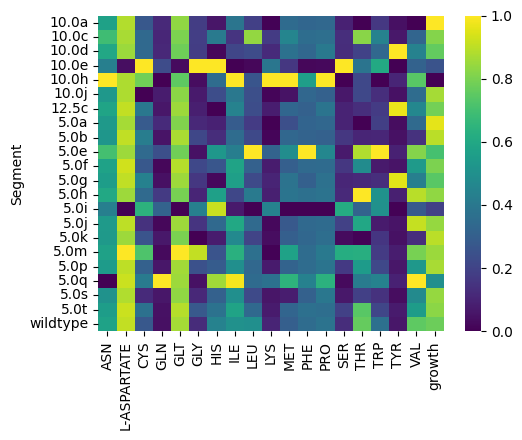

In [97]:
import seaborn as sns
from math import log

normalized_df=(df_ko_gr-df_ko_gr.min())/(df_ko_gr.max()-df_ko_gr.min())

# New tick labels
result = {elem: elem.split('[')[0] for elem in ['ASN[c]', 'L-ASPARTATE[c]', 'CYS[c]', 'GLN[c]', 'GLT[c]', 'GLY[c]',
       'HIS[c]', 'ILE[c]', 'LEU[c]', 'LYS[c]', 'MET[c]', 'PHE[c]', 'PRO[c]',
       'SER[c]', 'THR[c]', 'TRP[c]', 'TYR[c]', 'VAL[c]']}

normalized_df.rename(columns=result, inplace=True)

# Plotting the heatmap
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(normalized_df, annot=False, cmap="viridis", cbar=True)
plt.ylabel("Segment")
plt.tight_layout()
plt.savefig('min_genomes.png', dpi=900)
plt.show()

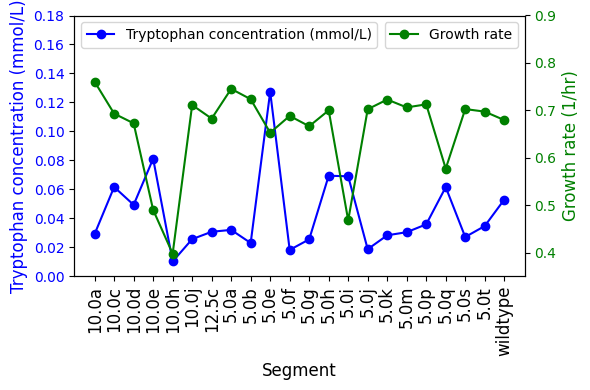

In [98]:
# Create the plot
fig, ax1 = plt.subplots(figsize=(6,4))

# Plot Column A on the primary y-axis
ax1.plot(df_ko_gr.index, df_ko_gr["TRP[c]"], marker='o', color='b', label='Tryptophan concentration (mmol/L)', linestyle='-')
ax1.set_xlabel('Segment', fontsize=12)
ax1.set_ylabel('Tryptophan concentration (mmol/L)', color='b', fontsize=12)
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')
ax1.set_ylim([0, 0.18])
ax1.set_xticks(df_ko_gr.index)  # Use the DataFrame index as x-ticks
ax1.set_xticklabels(df_ko_gr.index, fontsize=12, rotation=90)

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(df_ko_gr.index, df_ko_gr["growth"], marker='o', color='g', label='Growth rate', linestyle='-')
ax2.set_ylabel('Growth rate (1/hr)', color='g', fontsize=12)
ax2.tick_params(axis='y', labelcolor='g')
ax2.legend(loc='upper right')
ax2.set_ylim([0.35, 0.9])
# Show the plot
plt.tight_layout()
plt.savefig('trp_min_genome.png', dpi=900)

In [99]:
# Check if trpR or tnaA are in the 5e segment
dict_kos = {'EG11005':[], 'EG11029':[]}
for i, row in st2_dividing.iterrows():
    sim_rna = [x.split('_')[0] for x in ast.literal_eval(row['KOs'])]
    if 'EG11005' in sim_rna:
        dict_kos['EG11005'].append(row['variant'])
    if 'EG11029' in sim_rna:
        dict_kos['EG11029'].append(row['variant'])
print(set(dict_kos['EG11005']), set(dict_kos['EG11029']))

{'double_knockout_000053'} set()


## Violacein production

In [100]:
import pandas as pd

In [101]:
df_ki1 = pd.read_pickle('/bm_mean_ts_new_gene_2024_10_18.pkl')
df_ki2 = pd.read_pickle('/bm_mean_ts_new_gene_2024_10_19.pkl')
df_ki3 = pd.read_pickle('/bm_mean_ts_new_gene_2024_10_24_08.pkl')

df_ki = pd.concat([df_ki1, df_ki2, df_ki3])

df_ki['seed'] = df_ki['cell_path'].str.split('/').str[7]

# Define the mapping dictionary
mapping_dict = {'[]':' '}

# Create a new column with the mapped values
df_ki['int_genes_overexpress_factor'] = df_ki['int_genes_overexpress_factor'].astype(str).map(mapping_dict)


In [102]:
df_ki_over1 = pd.read_pickle('/bm_mean_ts_new_gene_2024_10_20.pkl')
df_ki_over2 = pd.read_pickle('/bm_mean_ts_new_gene_2024_10_24_22.pkl')
df_ki_over3 = pd.read_pickle('/bm_mean_KI_ts_new_gene_2025_03_24.pkl')

df_ki_over = pd.concat([df_ki_over1, df_ki_over2])
df_ki_over['seed'] = df_ki_over['cell_path'].str.split('/').str[7]
df_ki_over['int_genes_overexpress_factor'] = df_ki_over['int_genes_overexpress_factor'].apply(lambda x: ','.join(map(str, x)))

# Define the mapping dictionary
mapping_dict = {'100,100':'100', '100,100\n': '100', '[\'100, 100\']':'100', '[\'100, 100\n\']': '100',  'No over': 'No overexpression trpED',
               '75,75':'75', '75,75\n': '75', '[\'75, 75\']':'75', '[\'75, 75\n\']': '75',
               '125,125':'125', '125,125\n': '125', '[\'125, 125\']':'125', '[\'125, 125\n\']': '125',
               '150,150':'150', '150,150\n': '150', '[\'150, 150\']':'150', '[\'150, 150\n\']': '150'}

# Create a new column with the mapped values
df_ki_over['int_genes_overexpress_factor'] = df_ki_over['int_genes_overexpress_factor'].astype(str).map(mapping_dict)


In [103]:
df_ko_ki1 = pd.read_pickle('/bm_mean_ts_new_gene_2024_10_21.pkl')
df_ko_ki2 = pd.read_pickle('/bm_mean_ts_new_gene_2024_10_23.pkl')
df_ko_ki3 = pd.read_pickle('/bm_mean_ts_new_gene_2025_03_20.pkl')


df_ko_ki = pd.concat([df_ko_ki1, df_ko_ki2])
df_ko_ki['seed'] = df_ko_ki['cell_path'].str.split('/').str[7]
df_ko_ki['int_genes_overexpress_factor'] = df_ko_ki['int_genes_overexpress_factor'].apply(lambda x: ','.join(map(str, x)))

# Define the mapping dictionary
mapping_dict = {"[\'EG11005_RNA[c].\']": 'vioA-E, \ntnaA_KO', "[\'EG11029_RNA[c].\']": 'vioA-E, \ntrpR_KO', 
                "[\'EG11029_RNA[c].\', \'EG11005_RNA[c].\']": 'vioA-E, trpR_KO+\ntnaA_KO',  'No KO': 'vioA-E', None:'vioA-E',
                " EG11005_RNA[c]": 'vioA-E, \ntnaA_KO', " EG11029_RNA[c]": 'vioA-E, \ntrpR_KO', " EG11029_RNA[c] EG11005_RNA[c]": 'vioA-E, trpR_KO+\ntnaA_KO' }

# Create a new column with the mapped values
df_ko_ki['KO_id'] = df_ko_ki['KO_id'].astype(str).map(mapping_dict)

# Define the mapping dictionary
mapping_dict = {'100,100':'100', '100 ,100\n': '100', '[\'100, 100\']':'100', '[\'100, 100\n\']': '100',  'No over': 'No overexpression trpED',
               '75,75':'75', '75 ,75\n': '75', '[\'75, 75\']':'75', '[\'75, 75\n\']': '75',
               '125,125':'125', '125 ,125\n': '125', '[\'125, 125\']':'125', '[\'125, 125\n\']': '125',
               '150,150':'150', '150 ,150\n': '150', '[\'150, 150\']':'150', '[\'150, 150\n\']': '150'}

# Create a new column with the mapped values
df_ko_ki['int_genes_overexpress_factor'] = df_ko_ki['int_genes_overexpress_factor'].astype(str).map(mapping_dict)

In [104]:
df_ki_all = pd.concat([df_ki_over, df_ko_ki, df_ki])

In [105]:
df_ki_all.columns

Index(['ASN[c]', 'L-ASPARTATE[c]', 'CYS[c]', 'GLN[c]', 'GLT[c]', 'GLY[c]',
       'HIS[c]', 'ILE[c]', 'LEU[c]', 'LYS[c]', 'MET[c]', 'PHE[c]', 'PRO[c]',
       'SER[c]', 'THR[c]', 'TRP[c]', 'TYR[c]', 'VAL[c]', 'CPD-14323[c]',
       'CPD-14324[c]', 'CPD-11890[c]', 'CPD-19471[c]', 'CPD-14320[c]',
       'CPD-14319[c]', 'NG-VioA-MONOMER[c]', 'NG-VioB-MONOMER[c]',
       'NG-VioC-MONOMER[c]', 'NG-VioD-MONOMER[c]', 'NG-VioE-MONOMER[c]',
       'tRnaMass', 'mRnaMass', 'proteinMass', 'rRnaMass', 'dnaMass', 'rnaMass',
       'cell_path', 'cell_mass', 'cell_volume', 'growth', 'variant', 'KO_id',
       'generation', 'int_overexpr_genes', 'int_genes_overexpress_factor',
       'tr_efficiency', 'ext_genes_expr', 'seed'],
      dtype='object')

In [106]:
print('For each KI expression level and KOs pair, the total number of seeds simulated is: ', df_ki_all[df_ki_all['generation']=='generation_000000'].groupby(['ext_genes_expr', 'KO_id', 'int_genes_overexpress_factor'])['seed'].count(),
     'And the total number of seeds that reach generation 20 is: ', df_ki_all[df_ki_all['generation']=='generation_000015'].groupby(['ext_genes_expr', 'KO_id', 'int_genes_overexpress_factor'])['seed'].count())

For each KI expression level and KOs pair, the total number of seeds simulated is:  ext_genes_expr  KO_id                      int_genes_overexpress_factor
10000                                                                      20
                                           100                             17
                vioA-E, \ntnaA_KO          100                             20
                vioA-E, \ntrpR_KO          100                             20
                vioA-E, trpR_KO+\ntnaA_KO  100                             20
100000                                                                     20
                                           100                             20
                vioA-E, \ntnaA_KO          100                             20
                vioA-E, \ntrpR_KO          100                             20
                vioA-E, trpR_KO+\ntnaA_KO  100                             20
1000000                                                         

In [107]:
df_vio1 = pd.read_pickle('/bm_mean_ko_5e_kis_2025_03_18.pkl')
df_vio2 = pd.read_pickle('/bm_mean_ko_5e_kis_2025_03_19.pkl')
df_vio = pd.concat([df_vio1, df_vio2])


In [108]:
df_vio.columns

Index(['--TRANS-ACENAPHTHENE-12-DIOL[c]', '1-6-Galactofuran[c]',
       '1-ACYLGLYCEROL-3-P-ACYLTRANSFER-MONOMER[i]', '1-AMINO-PROPAN-2-OL[c]',
       '1-AMINO-PROPAN-2-ONE-3-PHOSPHATE[c]', '1-CHLORO-24-DINITROBENZENE[c]',
       '1-DEOXYXYLONOJIRIMYCIN[c]', '1-ETHYLADENINE[c]',
       '1-Hydroxy-2-oxolimonenes[c]', '1-KETO-2-METHYLVALERATE[c]',
       ...
       'cell_mass', 'cell_volume', 'growth', 'variant', 'KO_id', 'generation',
       'int_overexpr_genes', 'int_genes_overexpress_factor', 'tr_efficiency',
       'ext_genes_expr'],
      dtype='object', length=17378)

In [109]:
def extract_before_target(text_string):
    target = "EG10012_RNA[c]"
    if target in text_string:
        # Find position of the target
        position = text_string.find(target)
        # Return everything before it
        return text_string[:position].strip()
    else:
        # Return empty string or some indicator if target not found
        return ""

# Apply the function to create new column
df_vio['ko_extra'] = df_vio['KO_id'].apply(extract_before_target)


In [110]:
df_vio['int_genes_overexpress_factor']

0       [100, 100]
1       [100, 100]
2       [100, 100]
3       [100, 100]
4       [100, 100]
           ...    
3000    [100, 100]
3001    [100, 100]
3002    [100, 100]
3003    [100, 100]
3004    [100, 100]
Name: int_genes_overexpress_factor, Length: 4077, dtype: object

In [111]:
gens = [ 'generation_000011','generation_000012','generation_000013',
        'generation_000014', 'generation_000015', 'generation_000016',
        'generation_000017', 'generation_000018', 'generation_000019',
        ]
df_vio['growth'] = df_vio['growth']*3600

dfc = df_vio[df_vio['generation'].isin(gens)]
df_ko_gr_mean = dfc.groupby(['ko_extra', 'ext_genes_expr'])[['TRP[c]', "CPD-14323[c]", "CPD-14324[c]","CPD-11890[c]",
        "CPD-19471[c]", "CPD-14320[c]", "CPD-14319[c]", 'cell_mass', 'cell_volume', 'growth']].mean()
df_ko_gr_sem = dfc.groupby(['ko_extra', 'ext_genes_expr'])[['TRP[c]', "CPD-14323[c]", "CPD-14324[c]","CPD-11890[c]",
        "CPD-19471[c]", "CPD-14320[c]", "CPD-14319[c]", 'cell_mass', 'cell_volume', 'growth']].sem()
df_ko_gr_mean['Violaceinate'] = df_ko_gr_mean['CPD-14324[c]']
df_ko_gr_sem['Violaceinate'] = df_ko_gr_sem['CPD-14324[c]']


In [112]:
df_ko_gr_sem

TRP[c]  CPD-14323[c]  \
ko_extra                      ext_genes_expr                           
                              100000          0.086385      0.001070   
                              1000000         0.079666      0.078100   
                              10000000        0.425923      0.760816   
EG11005_RNA[c]                100000          0.066272      0.001052   
                              1000000         0.087237      0.091385   
                              10000000        0.413379      0.682703   
EG11029_RNA[c]                100000          0.189948      0.003393   
                              1000000         0.380421      0.074800   
                              10000000        0.507555      1.123956   
EG11029_RNA[c] EG11005_RNA[c] 100000          0.369147      0.003793   
                              1000000         0.487708      0.069567   
                              10000000        0.513324      0.759490   

                                              CPD-14324[c]  CPD-11890[c]  \
ko_extra                      ext_genes_expr                               
                              100000              0.000801      0.122470   
                              1000000             0.086170      0.724746   
                              10000000            1.141848     11.738740   
EG11005_RNA[c]                100000              0.000768      0.119006   
                              1000000             0.094989      0.769959   
                              10000000            0.890678     10.551628   
EG11029_RNA[c]                100000              0.002612      0.385281   
                              1000000             0.065401      4.218204   
                              10000000            1.310996     17.441411   
EG11029_RNA[c] EG11005_RNA[c] 100000              0.002901      0.783006   
                              1000000             0.048628      4.607195   
                              10000000            1.015489     12.678987   

                                              CPD-19471[c]  CPD-14320[c]  \
ko_extra                      ext_genes_expr                               
                              100000              0.015283      0.003165   
                              1000000             0.241191      0.181315   
                              10000000            2.294671      2.225232   
EG11005_RNA[c]                100000              0.016579      0.003458   
                              1000000             0.250235      0.184125   
                              10000000            2.607964      2.664841   
EG11029_RNA[c]                100000              0.044285      0.010425   
                              1000000             0.519235      0.375766   
                              10000000            2.732896      3.607859   
EG11029_RNA[c] EG11005_RNA[c] 100000              0.060504      0.012580   
                              1000000             0.533916      0.373538   
                              10000000            3.384964      4.182311   

                                              CPD-14319[c]  cell_mass  \
ko_extra                      ext_genes_expr                            
                              100000              0.002160   9.123383   
                              1000000             0.138736   6.504572   
                              10000000            1.329342  16.308336   
EG11005_RNA[c]                100000              0.002437   9.288408   
                              1000000             0.163450   8.052009   
                              10000000            1.423940  16.392117   
EG11029_RNA[c]                100000              0.007149   9.636476   
                              1000000             0.160309  11.057636   
                              10000000            1.813293  24.759605   
EG11029_RNA[c] EG11005_RNA[c] 100000              0.008111   9.164655   
                              100

In [113]:
df_ko_gr1_mean = df_ko_gr_mean[df_ko_gr_mean.index.get_level_values('ext_genes_expr')=='100000']
df_ko_gr1_sem = df_ko_gr_sem[df_ko_gr_sem.index.get_level_values('ext_genes_expr')=='100000']

tuples = [
    ('', '100000'),
    ('EG11005_RNA[c]', '100000'),
    ('EG11029_RNA[c]', '100000'),
    ('EG11029_RNA[c] EG11005_RNA[c]', '100000'),
]

dict_map = {
    tuples[0]:'S1/5.0e/pED/vio',
    tuples[1]:'S2/5.0e/pED/vio',
    tuples[2]:'S3/5.0e/pED/vio',
    tuples[3]:'S4/5.0e/pED/vio',
}

In [114]:
df_ko_gr1_sem

,,TRP[c],CPD-14323[c],CPD-14324[c],CPD-11890[c],CPD-19471[c],CPD-14320[c],CPD-14319[c],cell_mass,cell_volume,growth,Violaceinate
ko_extra,ext_genes_expr,,,,,,,,,,,
,100000,0.086385,0.001070,0.000801,0.122470,0.015283,0.003165,0.002160,9.123383,0.008294,0.007637,0.000801
EG11005_RNA[c],100000,0.066272,0.001052,0.000768,0.119006,0.016579,0.003458,0.002437,9.288408,0.008444,0.007147,0.000768
EG11029_RNA[c],100000,0.189948,0.003393,0.002612,0.385281,0.044285,0.010425,0.007149,9.636476,0.008760,0.007913,0.002612
EG11029_RNA[c] EG11005_RNA[c],100000,0.369147,0.003793,0.002901,0.783006,0.060504,0.012580,0.008111,9.164655,0.008332,0.007371,0.002901


In [115]:
def apply_mapping_to_df(df, mapping_dict):
    df_mapped = df.copy()
    idx_tuples = list(df.index)
    new_index = [mapping_dict.get(idx, str(idx)) for idx in idx_tuples]
    df_mapped.index = new_index
    return df_mapped
    
df_ko_gr1_mean = apply_mapping_to_df(df_ko_gr1_mean, dict_map)
df_ko_gr1_sem = apply_mapping_to_df(df_ko_gr1_sem, dict_map)

In [116]:
# Filter out the rows
df_cleaned = df_ki_all[(df_ki_all['int_genes_overexpress_factor']=='100')][['TRP[c]', "CPD-14323[c]", "CPD-14324[c]", "CPD-11890[c]",
        "CPD-19471[c]", "CPD-14320[c]", "CPD-14319[c]", 'cell_mass', 'cell_volume', 'growth',
        'variant', 'KO_id', 'generation', 'int_overexpr_genes', 'int_genes_overexpress_factor',
       'tr_efficiency', 'ext_genes_expr', 'seed']].copy()


df_cleaned = df_cleaned[(df_cleaned['generation'].isin(gens)) & (df_cleaned['ext_genes_expr']=='100000')]
df_cleaned.columns
df_cleaned['growth'] = df_cleaned['growth']*3600

df_gr_ki_mean = df_cleaned.groupby(['KO_id', 'ext_genes_expr', 'int_genes_overexpress_factor'])[['TRP[c]', "CPD-14323[c]", "CPD-14324[c]","CPD-11890[c]",
        "CPD-19471[c]", "CPD-14320[c]", "CPD-14319[c]", 'cell_mass', 'cell_volume', 'growth']].mean()
df_gr_ki_sem = df_cleaned.groupby(['KO_id', 'ext_genes_expr', 'int_genes_overexpress_factor'])[['TRP[c]', "CPD-14323[c]", "CPD-14324[c]","CPD-11890[c]",
        "CPD-19471[c]", "CPD-14320[c]", "CPD-14319[c]", 'cell_mass', 'cell_volume', 'growth']].sem()

df_gr_ki_mean['Violaceinate'] = df_gr_ki_mean['CPD-14324[c]']
df_gr_ki_sem['Violaceinate'] = df_gr_ki_sem['CPD-14324[c]']

tuples = [
    ('', '100000', '100'),
    ('vioA-E, \ntnaA_KO', '100000', '100'),
    ('vioA-E, \ntrpR_KO', '100000', '100'),
    ('vioA-E, trpR_KO+\ntnaA_KO', '100000', '100'),
]

dict_map = {
    tuples[0]:'S1/pED/vio',
    tuples[1]:'S2/pED/vio',
    tuples[2]:'S3/pED/vio',
    tuples[3]:'S4/pED/vio',
}

df_gr_ki1_mean = apply_mapping_to_df(df_gr_ki_mean, dict_map)
df_gr_ki1_sem = apply_mapping_to_df(df_gr_ki_sem, dict_map)

In [117]:
df_ko_gr1_mean = pd.concat([df_ko_gr1_mean, df_gr_ki1_mean])
df_ko_gr1_sem = pd.concat([df_ko_gr1_sem, df_gr_ki1_sem])


In [118]:
new_order = ['S1/5.0e/pED/vio', 'S1/pED/vio', 'S2/5.0e/pED/vio', 'S2/pED/vio', 'S3/5.0e/pED/vio', 'S3/pED/vio', 'S4/5.0e/pED/vio', 'S4/pED/vio' ]
df_ko_gr1_mean = df_ko_gr1_mean.reindex(new_order)
df_gr_ki1_sem = df_ko_gr1_sem.reindex(new_order)


In [119]:
df_gr_ki1_sem

,TRP[c],CPD-14323[c],CPD-14324[c],CPD-11890[c],CPD-19471[c],CPD-14320[c],CPD-14319[c],cell_mass,cell_volume,growth,Violaceinate
S1/5.0e/pED/vio,0.086385,0.001070,0.000801,0.122470,0.015283,0.003165,0.002160,9.123383,0.008294,0.007637,0.000801
S1/pED/vio,0.037794,0.000547,0.000262,0.059646,0.009539,0.002092,0.001176,8.535894,0.007760,0.006546,0.000262
S2/5.0e/pED/vio,0.066272,0.001052,0.000768,0.119006,0.016579,0.003458,0.002437,9.288408,0.008444,0.007147,0.000768
S2/pED/vio,0.032322,0.000448,0.000286,0.049971,0.007417,0.001658,0.001180,9.049819,0.008227,0.006828,0.000286
S3/5.0e/pED/vio,0.189948,0.003393,0.002612,0.385281,0.044285,0.010425,0.007149,9.636476,0.008760,0.007913,0.002612
S3/pED/vio,0.157020,0.002348,0.001565,0.352523,0.044240,0.009463,0.005226,10.347914,0.009407,0.008469,0.001565
S4/5.0e/pED/vio,0.369147,0.003793,0.002901,0.783006,0.060504,0.012580,0.008111,9.164655,0.008332,0.007371,0.002901
S4/pED/vio,0.089898,0.001634,0.001338,0.160901,0.023715,0.005350,0.003902,11.574227,0.010522,0.009125,0.001338


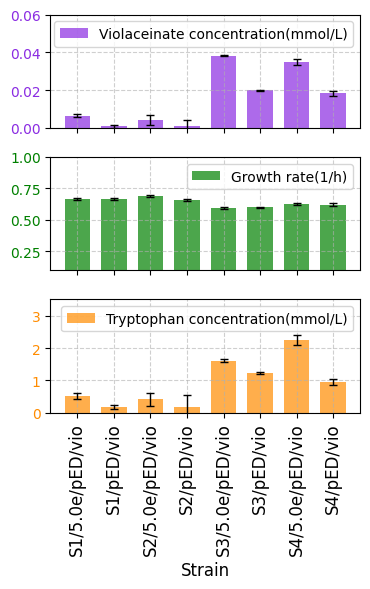

In [120]:
# Create a figure with 3 subplots stacked vertically
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(3.8, 6), sharex=True)

bar_width = 0.7


ax1.bar(df_ko_gr1_mean.index, df_ko_gr1_mean['Violaceinate'], width=bar_width, color='blueviolet',
        label='Violaceinate concentration(mmol/L)', alpha=0.7)

ax1.errorbar(df_ko_gr1_mean.index, df_ko_gr1_mean['Violaceinate'], 
            yerr=df_ko_gr1_sem['Violaceinate'], fmt='none', ecolor='black', 
            capsize=3, elinewidth=1)

ax1.tick_params(axis='y', labelcolor='blueviolet')
ax1.legend(loc='upper right')
ax1.set_ylim([0, 0.06])
ax1.grid(True, linestyle='--', alpha=0.6)

ax2.bar(df_ko_gr1_mean.index, df_ko_gr1_mean['growth'], width=bar_width, color='g',
        label='Growth rate(1/h)', alpha=0.7)

ax2.errorbar(df_ko_gr1_mean.index, df_ko_gr1_mean['growth'], 
            yerr=df_ko_gr1_sem['growth'], fmt='none', ecolor='black', 
            capsize=3, elinewidth=1)

ax2.tick_params(axis='y', labelcolor='g')
ax2.legend(loc='upper right')
ax2.set_ylim([0.1, 1])
ax2.grid(True, linestyle='--', alpha=0.6)

ax3.bar(df_ko_gr1_mean.index, df_ko_gr1_mean['TRP[c]'], width=bar_width, color='darkorange',
        label='Tryptophan concentration(mmol/L)', alpha=0.7)

ax3.errorbar(df_ko_gr1_mean.index, df_ko_gr1_mean['TRP[c]'], 
            yerr=df_ko_gr1_sem['TRP[c]'], fmt='none', ecolor='black', 
            capsize=3, elinewidth=1)

ax3.tick_params(axis='y', labelcolor='darkorange')
ax3.legend(loc='upper right')
ax3.set_ylim([0, 3.5])
ax3.grid(True, linestyle='--', alpha=0.6)

ax3.set_xlabel('Strain', fontsize=12)
if hasattr(df_ko_gr1_mean.index, 'levels'):
    x_labels = ['-'.join(map(str, idx)) for idx in df_ko_gr1_mean.index]
    ax3.set_xticks(range(len(x_labels)))
    ax3.set_xticklabels(x_labels, fontsize=12, rotation=90)
else:
    ax3.set_xticks(range(len(df_ko_gr1_mean.index)))
    ax3.set_xticklabels(df_ko_gr1_mean.index, fontsize=12, rotation=90)

plt.tight_layout()
plt.savefig('vio5_min_genome_three_plots.png', dpi=900)

In [121]:
df_ko_gr2_mean = df_ko_gr_mean[df_ko_gr_mean.index.get_level_values('ext_genes_expr')=='1000000']
df_ko_gr2_sem = df_ko_gr_sem[df_ko_gr_sem.index.get_level_values('ext_genes_expr')=='1000000']

tuples = [
    ('', '1000000'),
    ('EG11005_RNA[c]', '1000000'),
    ('EG11029_RNA[c]', '1000000'),
    ('EG11029_RNA[c] EG11005_RNA[c]', '1000000'),
]

dict_map = {
    tuples[0]:'S1/5.0e/pED/vio',
    tuples[1]:'S2/5.0e/pED/vio',
    tuples[2]:'S3/5.0e/pED/vio',
    tuples[3]:'S4/5.0e/pED/vio',
}

df_ko_gr2_mean = apply_mapping_to_df(df_ko_gr2_mean, dict_map)
df_ko_gr2_sem = apply_mapping_to_df(df_ko_gr2_sem, dict_map)

In [122]:
# Filter out the rows
df_cleaned = df_ki_all[(df_ki_all['int_genes_overexpress_factor']=='100')][['TRP[c]', "CPD-14323[c]", "CPD-14324[c]", "CPD-11890[c]",
        "CPD-19471[c]", "CPD-14320[c]", "CPD-14319[c]", 'cell_mass', 'cell_volume', 'growth',
        'variant', 'KO_id', 'generation', 'int_overexpr_genes', 'int_genes_overexpress_factor',
       'tr_efficiency', 'ext_genes_expr', 'seed']].copy()


df_cleaned = df_cleaned[(df_cleaned['generation'].isin(gens)) & (df_cleaned['ext_genes_expr']=='1000000')]
df_cleaned.columns
df_cleaned['growth'] = df_cleaned['growth']*3600

df_gr_ki_mean = df_cleaned.groupby(['KO_id', 'ext_genes_expr', 'int_genes_overexpress_factor'])[['TRP[c]', "CPD-14323[c]", "CPD-14324[c]","CPD-11890[c]",
        "CPD-19471[c]", "CPD-14320[c]", "CPD-14319[c]", 'cell_mass', 'cell_volume', 'growth']].mean()
df_gr_ki_sem = df_cleaned.groupby(['KO_id', 'ext_genes_expr', 'int_genes_overexpress_factor'])[['TRP[c]', "CPD-14323[c]", "CPD-14324[c]","CPD-11890[c]",
        "CPD-19471[c]", "CPD-14320[c]", "CPD-14319[c]", 'cell_mass', 'cell_volume', 'growth']].sem()

df_gr_ki_mean['Violaceinate'] = df_gr_ki_mean['CPD-14324[c]']
df_gr_ki_sem['Violaceinate'] = df_gr_ki_sem['CPD-14324[c]']

tuples = [
    ('', '1000000', '100'),
    ('vioA-E, \ntnaA_KO', '1000000', '100'),
    ('vioA-E, \ntrpR_KO', '1000000', '100'),
    ('vioA-E, trpR_KO+\ntnaA_KO', '1000000', '100'),
]

dict_map = {
    tuples[0]:'S1/pED/vio',
    tuples[1]:'S2/pED/vio',
    tuples[2]:'S3/pED/vio',
    tuples[3]:'S4/pED/vio',
}

df_gr_ki2_mean = apply_mapping_to_df(df_gr_ki_mean, dict_map)
df_gr_ki2_sem = apply_mapping_to_df(df_gr_ki_sem, dict_map)

In [123]:
df_gr_ki2_sem

,TRP[c],CPD-14323[c],CPD-14324[c],CPD-11890[c],CPD-19471[c],CPD-14320[c],CPD-14319[c],cell_mass,cell_volume,growth,Violaceinate
S1/pED/vio,0.057907,0.056302,0.066996,0.415218,0.131932,0.088345,0.096901,6.632509,0.006030,0.006118,0.066996
S2/pED/vio,0.087216,0.060646,0.072057,0.655597,0.171886,0.106258,0.096670,9.082252,0.008257,0.007070,0.072057
S3/pED/vio,0.217809,0.062437,0.050952,1.576966,0.282743,0.238488,0.134065,9.878302,0.008980,0.007627,0.050952
S4/pED/vio,0.263968,0.066566,0.057070,2.332201,0.325873,0.230417,0.131574,7.770834,0.007064,0.005948,0.057070


In [124]:
df_ko_gr2_mean = pd.concat([df_ko_gr2_mean, df_gr_ki2_mean])
df_ko_gr2_sem = pd.concat([df_ko_gr2_sem, df_gr_ki2_sem])

In [125]:
new_order = ['S1/5.0e/pED/vio', 'S1/pED/vio', 'S2/5.0e/pED/vio', 'S2/pED/vio', 'S3/5.0e/pED/vio', 'S3/pED/vio', 'S4/5.0e/pED/vio', 'S4/pED/vio' ]
df_ko_gr2_mean = df_ko_gr2_mean.reindex(new_order)
df_ko_gr2_sem = df_ko_gr2_sem.reindex(new_order)

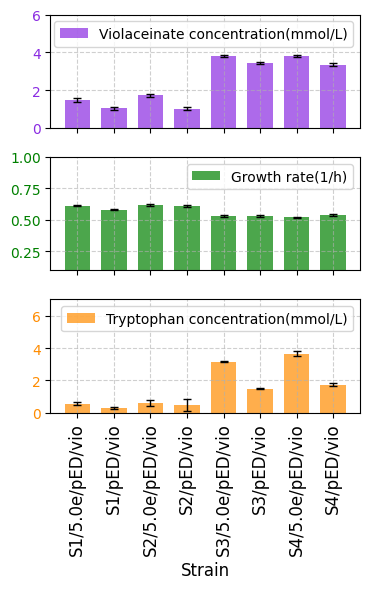

In [126]:
# Create a figure with 3 subplots stacked vertically
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(3.8, 6), sharex=True)

bar_width = 0.7


ax1.bar(df_ko_gr2_mean.index, df_ko_gr2_mean['Violaceinate'], width=bar_width, color='blueviolet',
        label='Violaceinate concentration(mmol/L)', alpha=0.7)

ax1.errorbar(df_ko_gr2_mean.index, df_ko_gr2_mean['Violaceinate'], 
            yerr=df_ko_gr2_sem['Violaceinate'], fmt='none', ecolor='black', 
            capsize=3, elinewidth=1)

ax1.tick_params(axis='y', labelcolor='blueviolet')
ax1.legend(loc='upper right')
ax1.set_ylim([0, 6])
ax1.grid(True, linestyle='--', alpha=0.6)

ax2.bar(df_ko_gr2_mean.index, df_ko_gr2_mean['growth'], width=bar_width, color='g',
        label='Growth rate(1/h)', alpha=0.7)

ax2.errorbar(df_ko_gr2_mean.index, df_ko_gr2_mean['growth'], 
            yerr=df_ko_gr2_sem['growth'], fmt='none', ecolor='black', 
            capsize=3, elinewidth=1)

ax2.tick_params(axis='y', labelcolor='g')
ax2.legend(loc='upper right')
ax2.set_ylim([0.1, 1])
ax2.grid(True, linestyle='--', alpha=0.6)

ax3.bar(df_ko_gr2_mean.index, df_ko_gr2_mean['TRP[c]'], width=bar_width, color='darkorange',
        label='Tryptophan concentration(mmol/L)', alpha=0.7)

ax3.errorbar(df_ko_gr2_mean.index, df_ko_gr2_mean['TRP[c]'], 
            yerr=df_ko_gr1_sem['TRP[c]'], fmt='none', ecolor='black', 
            capsize=3, elinewidth=1)

ax3.tick_params(axis='y', labelcolor='darkorange')
ax3.legend(loc='upper right')
ax3.set_ylim([0, 7])
ax3.grid(True, linestyle='--', alpha=0.6)

ax3.set_xlabel('Strain', fontsize=12)
if hasattr(df_ko_gr2_mean.index, 'levels'):
    x_labels = ['-'.join(map(str, idx)) for idx in df_ko_gr2_mean.index]
    ax3.set_xticks(range(len(x_labels)))
    ax3.set_xticklabels(x_labels, fontsize=12, rotation=90)
else:
    ax3.set_xticks(range(len(df_ko_gr2_mean.index)))
    ax3.set_xticklabels(df_ko_gr2_mean.index, fontsize=12, rotation=90)

# Adjust the layout
plt.tight_layout()
plt.savefig('vio6_min_genome_three_plots.png', dpi=900)

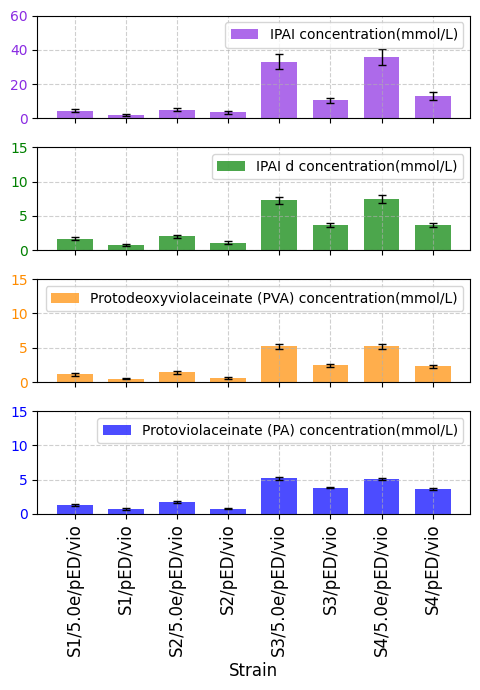

In [127]:
# Create a figure with 3 subplots stacked vertically
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(5, 7), sharex=True)

ax1.bar(df_ko_gr2_mean.index, df_ko_gr2_mean["CPD-11890[c]"], width=bar_width, color='blueviolet',
        label='IPAI concentration(mmol/L)', alpha=0.7)

ax1.errorbar(df_ko_gr2_mean.index, df_ko_gr2_mean["CPD-11890[c]"], 
            yerr=df_ko_gr2_sem["CPD-11890[c]"], fmt='none', ecolor='black', 
            capsize=3, elinewidth=1)

ax1.tick_params(axis='y', labelcolor='blueviolet')
ax1.legend(loc='upper right')
ax1.set_ylim([0, 60])
ax1.grid(True, linestyle='--', alpha=0.6)

ax2.bar(df_ko_gr2_mean.index, df_ko_gr2_mean["CPD-19471[c]"], width=bar_width, color='g',
        label='IPAI d concentration(mmol/L)', alpha=0.7)
ax2.errorbar(df_ko_gr2_mean.index, df_ko_gr2_mean["CPD-19471[c]"], 
            yerr=df_ko_gr2_sem["CPD-19471[c]"], fmt='none', ecolor='black', 
            capsize=3, elinewidth=1)

ax2.tick_params(axis='y', labelcolor='g')
ax2.legend(loc='upper right')
ax2.set_ylim([0, 15])
ax2.grid(True, linestyle='--', alpha=0.6)


ax3.bar(df_ko_gr2_mean.index, df_ko_gr2_mean["CPD-14320[c]"], width=bar_width, color='darkorange',
        label='Protodeoxyviolaceinate (PVA) concentration(mmol/L)', alpha=0.7)

ax3.errorbar(df_ko_gr2_mean.index, df_ko_gr2_mean["CPD-14320[c]"], 
            yerr=df_ko_gr2_sem["CPD-14320[c]"], fmt='none', ecolor='black', 
            capsize=3, elinewidth=1)

ax3.tick_params(axis='y', labelcolor='darkorange')
ax3.legend(loc='upper right')
ax3.set_ylim([0, 15])
ax3.grid(True, linestyle='--', alpha=0.6)

ax4.bar(df_ko_gr2_mean.index, df_ko_gr2_mean["CPD-14319[c]"], width=bar_width, color='blue',
        label='Protoviolaceinate (PA) concentration(mmol/L)', alpha=0.7)

ax4.errorbar(df_ko_gr2_mean.index, df_ko_gr2_mean["CPD-14319[c]"], 
            yerr=df_ko_gr2_sem["CPD-14319[c]"], fmt='none', ecolor='black', 
            capsize=3, elinewidth=1)

ax4.tick_params(axis='y', labelcolor='blue')
ax4.legend(loc='upper right')
ax4.set_ylim([0, 15])
ax4.grid(True, linestyle='--', alpha=0.6)

# Set x-axis properties on the bottom plot
ax4.set_xlabel('Strain', fontsize=12)
ax4.set_xticks(df_ko_gr2_mean.index)
ax4.set_xticklabels(df_ko_gr2_mean.index, fontsize=12, rotation=90)

# Adjust the layout
plt.tight_layout()
plt.savefig('vio6_min_genome_three_plots_extras.png', dpi=900)

In [128]:
df_ko_gr3_mean = df_ko_gr_mean[df_ko_gr_mean.index.get_level_values('ext_genes_expr')=='10000000']
df_ko_gr3_sem = df_ko_gr_sem[df_ko_gr_sem.index.get_level_values('ext_genes_expr')=='10000000']

tuples = [
    ('', '10000000'),
    ('EG11005_RNA[c]', '10000000'),
    ('EG11029_RNA[c]', '10000000'),
    ('EG11029_RNA[c] EG11005_RNA[c]', '10000000'),
]

dict_map = {
    tuples[0]:'S1/5.0e/pED/vio',
    tuples[1]:'S2/5.0e/pED/vio',
    tuples[2]:'S3/5.0e/pED/vio',
    tuples[3]:'S4/5.0e/pED/vio',
}

df_ko_gr3_mean = apply_mapping_to_df(df_ko_gr3_mean, dict_map)
df_ko_gr3_sem = apply_mapping_to_df(df_ko_gr3_sem, dict_map)

In [129]:
# Filter out the rows
df_cleaned = df_ki_all[(df_ki_all['int_genes_overexpress_factor']=='100')][['TRP[c]', "CPD-14323[c]", "CPD-14324[c]", "CPD-11890[c]",
        "CPD-19471[c]", "CPD-14320[c]", "CPD-14319[c]", 'cell_mass', 'cell_volume', 'growth',
        'variant', 'KO_id', 'generation', 'int_overexpr_genes', 'int_genes_overexpress_factor',
       'tr_efficiency', 'ext_genes_expr', 'seed']].copy()


df_cleaned = df_cleaned[(df_cleaned['generation'].isin(gens)) & (df_cleaned['ext_genes_expr']=='10000000')]
df_cleaned.columns
df_cleaned['growth'] = df_cleaned['growth']*3600

df_gr_ki_mean = df_cleaned.groupby(['KO_id', 'ext_genes_expr', 'int_genes_overexpress_factor'])[['TRP[c]', "CPD-14323[c]", "CPD-14324[c]","CPD-11890[c]",
        "CPD-19471[c]", "CPD-14320[c]", "CPD-14319[c]", 'cell_mass', 'cell_volume', 'growth']].mean()
df_gr_ki_sem = df_cleaned.groupby(['KO_id', 'ext_genes_expr', 'int_genes_overexpress_factor'])[['TRP[c]', "CPD-14323[c]", "CPD-14324[c]","CPD-11890[c]",
        "CPD-19471[c]", "CPD-14320[c]", "CPD-14319[c]", 'cell_mass', 'cell_volume', 'growth']].sem()

df_gr_ki_mean['Violaceinate'] = df_gr_ki_mean['CPD-14324[c]']
df_gr_ki_sem['Violaceinate'] = df_gr_ki_sem['CPD-14324[c]']

tuples = [
    ('', '10000000', '100'),
    ('vioA-E, \ntnaA_KO', '10000000', '100'),
    ('vioA-E, \ntrpR_KO', '10000000', '100'),
    ('vioA-E, trpR_KO+\ntnaA_KO', '10000000', '100'),
]

dict_map = {
    tuples[0]:'S1/pED/vio',
    tuples[1]:'S2/pED/vio',
    tuples[2]:'S3/pED/vio',
    tuples[3]:'S4/pED/vio',
}

df_gr_ki3_mean = apply_mapping_to_df(df_gr_ki_mean, dict_map)
df_gr_ki3_sem = apply_mapping_to_df(df_gr_ki_sem, dict_map)

In [130]:
df_ko_gr3_mean = pd.concat([df_ko_gr3_mean, df_gr_ki3_mean])
df_ko_gr3_sem = pd.concat([df_ko_gr3_sem, df_gr_ki3_sem])

new_order = ['S1/5.0e/pED/vio', 'S1/pED/vio', 'S2/5.0e/pED/vio', 'S2/pED/vio', 'S3/5.0e/pED/vio', 'S3/pED/vio', 'S4/5.0e/pED/vio', 'S4/pED/vio' ]
df_ko_gr3_mean = df_ko_gr3_mean.reindex(new_order)
df_ko_gr3_sem = df_ko_gr3_sem.reindex(new_order)

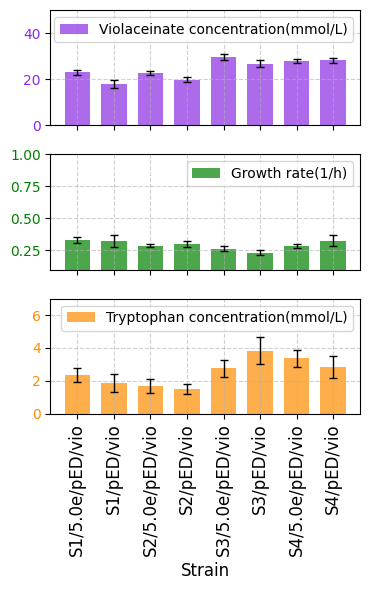

In [131]:
# Create a figure with 3 subplots stacked vertically
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(3.8, 6), sharex=True)

# Define bar width
bar_width = 0.7


ax1.bar(df_ko_gr3_mean.index, df_ko_gr3_mean['Violaceinate'], width=bar_width, color='blueviolet',
        label='Violaceinate concentration(mmol/L)', alpha=0.7)

ax1.errorbar(df_ko_gr3_mean.index, df_ko_gr3_mean['Violaceinate'], 
            yerr=df_ko_gr3_sem['Violaceinate'], fmt='none', ecolor='black', 
            capsize=3, elinewidth=1)

ax1.tick_params(axis='y', labelcolor='blueviolet')
ax1.legend(loc='upper right')
ax1.set_ylim([0, 50])
ax1.grid(True, linestyle='--', alpha=0.6)

ax2.bar(df_ko_gr3_mean.index, df_ko_gr3_mean['growth'], width=bar_width, color='g',
        label='Growth rate(1/h)', alpha=0.7)

ax2.errorbar(df_ko_gr3_mean.index, df_ko_gr3_mean['growth'], 
            yerr=df_ko_gr3_sem['growth'], fmt='none', ecolor='black', 
            capsize=3, elinewidth=1)

ax2.tick_params(axis='y', labelcolor='g')
ax2.legend(loc='upper right')
ax2.set_ylim([0.1, 1])
ax2.grid(True, linestyle='--', alpha=0.6)

ax3.bar(df_ko_gr3_mean.index, df_ko_gr3_mean['TRP[c]'], width=bar_width, color='darkorange',
        label='Tryptophan concentration(mmol/L)', alpha=0.7)

ax3.errorbar(df_ko_gr3_mean.index, df_ko_gr3_mean['TRP[c]'], 
            yerr=df_ko_gr3_sem['TRP[c]'], fmt='none', ecolor='black', 
            capsize=3, elinewidth=1)

ax3.tick_params(axis='y', labelcolor='darkorange')
ax3.legend(loc='upper right')
ax3.set_ylim([0, 7])
ax3.grid(True, linestyle='--', alpha=0.6)

ax3.set_xlabel('Strain', fontsize=12)
if hasattr(df_ko_gr3_mean.index, 'levels'):
    x_labels = ['-'.join(map(str, idx)) for idx in df_ko_gr3_mean.index]
    ax3.set_xticks(range(len(x_labels)))
    ax3.set_xticklabels(x_labels, fontsize=12, rotation=90)
else:
    ax3.set_xticks(range(len(df_ko_gr3_mean.index)))
    ax3.set_xticklabels(df_ko_gr3_mean.index, fontsize=12, rotation=90)

# Adjust the layout
plt.tight_layout()
plt.savefig('vio7_min_genome_three_plots.png', dpi=900)

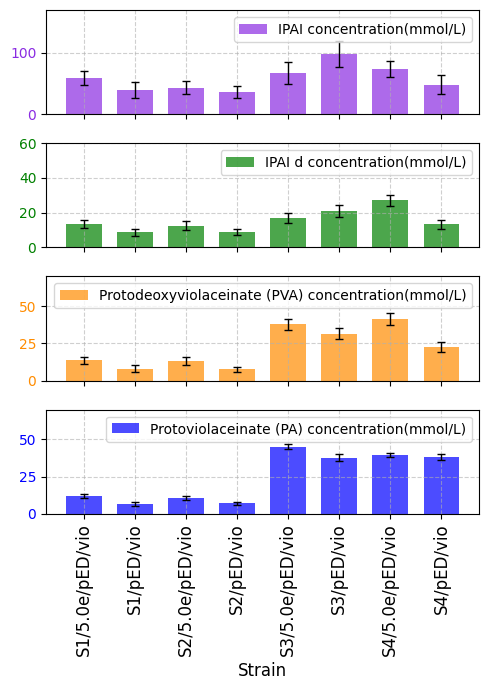

In [132]:
# Create a figure with 3 subplots stacked vertically
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(5, 7), sharex=True)

ax1.bar(df_ko_gr3_mean.index, df_ko_gr3_mean["CPD-11890[c]"], width=bar_width, color='blueviolet',
        label='IPAI concentration(mmol/L)', alpha=0.7)

ax1.errorbar(df_ko_gr3_mean.index, df_ko_gr3_mean["CPD-11890[c]"], 
            yerr=df_ko_gr3_sem["CPD-11890[c]"], fmt='none', ecolor='black', 
            capsize=3, elinewidth=1)

ax1.tick_params(axis='y', labelcolor='blueviolet')
ax1.legend(loc='upper right')
ax1.set_ylim([0, 170])
ax1.grid(True, linestyle='--', alpha=0.6)

ax2.bar(df_ko_gr3_mean.index, df_ko_gr3_mean["CPD-19471[c]"], width=bar_width, color='g',
        label='IPAI d concentration(mmol/L)', alpha=0.7)
ax2.errorbar(df_ko_gr3_mean.index, df_ko_gr3_mean["CPD-19471[c]"], 
            yerr=df_ko_gr3_sem["CPD-19471[c]"], fmt='none', ecolor='black', 
            capsize=3, elinewidth=1)

ax2.tick_params(axis='y', labelcolor='g')
ax2.legend(loc='upper right')
ax2.set_ylim([0, 60])
ax2.grid(True, linestyle='--', alpha=0.6)


ax3.bar(df_ko_gr3_mean.index, df_ko_gr3_mean["CPD-14320[c]"], width=bar_width, color='darkorange',
        label='Protodeoxyviolaceinate (PVA) concentration(mmol/L)', alpha=0.7)

ax3.errorbar(df_ko_gr3_mean.index, df_ko_gr3_mean["CPD-14320[c]"], 
            yerr=df_ko_gr3_sem["CPD-14320[c]"], fmt='none', ecolor='black', 
            capsize=3, elinewidth=1)

ax3.tick_params(axis='y', labelcolor='darkorange')
ax3.legend(loc='upper right')
ax3.set_ylim([0, 70])
ax3.grid(True, linestyle='--', alpha=0.6)

ax4.bar(df_ko_gr3_mean.index, df_ko_gr3_mean["CPD-14319[c]"], width=bar_width, color='blue',
        label='Protoviolaceinate (PA) concentration(mmol/L)', alpha=0.7)

ax4.errorbar(df_ko_gr3_mean.index, df_ko_gr3_mean["CPD-14319[c]"], 
            yerr=df_ko_gr3_sem["CPD-14319[c]"], fmt='none', ecolor='black', 
            capsize=3, elinewidth=1)

ax4.tick_params(axis='y', labelcolor='blue')
ax4.legend(loc='upper right')
ax4.set_ylim([0, 70])
ax4.grid(True, linestyle='--', alpha=0.6)

ax4.set_xlabel('Strain', fontsize=12)
ax4.set_xticks(df_ko_gr3_mean.index)
ax4.set_xticklabels(df_ko_gr3_mean.index, fontsize=12, rotation=90)

plt.tight_layout()
plt.savefig('vio7_min_genome_three_plots_extras.png', dpi=900)

## Violacein with no trpED

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'DejaVu Sans'

gens = [ 'generation_000011','generation_000012','generation_000013',
        'generation_000014', 'generation_000015', 'generation_000016',
        'generation_000017', 'generation_000018', 'generation_000019',
        ]

df_ki_notrped = pd.read_pickle('/bm_mean_KI_ts_new_gene_2025_04_07.pkl')

df_ki1 = pd.read_pickle('/bm_mean_ts_new_gene_2024_10_18.pkl')
df_ki2 = pd.read_pickle('/bm_mean_ts_new_gene_2024_10_19.pkl')
df_ki3 = pd.read_pickle('/bm_mean_ts_new_gene_2024_10_24_08.pkl')

df_ki = pd.concat([df_ki1, df_ki2, df_ki3])

df_ki['seed'] = df_ki['cell_path'].str.split('/').str[7]

def apply_transf_ki(df_ki, df_ki_notrped, expr):
    df_ki['growth'] = df_ki['growth']*3600
    df_ki = df_ki[df_ki['ext_genes_expr']==expr]
    
    dfc = df_ki[df_ki['generation'].isin(gens)]
    df_ko_gr_notrped_mean1 = dfc.groupby(['KO_id', 'ext_genes_expr'])[['TRP[c]', "CPD-14323[c]", "CPD-14324[c]","CPD-11890[c]",
            "CPD-19471[c]", "CPD-14320[c]", "CPD-14319[c]", 'cell_mass', 'cell_volume', 'growth']].mean()
    df_ko_gr_notrped_sem1 = dfc.groupby(['KO_id', 'ext_genes_expr'])[['TRP[c]', "CPD-14323[c]", "CPD-14324[c]","CPD-11890[c]",
            "CPD-19471[c]", "CPD-14320[c]", "CPD-14319[c]", 'cell_mass', 'cell_volume', 'growth']].sem()
    df_ko_gr_notrped_mean1['Violaceinate'] = df_ko_gr_notrped_mean1['CPD-14324[c]']
    df_ko_gr_notrped_sem1['Violaceinate'] = df_ko_gr_notrped_sem1['CPD-14324[c]']

    df_ki_notrped['growth'] = df_ki_notrped['growth']*3600
    df_ki_notrped = df_ki_notrped[df_ki_notrped['ext_genes_expr']==expr]
    
    dfc = df_ki_notrped[df_ki_notrped['generation'].isin(gens)]
    df_ko_gr_notrped_mean2 = dfc.groupby(['KO_id', 'ext_genes_expr'])[['TRP[c]', "CPD-14323[c]", "CPD-14324[c]","CPD-11890[c]",
            "CPD-19471[c]", "CPD-14320[c]", "CPD-14319[c]", 'cell_mass', 'cell_volume', 'growth']].mean()
    df_ko_gr_notrped_sem2 = dfc.groupby(['KO_id', 'ext_genes_expr'])[['TRP[c]', "CPD-14323[c]", "CPD-14324[c]","CPD-11890[c]",
            "CPD-19471[c]", "CPD-14320[c]", "CPD-14319[c]", 'cell_mass', 'cell_volume', 'growth']].sem()
    df_ko_gr_notrped_mean2['Violaceinate'] = df_ko_gr_notrped_mean2['CPD-14324[c]']
    df_ko_gr_notrped_sem2['Violaceinate'] = df_ko_gr_notrped_sem2['CPD-14324[c]']

    df_ko_gr_notrped_mean = pd.concat([df_ko_gr_notrped_mean2, df_ko_gr_notrped_mean1])
    df_ko_gr_notrped_sem = pd.concat([df_ko_gr_notrped_sem2, df_ko_gr_notrped_sem1])
    return df_ko_gr_notrped_mean, df_ko_gr_notrped_sem


df_ko_gr_notrped_mean, df_ko_gr_notrped_sem = apply_transf_ki(df_ki, df_ki_notrped, '100000')


In [134]:
def apply_mapping_to_df(df, mapping_dict):
    df_mapped = df.copy()
    
    idx_tuples = list(df.index)
    
    new_index = [mapping_dict.get(idx, str(idx)) for idx in idx_tuples]
    
    df_mapped.index = new_index
    
    return df_mapped

tuples = [
    ('', '100000'),
    (' EG11005_RNA[c]', '100000'),
    (' EG11029_RNA[c]', '100000'),
    (' EG11029_RNA[c] EG11005_RNA[c]', '100000'),
]

dict_map = {
    tuples[0]:'S1/vio',
    tuples[1]:'S2/vio',
    tuples[2]:'S3/vio',
    tuples[3]:'S4/vio',
}

df_gr_ki1_mean = apply_mapping_to_df(df_ko_gr_notrped_mean, dict_map)
df_gr_ki1_sem = apply_mapping_to_df(df_ko_gr_notrped_sem, dict_map)

In [135]:
df_gr_ki1_mean

,TRP[c],CPD-14323[c],CPD-14324[c],CPD-11890[c],CPD-19471[c],CPD-14320[c],CPD-14319[c],cell_mass,cell_volume,growth,Violaceinate
S2/vio,0.024911,0.000211,0.000091,0.048284,0.007033,0.001101,0.000517,1403.594918,1.275995,0.678104,0.000091
S3/vio,0.039279,0.000262,0.000063,0.093723,0.015369,0.002558,0.001182,1402.268881,1.274790,0.682053,0.000063
S4/vio,0.056950,0.000444,0.000107,0.122170,0.020931,0.003494,0.001593,1412.238730,1.283853,0.684198,0.000107
S1/vio,0.028361,0.000003,0.000000,0.049125,0.006020,0.000628,0.000026,1362.597769,1.238725,0.650508,0.000000


In [136]:
df_5e = pd.read_pickle('/bm_mean_KI_ts_new_gene_2025_03_31.pkl')

def extract_before_target(text_string):
    target = "EG10012_RNA[c]"
    if target in text_string:
        position = text_string.find(target)
        return text_string[:position].strip()
    else:
        return ""

df_5e['ko_extra'] = df_5e['KO_id'].apply(extract_before_target)

In [137]:
df_5e['growth'] = df_5e['growth']*3600
df_5e = df_5e[df_5e['ext_genes_expr']=='100000']


dfc = df_5e[df_5e['generation'].isin(gens)]
df_ko_gr_mean = dfc.groupby(['ko_extra', 'ext_genes_expr'])[['TRP[c]', "CPD-14323[c]", "CPD-14324[c]","CPD-11890[c]",
        "CPD-19471[c]", "CPD-14320[c]", "CPD-14319[c]", 'cell_mass', 'cell_volume', 'growth']].mean()
df_ko_gr_sem = dfc.groupby(['ko_extra', 'ext_genes_expr'])[['TRP[c]', "CPD-14323[c]", "CPD-14324[c]","CPD-11890[c]",
        "CPD-19471[c]", "CPD-14320[c]", "CPD-14319[c]", 'cell_mass', 'cell_volume', 'growth']].sem()
df_ko_gr_mean['Violaceinate'] = df_ko_gr_mean['CPD-14324[c]']
df_ko_gr_sem['Violaceinate'] = df_ko_gr_sem['CPD-14324[c]']


In [138]:
df_ko_gr_sem

,,TRP[c],CPD-14323[c],CPD-14324[c],CPD-11890[c],CPD-19471[c],CPD-14320[c],CPD-14319[c],cell_mass,cell_volume,growth,Violaceinate
ko_extra,ext_genes_expr,,,,,,,,,,,
,100000,0.026768,0.000369,0.000288,0.030044,0.004812,0.001102,0.000844,7.981796,0.007256,0.006795,0.000288
EG11005_RNA[c],100000,0.009431,0.000255,0.000148,0.021016,0.003579,0.000897,0.000637,8.988613,0.008171,0.007370,0.000148
EG11029_RNA[c],100000,0.012443,0.000264,0.000163,0.025143,0.004417,0.000990,0.000688,8.696229,0.007906,0.009578,0.000163
EG11029_RNA[c] EG11005_RNA[c],100000,0.020372,0.000229,0.000099,0.043409,0.005964,0.001136,0.000613,9.589546,0.008718,0.007833,0.000099


In [139]:
tuples = [
    ('', '100000'),
    ('EG11005_RNA[c]', '100000'),
    ('EG11029_RNA[c]', '100000'),
    ('EG11029_RNA[c] EG11005_RNA[c]', '100000'),
]

dict_map = {
    tuples[0]:'S1/5.0e/vio',
    tuples[1]:'S2/5.0e/vio',
    tuples[2]:'S3/5.0e/vio',
    tuples[3]:'S4/5.0e/vio',
}

df_ko_gr_mean = apply_mapping_to_df(df_ko_gr_mean, dict_map)
df_ko_gr_sem = apply_mapping_to_df(df_ko_gr_sem, dict_map)

In [140]:
df_g1_mean = pd.concat([df_ko_gr_mean, df_gr_ki1_mean])
df_g1_sem = pd.concat([df_ko_gr_sem, df_gr_ki1_sem])

new_order = ['S1/5.0e/vio', 'S1/vio', 'S2/5.0e/vio', 'S2/vio', 'S3/5.0e/vio', 'S3/vio', 'S4/5.0e/vio', 'S4/vio' ]
df_g1_mean = df_g1_mean.reindex(new_order)
df_g1_sem = df_g1_sem.reindex(new_order)

In [141]:
df_g1_mean

,TRP[c],CPD-14323[c],CPD-14324[c],CPD-11890[c],CPD-19471[c],CPD-14320[c],CPD-14319[c],cell_mass,cell_volume,growth,Violaceinate
S1/5.0e/vio,0.095304,0.001707,0.001097,0.200373,0.037862,0.007878,0.005191,1384.050842,1.258228,0.666103,0.001097
S1/vio,0.028361,0.000003,0.000000,0.049125,0.006020,0.000628,0.000026,1362.597769,1.238725,0.650508,0.000000
S2/5.0e/vio,0.066169,0.001075,0.000437,0.166539,0.032059,0.006514,0.003627,1403.987830,1.276353,0.685161,0.000437
S2/vio,0.024911,0.000211,0.000091,0.048284,0.007033,0.001101,0.000517,1403.594918,1.275995,0.678104,0.000091
S3/5.0e/vio,0.082511,0.001214,0.000458,0.186565,0.033789,0.006808,0.003936,1428.067006,1.298243,0.698559,0.000458
S3/vio,0.039279,0.000262,0.000063,0.093723,0.015369,0.002558,0.001182,1402.268881,1.274790,0.682053,0.000063
S4/5.0e/vio,0.126002,0.001354,0.000433,0.277635,0.046164,0.008921,0.005010,1390.105603,1.263732,0.669617,0.000433
S4/vio,0.056950,0.000444,0.000107,0.122170,0.020931,0.003494,0.001593,1412.238730,1.283853,0.684198,0.000107


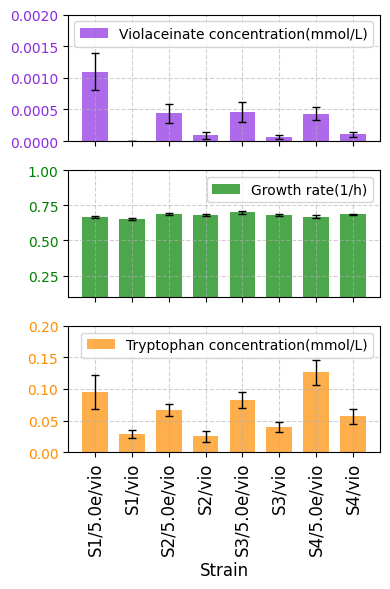

In [142]:
# Create a figure with 3 subplots stacked vertically
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(4, 6), sharex=True)

# Define bar width
bar_width = 0.7


ax1.bar(df_g1_mean.index, df_g1_mean['Violaceinate'], width=bar_width, color='blueviolet',
        label='Violaceinate concentration(mmol/L)', alpha=0.7)

ax1.errorbar(df_g1_mean.index, df_g1_mean['Violaceinate'], 
            yerr=df_g1_sem['Violaceinate'], fmt='none', ecolor='black', 
            capsize=3, elinewidth=1)

ax1.tick_params(axis='y', labelcolor='blueviolet')
ax1.legend(loc='upper right')
ax1.set_ylim([0, 0.002])
ax1.grid(True, linestyle='--', alpha=0.6)

ax2.bar(df_g1_mean.index, df_g1_mean['growth'], width=bar_width, color='g',
        label='Growth rate(1/h)', alpha=0.7)

ax2.errorbar(df_g1_mean.index, df_g1_mean['growth'], 
            yerr=df_g1_sem['growth'], fmt='none', ecolor='black', 
            capsize=3, elinewidth=1)

ax2.tick_params(axis='y', labelcolor='g')
ax2.legend(loc='upper right')
ax2.set_ylim([0.1, 1])
ax2.grid(True, linestyle='--', alpha=0.6)

ax3.bar(df_g1_mean.index, df_g1_mean['TRP[c]'], width=bar_width, color='darkorange',
        label='Tryptophan concentration(mmol/L)', alpha=0.7)

ax3.errorbar(df_g1_mean.index, df_g1_mean['TRP[c]'], 
            yerr=df_g1_sem['TRP[c]'], fmt='none', ecolor='black', 
            capsize=3, elinewidth=1)

ax3.tick_params(axis='y', labelcolor='darkorange')
ax3.legend(loc='upper right')
ax3.set_ylim([0, 0.2])
ax3.grid(True, linestyle='--', alpha=0.6)

ax3.set_xlabel('Strain', fontsize=12)
if hasattr(df_g1_mean.index, 'levels'):
    x_labels = ['-'.join(map(str, idx)) for idx in df_ko_gr3_mean.index]
    ax3.set_xticks(range(len(x_labels)))
    ax3.set_xticklabels(x_labels, fontsize=12, rotation=90)
else:
    ax3.set_xticks(range(len(df_g1_mean.index)))
    ax3.set_xticklabels(df_g1_mean.index, fontsize=12, rotation=90)

# Adjust the layout
plt.tight_layout()
plt.savefig('vio5_min_genome_three_plots_notrp.png', dpi=900)

In [143]:
df_ki = pd.concat([df_ki1, df_ki2, df_ki3])

df_ki['seed'] = df_ki['cell_path'].str.split('/').str[7]

df_ki_notrped = pd.read_pickle('/bm_mean_KI_ts_new_gene_2025_04_07.pkl')

df_ko_gr_notrped_mean, df_ko_gr_notrped_sem = apply_transf_ki(df_ki, df_ki_notrped, '1000000')
tuples = [
    ('', '1000000'),
    (' EG11005_RNA[c]', '1000000'),
    (' EG11029_RNA[c]', '1000000'),
    (' EG11029_RNA[c] EG11005_RNA[c]', '1000000'),
]

dict_map = {
    tuples[0]:'S1/vio',
    tuples[1]:'S2/vio',
    tuples[2]:'S3/vio',
    tuples[3]:'S4/vio',
}

df_gr_ki2_mean = apply_mapping_to_df(df_ko_gr_notrped_mean, dict_map)
df_gr_ki2_sem = apply_mapping_to_df(df_ko_gr_notrped_sem, dict_map)

In [144]:
df_gr_ki2_mean

,TRP[c],CPD-14323[c],CPD-14324[c],CPD-11890[c],CPD-19471[c],CPD-14320[c],CPD-14319[c],cell_mass,cell_volume,growth,Violaceinate
S2/vio,0.020536,0.046861,0.102192,0.092961,0.040986,0.014480,0.032871,1277.451150,1.161319,0.583889,0.102192
S3/vio,0.032767,0.061989,0.129808,0.155582,0.065064,0.023758,0.049734,1298.582291,1.180529,0.599463,0.129808
S4/vio,0.029331,0.070466,0.144428,0.143856,0.064567,0.024042,0.051889,1307.958366,1.189053,0.605831,0.144428
S1/vio,0.031541,0.090375,0.183977,0.150048,0.067042,0.025601,0.068107,1302.553507,1.184140,0.603635,0.183977


In [145]:
df_5e = pd.read_pickle('/bm_mean_KI_ts_new_gene_2025_03_31.pkl')

df_5e['ko_extra'] = df_5e['KO_id'].apply(extract_before_target)

df_5e['growth'] = df_5e['growth']*3600
df_5e = df_5e[df_5e['ext_genes_expr']=='1000000']


dfc = df_5e[df_5e['generation'].isin(gens)]
df_ko_gr_mean = dfc.groupby(['ko_extra', 'ext_genes_expr'])[['TRP[c]', "CPD-14323[c]", "CPD-14324[c]","CPD-11890[c]",
        "CPD-19471[c]", "CPD-14320[c]", "CPD-14319[c]", 'cell_mass', 'cell_volume', 'growth']].mean()
df_ko_gr_sem = dfc.groupby(['ko_extra', 'ext_genes_expr'])[['TRP[c]', "CPD-14323[c]", "CPD-14324[c]","CPD-11890[c]",
        "CPD-19471[c]", "CPD-14320[c]", "CPD-14319[c]", 'cell_mass', 'cell_volume', 'growth']].sem()
df_ko_gr_mean['Violaceinate'] = df_ko_gr_mean['CPD-14324[c]']
df_ko_gr_sem['Violaceinate'] = df_ko_gr_sem['CPD-14324[c]']


In [146]:
tuples = [
    ('', '1000000'),
    ('EG11005_RNA[c]', '1000000'),
    ('EG11029_RNA[c]', '1000000'),
    ('EG11029_RNA[c] EG11005_RNA[c]', '1000000'),
]

dict_map = {
    tuples[0]:'S1/5.0e/vio',
    tuples[1]:'S2/5.0e/vio',
    tuples[2]:'S3/5.0e/vio',
    tuples[3]:'S4/5.0e/vio',
}

df_ko_gr_mean = apply_mapping_to_df(df_ko_gr_mean, dict_map)
df_ko_gr_sem = apply_mapping_to_df(df_ko_gr_sem, dict_map)

In [147]:
df_g2_mean = pd.concat([df_ko_gr_mean, df_gr_ki2_mean])
df_g2_sem = pd.concat([df_ko_gr_sem, df_gr_ki2_sem])

new_order = ['S1/5.0e/vio', 'S1/vio', 'S2/5.0e/vio', 'S2/vio', 'S3/5.0e/vio', 'S3/vio', 'S4/5.0e/vio', 'S4/vio' ]
df_g2_mean = df_g2_mean.reindex(new_order)
df_g2_sem = df_g2_sem.reindex(new_order)

In [148]:
df_g2_mean

,TRP[c],CPD-14323[c],CPD-14324[c],CPD-11890[c],CPD-19471[c],CPD-14320[c],CPD-14319[c],cell_mass,cell_volume,growth,Violaceinate
S1/5.0e/vio,0.056634,0.150703,0.303751,0.293256,0.131474,0.051873,0.122651,1305.980503,1.187255,0.611164,0.303751
S1/vio,0.031541,0.090375,0.183977,0.150048,0.067042,0.025601,0.068107,1302.553507,1.184140,0.603635,0.183977
S2/5.0e/vio,0.049067,0.149216,0.308800,0.251596,0.112769,0.044629,0.109541,1284.793863,1.167994,0.587302,0.308800
S2/vio,0.020536,0.046861,0.102192,0.092961,0.040986,0.014480,0.032871,1277.451150,1.161319,0.583889,0.102192
S3/5.0e/vio,0.129903,0.376369,0.685140,0.729416,0.317213,0.143283,0.340494,1295.662580,1.177875,0.597093,0.685140
S3/vio,0.032767,0.061989,0.129808,0.155582,0.065064,0.023758,0.049734,1298.582291,1.180529,0.599463,0.129808
S4/5.0e/vio,0.081496,0.264910,0.510743,0.428187,0.195245,0.080214,0.214013,1330.199817,1.209273,0.625622,0.510743
S4/vio,0.029331,0.070466,0.144428,0.143856,0.064567,0.024042,0.051889,1307.958366,1.189053,0.605831,0.144428


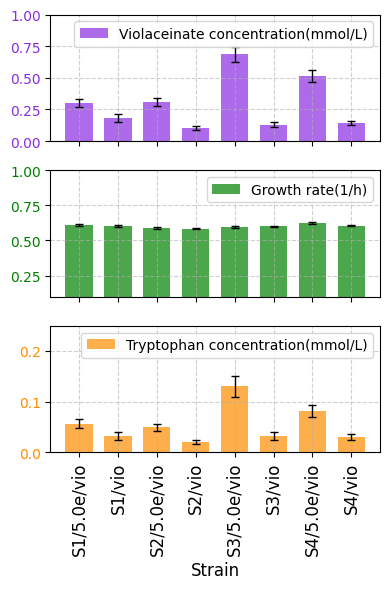

In [149]:
# Create a figure with 3 subplots stacked vertically
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(4, 6), sharex=True)

# Define bar width
bar_width = 0.7


ax1.bar(df_g2_mean.index, df_g2_mean['Violaceinate'], width=bar_width, color='blueviolet',
        label='Violaceinate concentration(mmol/L)', alpha=0.7)

ax1.errorbar(df_g2_mean.index, df_g2_mean['Violaceinate'], 
            yerr=df_g2_sem['Violaceinate'], fmt='none', ecolor='black', 
            capsize=3, elinewidth=1)

ax1.tick_params(axis='y', labelcolor='blueviolet')
ax1.legend(loc='upper right')
ax1.set_ylim([0, 1])
ax1.grid(True, linestyle='--', alpha=0.6)

ax2.bar(df_g2_mean.index, df_g2_mean['growth'], width=bar_width, color='g',
        label='Growth rate(1/h)', alpha=0.7)

ax2.errorbar(df_g2_mean.index, df_g2_mean['growth'], 
            yerr=df_g2_sem['growth'], fmt='none', ecolor='black', 
            capsize=3, elinewidth=1)

ax2.tick_params(axis='y', labelcolor='g')
ax2.legend(loc='upper right')
ax2.set_ylim([0.1, 1])
ax2.grid(True, linestyle='--', alpha=0.6)

ax3.bar(df_g2_mean.index, df_g2_mean['TRP[c]'], width=bar_width, color='darkorange',
        label='Tryptophan concentration(mmol/L)', alpha=0.7)

ax3.errorbar(df_g2_mean.index, df_g2_mean['TRP[c]'], 
            yerr=df_g2_sem['TRP[c]'], fmt='none', ecolor='black', 
            capsize=3, elinewidth=1)

ax3.tick_params(axis='y', labelcolor='darkorange')
ax3.legend(loc='upper right')
ax3.set_ylim([0, 0.25])
ax3.grid(True, linestyle='--', alpha=0.6)

ax3.set_xlabel('Strain', fontsize=12)
if hasattr(df_g2_mean.index, 'levels'):
    x_labels = ['-'.join(map(str, idx)) for idx in df_g2_mean.index]
    ax3.set_xticks(range(len(x_labels)))
    ax3.set_xticklabels(x_labels, fontsize=12, rotation=90)
else:
    ax3.set_xticks(range(len(df_g2_mean.index)))
    ax3.set_xticklabels(df_g2_mean.index, fontsize=12, rotation=90)

# Adjust the layout
plt.tight_layout()
plt.savefig('vio6_min_genome_three_plots_notrp.png', dpi=900)

In [150]:
df_ki = pd.concat([df_ki1, df_ki2, df_ki3])

df_ki['seed'] = df_ki['cell_path'].str.split('/').str[7]

df_ki_notrped = pd.read_pickle('/bm_mean_KI_ts_new_gene_2025_04_07.pkl')

df_ko_gr_notrped_mean, df_ko_gr_notrped_sem = apply_transf_ki(df_ki, df_ki_notrped, '10000000')
tuples = [
    ('', '10000000'),
    (' EG11005_RNA[c]', '10000000'),
    (' EG11029_RNA[c]', '10000000'),
    (' EG11029_RNA[c] EG11005_RNA[c]', '10000000'),
]

dict_map = {
    tuples[0]:'S1/vio',
    tuples[1]:'S2/vio',
    tuples[2]:'S3/vio',
    tuples[3]:'S4/vio',
}

df_gr_ki3_mean = apply_mapping_to_df(df_ko_gr_notrped_mean, dict_map)
df_gr_ki3_sem = apply_mapping_to_df(df_ko_gr_notrped_sem, dict_map)

In [151]:
df_5e = pd.read_pickle('/bm_mean_KI_ts_new_gene_2025_03_31.pkl')
# Apply the function to create new column
df_5e['ko_extra'] = df_5e['KO_id'].apply(extract_before_target)

df_5e['growth'] = df_5e['growth']*3600
df_5e = df_5e[df_5e['ext_genes_expr']=='10000000']


dfc = df_5e[df_5e['generation'].isin(gens)]
df_ko_gr_mean = dfc.groupby(['ko_extra', 'ext_genes_expr'])[['TRP[c]', "CPD-14323[c]", "CPD-14324[c]","CPD-11890[c]",
        "CPD-19471[c]", "CPD-14320[c]", "CPD-14319[c]", 'cell_mass', 'cell_volume', 'growth']].mean()
df_ko_gr_sem = dfc.groupby(['ko_extra', 'ext_genes_expr'])[['TRP[c]', "CPD-14323[c]", "CPD-14324[c]","CPD-11890[c]",
        "CPD-19471[c]", "CPD-14320[c]", "CPD-14319[c]", 'cell_mass', 'cell_volume', 'growth']].sem()
df_ko_gr_mean['Violaceinate'] = df_ko_gr_mean['CPD-14324[c]']
df_ko_gr_sem['Violaceinate'] = df_ko_gr_sem['CPD-14324[c]']


In [152]:
tuples = [
    ('', '10000000'),
    ('EG11005_RNA[c]', '10000000'),
    ('EG11029_RNA[c]', '10000000'),
    ('EG11029_RNA[c] EG11005_RNA[c]', '10000000'),
]

dict_map = {
    tuples[0]:'S1/5.0e/vio',
    tuples[1]:'S2/5.0e/vio',
    tuples[2]:'S3/5.0e/vio',
    tuples[3]:'S4/5.0e/vio',
}

df_ko_gr_mean = apply_mapping_to_df(df_ko_gr_mean, dict_map)
df_ko_gr_sem = apply_mapping_to_df(df_ko_gr_sem, dict_map)

In [153]:
df_g3_mean = pd.concat([df_ko_gr_mean, df_gr_ki3_mean])
df_g3_sem = pd.concat([df_ko_gr_sem, df_gr_ki3_sem])

new_order = ['S1/5.0e/vio', 'S1/vio', 'S2/5.0e/vio', 'S2/vio', 'S3/5.0e/vio', 'S3/vio', 'S4/5.0e/vio', 'S4/vio' ]
df_g3_mean = df_g3_mean.reindex(new_order)
df_g3_sem = df_g3_sem.reindex(new_order)

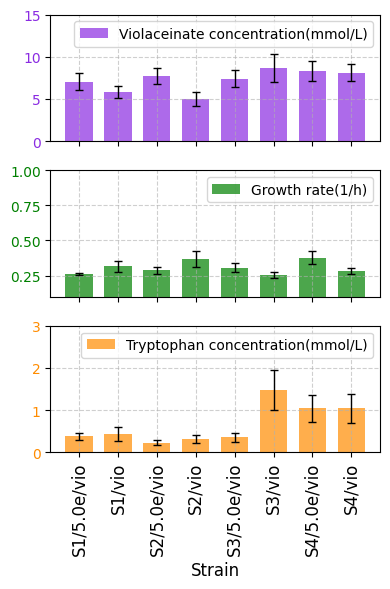

In [154]:
# Create a figure with 3 subplots stacked vertically
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(4, 6), sharex=True)

# Define bar width
bar_width = 0.7


ax1.bar(df_g3_mean.index, df_g3_mean['Violaceinate'], width=bar_width, color='blueviolet',
        label='Violaceinate concentration(mmol/L)', alpha=0.7)

ax1.errorbar(df_g3_mean.index, df_g3_mean['Violaceinate'], 
            yerr=df_g3_sem['Violaceinate'], fmt='none', ecolor='black', 
            capsize=3, elinewidth=1)

ax1.tick_params(axis='y', labelcolor='blueviolet')
ax1.legend(loc='upper right')
ax1.set_ylim([0, 15])
ax1.grid(True, linestyle='--', alpha=0.6)

ax2.bar(df_g3_mean.index, df_g3_mean['growth'], width=bar_width, color='g',
        label='Growth rate(1/h)', alpha=0.7)

ax2.errorbar(df_g3_mean.index, df_g3_mean['growth'], 
            yerr=df_g3_sem['growth'], fmt='none', ecolor='black', 
            capsize=3, elinewidth=1)

ax2.tick_params(axis='y', labelcolor='g')
ax2.legend(loc='upper right')
ax2.set_ylim([0.1, 1])
ax2.grid(True, linestyle='--', alpha=0.6)

ax3.bar(df_g3_mean.index, df_g3_mean['TRP[c]'], width=bar_width, color='darkorange',
        label='Tryptophan concentration(mmol/L)', alpha=0.7)

ax3.errorbar(df_g3_mean.index, df_g3_mean['TRP[c]'], 
            yerr=df_g3_sem['TRP[c]'], fmt='none', ecolor='black', 
            capsize=3, elinewidth=1)

ax3.tick_params(axis='y', labelcolor='darkorange')
ax3.legend(loc='upper right')
ax3.set_ylim([0, 3])
ax3.grid(True, linestyle='--', alpha=0.6)

ax3.set_xlabel('Strain', fontsize=12)
if hasattr(df_g3_mean.index, 'levels'):
    x_labels = ['-'.join(map(str, idx)) for idx in df_g3_mean.index]
    ax3.set_xticks(range(len(x_labels)))
    ax3.set_xticklabels(x_labels, fontsize=12, rotation=90)
else:
    ax3.set_xticks(range(len(df_g3_mean.index)))
    ax3.set_xticklabels(df_g3_mean.index, fontsize=12, rotation=90)

# Adjust the layout
plt.tight_layout()
plt.savefig('vio7_min_genome_three_plots_notrp.png', dpi=900)

## 5e genes

In [155]:
genes = ['EG10012', 'EG10028', 'EG10033', 'EG10049', 'EG10153', 'EG10154', 'EG10156', 'EG10203', 'EG10232', 'EG10233', 'EG10234', 'EG10273', 'EG10417', 'EG10441', 'EG10468', 'EG10469', 'EG10470', 'EG10519', 'EG10547', 'EG10613', 'EG10671', 'EG10696', 'EG10742', 'EG10754', 'EG10852', 'EG10946', 'EG11112', 'EG11253', 'EG11258', 'EG11261', 'EG11265', 'EG11379', 'EG11380', 'EG11405', 'EG11409', 'EG11540', 'EG11624', 'EG11626', 'EG11627', 'EG11628', 'EG11629', 'EG11630', 'EG11631', 'EG11632', 'EG11814', 'EG11815', 'EG11826', 'EG12167', 'EG12358', 'EG12876', 'EG13270', 'G0-10588', 'G6428', 'G6429', 'G6430', 'G6431', 'G6432', 'G6435', 'G6437', 'G6439', 'G6440', 'G6442', 'G6449', 'G6452', 'G6455', 'G6456', 'G6457', 'G6458', 'G6461', 'G6462', 'G6468', 'G6471', 'G6474', 'G6475', 'G6476', 'G6477', 'G6478', 'G6479', 'G6487', 'G6488', 'G6497', 'G6501', 'G6502', 'G6503']

In [156]:
'EG11027' in genes

False

In [157]:
len(genes)

84

In [158]:
import pandas as pd
file_path = "genes_ecocyc.txt"  # Update with your actual path
df_eco = pd.read_csv(file_path, sep="\t")  # Assuming tab-separated

# Step 1: Split terms into lists
df_eco['Product'] = df_eco['Product'].str.split(' // ')

# Step 2: Explode lists into separate rows
df_eco = df_eco.explode('Product')
df_eco.head()

,All-Genes,Accession-1,Accession-2,Synonyms,"Gene products (complexes, polypeptides, and RNAs)",Common-Name,Object ID,Accession-2.1,Names,Product,GO terms (biological process),GO terms (cellular component),GO terms (molecular function)
0,G0-16636,b4759,ECK4616,NaN,RNA0-388,3'ETS-<i>leuZ</i>,G0-16636,ECK4616,3'ETS-<i>leuZ</i> // b4759 // ECK4616,RNA0-388,GO:1904572,NaN,GO:0061980
1,G0-16718,b4634,ECK4439,ylcF,G0-16718-MONOMER,aaaD,G0-16718,ECK4439,aaaD // ylcF // b4634 // ECK4439,G0-16718-MONOMER,NaN,GO:0005829,NaN
2,G0-16720,b4693,ECK1135,NaN,G0-16720-MONOMER,aaaE,G0-16720,ECK1135,aaaE // b4693 // ECK1135,G0-16720-MONOMER,NaN,GO:0005829,NaN
3,G7686,b3241,ECK3230,yhcQ,CPLX0-4,aaeA,G7686,ECK3230,aaeA // yhcQ // b3241 // ECK3230,G7686-MONOMER,GO:0046942 // GO:0055085,GO:0016020 // GO:0005886,GO:0022857
4,G7685,b3240,ECK3229,yhcP,CPLX0-4,aaeB,G7685,ECK3229,aaeB // yhcP // b3240 // ECK3229,G7685-MONOMER,GO:0055085 // GO:0046942,GO:0005886,GO:0022857


In [159]:
list(df_eco[df_eco['All-Genes'].isin(genes)]['Common-Name'])

['aat',
 'agp',
 'amiD',
 'appA',
 'appB',
 'appC',
 'appX',
 'aqpZ',
 'artJ',
 'artM',
 'artP',
 'artQ',
 'clpA',
 'cmk',
 'cmoM',
 'cydC',
 'cydD',
 'dacC',
 'dmsA',
 'dmsB',
 'dmsC',
 'etk',
 'etp',
 'fabA',
 'focA',
 'fsaA',
 'gloC',
 'grxA',
 'grxA',
 'gsiA',
 'gsiB',
 'gsiC',
 'gsiD',
 'hcp',
 'hcr',
 'hyaA',
 'hyaB',
 'hyaC',
 'ihfB',
 'kdsB',
 'ldtD',
 'lpxK',
 'lrp',
 'ltaE',
 'lysO',
 'macA',
 'macB',
 'mdfA',
 'mepK',
 'mgsA',
 'moeA',
 'moeB',
 'msbA',
 'nfsA',
 'ompF',
 'pepN',
 'pflA',
 'pncB',
 'potF',
 'potG',
 'potH',
 'potI',
 'poxB',
 'rimK',
 'rimO',
 'rlmC',
 'rlmI',
 'rlmL',
 'serC',
 'ssuA',
 'ssuB',
 'ssuC',
 'ssuD',
 'ssuE',
 'torA',
 'torC',
 'tusE',
 'wrbA',
 'ybjG',
 'ybjI',
 'ycaO',
 'ycaQ',
 'ycbX',
 'yccX',
 'yliI']

In [160]:
genes_ecoli = pd.read_csv('/all_genes_ecoli.csv', sep=';')

In [161]:
genes_ecoli[genes_ecoli['Object ID'].isin(genes)]

,Gene Name,Accession-1,Left-End-Position,Right-End-Position,Product,Characterization,Object ID
55,G6430,b0830,869411.0,870949.0,YLIB-MONOMER,WELL-CHARACTERIZED,G6430
88,EG11626,b0862,901534.0,902250.0,ARTQ-MONOMER,PARTIAL,EG11626
144,EG10469,b0973,1033254.0,1035047.0,HYAB-MONOMER,WELL-CHARACTERIZED,EG10469
183,G6477,b0935,994843.0,995988.0,MONOMER-162,WELL-CHARACTERIZED,G6477
197,EG10232,b0894,940959.0,943403.0,DMSA-MONOMER,WELL-CHARACTERIZED,EG10232
...,...,...,...,...,...,...,...
4499,G6428,b0825,863642.0,864304.0,G6428-MONOMER,WELL-CHARACTERIZED,G6428
4548,G6479,b0937,996937.0,997512.0,MONOMER0-146,WELL-CHARACTERIZED,G6479
4694,G6435,b0835,876710.0,878035.0,G6435-MONOMER,WELL-CHARACTERIZED,G6435
4699,G6432,b0832,871890.0,872801.0,YLID-MONOMER,WELL-CHARACTERIZED,G6432
